# <b><center><span style='color:darkblue'> Telecom Churn Case Study </span></center>

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

### Understanding and defining churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

 

### Definitions of churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

 

### High-value churn

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

Understanding the business objective and the data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

Understanding customer behaviour during churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

## <span style='color:darkblue'> Importing Libraries</span>

In [1]:

import warnings # Supress warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import numpy as np
import pandas as pd
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import norm, skew ,loguniform
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA, IncrementalPCA
from fancyimpute import IterativeImputer as MICE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,r2_score,accuracy_score, roc_auc_score,precision_score, recall_score,precision_recall_curve,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

##### <span style='color:darkred'> To display maximum columns, rows in dataframe, modfying display options of pandas. </span>


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 250)

## <span style='color:darkblue'> Task 1: Exploratory Data Analysis on Application Data </span>

### <p> <span style="color : darkred"> <i> Subtask 1.1: Read the Collected Telecom churn Data. </i> </span> 
<span style="color : purple"> Reading the telecom data churn file i.e., 'telecom_churn_data.csv' and storing it in a dataframe "churn_data".</span> </p>

In [3]:
churn_data = pd.read_csv('telecom_churn_data.csv')

### <p><span style='color:darkred'> <i>Subtask 1.2: Data Sanity checks</i></span>

In [4]:
# Exploring the data outline 
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
#Lets check dimensions of data
print(f"Shape of Dataframe: {churn_data.shape}")

Shape of Dataframe: (99999, 226)


In [6]:
print("Information of Dataframe: " )
churn_data.info(verbose = True)

Information of Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8     

In [7]:
#Lets view statistical aspects of data
print("Description of Dataframe: " )
churn_data.describe()

Description of Dataframe: 


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      


### <p> <span style="color : darkred"> <i> Subtask 1.2.2 Verifying Duplicate records </i></span></p>


In [8]:
# Validate duplicate entries if any recorded against each customer

print("Duplicate Records count in Entire Dataframe : {}".format(len(churn_data[churn_data.duplicated()])))
print("Duplicate Records count w.r.t MobileNumber in Dataframe : {}".format(len(churn_data[churn_data["mobile_number"].duplicated()])))

Duplicate Records count in Entire Dataframe : 0
Duplicate Records count w.r.t MobileNumber in Dataframe : 0


Dropping Id columns MobileNumber and Circle Id 

In [9]:
dropcols=["mobile_number","circle_id"]
churn_data.drop(dropcols,axis=1,inplace = True)
print("Shape of DataFrame: {}".format(churn_data.shape))

Shape of DataFrame: (99999, 224)


### <p> <span style='color:darkred'> <i> Subtask 1.2.2 Identifying and Handling Missing Values</i>  </p> </span>

In [10]:
print(f"Null value count:" )
def chk_null_count():
    ''' Function  to get Null Frame , prints columns null value details if any exist'''
   # null_frame = leads_data.isnull().sum().sort_values(ascending=False)
    null_frame = round(100 * churn_data.isnull().sum().to_frame("perc").query('perc>0')/len(churn_data),4).sort_values(by= 'perc', ascending=False)
    null_frame["count"]= churn_data.isnull().sum().to_frame("count").query('count>0').sort_values(by= 'count', ascending=False) 
   
    return null_frame

null_frame= chk_null_count()
null_frame

Null value count:


perc  count
count_rech_2g_6           74.8467  74846
max_rech_data_6           74.8467  74846
arpu_3g_6                 74.8467  74846
av_rech_amt_data_6        74.8467  74846
count_rech_3g_6           74.8467  74846
night_pck_user_6          74.8467  74846
arpu_2g_6                 74.8467  74846
fb_user_6                 74.8467  74846
total_rech_data_6         74.8467  74846
date_of_last_rech_data_6  74.8467  74846
count_rech_3g_7           74.4287  74428
arpu_3g_7                 74.4287  74428
av_rech_amt_data_7        74.4287  74428
fb_user_7                 74.4287  74428
total_rech_data_7         74.4287  74428
count_rech_2g_7           74.4287  74428
arpu_2g_7                 74.4287  74428
night_pck_user_7          74.4287  74428
max_rech_data_7           74.4287  74428
date_of_last_rech_data_7  74.4287  74428
date_of_last_rech_data_9  74.0777  74077
count_rech_2g_9           74.0777  74077
total_rech_data_9         74.0777  74077
count_rech_3g_9           74.0777  74077
max_rech_data_9           74.0777  74077
av_rech_amt_data_9        74.0777  74077
arpu_3g_9                 74.0777  74077
fb_user_9                 74.0777  74077
night_pck_user_9          74.0777  74077
arpu_2g_9                 74.0777  74077
av_rech_amt_data_8        73.6607  73660
fb_user_8                 73.6607  73660
night_pck_user_8          73.6607  73660
count_rech_2g_8           73.6607  73660
count_rech_3g_8           73.6607  73660
max_rech_data_8           73.6607  73660
date_of_last_rech_data_8  73.6607  73660
total_rech_data_8         73.6607  73660
arpu_3g_8                 73.6607  73660
arpu_2g_8                 73.6607  73660
roam_og_mou_9              7.7451   7745
std_og_t2c_mou_9           7.7451   7745
std_ic_t2f_mou_9           7.7451   7745
std_ic_t2m_mou_9           7.7451   7745
loc_ic_mou_9               7.7451   7745
std_og_mou_9               7.7451   7745
og_others_9                7.7451   7745
std_ic_t2o_mou_9           7.7451   7745
isd_og_mou_9               7.7451   7745
offnet_mou_9               7.7451   7745
spl_og_mou_9               7.7451   7745
std_og_t2f_mou_9           7.7451   7745
std_og_t2m_mou_9           7.7451   7745
loc_ic_t2t_mou_9           7.7451   7745
std_ic_mou_9               7.7451   7745
loc_og_t2f_mou_9           7.7451   7745
ic_others_9                7.7451   7745
loc_og_t2t_mou_9           7.7451   7745
loc_ic_t2m_mou_9           7.7451   7745
loc_og_t2c_mou_9           7.7451   7745
isd_ic_mou_9               7.7451   7745
loc_og_mou_9               7.7451   7745
loc_ic_t2f_mou_9           7.7451   7745
roam_ic_mou_9              7.7451   7745
spl_ic_mou_9               7.7451   7745
std_og_t2t_mou_9           7.7451   7745
loc_og_t2m_mou_9           7.7451   7745
onnet_mou_9                7.7451   7745
std_ic_t2t_mou_9           7.7451   7745
std_ic_t2t_mou_8           5.3781   5378
loc_ic_mou_8               5.3781   5378
loc_og_t2m_mou_8           5.3781   5378
std_ic_t2m_mou_8           5.3781   5378
offnet_mou_8               5.3781   5378
std_ic_t2f_mou_8           5.3781   5378
roam_ic_mou_8              5.3781   5378
std_ic_t2o_mou_8           5.3781   5378
std_ic_mou_8               5.3781   5378
spl_ic_mou_8               5.3781   5378
onnet_mou_8                5.3781   5378
isd_ic_mou_8               5.3781   5378
ic_others_8                5.3781   5378
loc_ic_t2f_mou_8           5.3781   5378
isd_og_mou_8               5.3781   5378
roam_og_mou_8              5.3781   5378
loc_og_t2c_mou_8           5.3781   5378
std_og_t2t_mou_8           5.3781   5378
loc_ic_t2m_mou_8           5.3781   5378
std_og_t2f_mou_8           5.3781   5378
std_og_t2c_mou_8           5.3781   5378
loc_og_t2t_mou_8           5.3781   5378
std_og_mou_8               5.3781   5378
loc_og_mou_8               5.3781   5378
spl_og_mou_8               5.3781   5378
std_og_t2m_mou_8           5.3781   5378
og_others_8                5.3781   5378
loc_og_t2f_mou_8           5.3781   5378
loc_ic_t2t_

In [11]:
#categorical
churn_data[null_frame.index].select_dtypes(include="object").columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_9', 'date_of_last_rech_data_8',
       'date_of_last_rech_9', 'date_of_last_rech_8', 'date_of_last_rech_7',
       'last_date_of_month_9', 'date_of_last_rech_6', 'last_date_of_month_8',
       'last_date_of_month_7'],
      dtype='object')

In [12]:
null_frame[null_frame["perc"]>70]

perc  count
count_rech_2g_6           74.8467  74846
max_rech_data_6           74.8467  74846
arpu_3g_6                 74.8467  74846
av_rech_amt_data_6        74.8467  74846
count_rech_3g_6           74.8467  74846
night_pck_user_6          74.8467  74846
arpu_2g_6                 74.8467  74846
fb_user_6                 74.8467  74846
total_rech_data_6         74.8467  74846
date_of_last_rech_data_6  74.8467  74846
count_rech_3g_7           74.4287  74428
arpu_3g_7                 74.4287  74428
av_rech_amt_data_7        74.4287  74428
fb_user_7                 74.4287  74428
total_rech_data_7         74.4287  74428
count_rech_2g_7           74.4287  74428
arpu_2g_7                 74.4287  74428
night_pck_user_7          74.4287  74428
max_rech_data_7           74.4287  74428
date_of_last_rech_data_7  74.4287  74428
date_of_last_rech_data_9  74.0777  74077
count_rech_2g_9           74.0777  74077
total_rech_data_9         74.0777  74077
count_rech_3g_9           74.0777  74077
max_rech_data_9           74.0777  74077
av_rech_amt_data_9        74.0777  74077
arpu_3g_9                 74.0777  74077
fb_user_9                 74.0777  74077
night_pck_user_9          74.0777  74077
arpu_2g_9                 74.0777  74077
av_rech_amt_data_8        73.6607  73660
fb_user_8                 73.6607  73660
night_pck_user_8          73.6607  73660
count_rech_2g_8           73.6607  73660
count_rech_3g_8           73.6607  73660
max_rech_data_8           73.6607  73660
date_of_last_rech_data_8  73.6607  73660
total_rech_data_8         73.6607  73660
arpu_3g_8                 73.6607  73660
arpu_2g_8                 73.6607  73660

# Analyzing Month 6 Features

In [13]:
# Null columns in Month 6
nullcol6=[x for x in null_frame.index if "6" in x]
print(len(nullcol6))
null_frame.loc[nullcol6,:].index

40


Index(['count_rech_2g_6', 'max_rech_data_6', 'arpu_3g_6', 'av_rech_amt_data_6',
       'count_rech_3g_6', 'night_pck_user_6', 'arpu_2g_6', 'fb_user_6',
       'total_rech_data_6', 'date_of_last_rech_data_6', 'loc_og_t2c_mou_6',
       'loc_og_mou_6', 'spl_ic_mou_6', 'ic_others_6', 'std_og_t2t_mou_6',
       'onnet_mou_6', 'loc_og_t2m_mou_6', 'isd_ic_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_mou_6',
       'std_og_t2f_mou_6', 'std_ic_t2m_mou_6', 'loc_ic_mou_6', 'roam_og_mou_6',
       'loc_ic_t2t_mou_6', 'std_ic_t2t_mou_6', 'roam_ic_mou_6', 'og_others_6',
       'spl_og_mou_6', 'loc_og_t2t_mou_6', 'std_ic_t2f_mou_6', 'isd_og_mou_6',
       'std_og_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2c_mou_6', 'offnet_mou_6',
       'loc_ic_t2m_mou_6', 'date_of_last_rech_6'],
      dtype='object')

In [14]:
# churn_data.loc[churn_data["date_of_last_rech_6"].isnull(),nullcol6].drop_duplicates()
# Null columns in Month 6
nullcol6=[x for x in null_frame.index if "6" in x]
len(nullcol6)
nullcol6noicog=[x for x in nullcol6 if "rech" in x or "user" in x]
nullcol6noicog

['count_rech_2g_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'count_rech_3g_6',
 'night_pck_user_6',
 'fb_user_6',
 'total_rech_data_6',
 'date_of_last_rech_data_6',
 'date_of_last_rech_6']

In [15]:
churn_data.loc[churn_data["date_of_last_rech_6"].isnull(),nullcol6noicog].drop_duplicates()

count_rech_2g_6  max_rech_data_6  av_rech_amt_data_6  count_rech_3g_6  \
26              NaN              NaN                 NaN              NaN   

    night_pck_user_6  fb_user_6  total_rech_data_6 date_of_last_rech_data_6  \
26               NaN        NaN                NaN                      NaN   

   date_of_last_rech_6  
26                 NaN

In [16]:
#recharge Not data
mb_rech=[x for x in nullcol6 if "rech" in x and "data" in x]
mb_rech.extend(["night_pck_user_6","fb_user_6"])
mb_rech
len(churn_data.loc[churn_data["total_rech_data_6"].isnull(),mb_rech])
churn_data.loc[churn_data["total_rech_data_6"].isnull(),mb_rech].drop_duplicates()

max_rech_data_6  av_rech_amt_data_6  total_rech_data_6  \
1              NaN                 NaN                NaN   

  date_of_last_rech_data_6  night_pck_user_6  fb_user_6  
1                      NaN               NaN        NaN

From above a clear pattern it is evident, when date if last reacharge is NAN inferences user stopped reacharging the any of data services and service packs which is represented as NAN. Let us interploate with 0 to process it as meaningful information.

When customer had purchased one of mobile data packs, IC and OG calls seems to be empty, which infers user probably making network calls.


# Analyzing Month 7 Features

In [17]:
null_frame= chk_null_count()
nullcol7=[x for x in null_frame.index if "7" in x]
nullcol7noicog=[x for x in nullcol7 if "rech" in x  or "user" in x]
nullcol7noicog
churn_data.loc[churn_data["date_of_last_rech_7"].isnull(),nullcol7noicog].drop_duplicates()

count_rech_3g_7  av_rech_amt_data_7  fb_user_7  total_rech_data_7  \
52              NaN                 NaN        NaN                NaN   

    count_rech_2g_7  night_pck_user_7  max_rech_data_7  \
52              NaN               NaN              NaN   

   date_of_last_rech_data_7 date_of_last_rech_7  
52                      NaN                 NaN

# Analyzing Month 8 Features

In [18]:
null_frame= chk_null_count()
nullcol8=[x for x in null_frame.index if "8" in x]
nullcol8noicog=[x for x in nullcol8 if "rech" in x  or "user" in x]
nullcol8noicog
churn_data.loc[churn_data["date_of_last_rech_8"].isnull(),nullcol8noicog].drop_duplicates()

av_rech_amt_data_8  fb_user_8  night_pck_user_8  count_rech_2g_8  \
121                   NaN        NaN               NaN              NaN   
25540               154.0        1.0               0.0              1.0   

       count_rech_3g_8  max_rech_data_8 date_of_last_rech_data_8  \
121                NaN              NaN                      NaN   
25540              0.0            154.0                8/12/2014   

       total_rech_data_8 date_of_last_rech_8  
121                  NaN                 NaN  
25540                1.0                 NaN

Found outlier , let us impute date_of_last_8 value with date_of_last_rech_data_8

In [19]:
churn_data.loc[25540,"date_of_last_rech_8"]=churn_data.loc[25540,"date_of_last_rech_data_8"]

# Analyzing Month 9 Features

In [20]:
null_frame= chk_null_count()
nullcol9=[x for x in null_frame.index if "9" in x]
null_frame.loc[nullcol9,:]
nullcol9noicog=[x for x in nullcol9 if "rech" in x or "user" in x]
nullcol9noicog
churn_data.loc[churn_data["date_of_last_rech_9"].isnull(),nullcol9noicog].drop_duplicates()

date_of_last_rech_data_9  count_rech_2g_9  total_rech_data_9  \
11                      NaN              NaN                NaN   

    count_rech_3g_9  max_rech_data_9  av_rech_amt_data_9  fb_user_9  \
11              NaN              NaN                 NaN        NaN   

    night_pck_user_9 date_of_last_rech_9  
11               NaN                 NaN

# Handling Null columns

In [21]:
null_frame= chk_null_count()
null_frame

perc  count
count_rech_2g_6           74.8467  74846
max_rech_data_6           74.8467  74846
arpu_3g_6                 74.8467  74846
av_rech_amt_data_6        74.8467  74846
count_rech_3g_6           74.8467  74846
night_pck_user_6          74.8467  74846
arpu_2g_6                 74.8467  74846
fb_user_6                 74.8467  74846
total_rech_data_6         74.8467  74846
date_of_last_rech_data_6  74.8467  74846
count_rech_3g_7           74.4287  74428
arpu_3g_7                 74.4287  74428
av_rech_amt_data_7        74.4287  74428
fb_user_7                 74.4287  74428
total_rech_data_7         74.4287  74428
count_rech_2g_7           74.4287  74428
arpu_2g_7                 74.4287  74428
night_pck_user_7          74.4287  74428
max_rech_data_7           74.4287  74428
date_of_last_rech_data_7  74.4287  74428
date_of_last_rech_data_9  74.0777  74077
count_rech_2g_9           74.0777  74077
total_rech_data_9         74.0777  74077
count_rech_3g_9           74.0777  74077
max_rech_data_9           74.0777  74077
av_rech_amt_data_9        74.0777  74077
arpu_3g_9                 74.0777  74077
fb_user_9                 74.0777  74077
night_pck_user_9          74.0777  74077
arpu_2g_9                 74.0777  74077
av_rech_amt_data_8        73.6607  73660
fb_user_8                 73.6607  73660
night_pck_user_8          73.6607  73660
count_rech_2g_8           73.6607  73660
count_rech_3g_8           73.6607  73660
max_rech_data_8           73.6607  73660
date_of_last_rech_data_8  73.6607  73660
total_rech_data_8         73.6607  73660
arpu_3g_8                 73.6607  73660
arpu_2g_8                 73.6607  73660
roam_og_mou_9              7.7451   7745
std_og_t2c_mou_9           7.7451   7745
std_ic_t2f_mou_9           7.7451   7745
std_ic_t2m_mou_9           7.7451   7745
loc_ic_mou_9               7.7451   7745
std_og_mou_9               7.7451   7745
og_others_9                7.7451   7745
std_ic_t2o_mou_9           7.7451   7745
isd_og_mou_9               7.7451   7745
offnet_mou_9               7.7451   7745
spl_og_mou_9               7.7451   7745
std_og_t2f_mou_9           7.7451   7745
std_og_t2m_mou_9           7.7451   7745
loc_ic_t2t_mou_9           7.7451   7745
std_ic_mou_9               7.7451   7745
loc_og_t2f_mou_9           7.7451   7745
ic_others_9                7.7451   7745
loc_og_t2t_mou_9           7.7451   7745
loc_ic_t2m_mou_9           7.7451   7745
loc_og_t2c_mou_9           7.7451   7745
isd_ic_mou_9               7.7451   7745
loc_og_mou_9               7.7451   7745
loc_ic_t2f_mou_9           7.7451   7745
roam_ic_mou_9              7.7451   7745
spl_ic_mou_9               7.7451   7745
std_og_t2t_mou_9           7.7451   7745
loc_og_t2m_mou_9           7.7451   7745
onnet_mou_9                7.7451   7745
std_ic_t2t_mou_9           7.7451   7745
std_ic_t2t_mou_8           5.3781   5378
loc_ic_mou_8               5.3781   5378
loc_og_t2m_mou_8           5.3781   5378
std_ic_t2m_mou_8           5.3781   5378
offnet_mou_8               5.3781   5378
std_ic_t2f_mou_8           5.3781   5378
roam_ic_mou_8              5.3781   5378
std_ic_t2o_mou_8           5.3781   5378
std_ic_mou_8               5.3781   5378
spl_ic_mou_8               5.3781   5378
onnet_mou_8                5.3781   5378
isd_ic_mou_8               5.3781   5378
ic_others_8                5.3781   5378
loc_ic_t2f_mou_8           5.3781   5378
isd_og_mou_8               5.3781   5378
roam_og_mou_8              5.3781   5378
loc_og_t2c_mou_8           5.3781   5378
std_og_t2t_mou_8           5.3781   5378
loc_ic_t2m_mou_8           5.3781   5378
std_og_t2f_mou_8           5.3781   5378
std_og_t2c_mou_8           5.3781   5378
loc_og_t2t_mou_8           5.3781   5378
std_og_mou_8               5.3781   5378
loc_og_mou_8               5.3781   5378
spl_og_mou_8               5.3781   5378
std_og_t2m_mou_8           5.3781   5378
og_others_8                5.3781   5378
loc_og_t2f_mou_8           5.3781   5378
loc_ic_t2t_

Performing Rowwise missing analysis

In [22]:
print("Null records shape: ",(churn_data.loc[churn_data[null_frame.index].isnull().all(axis=1),null_frame.index]).shape)
churn_data.loc[churn_data[null_frame.index].isnull().all(axis=1),null_frame.index].drop_duplicates()
churn_data=churn_data[~churn_data[null_frame.index].isnull().all(axis=1)]
print("Shape of DataFrame: {}".format(churn_data.shape))

Null records shape:  (43, 166)
Shape of DataFrame: (99956, 224)


Dropping these records as most of columns contains Nan/0 represents recorded infromation has no single usage or recharge in all past months to support model Analysis.
We may directly decipher these customers are already churned.

In [23]:
#Performing Zerofill Continuous Numerical columns 
num_cols=[x for x in (null_frame.index) if ("date" not in x ) ]
print(len(num_cols))
churn_data[num_cols] = churn_data[num_cols].apply(lambda x: x.fillna(0))

155


In [24]:
#Performing Negativefill Ordinal Numerical columns 
num_cols_od=[x for x in churn_data[(null_frame.index)].nunique().to_frame("count").query("count<10").index if "user" not in x and"date" not in x]
print(len(num_cols_od))
# num_cols_od
churn_data[num_cols_od] = churn_data[num_cols_od].apply(lambda x: x.fillna(-1))

11


In [25]:
#Dropping date columns as no added value can be processed in identifying churned customer
cat_cols=[x for x in churn_data[(churn_data.columns)] if "date" in x]
print(len(cat_cols))
churn_data.drop(cat_cols,axis=1,inplace = True)
print("Shape of DataFrame: {}".format(churn_data.shape))

12
Shape of DataFrame: (99956, 212)


In [26]:
null_frame= chk_null_count()
null_frame

Empty DataFrame
Columns: [perc, count]
Index: []

# Verifying Column Singularity

In [27]:
df=churn_data[churn_data.columns].nunique().to_frame("count").query("count==1")
print(len(df.index))
df.index

11


Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [28]:
churn_data.drop(df.index,axis=1,inplace = True)
print("Shape of DataFrame: {}".format(churn_data.shape))

Shape of DataFrame: (99956, 201)


In [29]:
#Renaming columns
churn_data=churn_data.rename(columns={"aug_vbc_3g":"vbc_3g_8","jul_vbc_3g":"vbc_3g_7","jun_vbc_3g":"vbc_3g_6","sep_vbc_3g":"vbc_3g_9"})
[x for x in churn_data.columns if "vbc" in x ]

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9']

# Derived Columns

In [30]:
cols6=[x for x in churn_data.columns if "6"  in x ]
# "_".join("night_pck_user_6".split("_")[:-1])
cols6
#deriving features for good phase and differentiating with action phase
for i in range(6,9): 
    churn_data['total_rech_num_data_'+str(i)] = (churn_data['count_rech_2g_'+str(i)]+churn_data['count_rech_3g_'+str(i)]).astype(int)
    churn_data['total_rech_amt_data_'+str(i)] = churn_data['total_rech_num_data_'+str(i)]*churn_data['av_rech_amt_data_'+str(i)]    
    churn_data['total_month_rech_amt_'+str(i)] = churn_data['total_rech_amt_'+str(i)]+churn_data['total_rech_amt_data_'+str(i)]

#     churn_data.drop(dropcols,axis=1,inplace = True)

cols6=[x for x in churn_data.columns if "6"  in x ]
for columns in cols6:
    col_name="_".join(columns.split("_")[:-1])
    churn_data[col_name+"_diff_bw_phase"]=churn_data[col_name+"_8"]- ((churn_data[col_name+"_7"]+churn_data[col_name+"_6"])/2)
    churn_data[col_name+"_good_phase"]=((churn_data[col_name+"_7"]+churn_data[col_name+"_6"])/2)

#deriving net arpu/revenue rate between good and action phase

churn_data['arpu_churn_rate']=abs(churn_data["arpu_8"]-churn_data["arpu_diff_bw_phase"]).divide(churn_data["arpu_diff_bw_phase"]).replace(np.inf,0.0).replace(np.nan,0)


In [31]:
print("Shape of DataFrame: {}".format(churn_data.shape))

Shape of DataFrame: (99956, 317)


### <p> <span style='color:darkred'> <i> Subtask 1.2.3 Filtering High Valued Customers </i>  </span></p> 

In [32]:
churn_data.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100         0.00         0.00         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0         0.00          0.00          0.00          0.00          0.00   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            0.0           0.00           0.00           0.00            0.0   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0              0.00              0.00              0.00              0.00   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00               0.0   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0              0.00              0.00              0.00          0.00   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        150.51        299.54         72.11              0.23   
2         67.41         67.66         64.81              4.34   
3        118.68         37.99         83.03             26.23   
4        241.33        208.16      

In [33]:
# churn_data["total_month_rech_amt_good_phase"]=(churn_data["total_month_rech_amt_6"]+churn_data["total_month_rech_amt_7"])/2
churn_data["total_month_rech_amt_good_phase"].quantile(0.7)

478.0

In [34]:
# Filtering high valued customers out of 6 and 7th Month with avg of toatal reachargable amount > 70 %percentile value
churn_hvc_data=churn_data.loc[churn_data["total_month_rech_amt_good_phase"]>=churn_data["total_month_rech_amt_good_phase"].quantile(0.7),:]
churn_hvc_data.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803   21.100         0.00         0.00   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
21   514.453   597.753   637.760  578.596       102.41       132.11   
23    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00         0.00          0.00          0.00          0.00   
7         52.29         0.00        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           0.00           0.00           0.00           0.00            0.0   
7           0.00          16.23          33.49          31.64            0.0   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.00           0.00           0.00            0.0   
7           23.74          12.59          38.06            0.0   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               0.00              0.00              0.00              0.00   
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.00              0.00              0.00              0.00   
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                0.0               0.0              0.00              0.00   
7                0.0               0.0              0.00              0.00   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           0.00          0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79          0.00              4.30   
8         378.09        288.18         63.04         60.71            116.56   
21         97.04         94.09        129.74        137.53  

In [35]:
churn_data.reset_index(inplace=True,drop=True)
print("Shape of DataFrame: {}".format(churn_hvc_data.shape))

Shape of DataFrame: (30001, 317)


### <p> <span style='color:darkred'> <i> Subtask 1.2.4 Target Value creation </i>  </span></p> 

In [36]:
#Creating churn identifier column on basis of Month 9 data
allcols9=[x for x in churn_hvc_data.columns if ("9" in x and "mou" in x and "total" in x) or ("9" in x and "vol" in x )]
allcols9

['total_og_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [37]:
churn_hvc_data[allcols9]

total_og_mou_9  total_ic_mou_9  vol_2g_mb_9  vol_3g_mb_9
0                0.00            0.00         0.00         0.00
7                0.00            0.00         0.00         0.00
8              142.18           34.91         0.00         0.00
21            1031.53          252.61         0.00         0.00
23             127.63          127.48        13.93       314.74
...               ...             ...          ...          ...
99981           64.21          391.63         0.00         0.00
99984           14.44          149.26       723.41       232.56
99986         1095.24          547.11         9.14       941.48
99988          182.16          265.84         0.05       393.34
99997            0.00            2.21        85.67      4177.14

[30001 rows x 4 columns]

In [38]:
churn_hvc_data["churnID"]=churn_hvc_data[allcols9].sum(axis=1).apply(lambda x:1 if x==0  else 0)
churn_hvc_data["churnID"]=churn_hvc_data["churnID"].astype("category")
allcols9.append("churnID")
churn_hvc_data[allcols9]

total_og_mou_9  total_ic_mou_9  vol_2g_mb_9  vol_3g_mb_9 churnID
0                0.00            0.00         0.00         0.00       1
7                0.00            0.00         0.00         0.00       1
8              142.18           34.91         0.00         0.00       0
21            1031.53          252.61         0.00         0.00       0
23             127.63          127.48        13.93       314.74       0
...               ...             ...          ...          ...     ...
99981           64.21          391.63         0.00         0.00       0
99984           14.44          149.26       723.41       232.56       0
99986         1095.24          547.11         9.14       941.48       0
99988          182.16          265.84         0.05       393.34       0
99997            0.00            2.21        85.67      4177.14       0

[30001 rows x 5 columns]

In [39]:
#Dropping all 9 Month
....columns
print("Shape of DataFrame: {}".format(churn_hvc_data.shape))
allcolsnonphase=[x for x in churn_hvc_data.columns if ("9" in x  )]
print(len(allcolsnonphase))
churn_hvc_data.drop(allcolsnonphase,axis=1,inplace = True)
print("Shape of DataFrame: {}".format(churn_hvc_data.shape))

Shape of DataFrame: (30001, 318)
50
Shape of DataFrame: (30001, 268)


### <p> <span style="color : darkred"> <i> Subtask 1.2.5 Outlier Analysis </i></span></p>


In [40]:
#Let us analyze were there any outliers, however we are not actioning unless there is acknowledge  or discussion on reason for outliers.
numcols= churn_hvc_data.select_dtypes(exclude=['object',"category"]).columns.to_list()
numcols=churn_hvc_data[numcols].nunique().to_frame("count").query("count>10").index
numcols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_good_phase', 'vbc_3g_diff_bw_phase', 'vbc_3g_good_phase',
       'total_rech_num_data_diff_bw_phase', 'total_rech_num_data_good_phase',
       'total_rech_amt_data_diff_bw_phase', 'total_rech_amt_data_good_phase',
       'total_month_rech_amt_diff_bw_phase', 'total_month_rech_amt_good_phase',
       'arpu_churn_rate'],
      dtype='object', length=253)

148  count of extreme outliers present in Column  arpu_6
0.49  percentage of extreme outliers present in Column  arpu_6


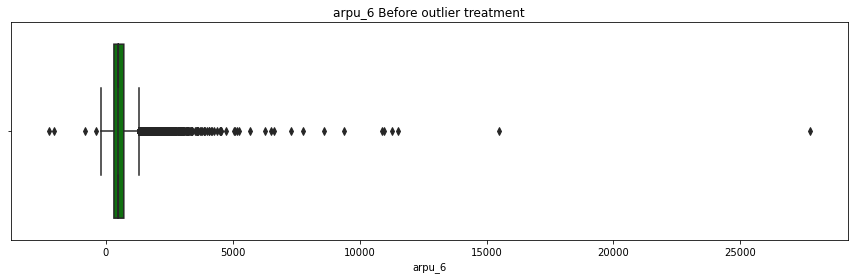

145  count of extreme outliers present in Column  arpu_7
0.48  percentage of extreme outliers present in Column  arpu_7


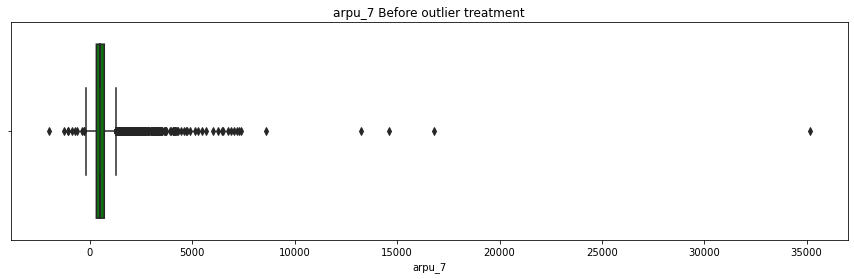

116  count of extreme outliers present in Column  arpu_8
0.39  percentage of extreme outliers present in Column  arpu_8


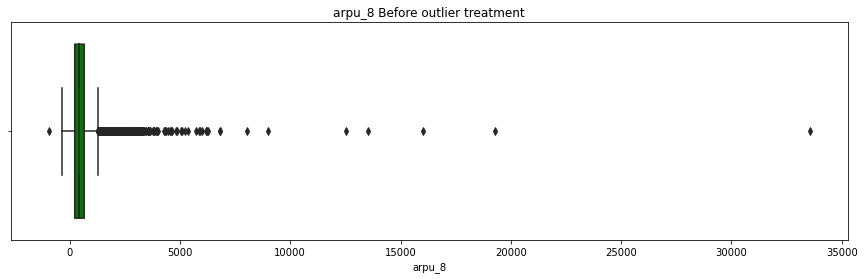

765  count of extreme outliers present in Column  onnet_mou_6
2.55  percentage of extreme outliers present in Column  onnet_mou_6


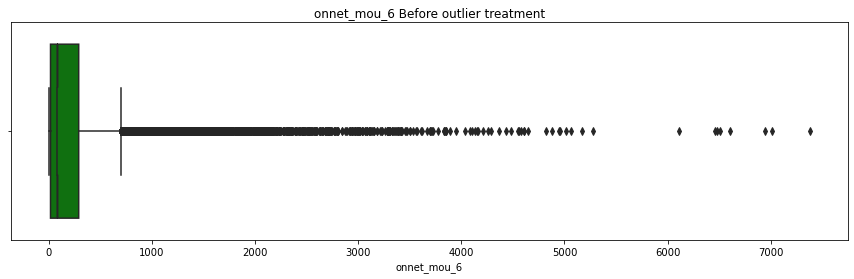

842  count of extreme outliers present in Column  onnet_mou_7
2.81  percentage of extreme outliers present in Column  onnet_mou_7


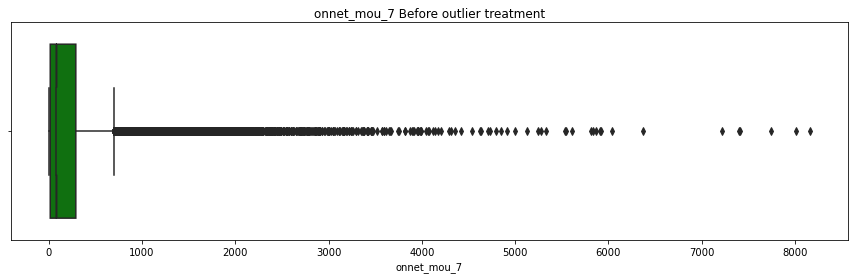

1085  count of extreme outliers present in Column  onnet_mou_8
3.62  percentage of extreme outliers present in Column  onnet_mou_8


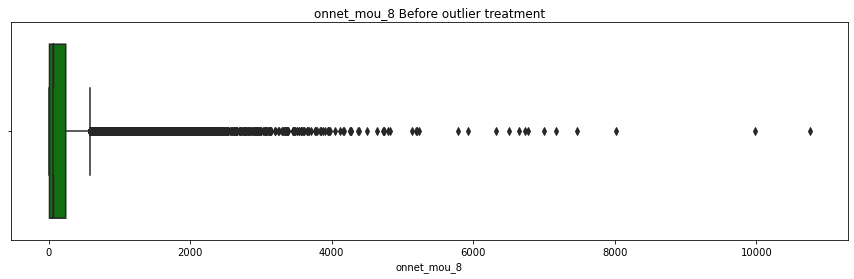

286  count of extreme outliers present in Column  offnet_mou_6
0.95  percentage of extreme outliers present in Column  offnet_mou_6


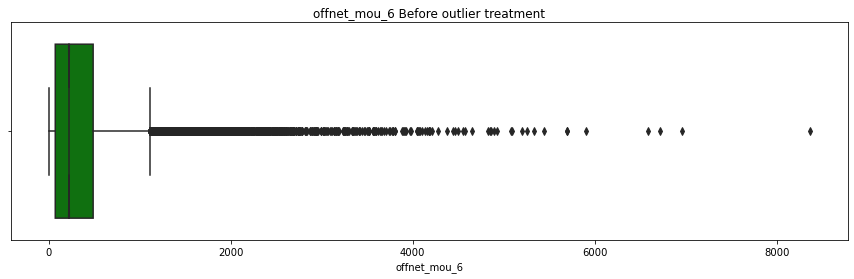

302  count of extreme outliers present in Column  offnet_mou_7
1.01  percentage of extreme outliers present in Column  offnet_mou_7


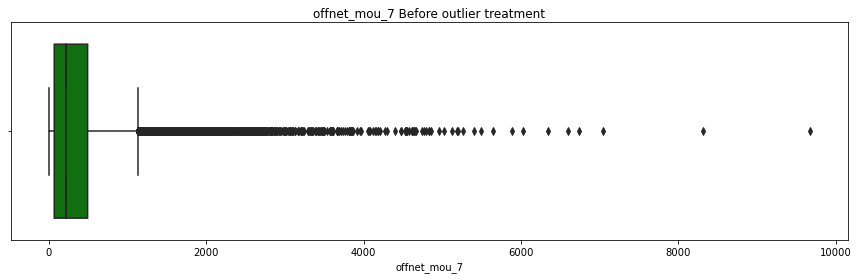

295  count of extreme outliers present in Column  offnet_mou_8
0.98  percentage of extreme outliers present in Column  offnet_mou_8


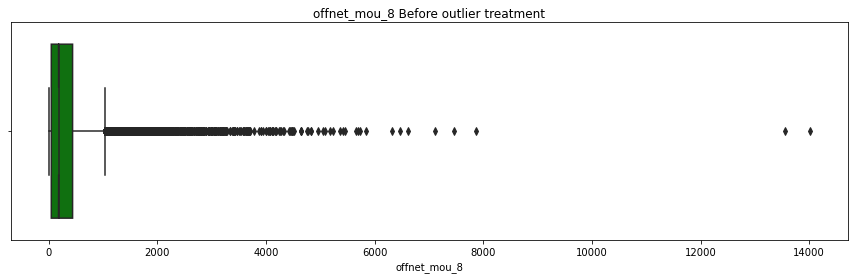

6354  count of extreme outliers present in Column  roam_ic_mou_6
21.18  percentage of extreme outliers present in Column  roam_ic_mou_6


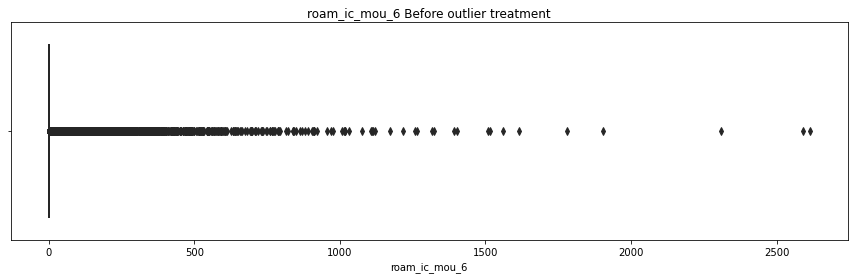

5065  count of extreme outliers present in Column  roam_ic_mou_7
16.88  percentage of extreme outliers present in Column  roam_ic_mou_7


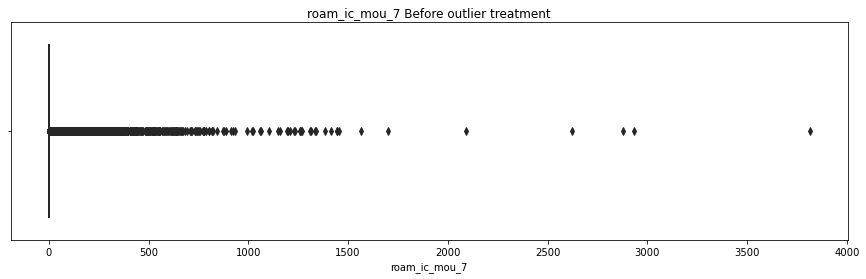

5338  count of extreme outliers present in Column  roam_ic_mou_8
17.79  percentage of extreme outliers present in Column  roam_ic_mou_8


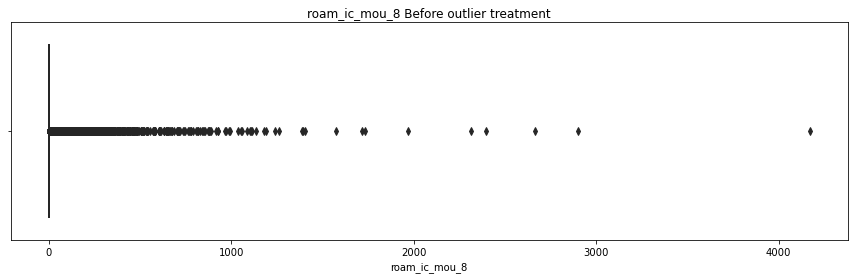

6374  count of extreme outliers present in Column  roam_og_mou_6
21.25  percentage of extreme outliers present in Column  roam_og_mou_6


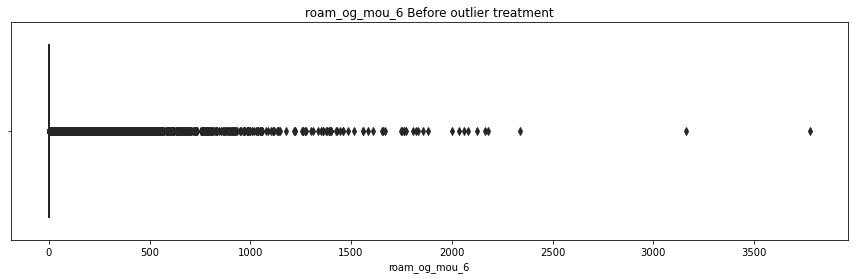

5121  count of extreme outliers present in Column  roam_og_mou_7
17.07  percentage of extreme outliers present in Column  roam_og_mou_7


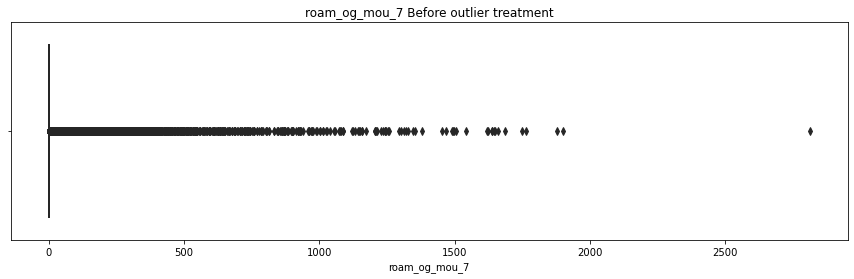

5314  count of extreme outliers present in Column  roam_og_mou_8
17.71  percentage of extreme outliers present in Column  roam_og_mou_8


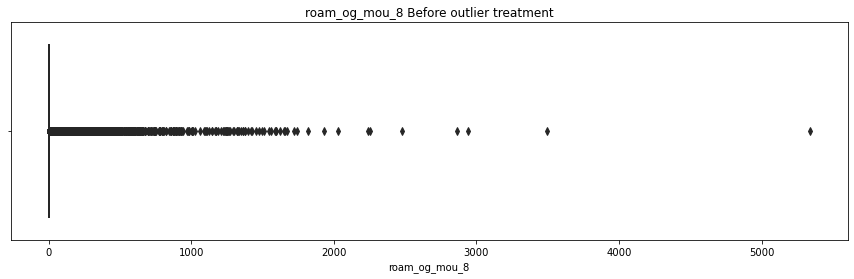

1098  count of extreme outliers present in Column  loc_og_t2t_mou_6
3.66  percentage of extreme outliers present in Column  loc_og_t2t_mou_6


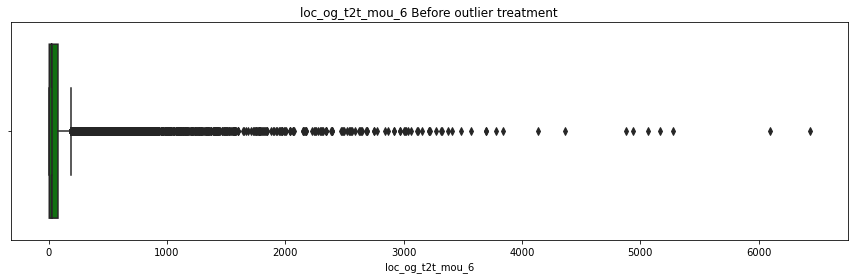

1102  count of extreme outliers present in Column  loc_og_t2t_mou_7
3.67  percentage of extreme outliers present in Column  loc_og_t2t_mou_7


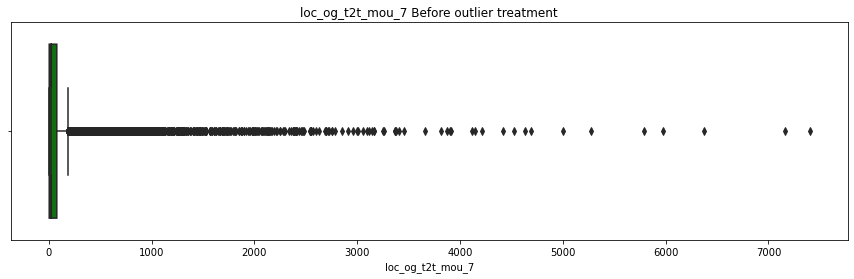

1074  count of extreme outliers present in Column  loc_og_t2t_mou_8
3.58  percentage of extreme outliers present in Column  loc_og_t2t_mou_8


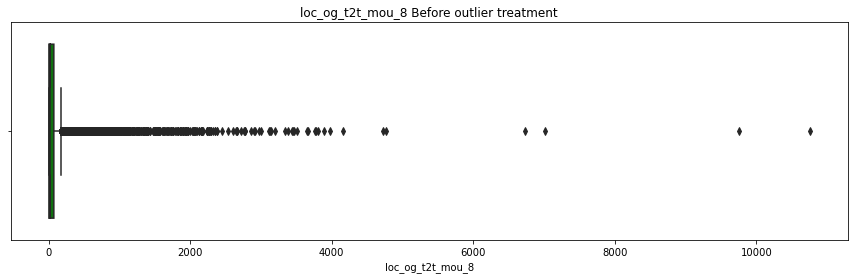

372  count of extreme outliers present in Column  loc_og_t2m_mou_6
1.24  percentage of extreme outliers present in Column  loc_og_t2m_mou_6


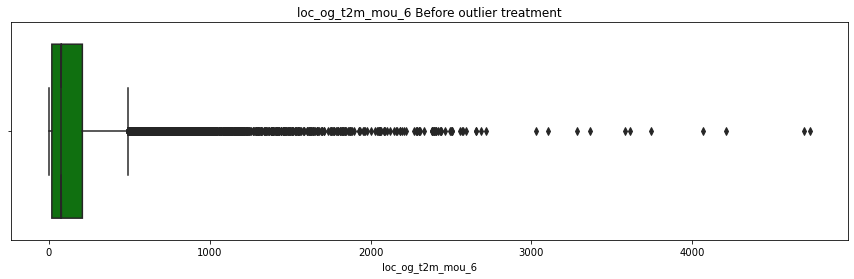

342  count of extreme outliers present in Column  loc_og_t2m_mou_7
1.14  percentage of extreme outliers present in Column  loc_og_t2m_mou_7


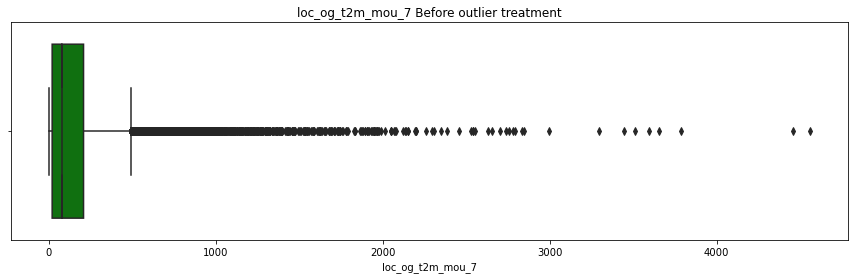

355  count of extreme outliers present in Column  loc_og_t2m_mou_8
1.18  percentage of extreme outliers present in Column  loc_og_t2m_mou_8


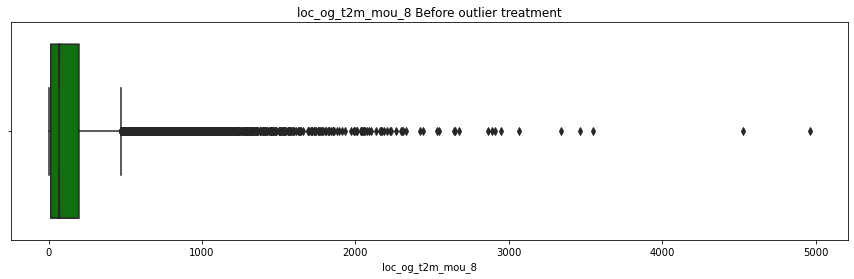

2042  count of extreme outliers present in Column  loc_og_t2f_mou_6
6.81  percentage of extreme outliers present in Column  loc_og_t2f_mou_6


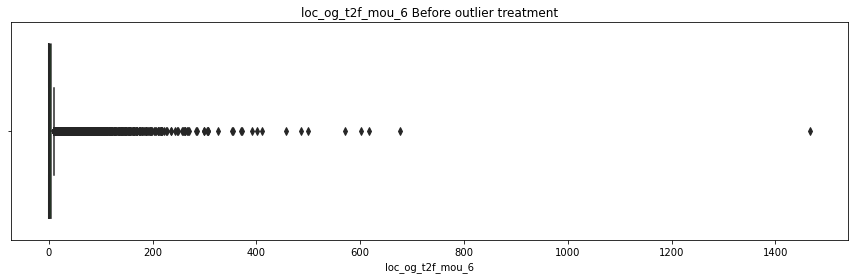

2023  count of extreme outliers present in Column  loc_og_t2f_mou_7
6.74  percentage of extreme outliers present in Column  loc_og_t2f_mou_7


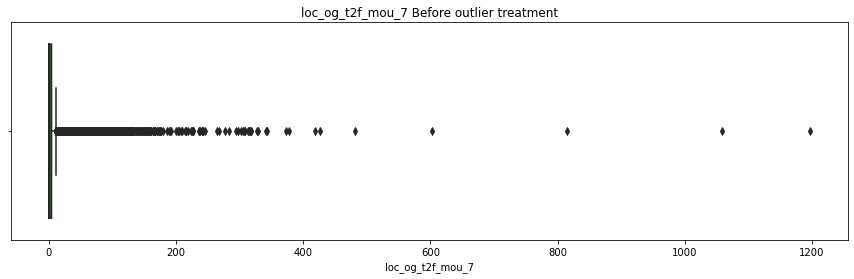

2076  count of extreme outliers present in Column  loc_og_t2f_mou_8
6.92  percentage of extreme outliers present in Column  loc_og_t2f_mou_8


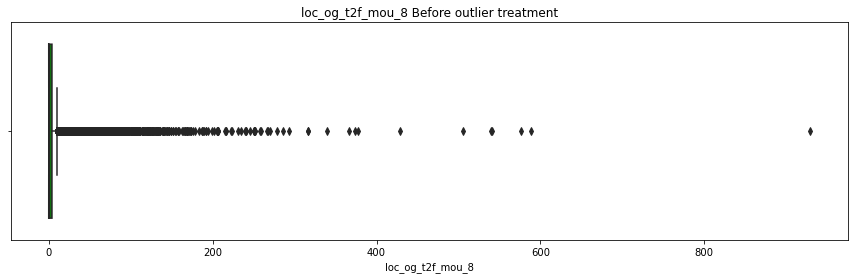

7353  count of extreme outliers present in Column  loc_og_t2c_mou_6
24.51  percentage of extreme outliers present in Column  loc_og_t2c_mou_6


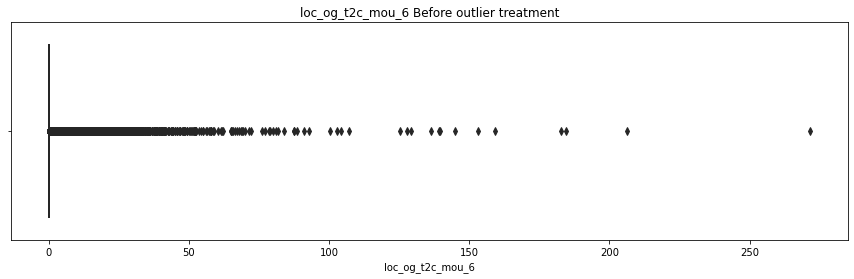

6601  count of extreme outliers present in Column  loc_og_t2c_mou_7
22.0  percentage of extreme outliers present in Column  loc_og_t2c_mou_7


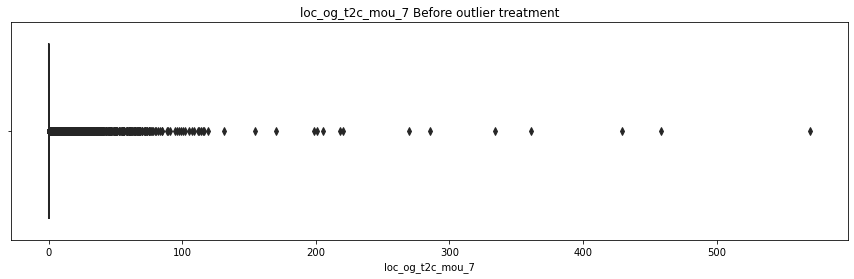

7373  count of extreme outliers present in Column  loc_og_t2c_mou_8
24.58  percentage of extreme outliers present in Column  loc_og_t2c_mou_8


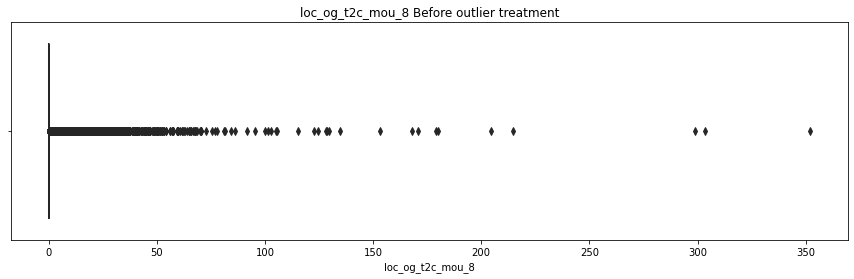

351  count of extreme outliers present in Column  loc_og_mou_6
1.17  percentage of extreme outliers present in Column  loc_og_mou_6


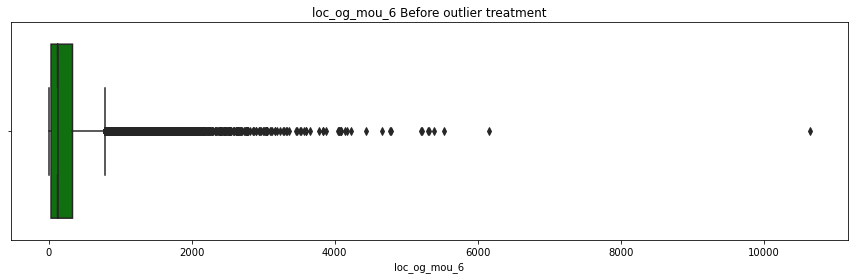

335  count of extreme outliers present in Column  loc_og_mou_7
1.12  percentage of extreme outliers present in Column  loc_og_mou_7


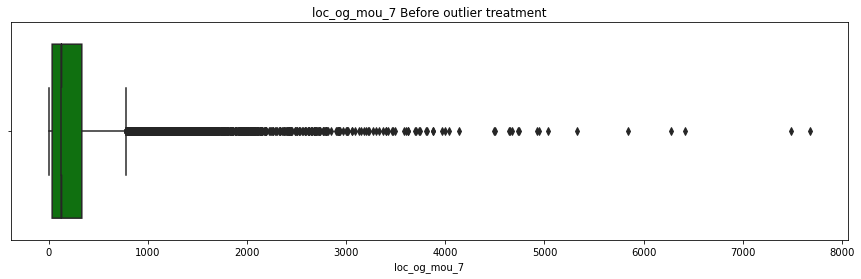

328  count of extreme outliers present in Column  loc_og_mou_8
1.09  percentage of extreme outliers present in Column  loc_og_mou_8


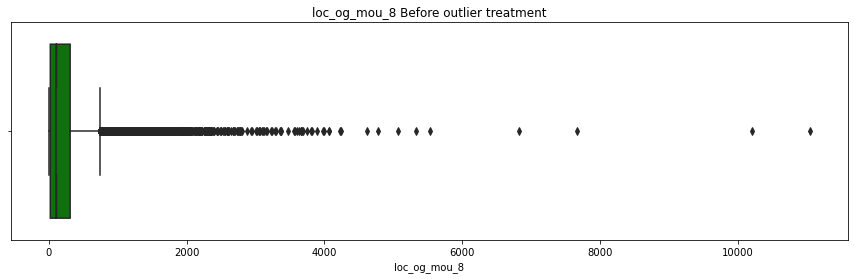

2818  count of extreme outliers present in Column  std_og_t2t_mou_6
9.39  percentage of extreme outliers present in Column  std_og_t2t_mou_6


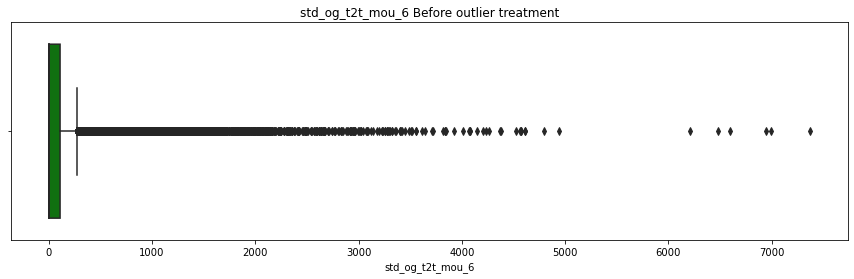

2810  count of extreme outliers present in Column  std_og_t2t_mou_7
9.37  percentage of extreme outliers present in Column  std_og_t2t_mou_7


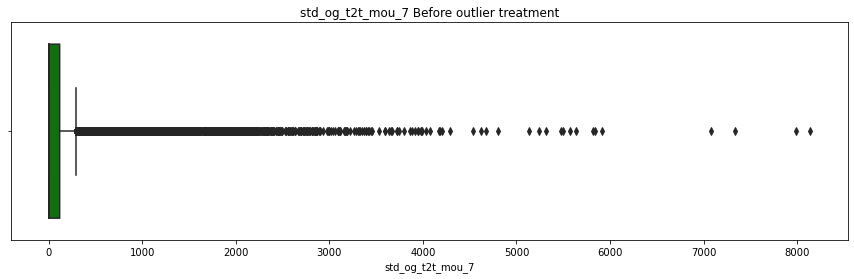

3224  count of extreme outliers present in Column  std_og_t2t_mou_8
10.75  percentage of extreme outliers present in Column  std_og_t2t_mou_8


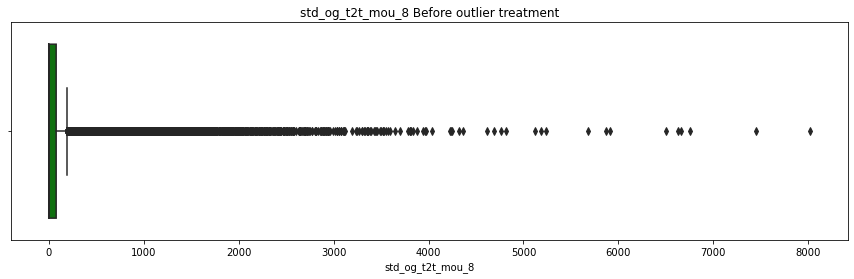

1725  count of extreme outliers present in Column  std_og_t2m_mou_6
5.75  percentage of extreme outliers present in Column  std_og_t2m_mou_6


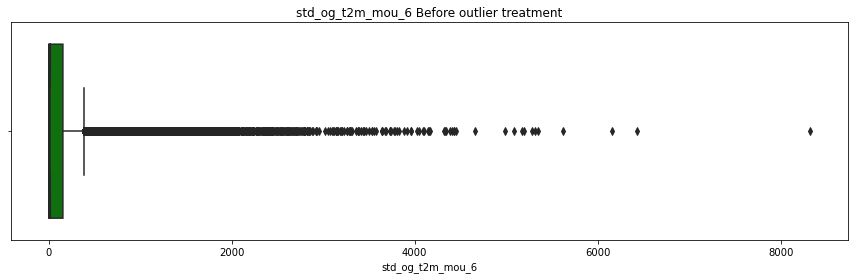

1770  count of extreme outliers present in Column  std_og_t2m_mou_7
5.9  percentage of extreme outliers present in Column  std_og_t2m_mou_7


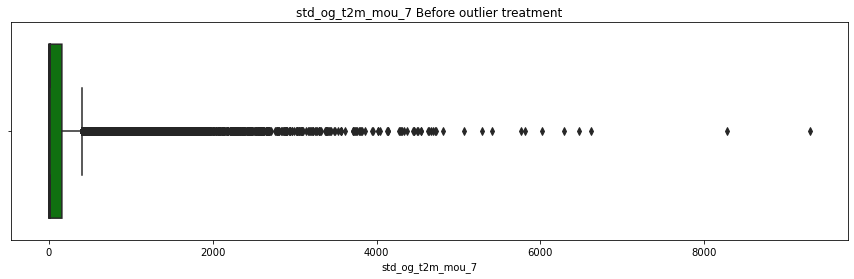

2113  count of extreme outliers present in Column  std_og_t2m_mou_8
7.04  percentage of extreme outliers present in Column  std_og_t2m_mou_8


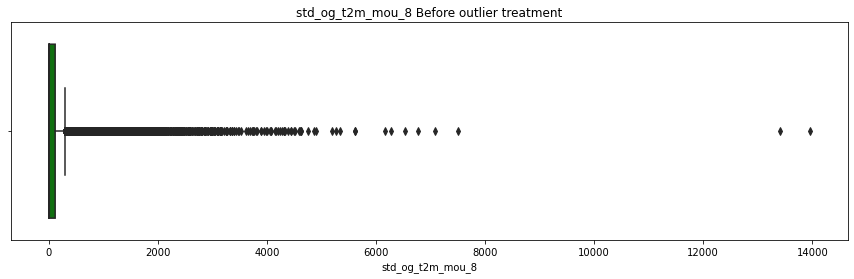

4607  count of extreme outliers present in Column  std_og_t2f_mou_6
15.36  percentage of extreme outliers present in Column  std_og_t2f_mou_6


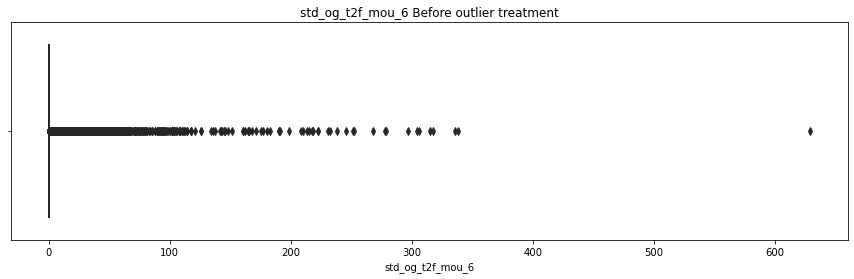

4418  count of extreme outliers present in Column  std_og_t2f_mou_7
14.73  percentage of extreme outliers present in Column  std_og_t2f_mou_7


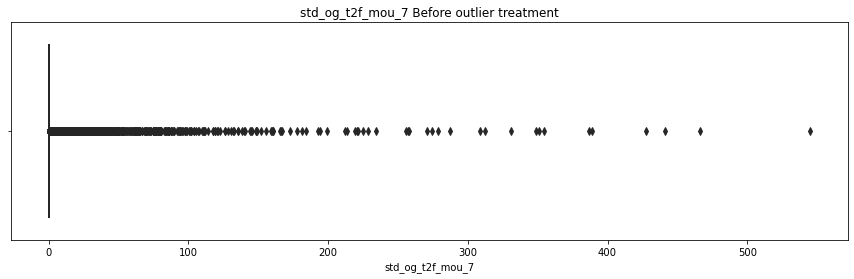

4214  count of extreme outliers present in Column  std_og_t2f_mou_8
14.05  percentage of extreme outliers present in Column  std_og_t2f_mou_8


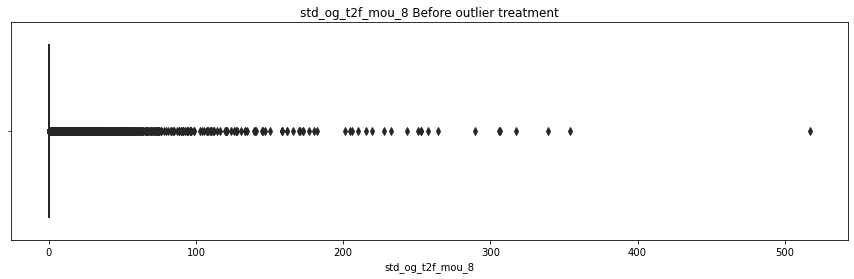

372  count of extreme outliers present in Column  std_og_mou_6
1.24  percentage of extreme outliers present in Column  std_og_mou_6


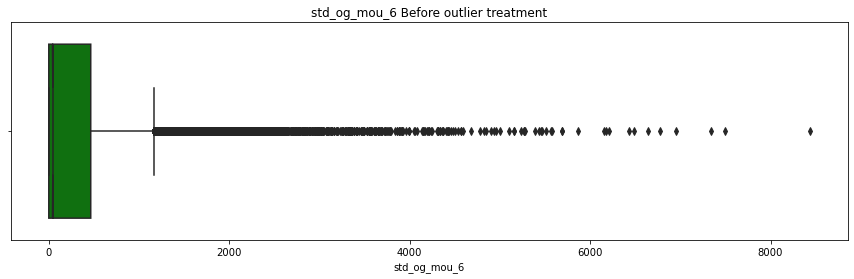

351  count of extreme outliers present in Column  std_og_mou_7
1.17  percentage of extreme outliers present in Column  std_og_mou_7


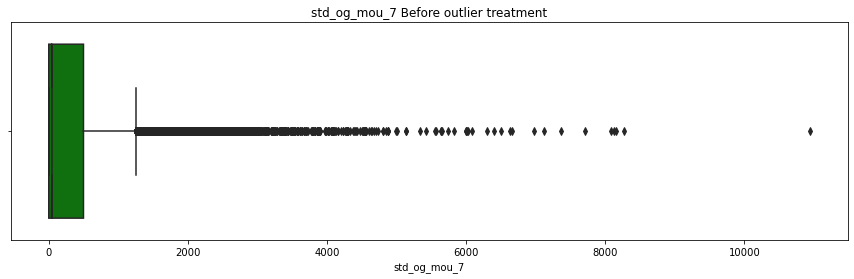

756  count of extreme outliers present in Column  std_og_mou_8
2.52  percentage of extreme outliers present in Column  std_og_mou_8


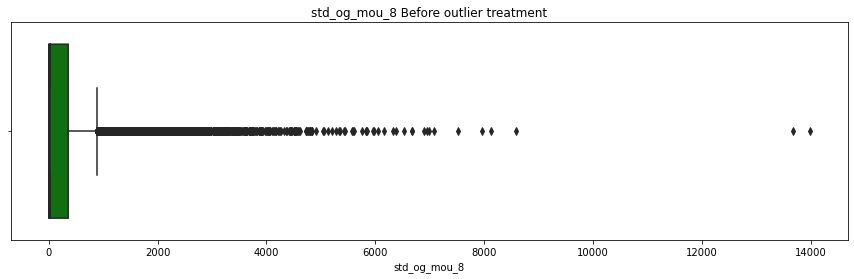

2343  count of extreme outliers present in Column  isd_og_mou_6
7.81  percentage of extreme outliers present in Column  isd_og_mou_6


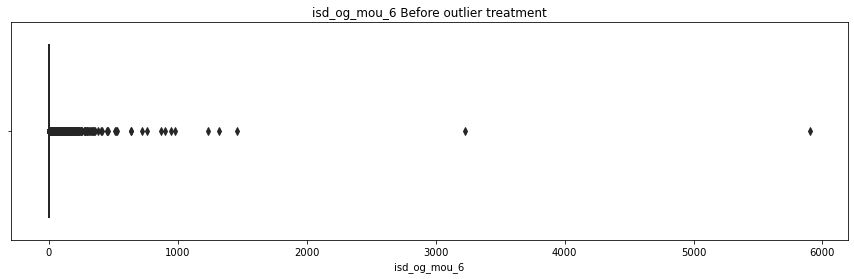

2233  count of extreme outliers present in Column  isd_og_mou_7
7.44  percentage of extreme outliers present in Column  isd_og_mou_7


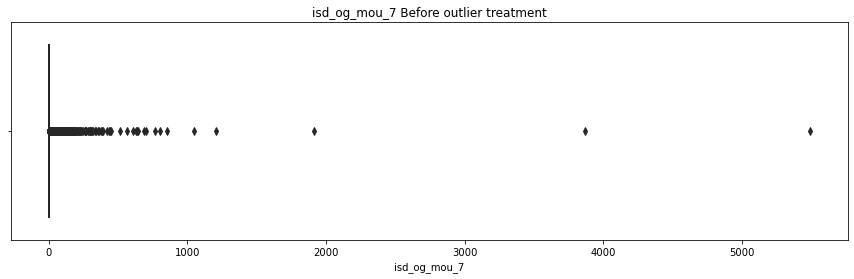

1902  count of extreme outliers present in Column  isd_og_mou_8
6.34  percentage of extreme outliers present in Column  isd_og_mou_8


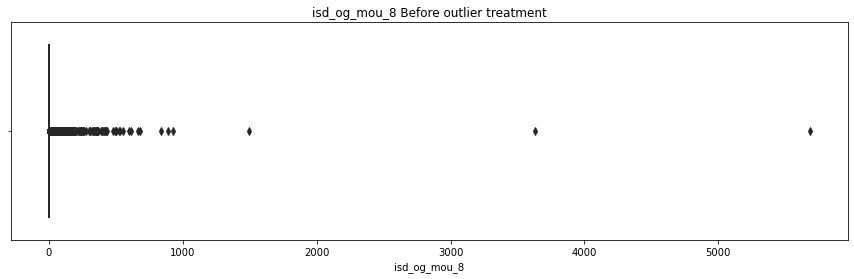

1369  count of extreme outliers present in Column  spl_og_mou_6
4.56  percentage of extreme outliers present in Column  spl_og_mou_6


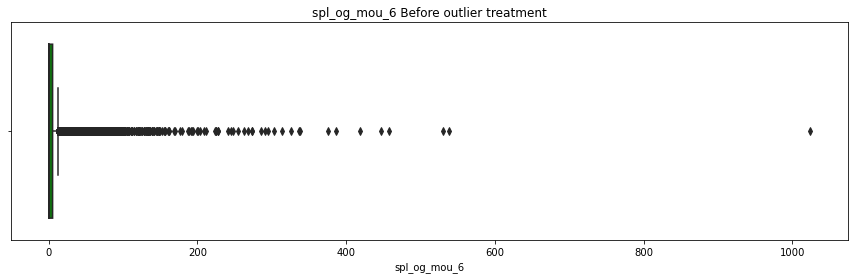

1063  count of extreme outliers present in Column  spl_og_mou_7
3.54  percentage of extreme outliers present in Column  spl_og_mou_7


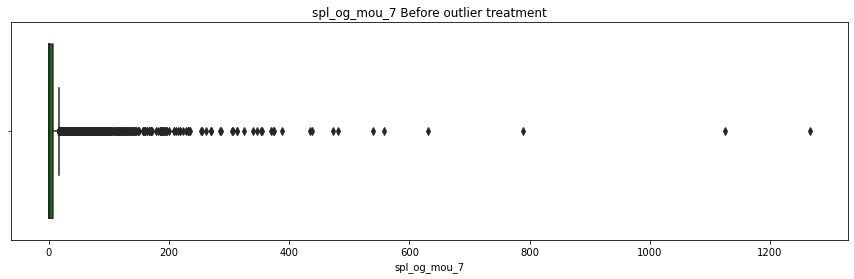

1168  count of extreme outliers present in Column  spl_og_mou_8
3.89  percentage of extreme outliers present in Column  spl_og_mou_8


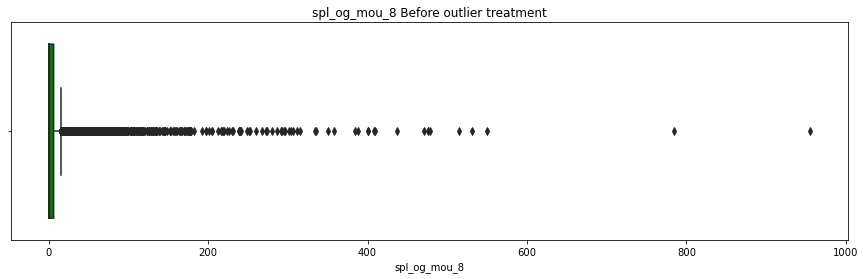

6850  count of extreme outliers present in Column  og_others_6
22.83  percentage of extreme outliers present in Column  og_others_6


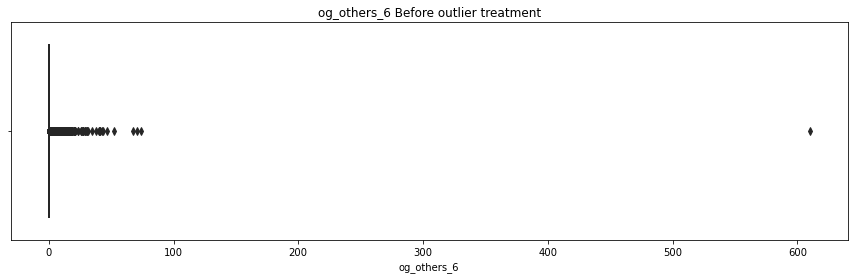

153  count of extreme outliers present in Column  og_others_7
0.51  percentage of extreme outliers present in Column  og_others_7


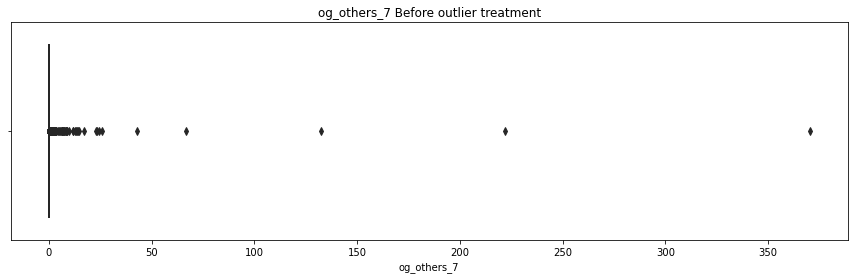

171  count of extreme outliers present in Column  og_others_8
0.57  percentage of extreme outliers present in Column  og_others_8


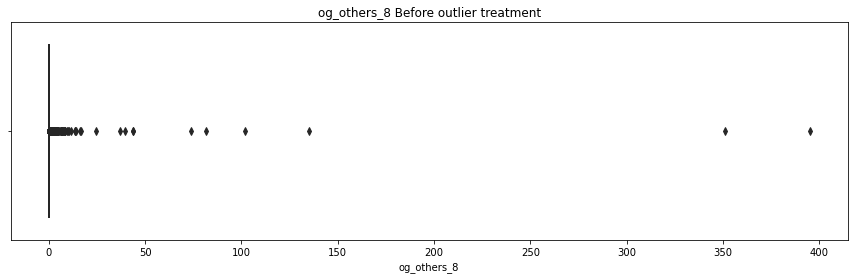

99  count of extreme outliers present in Column  total_og_mou_6
0.33  percentage of extreme outliers present in Column  total_og_mou_6


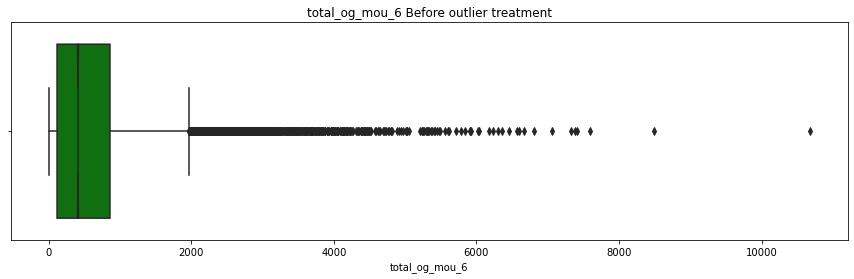

107  count of extreme outliers present in Column  total_og_mou_7
0.36  percentage of extreme outliers present in Column  total_og_mou_7


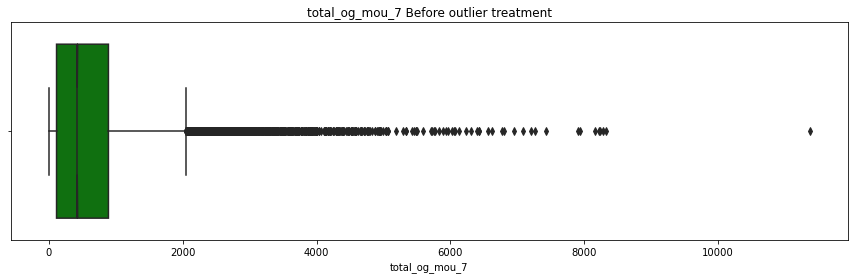

134  count of extreme outliers present in Column  total_og_mou_8
0.45  percentage of extreme outliers present in Column  total_og_mou_8


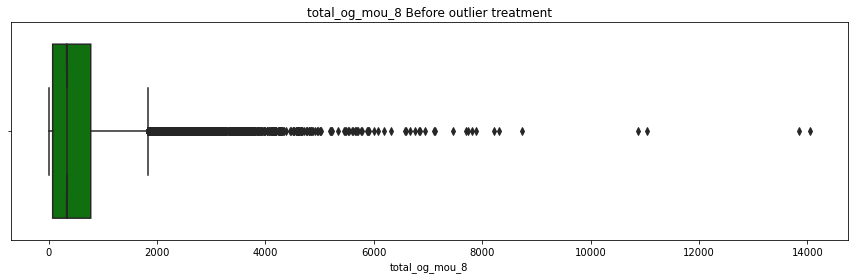

784  count of extreme outliers present in Column  loc_ic_t2t_mou_6
2.61  percentage of extreme outliers present in Column  loc_ic_t2t_mou_6


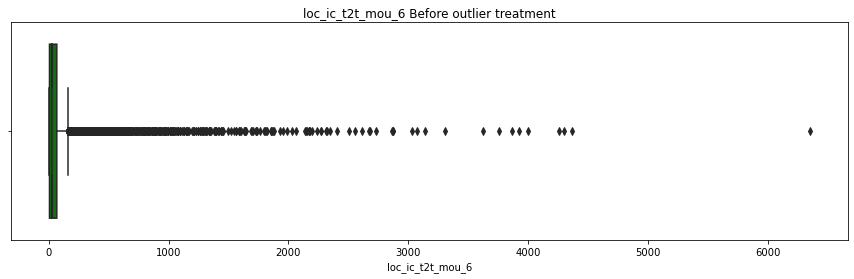

786  count of extreme outliers present in Column  loc_ic_t2t_mou_7
2.62  percentage of extreme outliers present in Column  loc_ic_t2t_mou_7


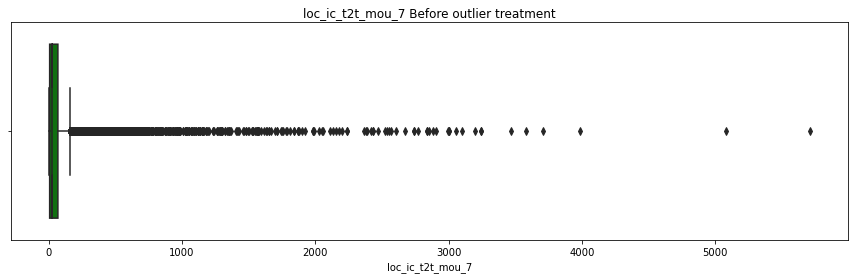

735  count of extreme outliers present in Column  loc_ic_t2t_mou_8
2.45  percentage of extreme outliers present in Column  loc_ic_t2t_mou_8


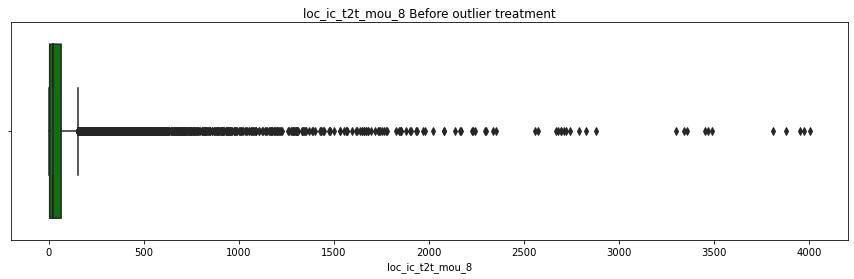

410  count of extreme outliers present in Column  loc_ic_t2m_mou_6
1.37  percentage of extreme outliers present in Column  loc_ic_t2m_mou_6


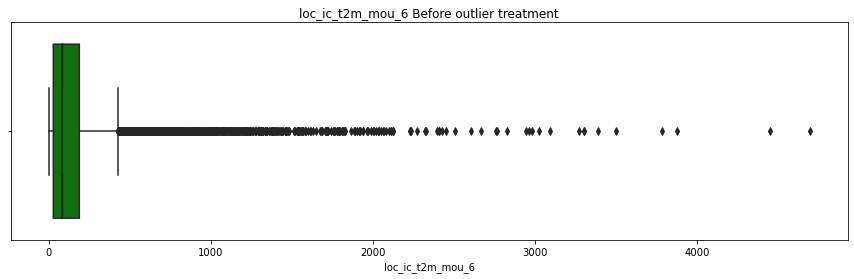

371  count of extreme outliers present in Column  loc_ic_t2m_mou_7
1.24  percentage of extreme outliers present in Column  loc_ic_t2m_mou_7


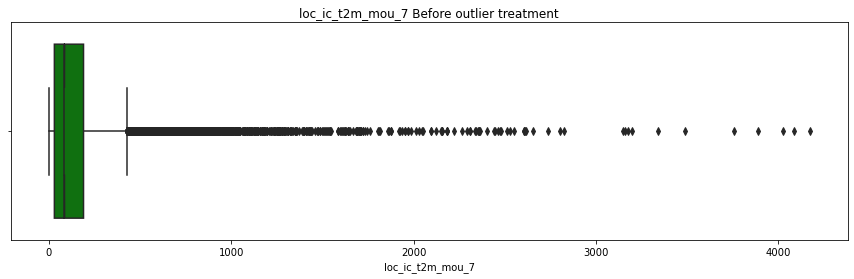

360  count of extreme outliers present in Column  loc_ic_t2m_mou_8
1.2  percentage of extreme outliers present in Column  loc_ic_t2m_mou_8


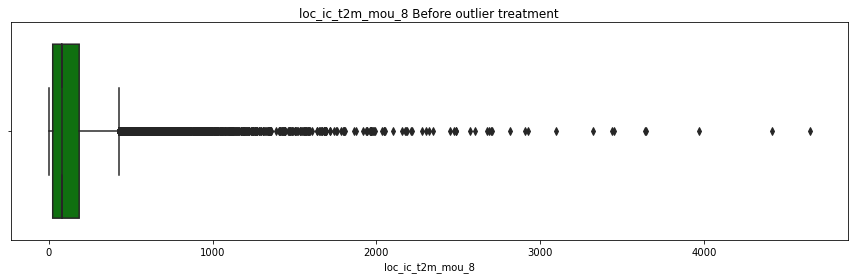

1667  count of extreme outliers present in Column  loc_ic_t2f_mou_6
5.56  percentage of extreme outliers present in Column  loc_ic_t2f_mou_6


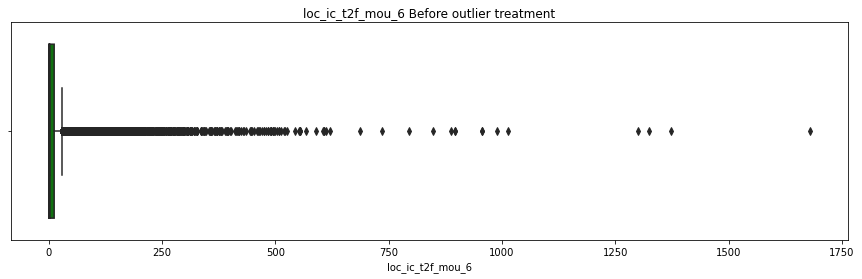

1687  count of extreme outliers present in Column  loc_ic_t2f_mou_7
5.62  percentage of extreme outliers present in Column  loc_ic_t2f_mou_7


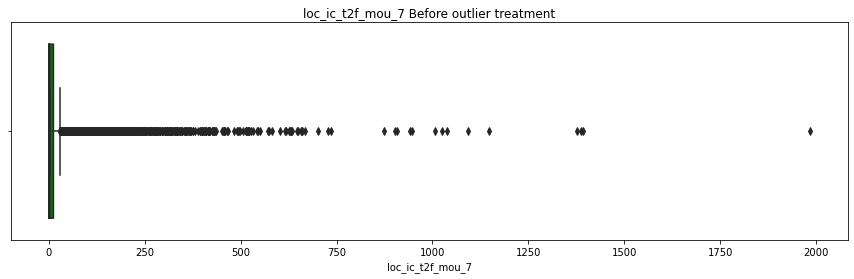

1624  count of extreme outliers present in Column  loc_ic_t2f_mou_8
5.41  percentage of extreme outliers present in Column  loc_ic_t2f_mou_8


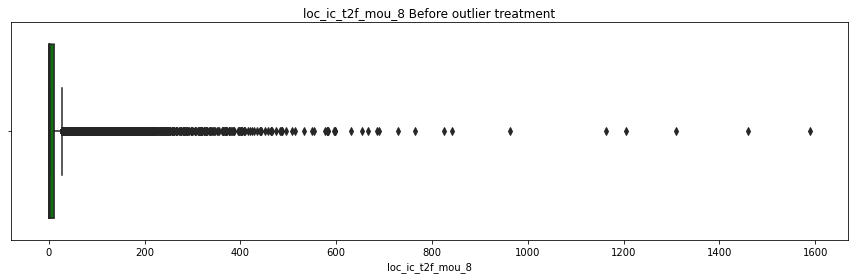

337  count of extreme outliers present in Column  loc_ic_mou_6
1.12  percentage of extreme outliers present in Column  loc_ic_mou_6


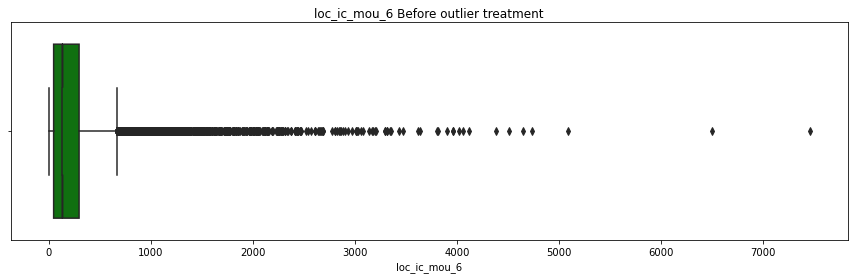

344  count of extreme outliers present in Column  loc_ic_mou_7
1.15  percentage of extreme outliers present in Column  loc_ic_mou_7


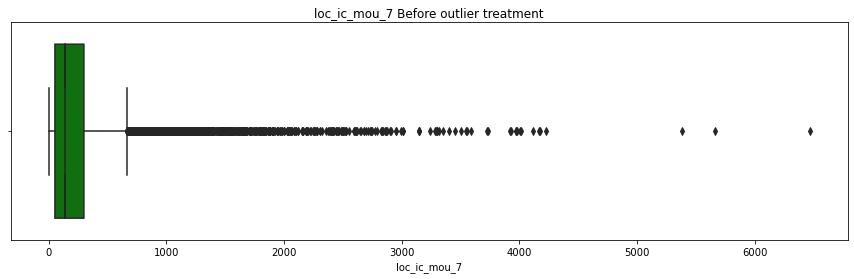

339  count of extreme outliers present in Column  loc_ic_mou_8
1.13  percentage of extreme outliers present in Column  loc_ic_mou_8


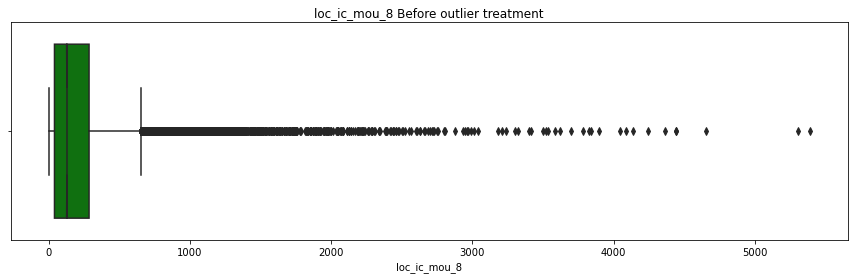

2071  count of extreme outliers present in Column  std_ic_t2t_mou_6
6.9  percentage of extreme outliers present in Column  std_ic_t2t_mou_6


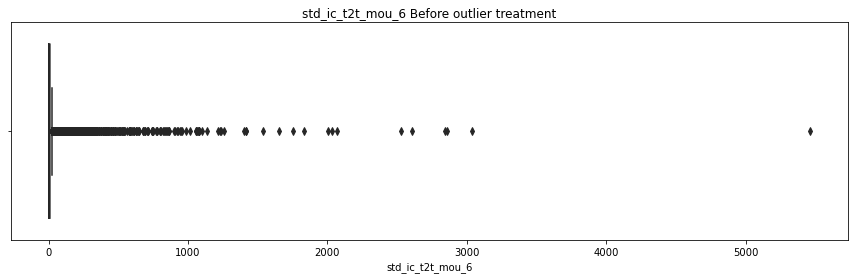

2039  count of extreme outliers present in Column  std_ic_t2t_mou_7
6.8  percentage of extreme outliers present in Column  std_ic_t2t_mou_7


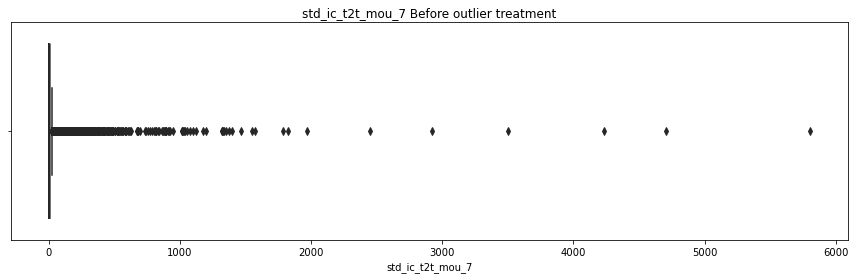

2266  count of extreme outliers present in Column  std_ic_t2t_mou_8
7.55  percentage of extreme outliers present in Column  std_ic_t2t_mou_8


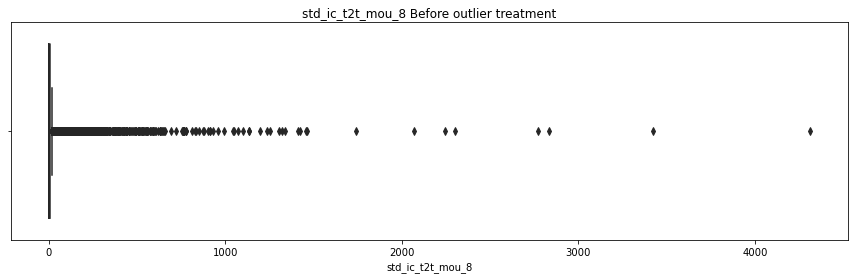

1356  count of extreme outliers present in Column  std_ic_t2m_mou_6
4.52  percentage of extreme outliers present in Column  std_ic_t2m_mou_6


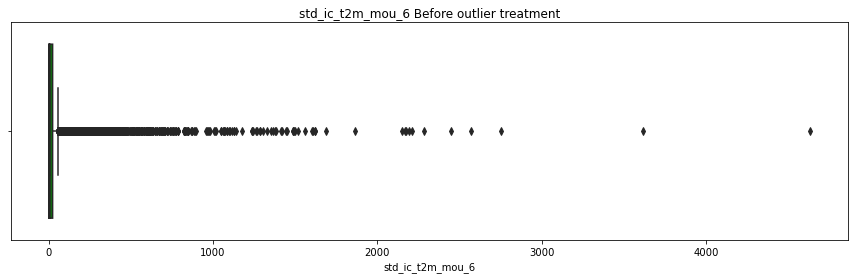

1293  count of extreme outliers present in Column  std_ic_t2m_mou_7
4.31  percentage of extreme outliers present in Column  std_ic_t2m_mou_7


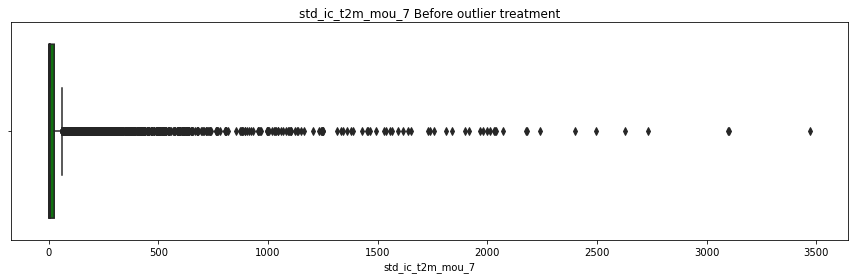

1415  count of extreme outliers present in Column  std_ic_t2m_mou_8
4.72  percentage of extreme outliers present in Column  std_ic_t2m_mou_8


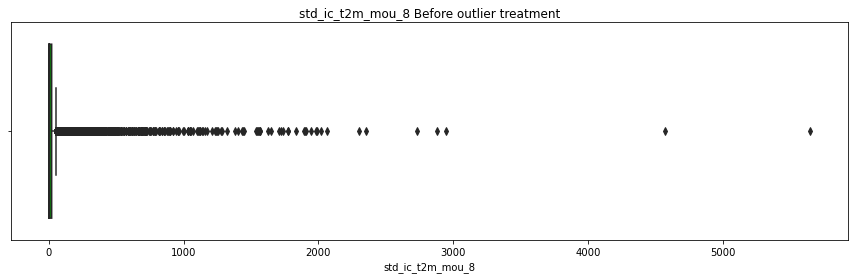

6116  count of extreme outliers present in Column  std_ic_t2f_mou_6
20.39  percentage of extreme outliers present in Column  std_ic_t2f_mou_6


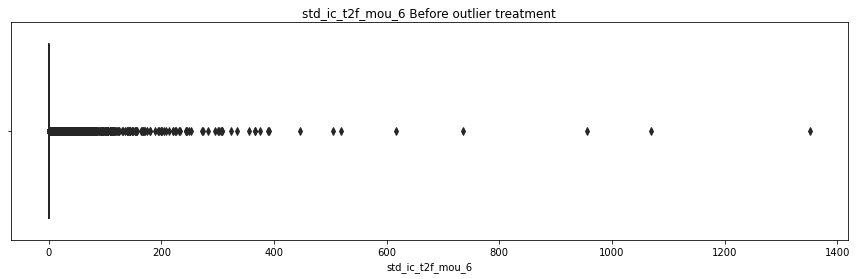

5378  count of extreme outliers present in Column  std_ic_t2f_mou_7
17.93  percentage of extreme outliers present in Column  std_ic_t2f_mou_7


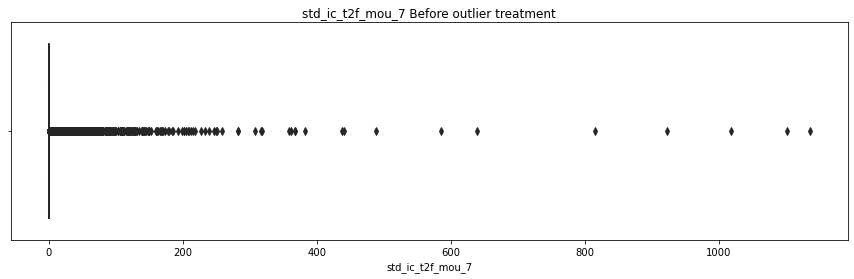

6510  count of extreme outliers present in Column  std_ic_t2f_mou_8
21.7  percentage of extreme outliers present in Column  std_ic_t2f_mou_8


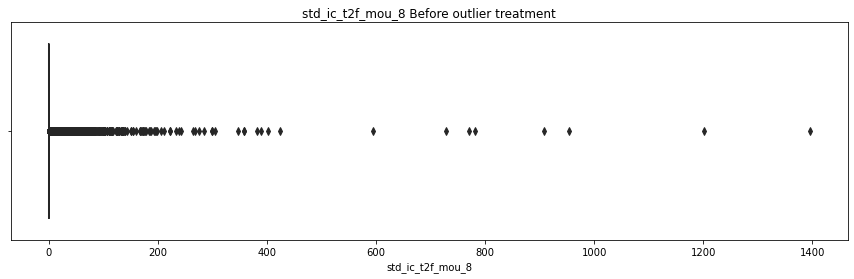

1210  count of extreme outliers present in Column  std_ic_mou_6
4.03  percentage of extreme outliers present in Column  std_ic_mou_6


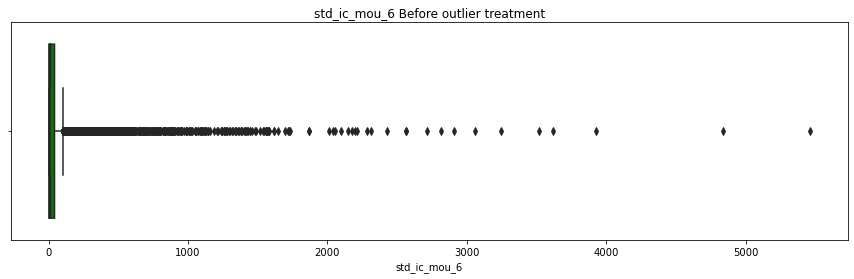

1151  count of extreme outliers present in Column  std_ic_mou_7
3.84  percentage of extreme outliers present in Column  std_ic_mou_7


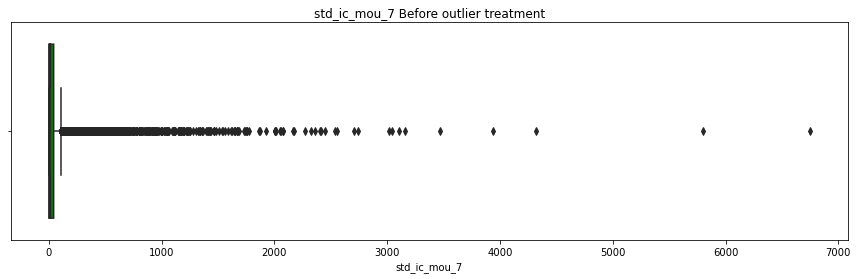

1244  count of extreme outliers present in Column  std_ic_mou_8
4.15  percentage of extreme outliers present in Column  std_ic_mou_8


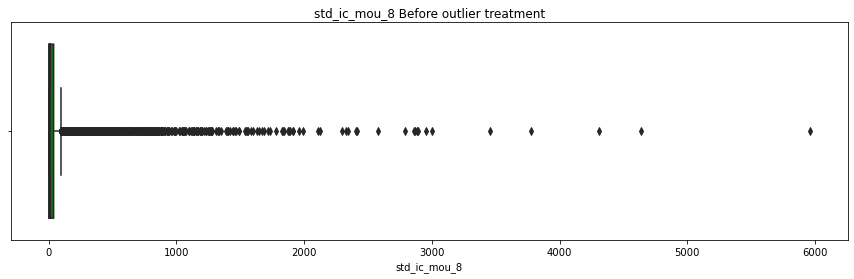

311  count of extreme outliers present in Column  total_ic_mou_6
1.04  percentage of extreme outliers present in Column  total_ic_mou_6


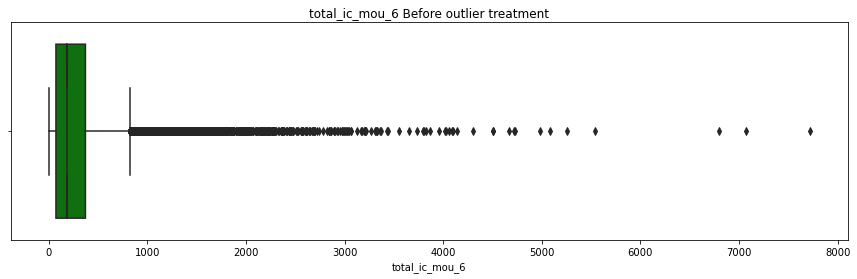

349  count of extreme outliers present in Column  total_ic_mou_7
1.16  percentage of extreme outliers present in Column  total_ic_mou_7


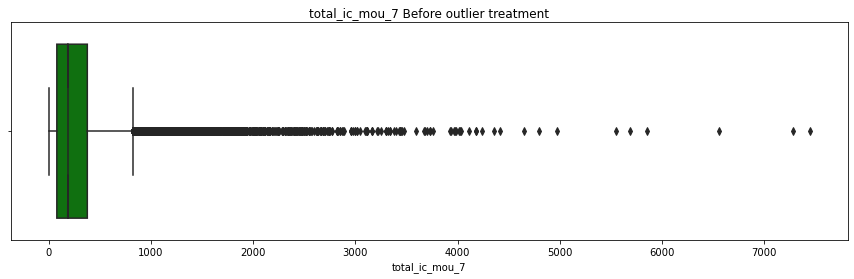

306  count of extreme outliers present in Column  total_ic_mou_8
1.02  percentage of extreme outliers present in Column  total_ic_mou_8


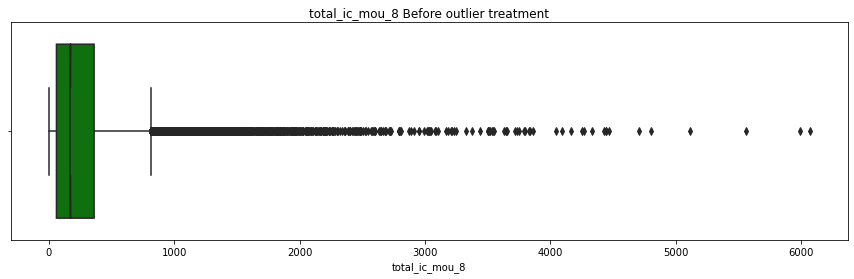

6580  count of extreme outliers present in Column  spl_ic_mou_6
21.93  percentage of extreme outliers present in Column  spl_ic_mou_6


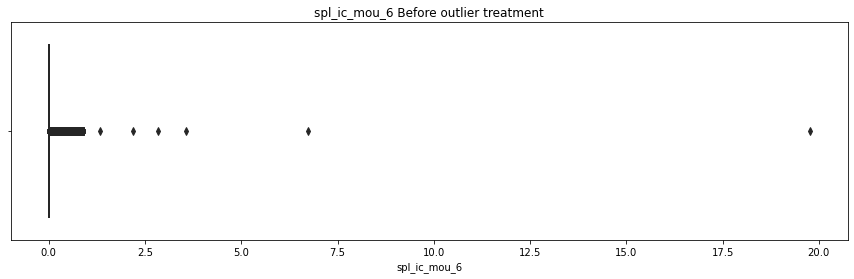

2007  count of extreme outliers present in Column  spl_ic_mou_7
6.69  percentage of extreme outliers present in Column  spl_ic_mou_7


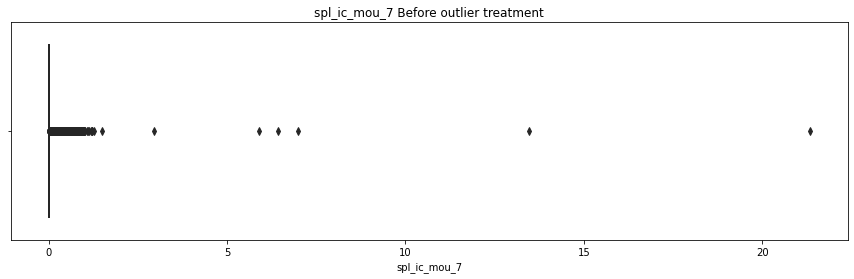

2590  count of extreme outliers present in Column  spl_ic_mou_8
8.63  percentage of extreme outliers present in Column  spl_ic_mou_8


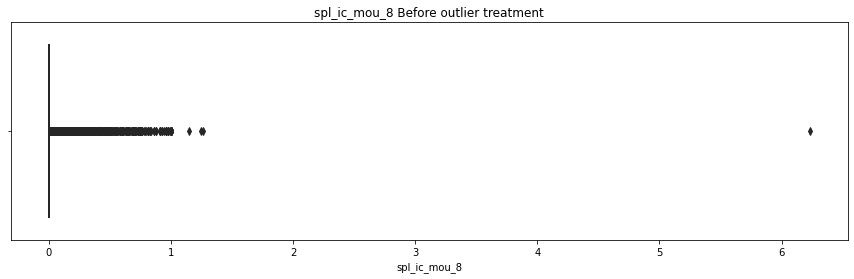

6626  count of extreme outliers present in Column  isd_ic_mou_6
22.09  percentage of extreme outliers present in Column  isd_ic_mou_6


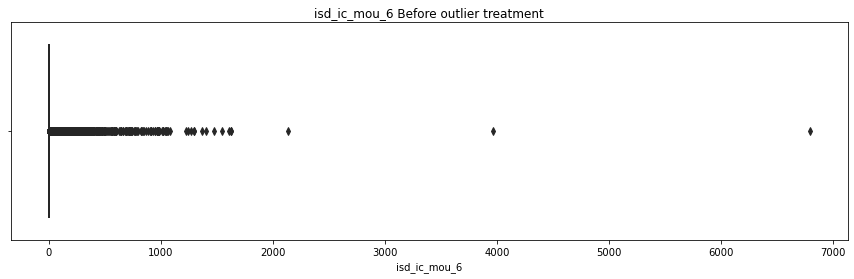

6886  count of extreme outliers present in Column  isd_ic_mou_7
22.95  percentage of extreme outliers present in Column  isd_ic_mou_7


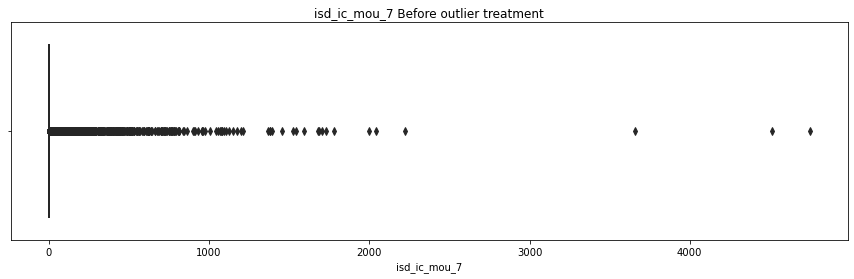

6394  count of extreme outliers present in Column  isd_ic_mou_8
21.31  percentage of extreme outliers present in Column  isd_ic_mou_8


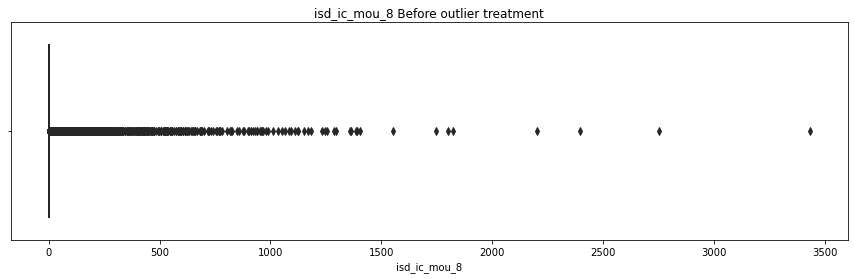

5598  count of extreme outliers present in Column  ic_others_6
18.66  percentage of extreme outliers present in Column  ic_others_6


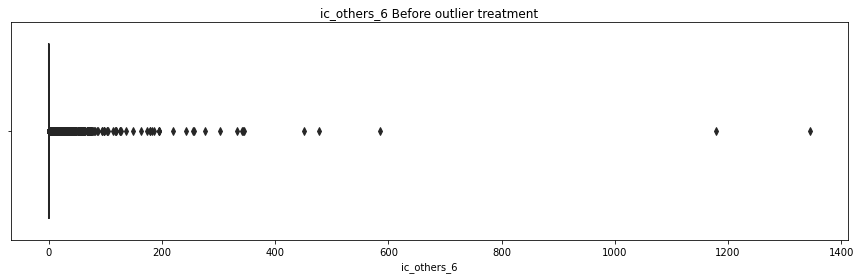

7151  count of extreme outliers present in Column  ic_others_7
23.84  percentage of extreme outliers present in Column  ic_others_7


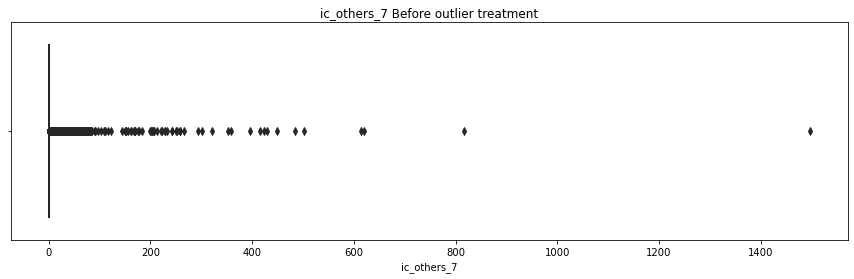

7422  count of extreme outliers present in Column  ic_others_8
24.74  percentage of extreme outliers present in Column  ic_others_8


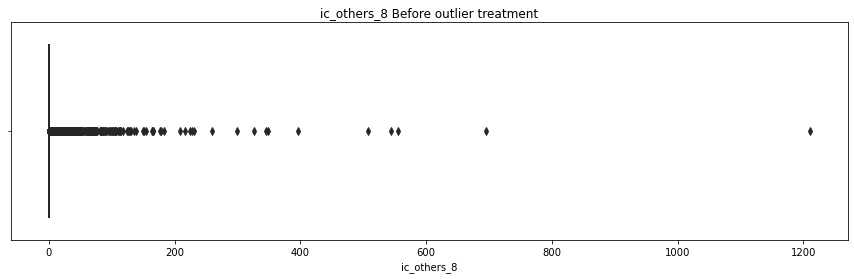

149  count of extreme outliers present in Column  total_rech_num_6
0.5  percentage of extreme outliers present in Column  total_rech_num_6


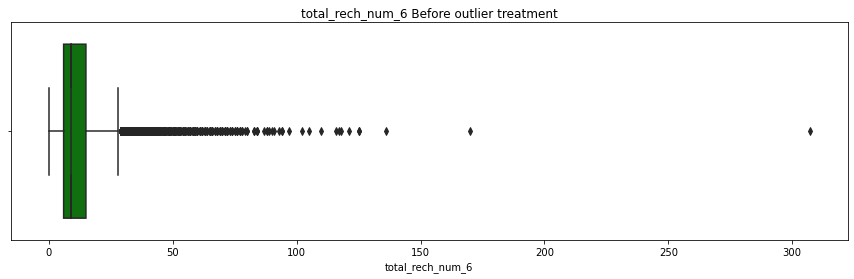

172  count of extreme outliers present in Column  total_rech_num_7
0.57  percentage of extreme outliers present in Column  total_rech_num_7


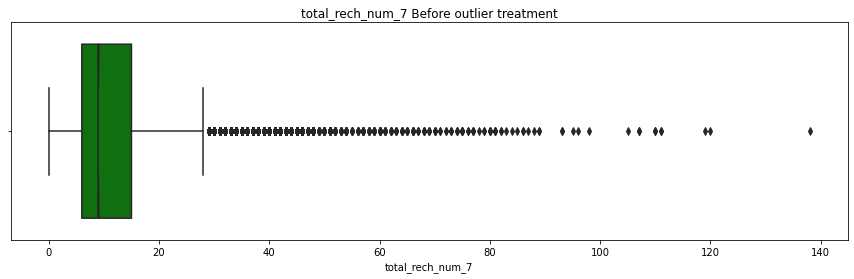

153  count of extreme outliers present in Column  total_rech_num_8
0.51  percentage of extreme outliers present in Column  total_rech_num_8


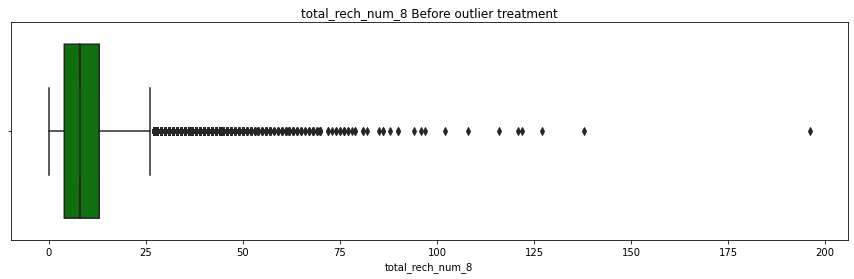

166  count of extreme outliers present in Column  total_rech_amt_6
0.55  percentage of extreme outliers present in Column  total_rech_amt_6


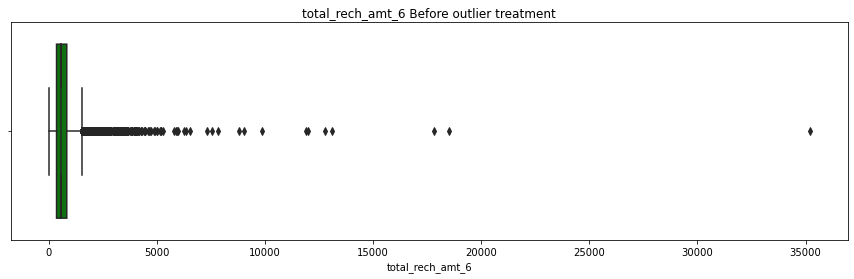

145  count of extreme outliers present in Column  total_rech_amt_7
0.48  percentage of extreme outliers present in Column  total_rech_amt_7


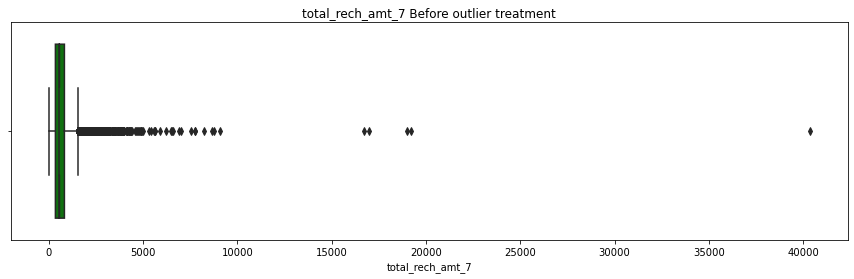

110  count of extreme outliers present in Column  total_rech_amt_8
0.37  percentage of extreme outliers present in Column  total_rech_amt_8


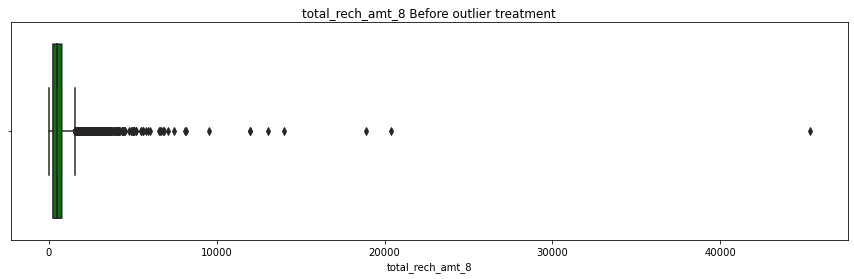

650  count of extreme outliers present in Column  max_rech_amt_6
2.17  percentage of extreme outliers present in Column  max_rech_amt_6


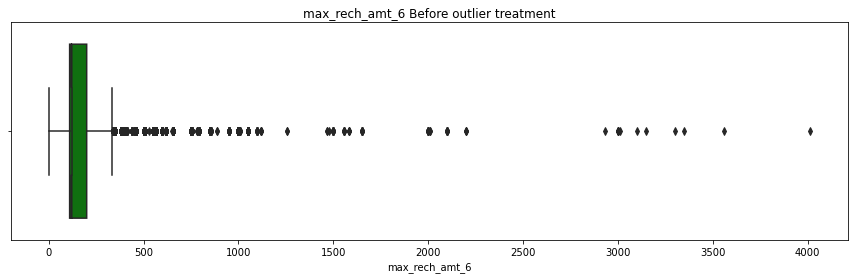

774  count of extreme outliers present in Column  max_rech_amt_7
2.58  percentage of extreme outliers present in Column  max_rech_amt_7


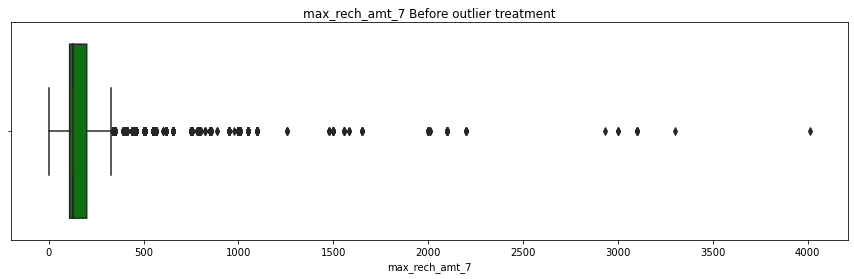

317  count of extreme outliers present in Column  max_rech_amt_8
1.06  percentage of extreme outliers present in Column  max_rech_amt_8


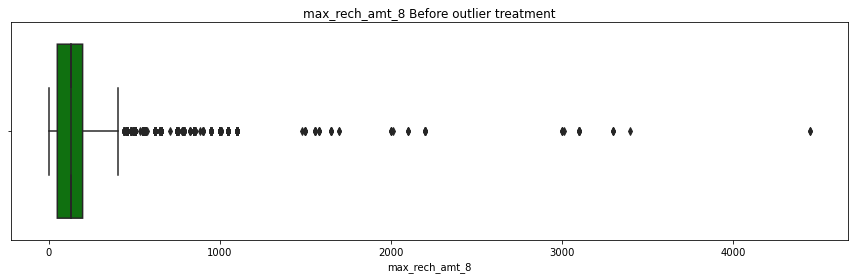

539  count of extreme outliers present in Column  last_day_rch_amt_6
1.8  percentage of extreme outliers present in Column  last_day_rch_amt_6


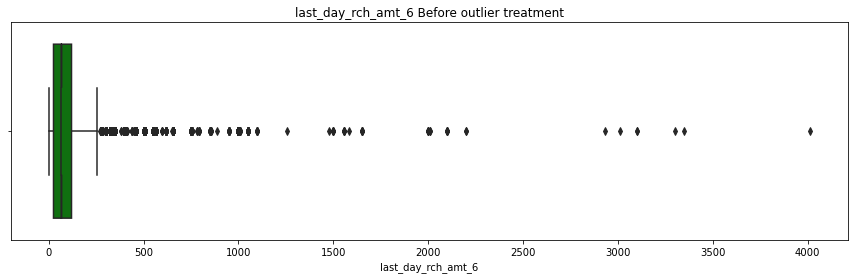

313  count of extreme outliers present in Column  last_day_rch_amt_7
1.04  percentage of extreme outliers present in Column  last_day_rch_amt_7


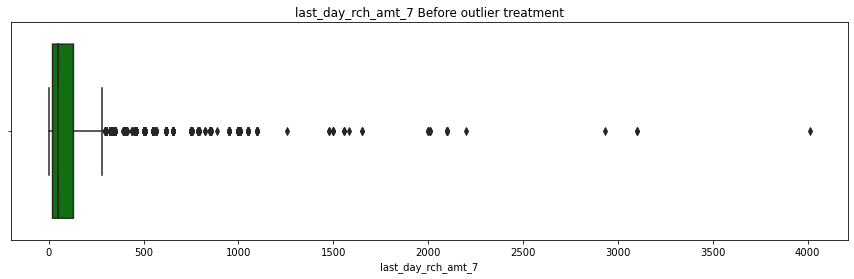

230  count of extreme outliers present in Column  last_day_rch_amt_8
0.77  percentage of extreme outliers present in Column  last_day_rch_amt_8


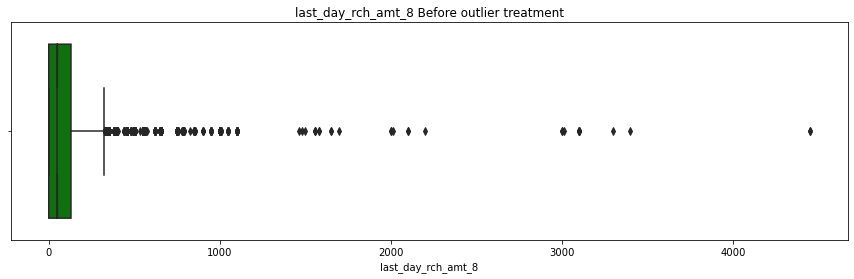

449  count of extreme outliers present in Column  total_rech_data_6
1.5  percentage of extreme outliers present in Column  total_rech_data_6


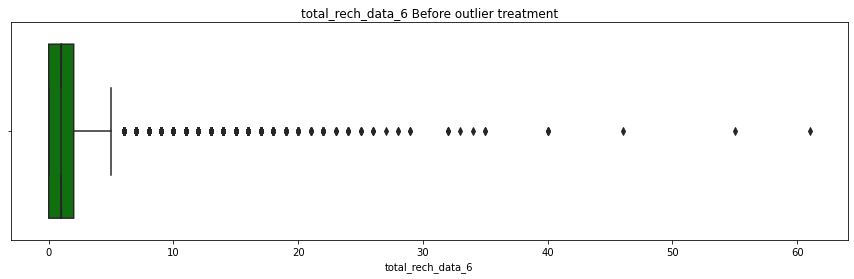

539  count of extreme outliers present in Column  total_rech_data_7
1.8  percentage of extreme outliers present in Column  total_rech_data_7


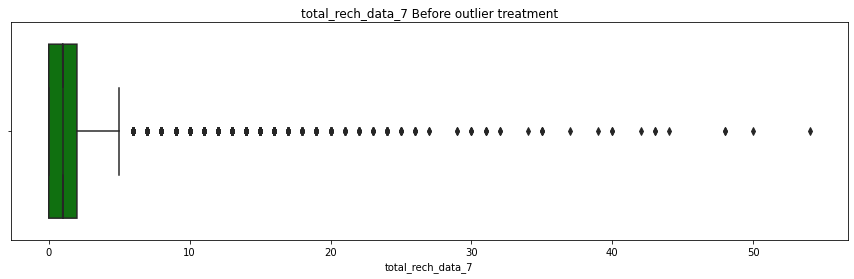

480  count of extreme outliers present in Column  total_rech_data_8
1.6  percentage of extreme outliers present in Column  total_rech_data_8


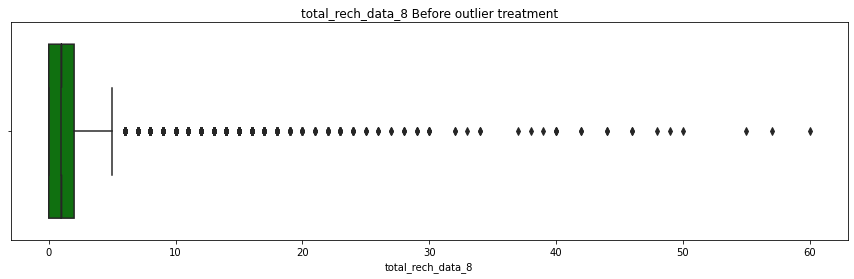

53  count of extreme outliers present in Column  max_rech_data_6
0.18  percentage of extreme outliers present in Column  max_rech_data_6


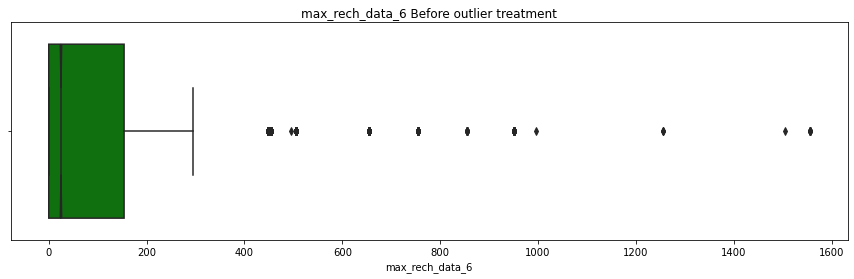

62  count of extreme outliers present in Column  max_rech_data_7
0.21  percentage of extreme outliers present in Column  max_rech_data_7


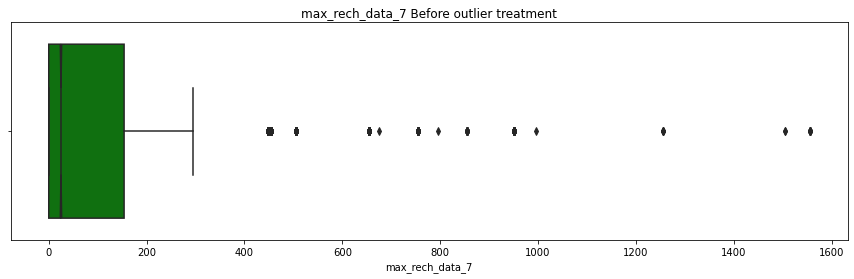

47  count of extreme outliers present in Column  max_rech_data_8
0.16  percentage of extreme outliers present in Column  max_rech_data_8


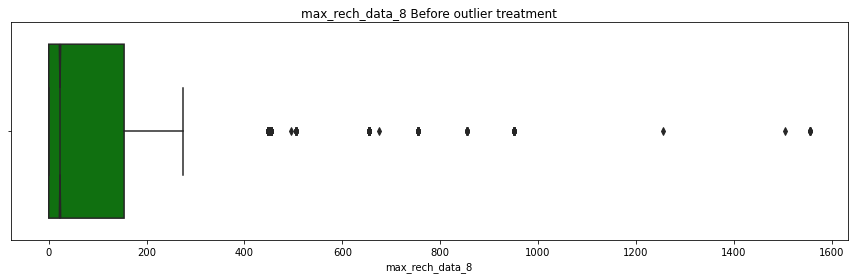

1985  count of extreme outliers present in Column  count_rech_2g_6
6.62  percentage of extreme outliers present in Column  count_rech_2g_6


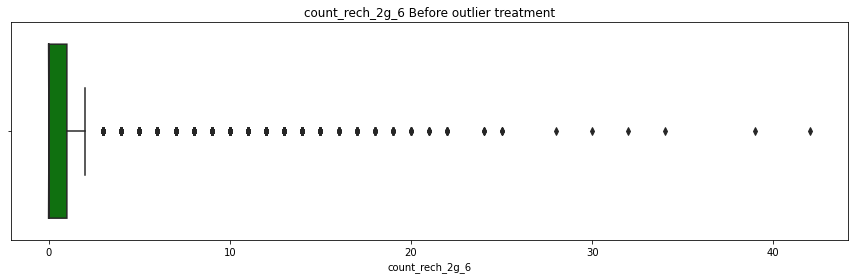

2416  count of extreme outliers present in Column  count_rech_2g_7
8.05  percentage of extreme outliers present in Column  count_rech_2g_7


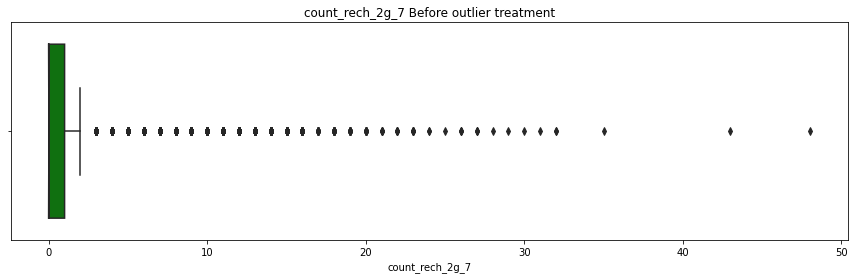

1953  count of extreme outliers present in Column  count_rech_2g_8
6.51  percentage of extreme outliers present in Column  count_rech_2g_8


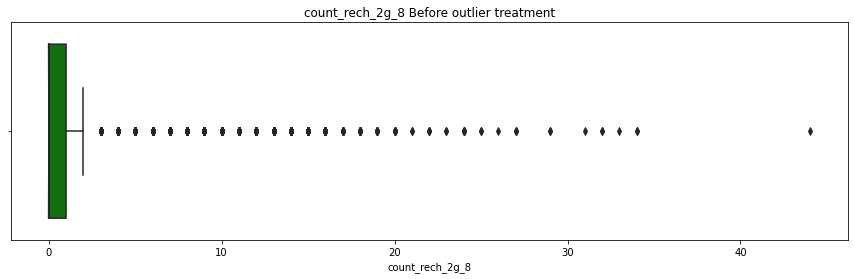

7375  count of extreme outliers present in Column  count_rech_3g_6
24.58  percentage of extreme outliers present in Column  count_rech_3g_6


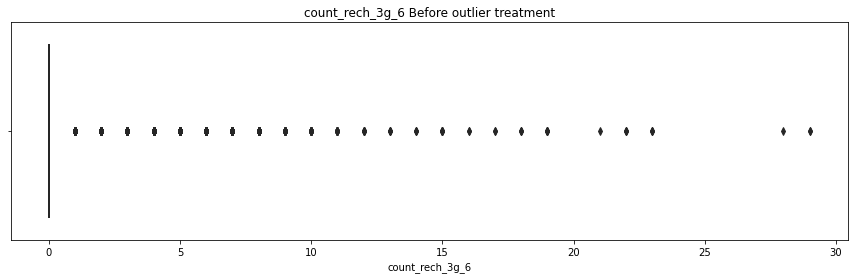

7379  count of extreme outliers present in Column  count_rech_3g_7
24.6  percentage of extreme outliers present in Column  count_rech_3g_7


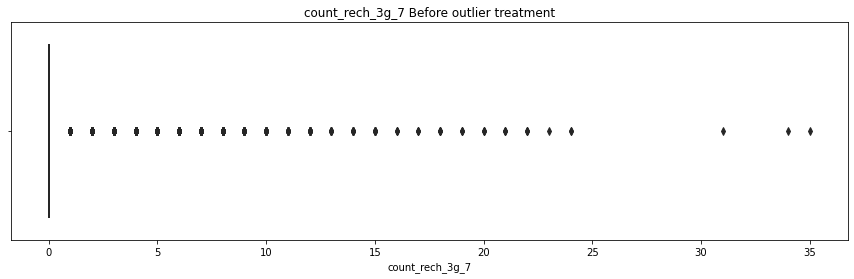

6649  count of extreme outliers present in Column  count_rech_3g_8
22.16  percentage of extreme outliers present in Column  count_rech_3g_8


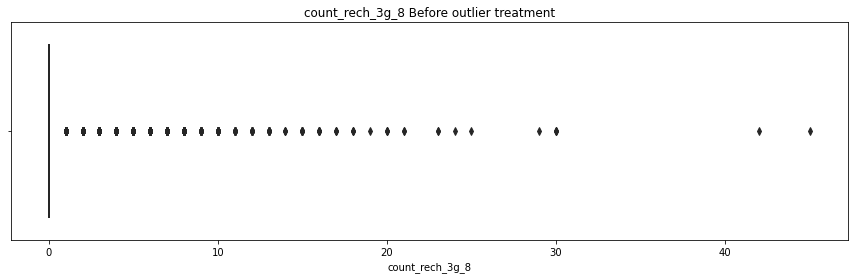

136  count of extreme outliers present in Column  av_rech_amt_data_6
0.45  percentage of extreme outliers present in Column  av_rech_amt_data_6


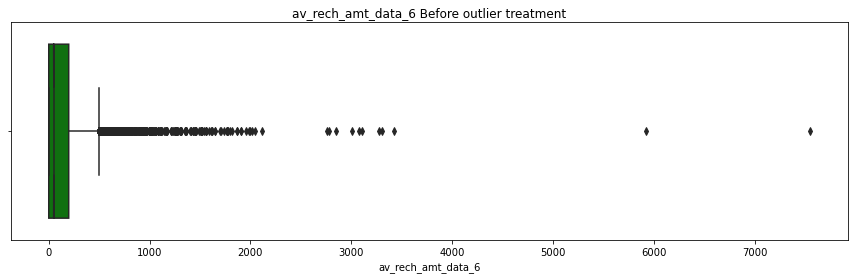

165  count of extreme outliers present in Column  av_rech_amt_data_7
0.55  percentage of extreme outliers present in Column  av_rech_amt_data_7


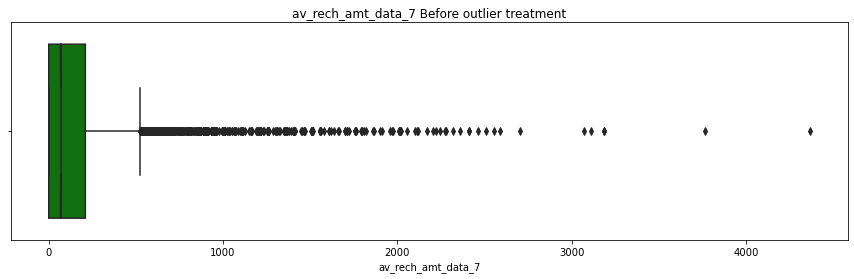

153  count of extreme outliers present in Column  av_rech_amt_data_8
0.51  percentage of extreme outliers present in Column  av_rech_amt_data_8


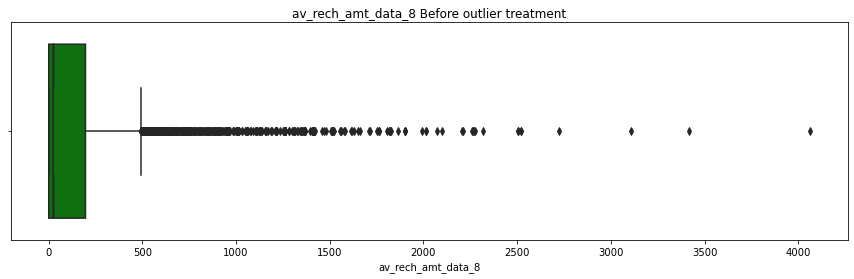

2675  count of extreme outliers present in Column  vol_2g_mb_6
8.92  percentage of extreme outliers present in Column  vol_2g_mb_6


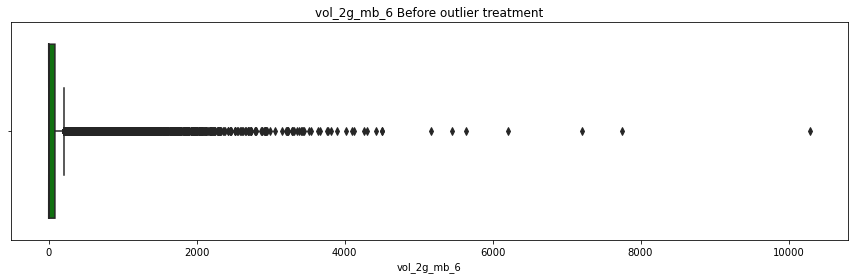

2798  count of extreme outliers present in Column  vol_2g_mb_7
9.33  percentage of extreme outliers present in Column  vol_2g_mb_7


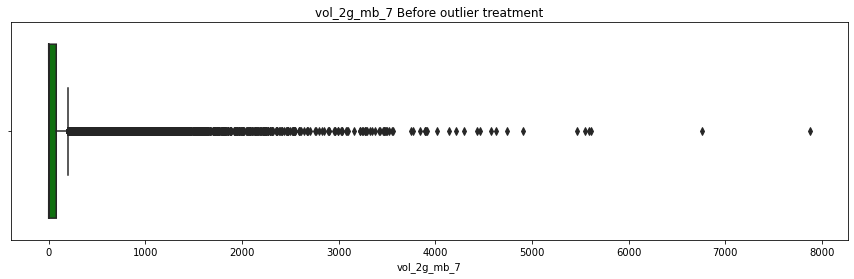

3291  count of extreme outliers present in Column  vol_2g_mb_8
10.97  percentage of extreme outliers present in Column  vol_2g_mb_8


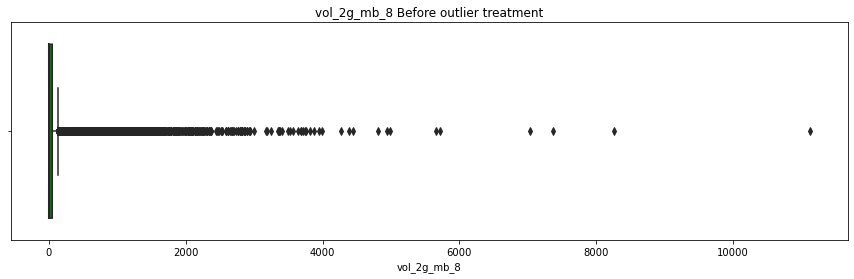

1182  count of extreme outliers present in Column  vol_3g_mb_6
3.94  percentage of extreme outliers present in Column  vol_3g_mb_6


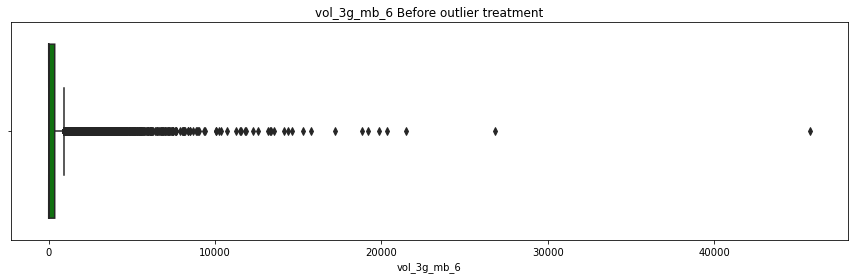

956  count of extreme outliers present in Column  vol_3g_mb_7
3.19  percentage of extreme outliers present in Column  vol_3g_mb_7


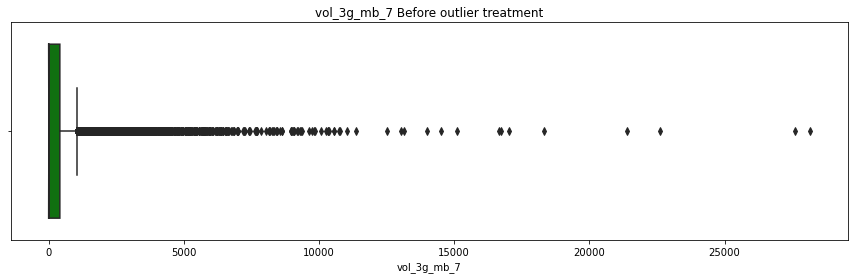

1236  count of extreme outliers present in Column  vol_3g_mb_8
4.12  percentage of extreme outliers present in Column  vol_3g_mb_8


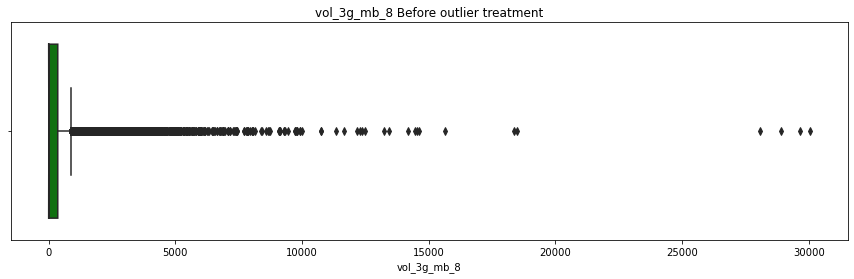

4103  count of extreme outliers present in Column  arpu_3g_6
13.68  percentage of extreme outliers present in Column  arpu_3g_6


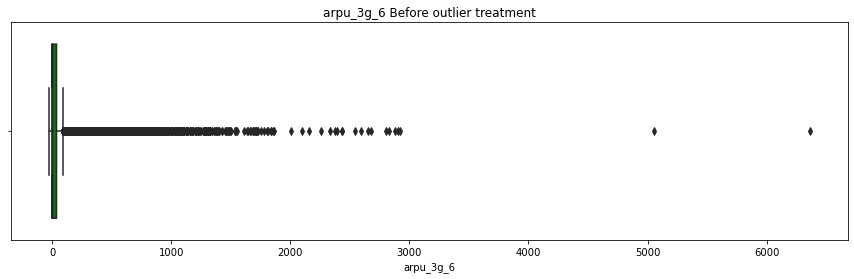

4149  count of extreme outliers present in Column  arpu_3g_7
13.83  percentage of extreme outliers present in Column  arpu_3g_7


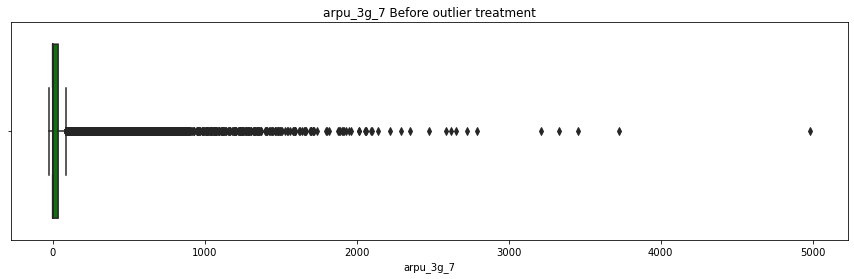

5154  count of extreme outliers present in Column  arpu_3g_8
17.18  percentage of extreme outliers present in Column  arpu_3g_8


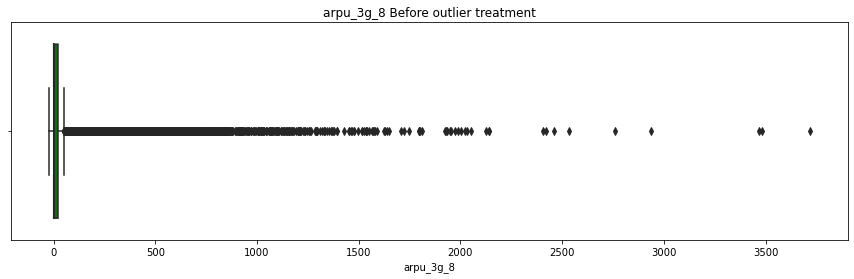

1838  count of extreme outliers present in Column  arpu_2g_6
6.13  percentage of extreme outliers present in Column  arpu_2g_6


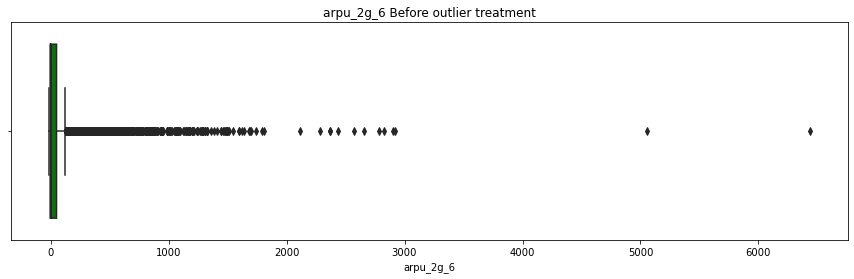

1937  count of extreme outliers present in Column  arpu_2g_7
6.46  percentage of extreme outliers present in Column  arpu_2g_7


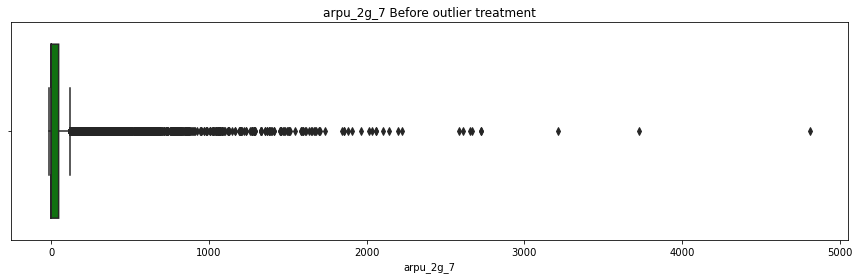

4424  count of extreme outliers present in Column  arpu_2g_8
14.75  percentage of extreme outliers present in Column  arpu_2g_8


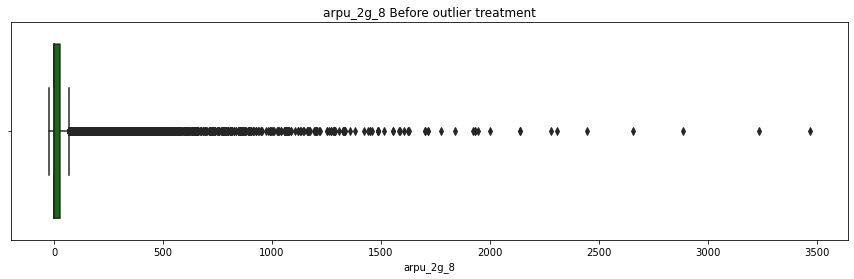

1942  count of extreme outliers present in Column  sachet_2g_6
6.47  percentage of extreme outliers present in Column  sachet_2g_6


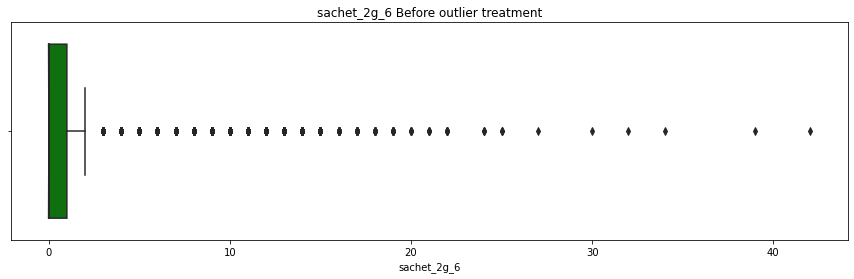

2367  count of extreme outliers present in Column  sachet_2g_7
7.89  percentage of extreme outliers present in Column  sachet_2g_7


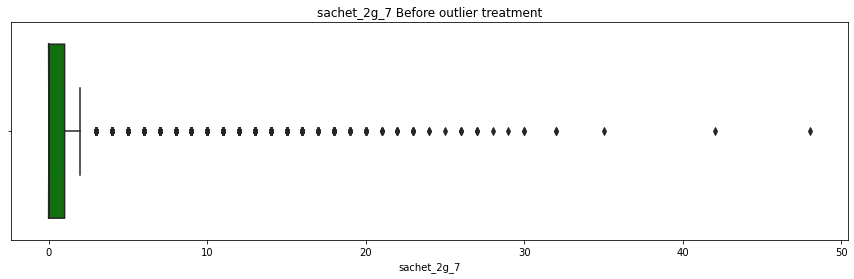

1880  count of extreme outliers present in Column  sachet_2g_8
6.27  percentage of extreme outliers present in Column  sachet_2g_8


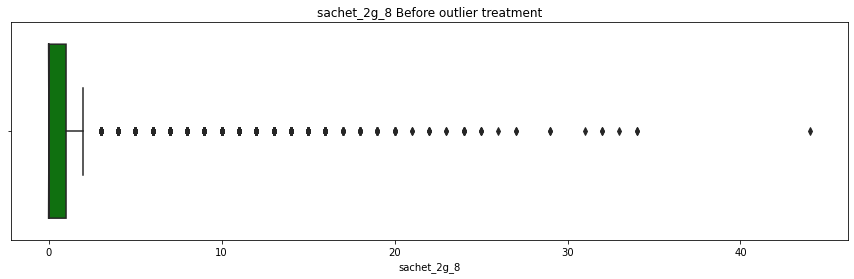

4659  count of extreme outliers present in Column  monthly_3g_6
15.53  percentage of extreme outliers present in Column  monthly_3g_6


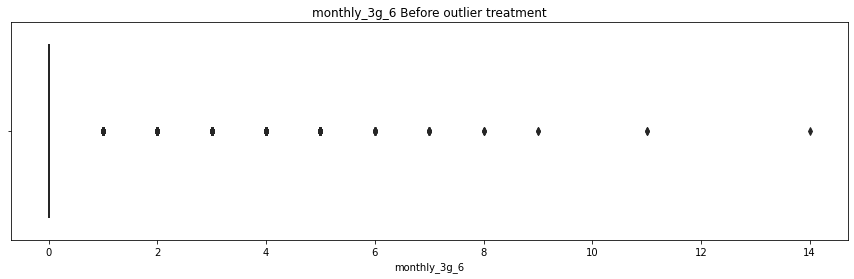

4695  count of extreme outliers present in Column  monthly_3g_7
15.65  percentage of extreme outliers present in Column  monthly_3g_7


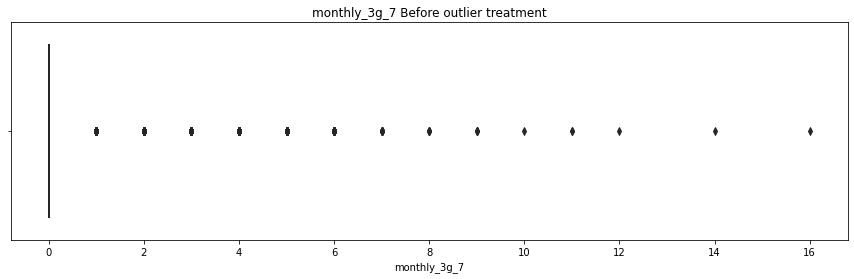

4396  count of extreme outliers present in Column  monthly_3g_8
14.65  percentage of extreme outliers present in Column  monthly_3g_8


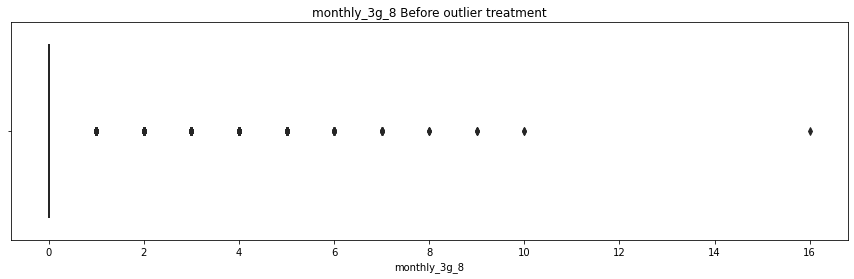

3233  count of extreme outliers present in Column  sachet_3g_6
10.78  percentage of extreme outliers present in Column  sachet_3g_6


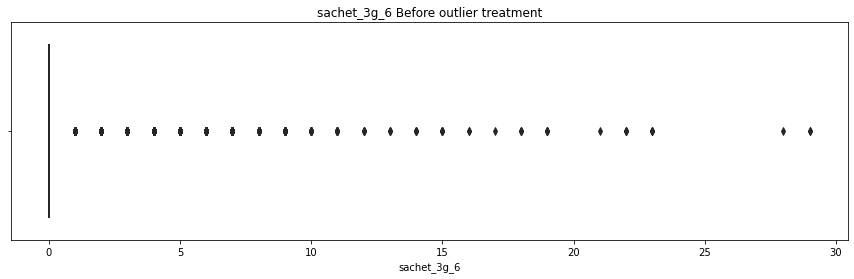

3194  count of extreme outliers present in Column  sachet_3g_7
10.65  percentage of extreme outliers present in Column  sachet_3g_7


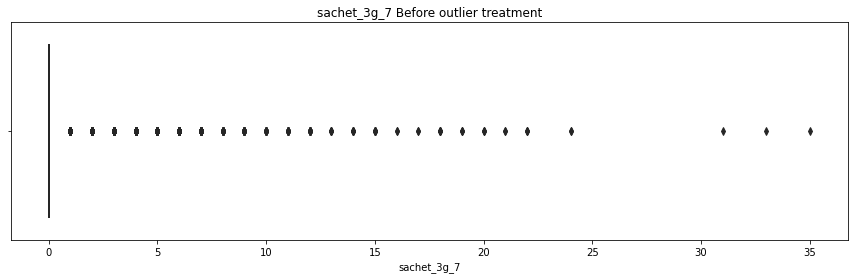

2660  count of extreme outliers present in Column  sachet_3g_8
8.87  percentage of extreme outliers present in Column  sachet_3g_8


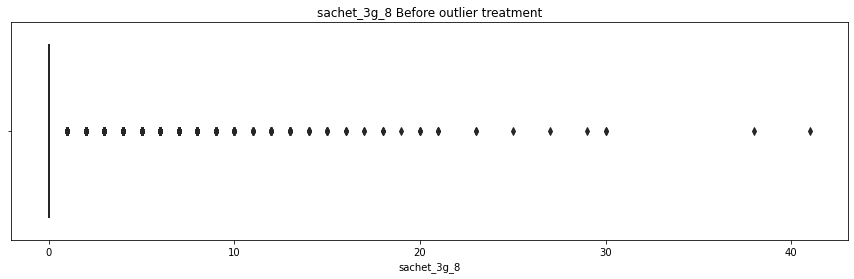

0  count of extreme outliers present in Column  aon
0.0  percentage of extreme outliers present in Column  aon


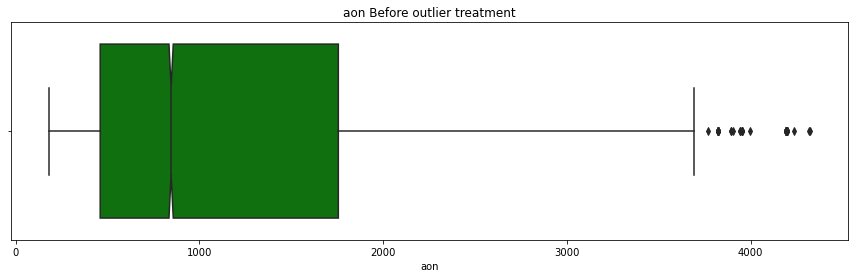

2289  count of extreme outliers present in Column  vbc_3g_8
7.63  percentage of extreme outliers present in Column  vbc_3g_8


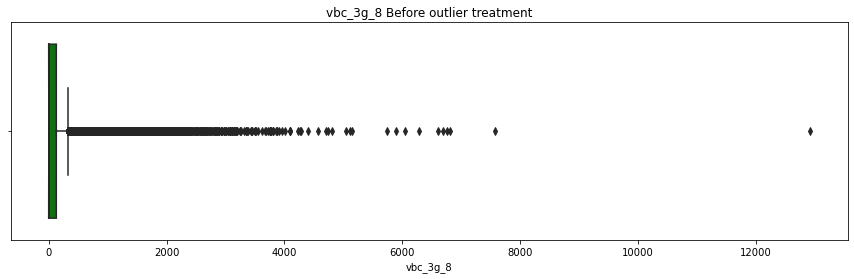

2250  count of extreme outliers present in Column  vbc_3g_7
7.5  percentage of extreme outliers present in Column  vbc_3g_7


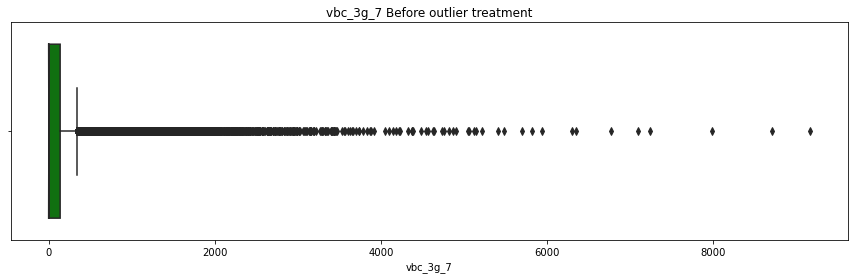

2946  count of extreme outliers present in Column  vbc_3g_6
9.82  percentage of extreme outliers present in Column  vbc_3g_6


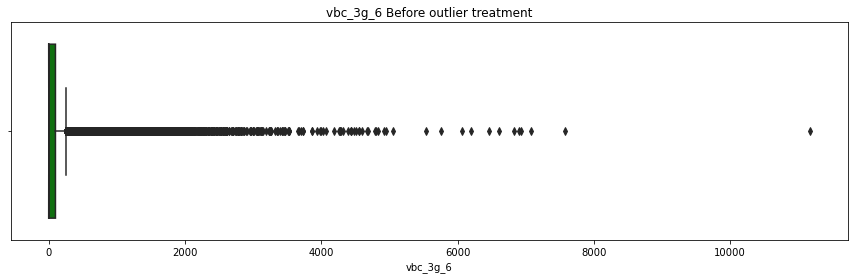

449  count of extreme outliers present in Column  total_rech_num_data_6
1.5  percentage of extreme outliers present in Column  total_rech_num_data_6


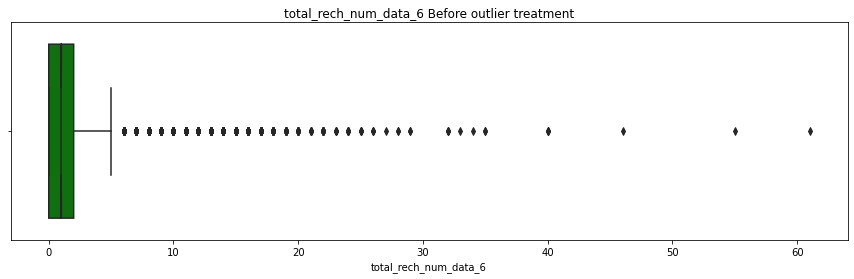

1418  count of extreme outliers present in Column  total_rech_amt_data_6
4.73  percentage of extreme outliers present in Column  total_rech_amt_data_6


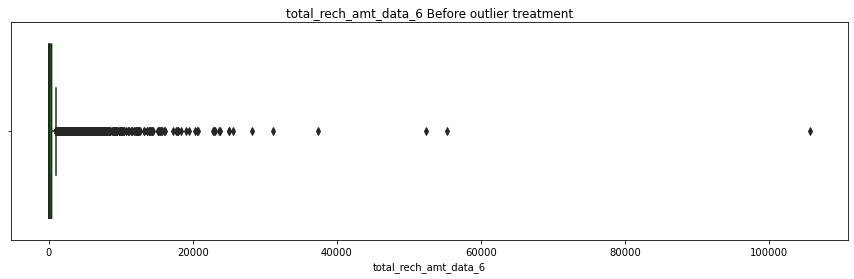

680  count of extreme outliers present in Column  total_month_rech_amt_6
2.27  percentage of extreme outliers present in Column  total_month_rech_amt_6


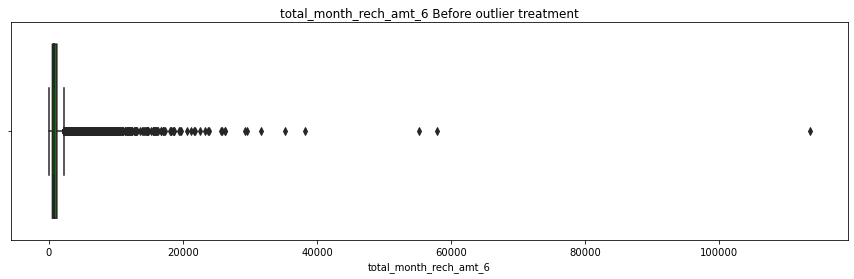

539  count of extreme outliers present in Column  total_rech_num_data_7
1.8  percentage of extreme outliers present in Column  total_rech_num_data_7


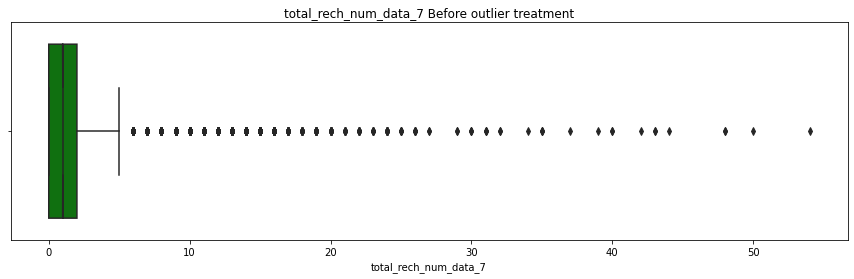

909  count of extreme outliers present in Column  total_rech_amt_data_7
3.03  percentage of extreme outliers present in Column  total_rech_amt_data_7


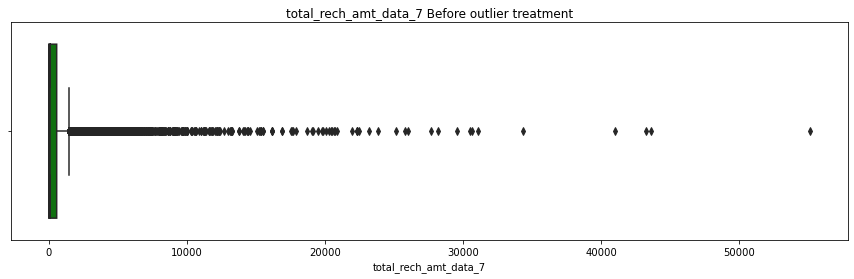

720  count of extreme outliers present in Column  total_month_rech_amt_7
2.4  percentage of extreme outliers present in Column  total_month_rech_amt_7


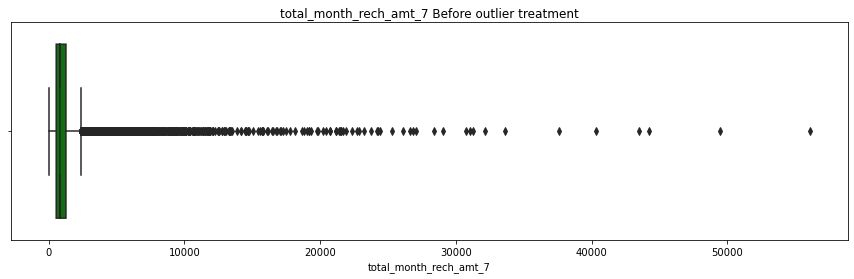

480  count of extreme outliers present in Column  total_rech_num_data_8
1.6  percentage of extreme outliers present in Column  total_rech_num_data_8


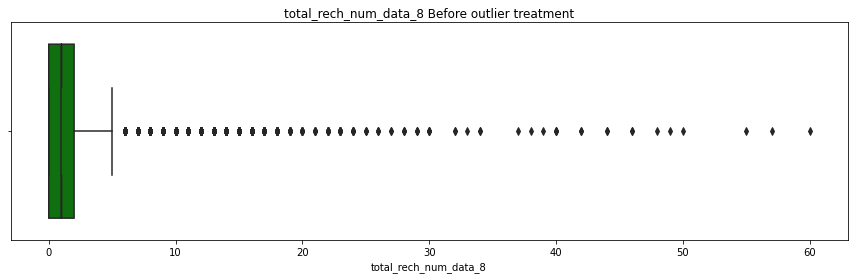

2015  count of extreme outliers present in Column  total_rech_amt_data_8
6.72  percentage of extreme outliers present in Column  total_rech_amt_data_8


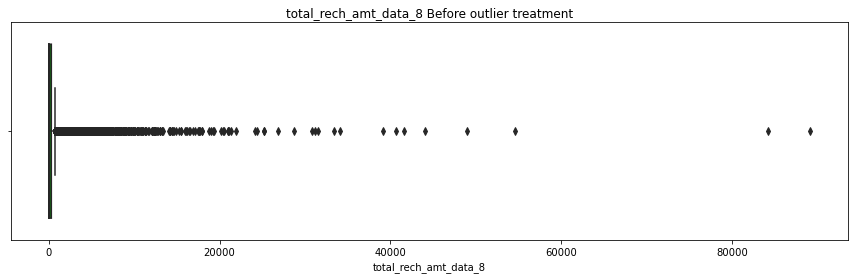

711  count of extreme outliers present in Column  total_month_rech_amt_8
2.37  percentage of extreme outliers present in Column  total_month_rech_amt_8


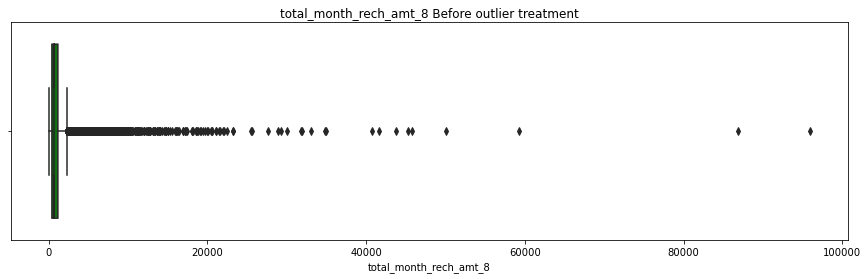

203  count of extreme outliers present in Column  arpu_diff_bw_phase
0.68  percentage of extreme outliers present in Column  arpu_diff_bw_phase


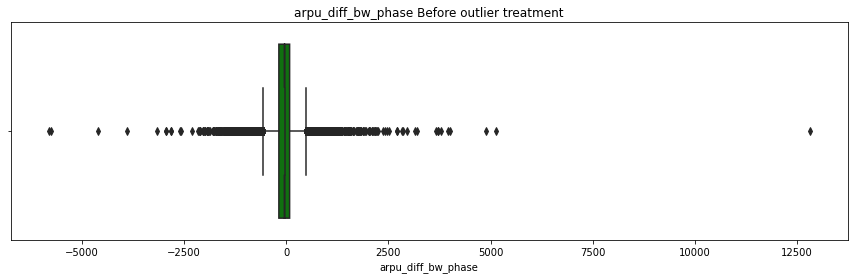

170  count of extreme outliers present in Column  arpu_good_phase
0.57  percentage of extreme outliers present in Column  arpu_good_phase


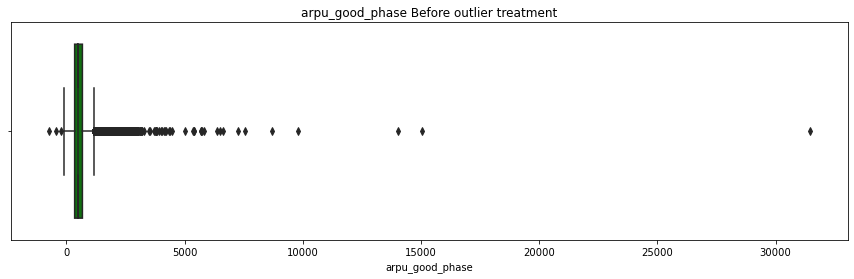

2972  count of extreme outliers present in Column  onnet_mou_diff_bw_phase
9.91  percentage of extreme outliers present in Column  onnet_mou_diff_bw_phase


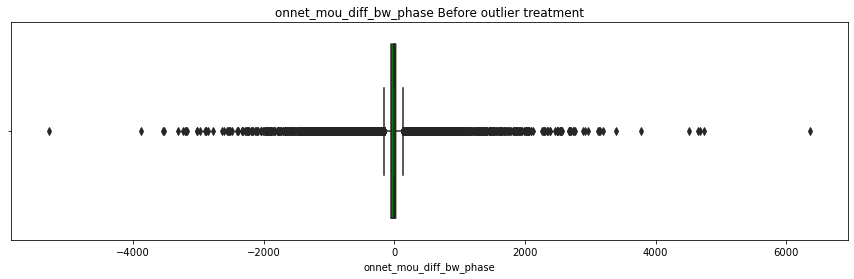

609  count of extreme outliers present in Column  onnet_mou_good_phase
2.03  percentage of extreme outliers present in Column  onnet_mou_good_phase


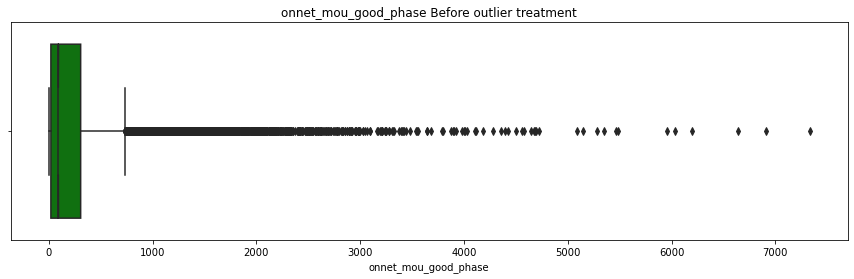

1319  count of extreme outliers present in Column  offnet_mou_diff_bw_phase
4.4  percentage of extreme outliers present in Column  offnet_mou_diff_bw_phase


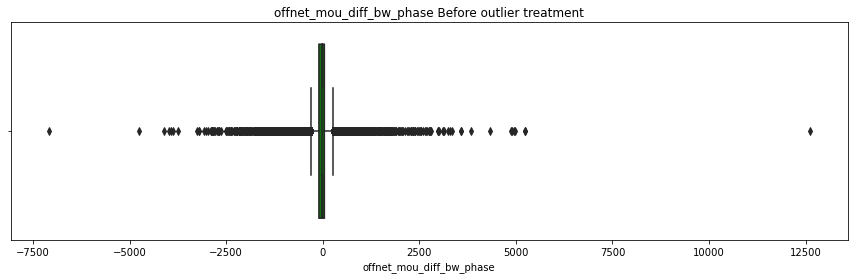

227  count of extreme outliers present in Column  offnet_mou_good_phase
0.76  percentage of extreme outliers present in Column  offnet_mou_good_phase


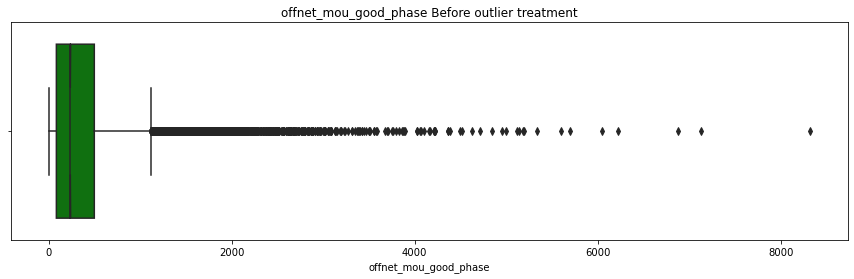

10453  count of extreme outliers present in Column  roam_ic_mou_diff_bw_phase
34.84  percentage of extreme outliers present in Column  roam_ic_mou_diff_bw_phase


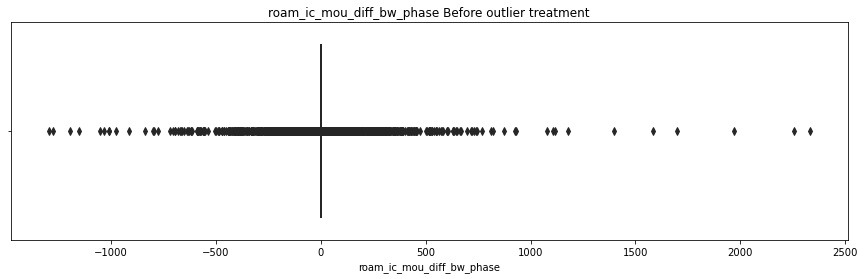

5172  count of extreme outliers present in Column  roam_ic_mou_good_phase
17.24  percentage of extreme outliers present in Column  roam_ic_mou_good_phase


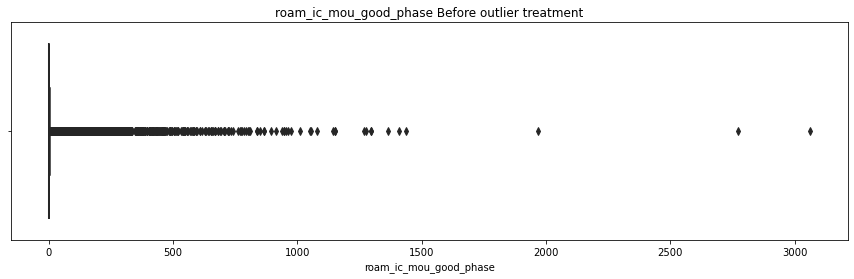

10501  count of extreme outliers present in Column  roam_og_mou_diff_bw_phase
35.0  percentage of extreme outliers present in Column  roam_og_mou_diff_bw_phase


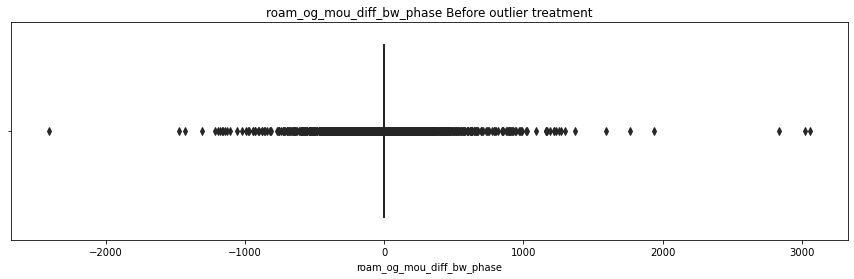

5198  count of extreme outliers present in Column  roam_og_mou_good_phase
17.33  percentage of extreme outliers present in Column  roam_og_mou_good_phase


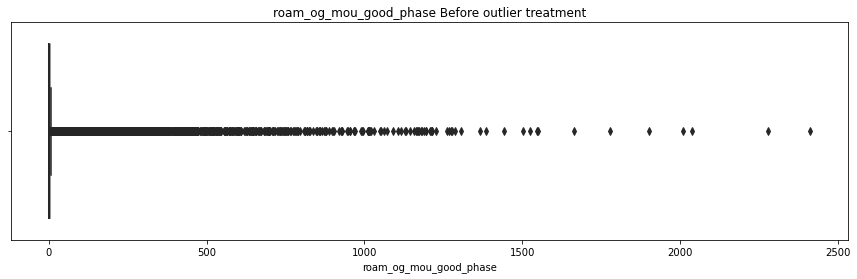

1976  count of extreme outliers present in Column  loc_og_t2t_mou_diff_bw_phase
6.59  percentage of extreme outliers present in Column  loc_og_t2t_mou_diff_bw_phase


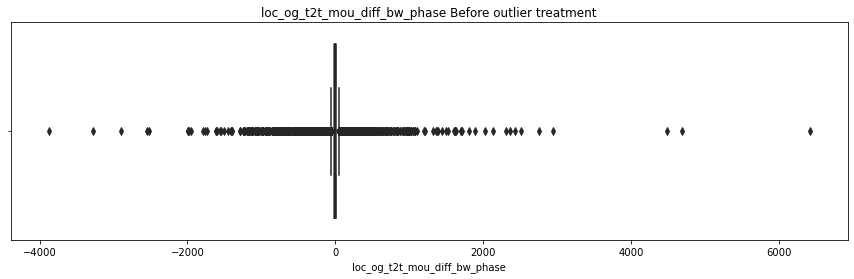

1097  count of extreme outliers present in Column  loc_og_t2t_mou_good_phase
3.66  percentage of extreme outliers present in Column  loc_og_t2t_mou_good_phase


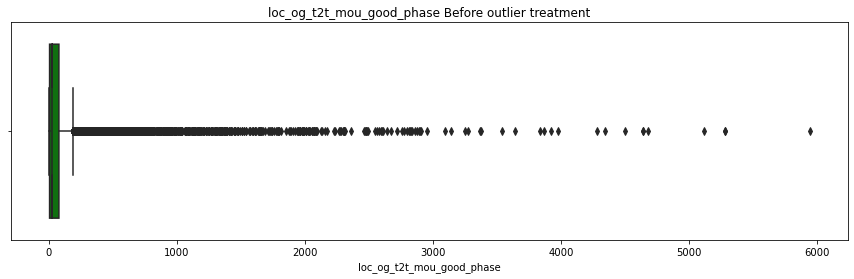

1254  count of extreme outliers present in Column  loc_og_t2m_mou_diff_bw_phase
4.18  percentage of extreme outliers present in Column  loc_og_t2m_mou_diff_bw_phase


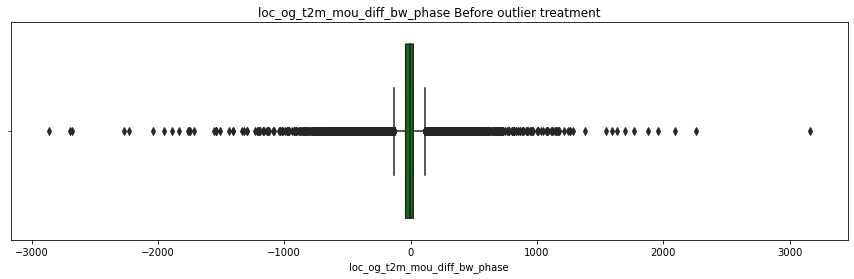

333  count of extreme outliers present in Column  loc_og_t2m_mou_good_phase
1.11  percentage of extreme outliers present in Column  loc_og_t2m_mou_good_phase


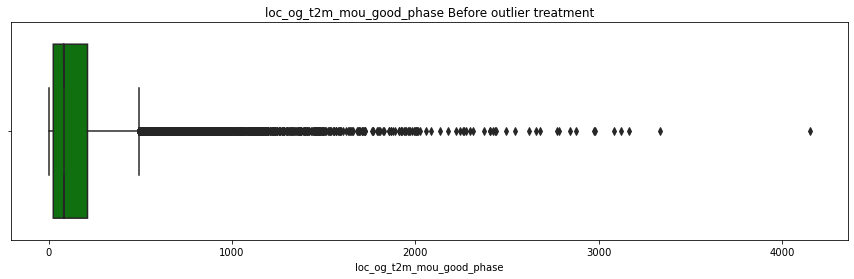

4449  count of extreme outliers present in Column  loc_og_t2f_mou_diff_bw_phase
14.83  percentage of extreme outliers present in Column  loc_og_t2f_mou_diff_bw_phase


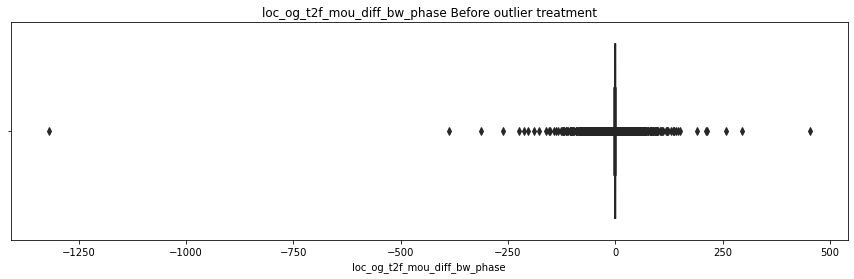

1760  count of extreme outliers present in Column  loc_og_t2f_mou_good_phase
5.87  percentage of extreme outliers present in Column  loc_og_t2f_mou_good_phase


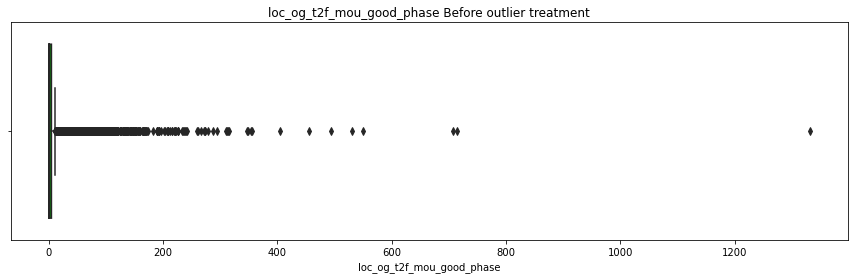

7902  count of extreme outliers present in Column  loc_og_t2c_mou_diff_bw_phase
26.34  percentage of extreme outliers present in Column  loc_og_t2c_mou_diff_bw_phase


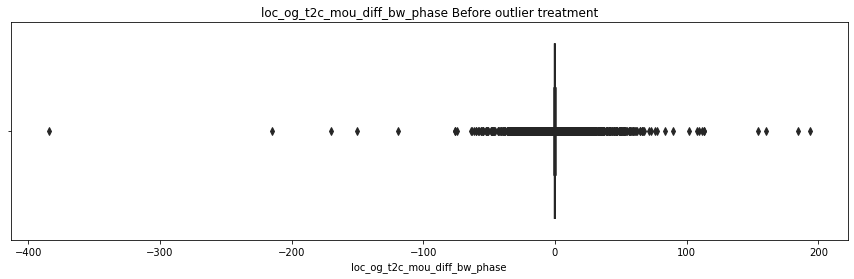

2270  count of extreme outliers present in Column  loc_og_t2c_mou_good_phase
7.57  percentage of extreme outliers present in Column  loc_og_t2c_mou_good_phase


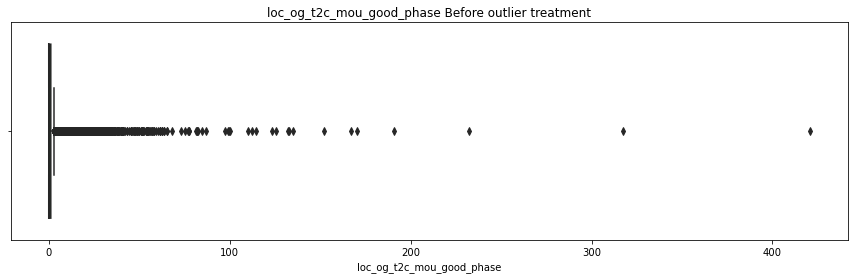

1188  count of extreme outliers present in Column  loc_og_mou_diff_bw_phase
3.96  percentage of extreme outliers present in Column  loc_og_mou_diff_bw_phase


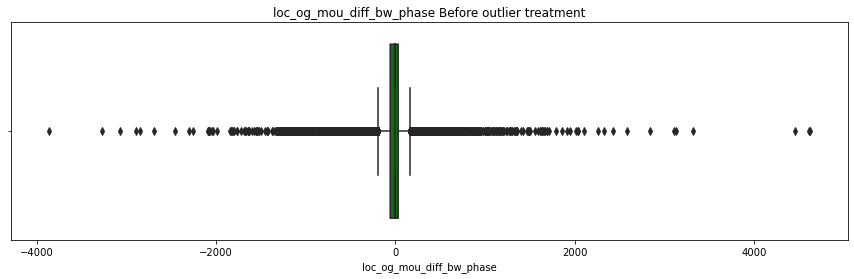

306  count of extreme outliers present in Column  loc_og_mou_good_phase
1.02  percentage of extreme outliers present in Column  loc_og_mou_good_phase


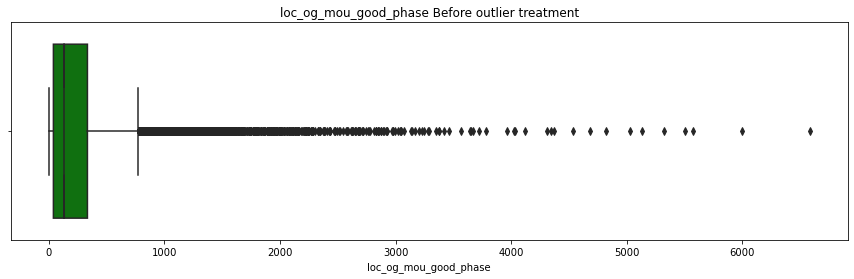

7420  count of extreme outliers present in Column  std_og_t2t_mou_diff_bw_phase
24.73  percentage of extreme outliers present in Column  std_og_t2t_mou_diff_bw_phase


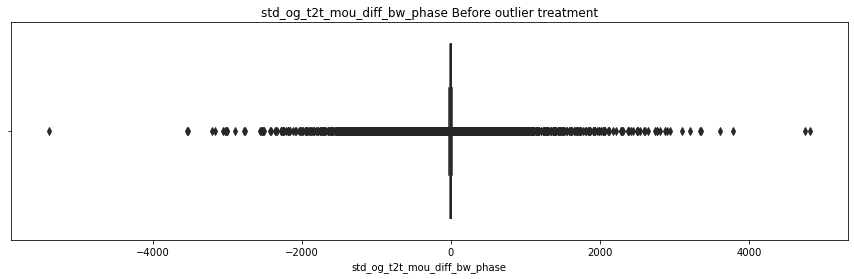

2367  count of extreme outliers present in Column  std_og_t2t_mou_good_phase
7.89  percentage of extreme outliers present in Column  std_og_t2t_mou_good_phase


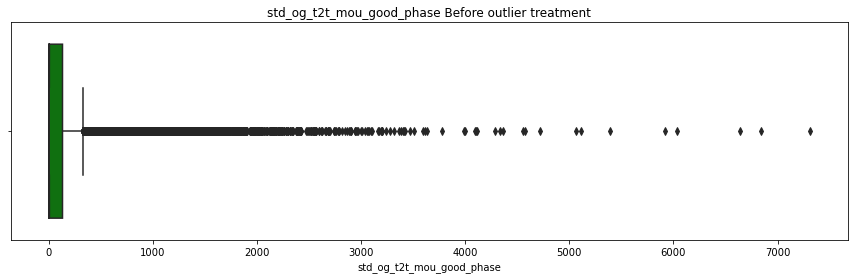

5055  count of extreme outliers present in Column  std_og_t2m_mou_diff_bw_phase
16.85  percentage of extreme outliers present in Column  std_og_t2m_mou_diff_bw_phase


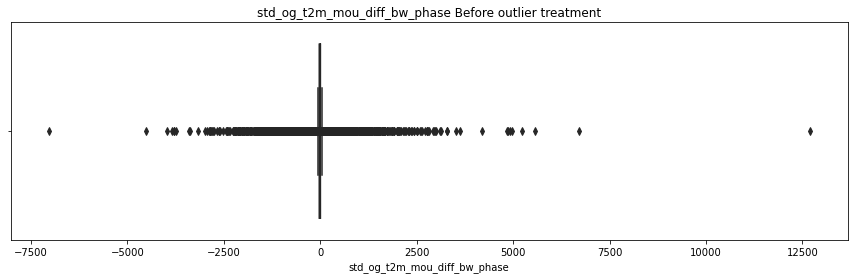

1407  count of extreme outliers present in Column  std_og_t2m_mou_good_phase
4.69  percentage of extreme outliers present in Column  std_og_t2m_mou_good_phase


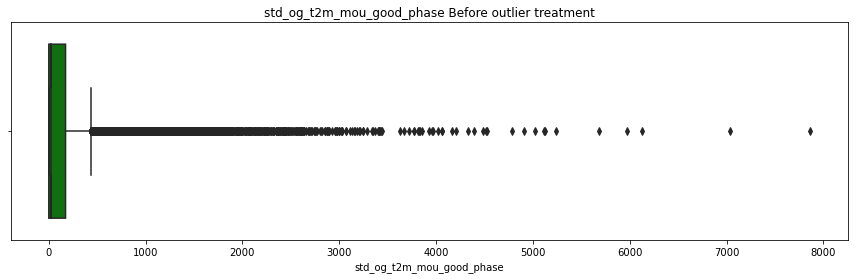

7889  count of extreme outliers present in Column  std_og_t2f_mou_diff_bw_phase
26.3  percentage of extreme outliers present in Column  std_og_t2f_mou_diff_bw_phase


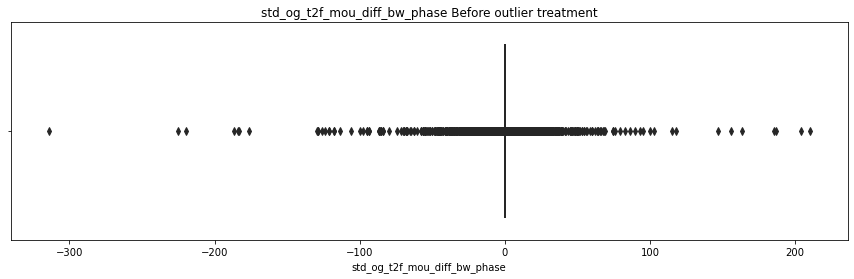

6569  count of extreme outliers present in Column  std_og_t2f_mou_good_phase
21.9  percentage of extreme outliers present in Column  std_og_t2f_mou_good_phase


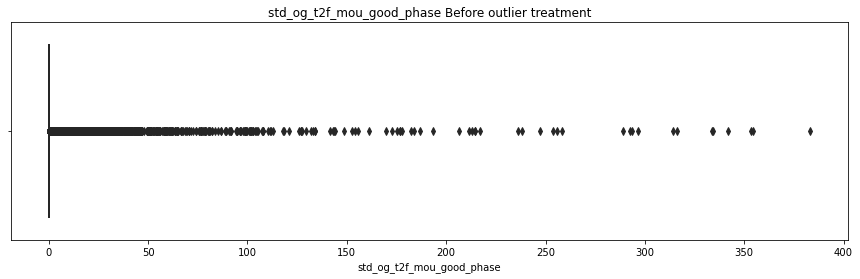

5075  count of extreme outliers present in Column  std_og_mou_diff_bw_phase
16.92  percentage of extreme outliers present in Column  std_og_mou_diff_bw_phase


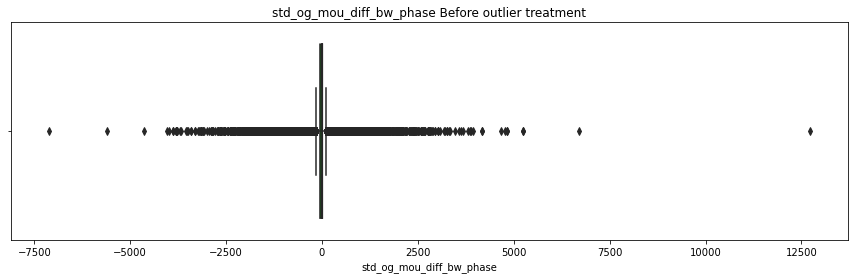

177  count of extreme outliers present in Column  std_og_mou_good_phase
0.59  percentage of extreme outliers present in Column  std_og_mou_good_phase


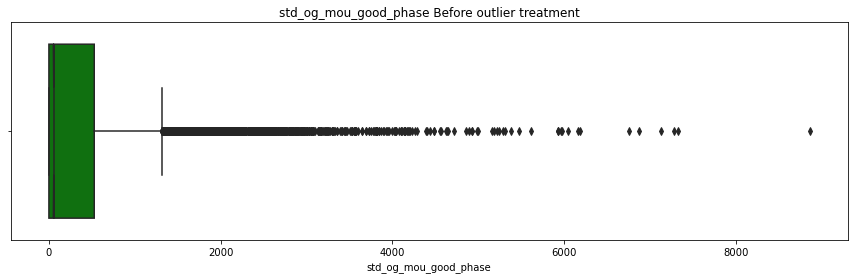

4218  count of extreme outliers present in Column  isd_og_mou_diff_bw_phase
14.06  percentage of extreme outliers present in Column  isd_og_mou_diff_bw_phase


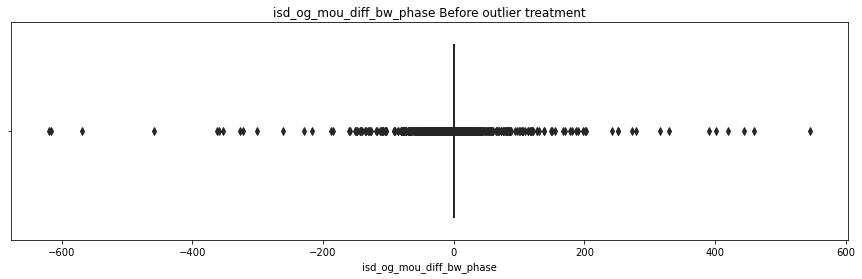

3494  count of extreme outliers present in Column  isd_og_mou_good_phase
11.65  percentage of extreme outliers present in Column  isd_og_mou_good_phase


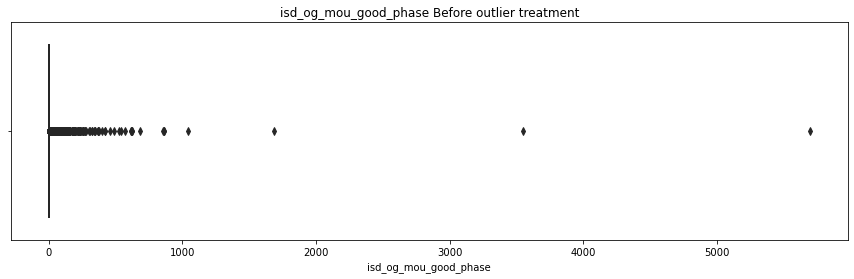

2259  count of extreme outliers present in Column  spl_og_mou_diff_bw_phase
7.53  percentage of extreme outliers present in Column  spl_og_mou_diff_bw_phase


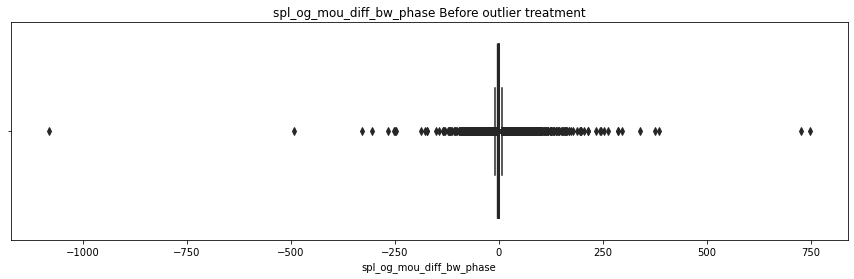

758  count of extreme outliers present in Column  spl_og_mou_good_phase
2.53  percentage of extreme outliers present in Column  spl_og_mou_good_phase


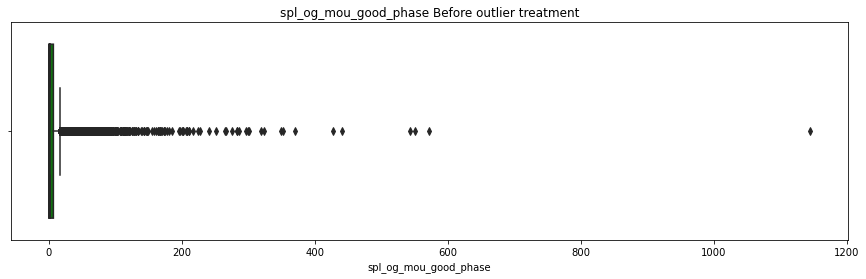

7027  count of extreme outliers present in Column  og_others_diff_bw_phase
23.42  percentage of extreme outliers present in Column  og_others_diff_bw_phase


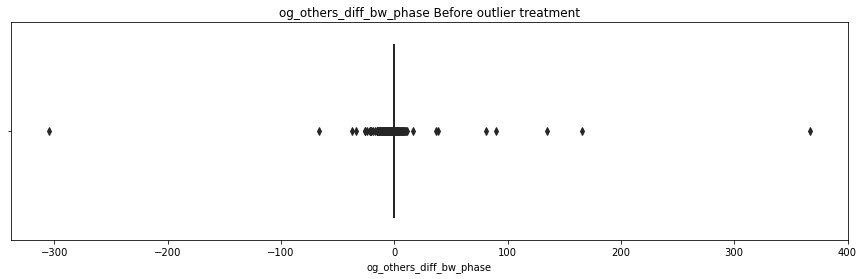

6948  count of extreme outliers present in Column  og_others_good_phase
23.16  percentage of extreme outliers present in Column  og_others_good_phase


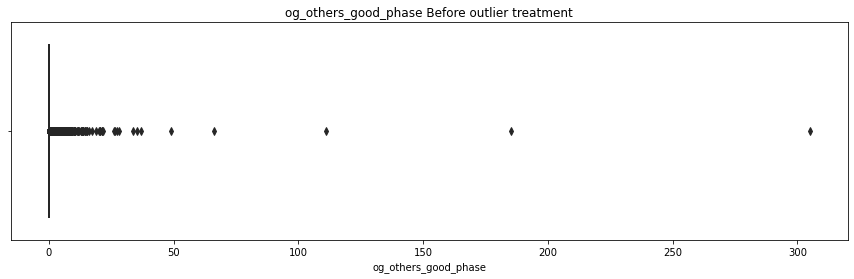

1199  count of extreme outliers present in Column  total_og_mou_diff_bw_phase
4.0  percentage of extreme outliers present in Column  total_og_mou_diff_bw_phase


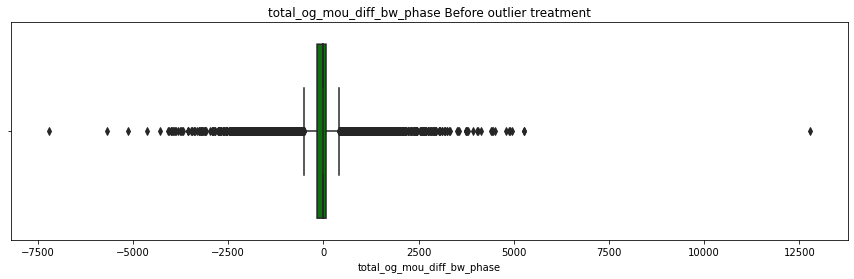

76  count of extreme outliers present in Column  total_og_mou_good_phase
0.25  percentage of extreme outliers present in Column  total_og_mou_good_phase


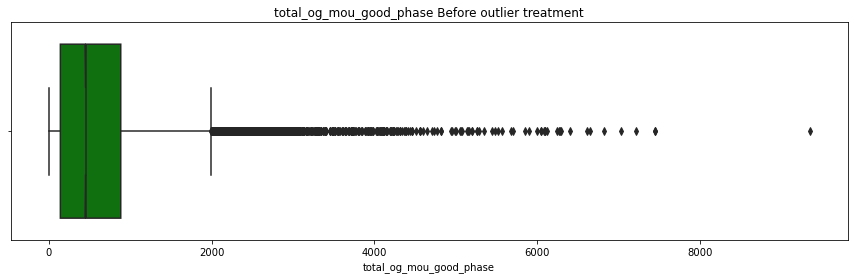

1433  count of extreme outliers present in Column  loc_ic_t2t_mou_diff_bw_phase
4.78  percentage of extreme outliers present in Column  loc_ic_t2t_mou_diff_bw_phase


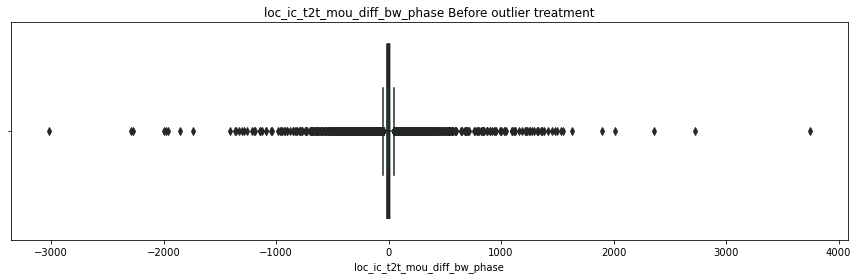

788  count of extreme outliers present in Column  loc_ic_t2t_mou_good_phase
2.63  percentage of extreme outliers present in Column  loc_ic_t2t_mou_good_phase


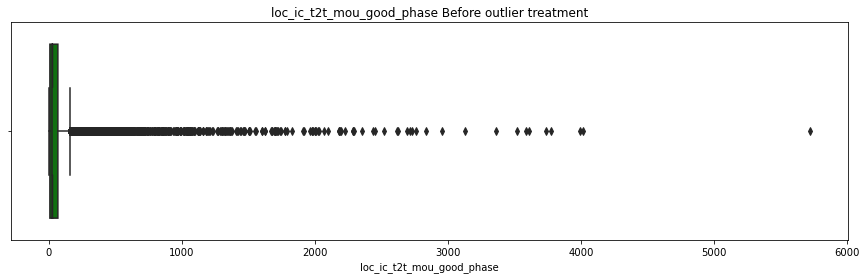

912  count of extreme outliers present in Column  loc_ic_t2m_mou_diff_bw_phase
3.04  percentage of extreme outliers present in Column  loc_ic_t2m_mou_diff_bw_phase


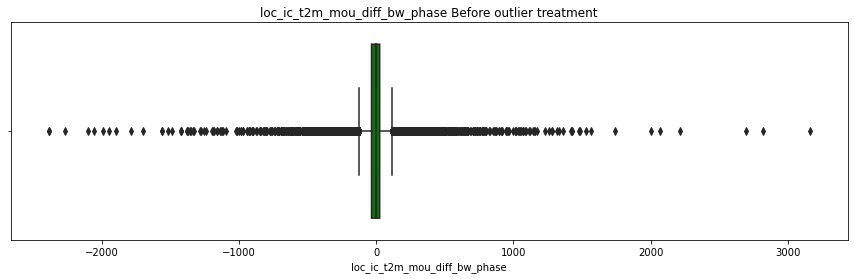

372  count of extreme outliers present in Column  loc_ic_t2m_mou_good_phase
1.24  percentage of extreme outliers present in Column  loc_ic_t2m_mou_good_phase


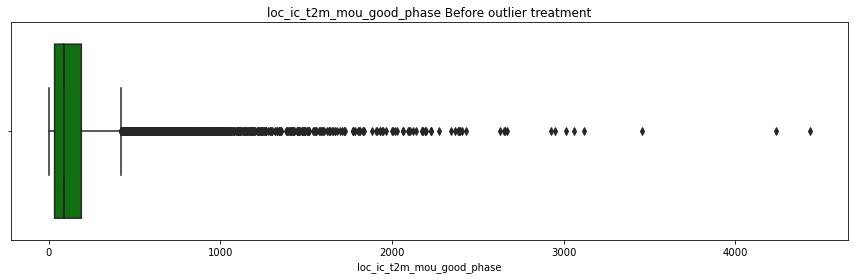

3156  count of extreme outliers present in Column  loc_ic_t2f_mou_diff_bw_phase
10.52  percentage of extreme outliers present in Column  loc_ic_t2f_mou_diff_bw_phase


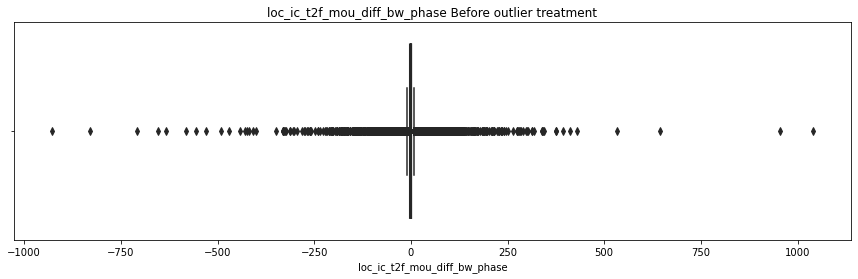

1509  count of extreme outliers present in Column  loc_ic_t2f_mou_good_phase
5.03  percentage of extreme outliers present in Column  loc_ic_t2f_mou_good_phase


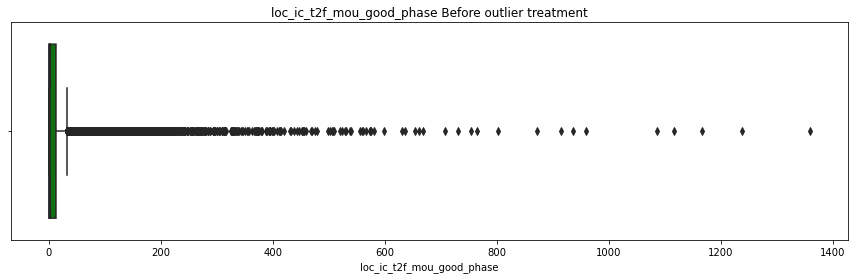

938  count of extreme outliers present in Column  loc_ic_mou_diff_bw_phase
3.13  percentage of extreme outliers present in Column  loc_ic_mou_diff_bw_phase


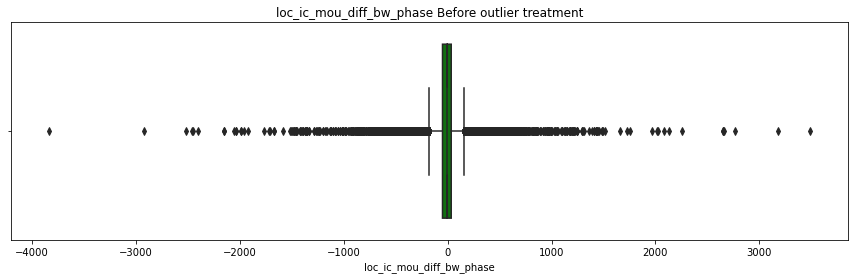

333  count of extreme outliers present in Column  loc_ic_mou_good_phase
1.11  percentage of extreme outliers present in Column  loc_ic_mou_good_phase


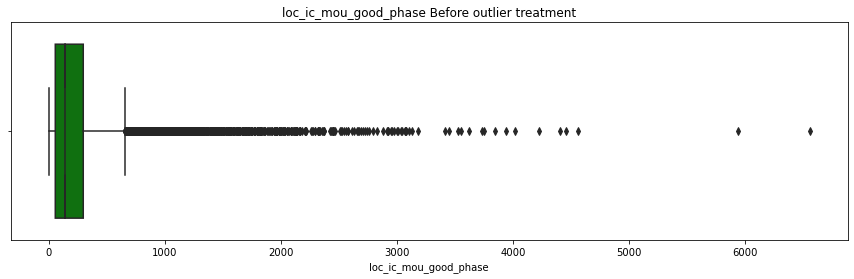

4559  count of extreme outliers present in Column  std_ic_t2t_mou_diff_bw_phase
15.2  percentage of extreme outliers present in Column  std_ic_t2t_mou_diff_bw_phase


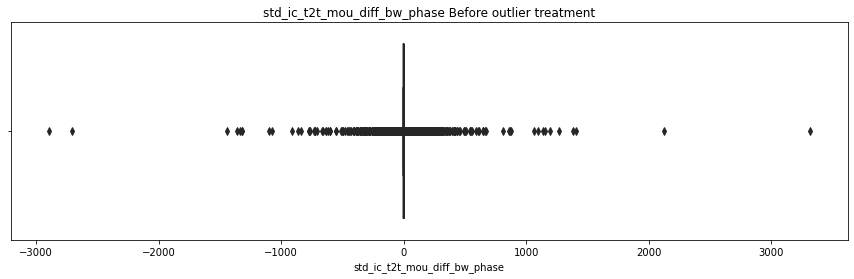

1664  count of extreme outliers present in Column  std_ic_t2t_mou_good_phase
5.55  percentage of extreme outliers present in Column  std_ic_t2t_mou_good_phase


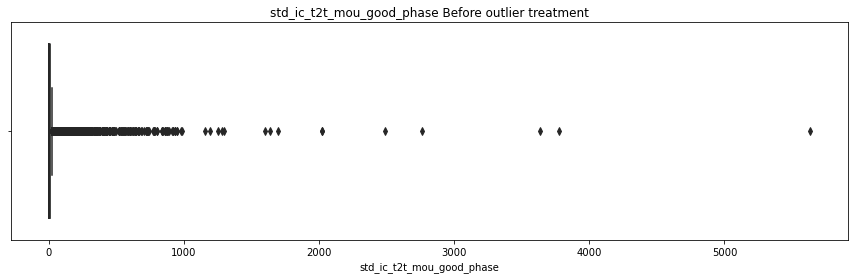

2561  count of extreme outliers present in Column  std_ic_t2m_mou_diff_bw_phase
8.54  percentage of extreme outliers present in Column  std_ic_t2m_mou_diff_bw_phase


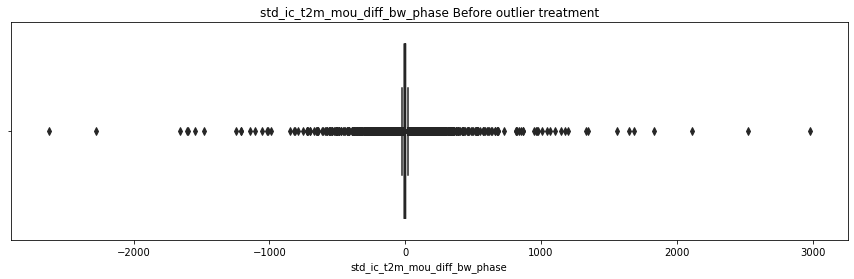

1210  count of extreme outliers present in Column  std_ic_t2m_mou_good_phase
4.03  percentage of extreme outliers present in Column  std_ic_t2m_mou_good_phase


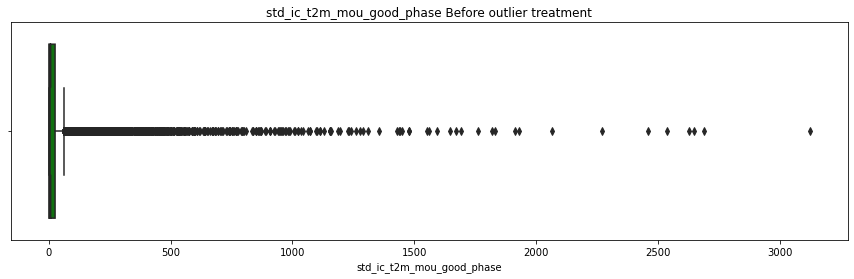

9274  count of extreme outliers present in Column  std_ic_t2f_mou_diff_bw_phase
30.91  percentage of extreme outliers present in Column  std_ic_t2f_mou_diff_bw_phase


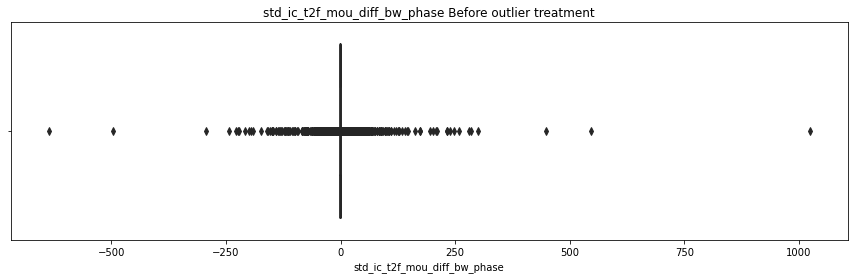

3504  count of extreme outliers present in Column  std_ic_t2f_mou_good_phase
11.68  percentage of extreme outliers present in Column  std_ic_t2f_mou_good_phase


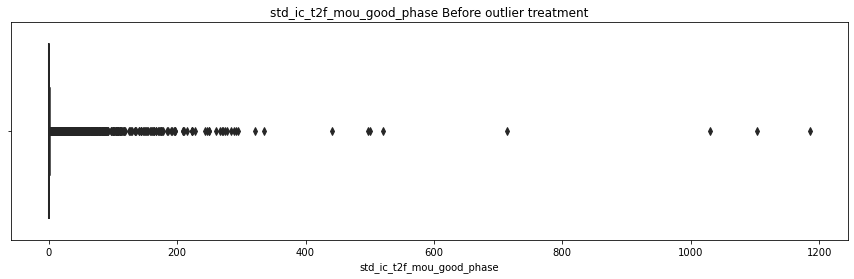

2184  count of extreme outliers present in Column  std_ic_mou_diff_bw_phase
7.28  percentage of extreme outliers present in Column  std_ic_mou_diff_bw_phase


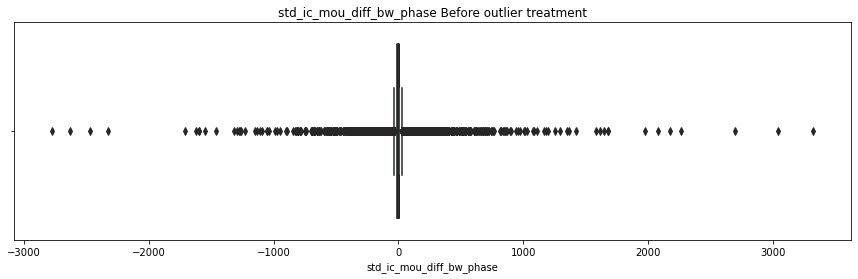

1124  count of extreme outliers present in Column  std_ic_mou_good_phase
3.75  percentage of extreme outliers present in Column  std_ic_mou_good_phase


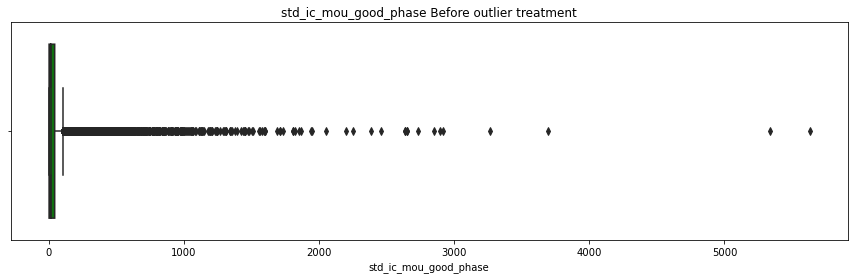

868  count of extreme outliers present in Column  total_ic_mou_diff_bw_phase
2.89  percentage of extreme outliers present in Column  total_ic_mou_diff_bw_phase


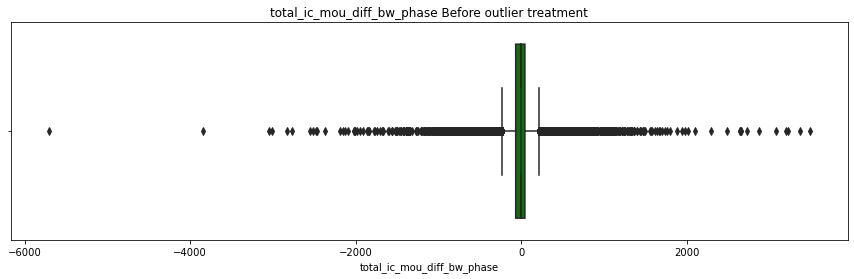

302  count of extreme outliers present in Column  total_ic_mou_good_phase
1.01  percentage of extreme outliers present in Column  total_ic_mou_good_phase


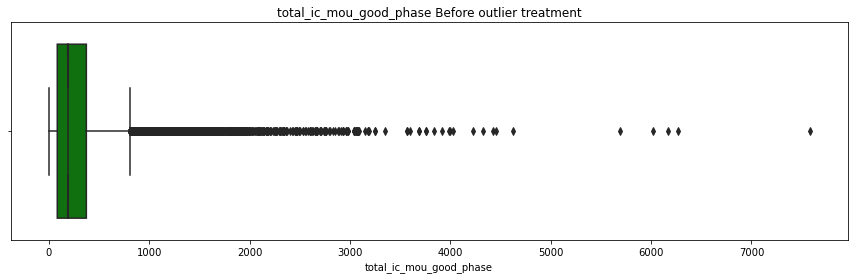

8629  count of extreme outliers present in Column  spl_ic_mou_diff_bw_phase
28.76  percentage of extreme outliers present in Column  spl_ic_mou_diff_bw_phase


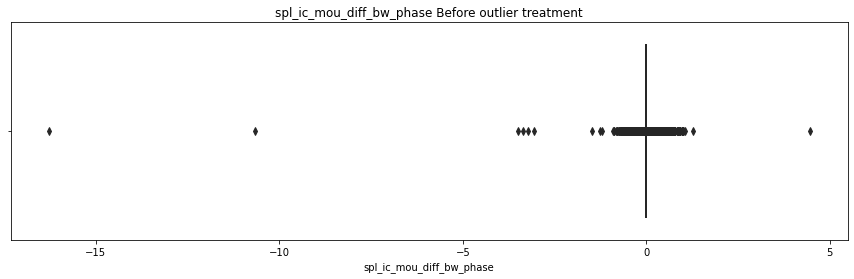

7364  count of extreme outliers present in Column  spl_ic_mou_good_phase
24.55  percentage of extreme outliers present in Column  spl_ic_mou_good_phase


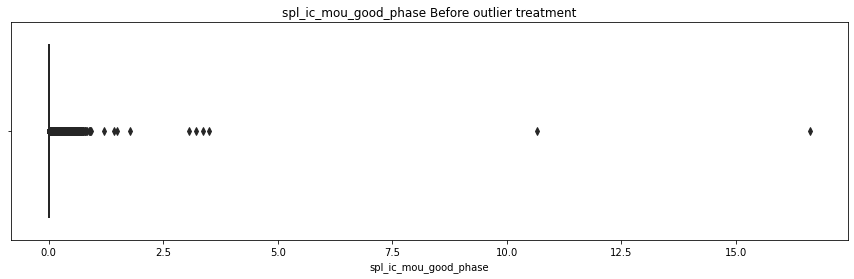

10968  count of extreme outliers present in Column  isd_ic_mou_diff_bw_phase
36.56  percentage of extreme outliers present in Column  isd_ic_mou_diff_bw_phase


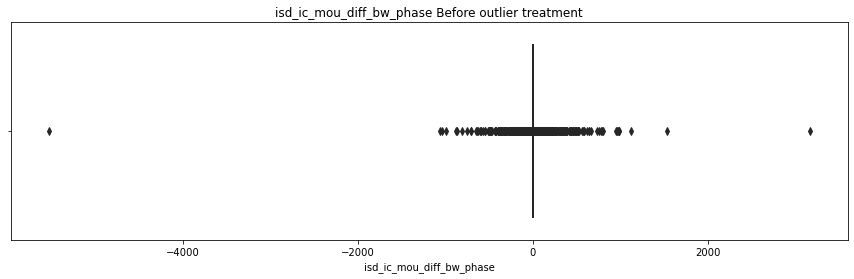

5862  count of extreme outliers present in Column  isd_ic_mou_good_phase
19.54  percentage of extreme outliers present in Column  isd_ic_mou_good_phase


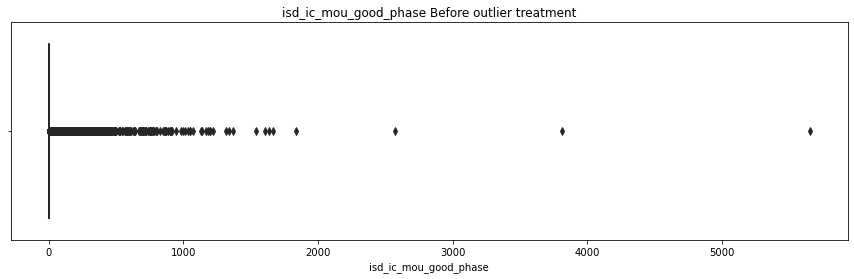

10274  count of extreme outliers present in Column  ic_others_diff_bw_phase
34.25  percentage of extreme outliers present in Column  ic_others_diff_bw_phase


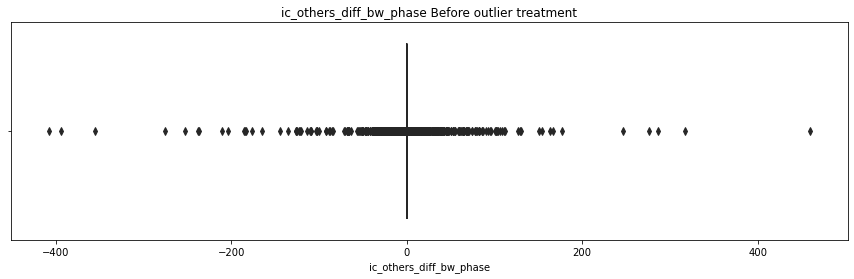

3664  count of extreme outliers present in Column  ic_others_good_phase
12.21  percentage of extreme outliers present in Column  ic_others_good_phase


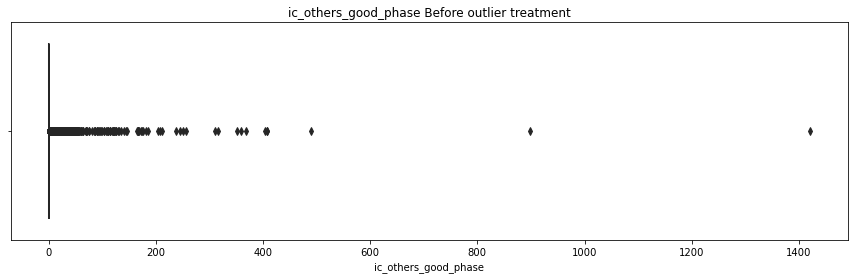

307  count of extreme outliers present in Column  total_rech_num_diff_bw_phase
1.02  percentage of extreme outliers present in Column  total_rech_num_diff_bw_phase


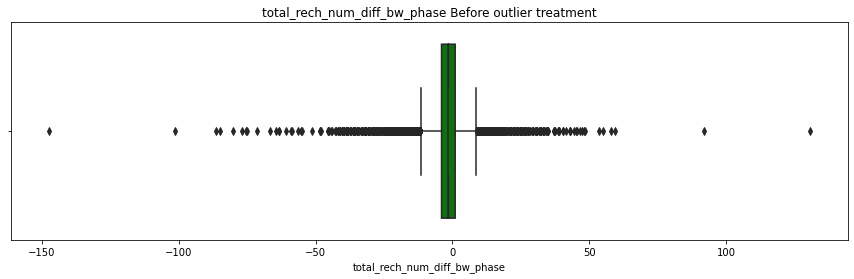

173  count of extreme outliers present in Column  total_rech_num_good_phase
0.58  percentage of extreme outliers present in Column  total_rech_num_good_phase


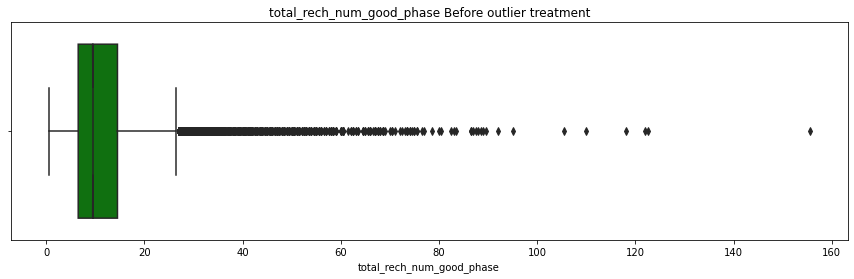

163  count of extreme outliers present in Column  total_rech_amt_diff_bw_phase
0.54  percentage of extreme outliers present in Column  total_rech_amt_diff_bw_phase


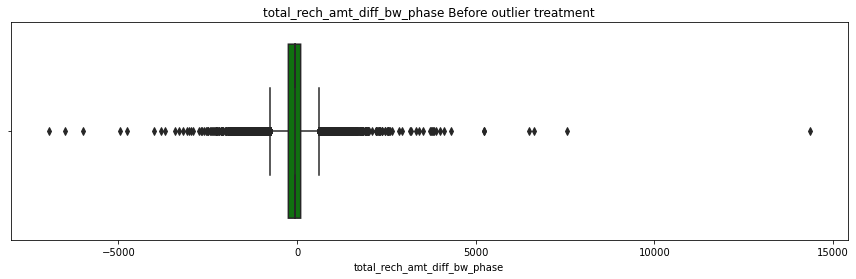

174  count of extreme outliers present in Column  total_rech_amt_good_phase
0.58  percentage of extreme outliers present in Column  total_rech_amt_good_phase


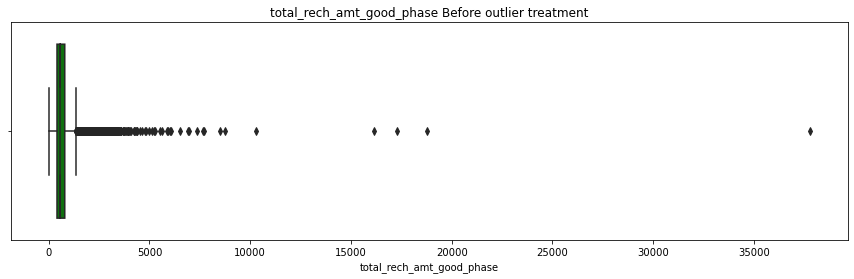

1079  count of extreme outliers present in Column  max_rech_amt_diff_bw_phase
3.6  percentage of extreme outliers present in Column  max_rech_amt_diff_bw_phase


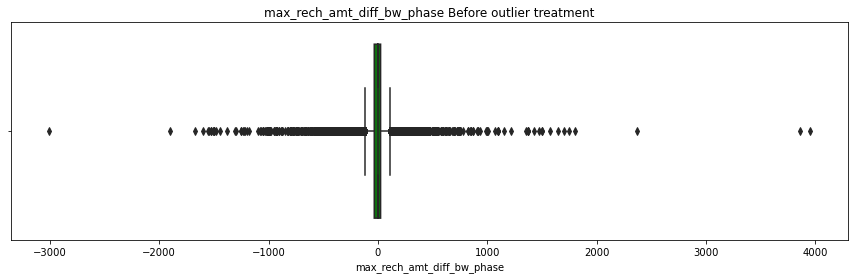

515  count of extreme outliers present in Column  max_rech_amt_good_phase
1.72  percentage of extreme outliers present in Column  max_rech_amt_good_phase


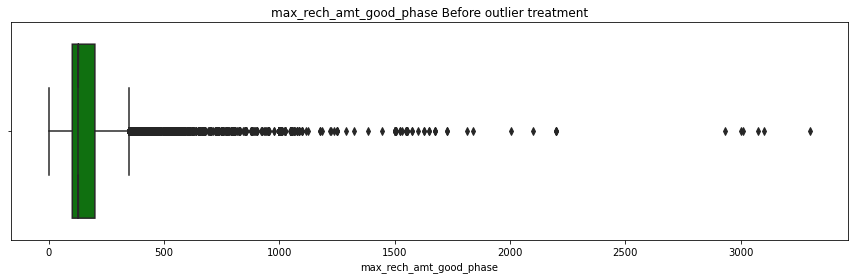

709  count of extreme outliers present in Column  last_day_rch_amt_diff_bw_phase
2.36  percentage of extreme outliers present in Column  last_day_rch_amt_diff_bw_phase


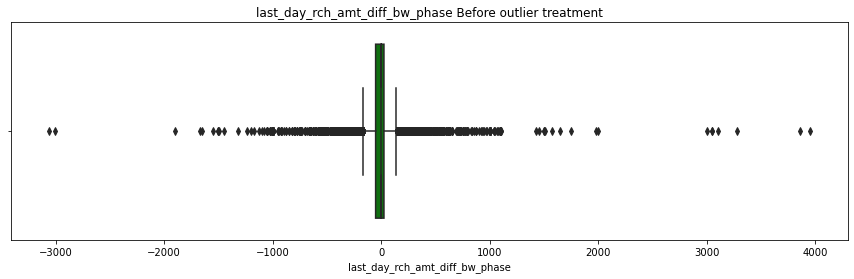

318  count of extreme outliers present in Column  last_day_rch_amt_good_phase
1.06  percentage of extreme outliers present in Column  last_day_rch_amt_good_phase


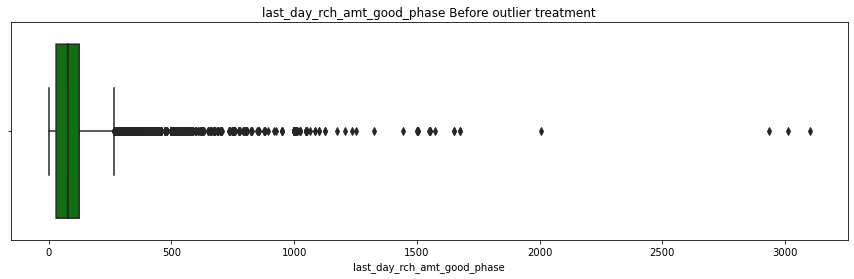

3875  count of extreme outliers present in Column  total_rech_data_diff_bw_phase
12.92  percentage of extreme outliers present in Column  total_rech_data_diff_bw_phase


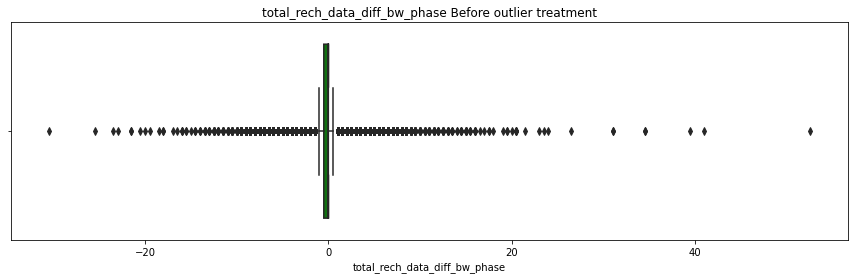

398  count of extreme outliers present in Column  total_rech_data_good_phase
1.33  percentage of extreme outliers present in Column  total_rech_data_good_phase


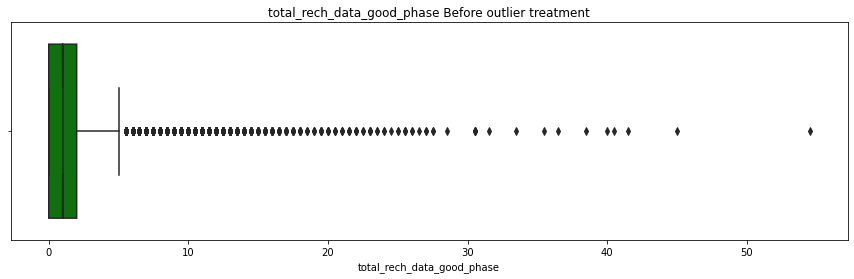

8602  count of extreme outliers present in Column  max_rech_data_diff_bw_phase
28.67  percentage of extreme outliers present in Column  max_rech_data_diff_bw_phase


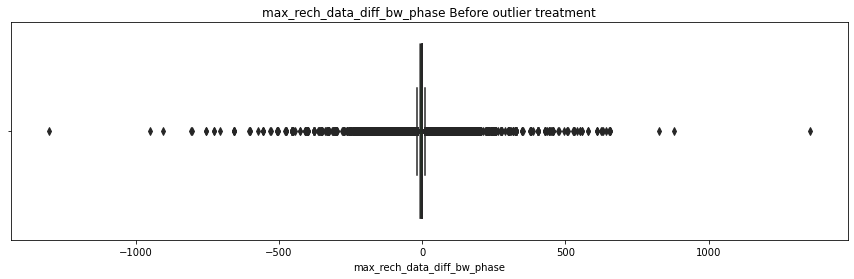

39  count of extreme outliers present in Column  max_rech_data_good_phase
0.13  percentage of extreme outliers present in Column  max_rech_data_good_phase


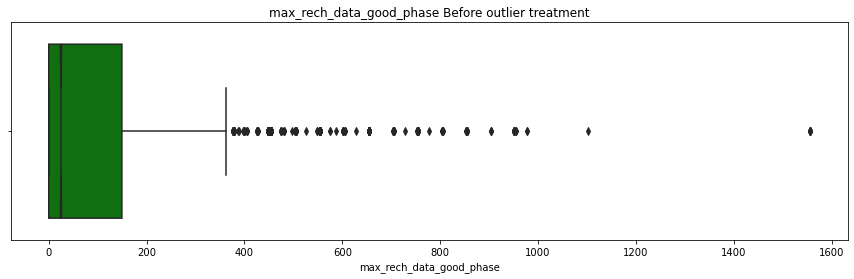

3257  count of extreme outliers present in Column  count_rech_2g_diff_bw_phase
10.86  percentage of extreme outliers present in Column  count_rech_2g_diff_bw_phase


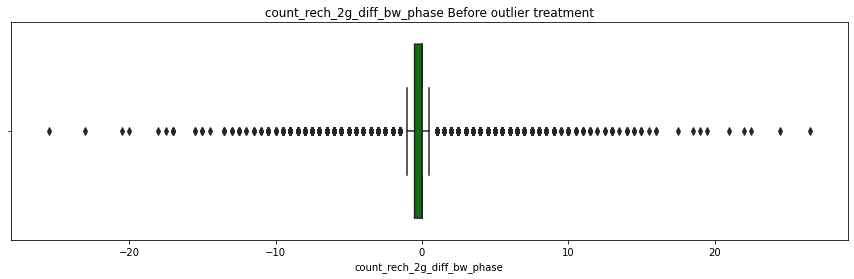

830  count of extreme outliers present in Column  count_rech_2g_good_phase
2.77  percentage of extreme outliers present in Column  count_rech_2g_good_phase


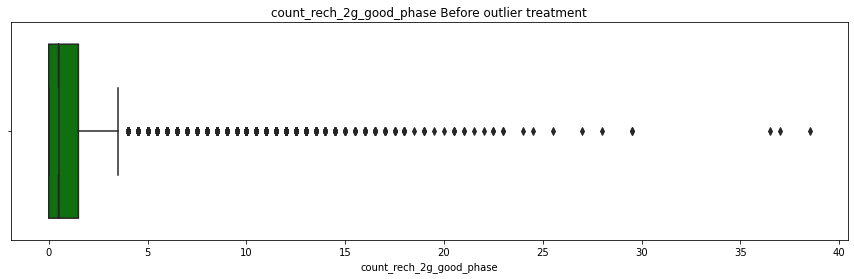

9424  count of extreme outliers present in Column  count_rech_3g_diff_bw_phase
31.41  percentage of extreme outliers present in Column  count_rech_3g_diff_bw_phase


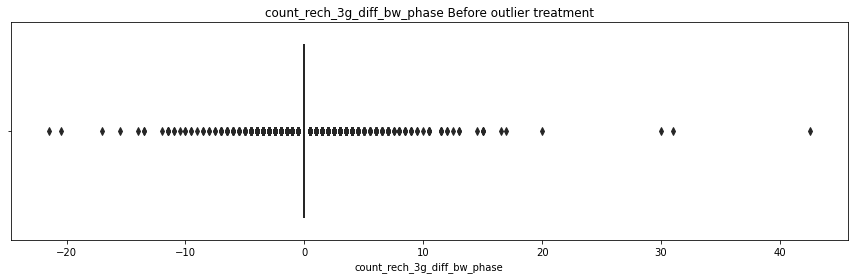

809  count of extreme outliers present in Column  count_rech_3g_good_phase
2.7  percentage of extreme outliers present in Column  count_rech_3g_good_phase


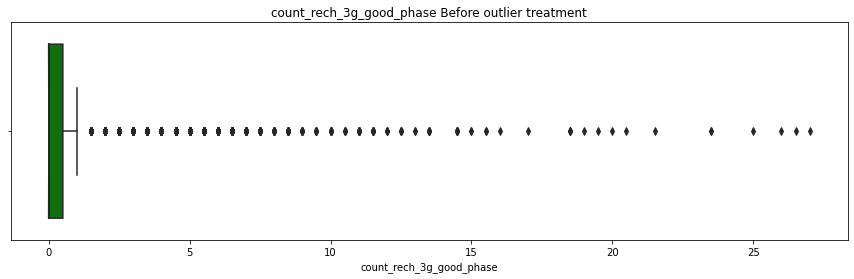

1109  count of extreme outliers present in Column  av_rech_amt_data_diff_bw_phase
3.7  percentage of extreme outliers present in Column  av_rech_amt_data_diff_bw_phase


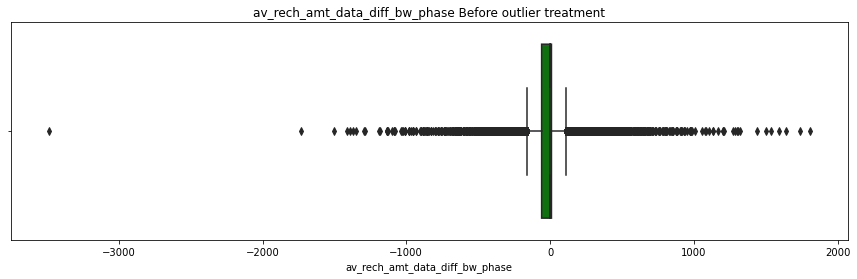

103  count of extreme outliers present in Column  av_rech_amt_data_good_phase
0.34  percentage of extreme outliers present in Column  av_rech_amt_data_good_phase


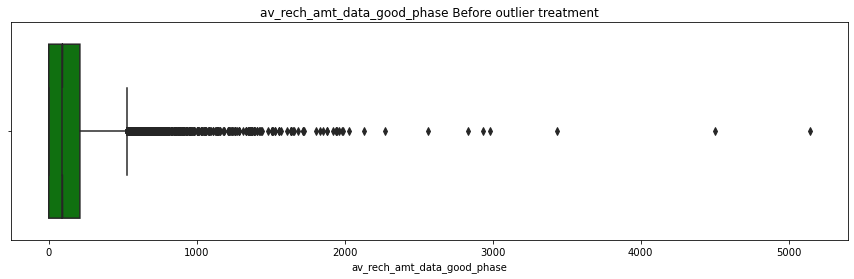

6445  count of extreme outliers present in Column  vol_2g_mb_diff_bw_phase
21.48  percentage of extreme outliers present in Column  vol_2g_mb_diff_bw_phase


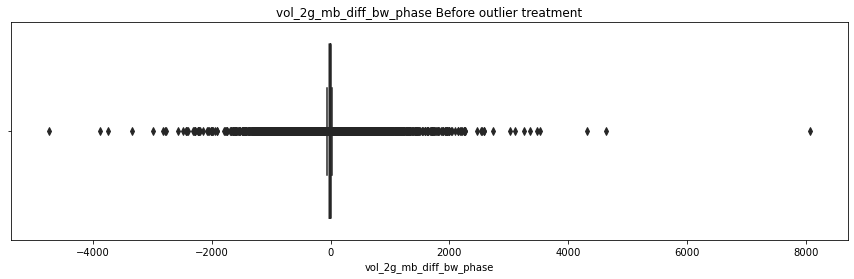

1769  count of extreme outliers present in Column  vol_2g_mb_good_phase
5.9  percentage of extreme outliers present in Column  vol_2g_mb_good_phase


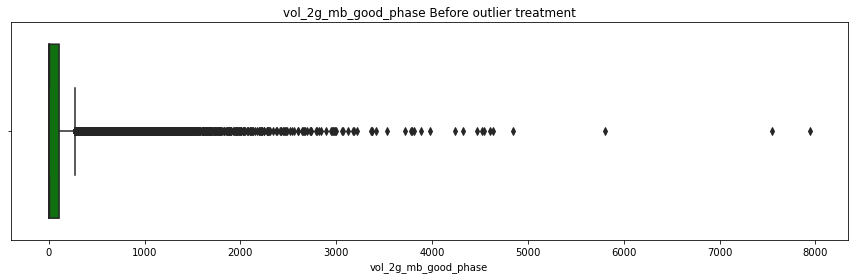

12982  count of extreme outliers present in Column  vol_3g_mb_diff_bw_phase
43.27  percentage of extreme outliers present in Column  vol_3g_mb_diff_bw_phase


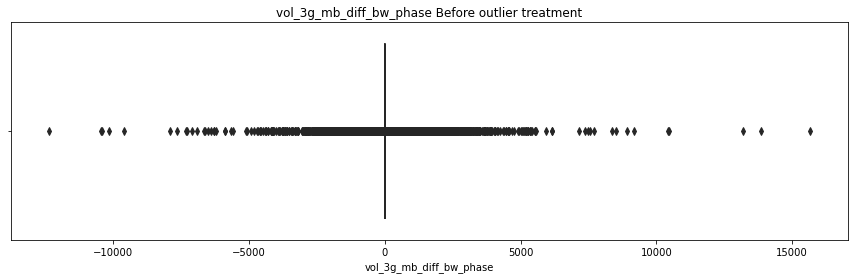

672  count of extreme outliers present in Column  vol_3g_mb_good_phase
2.24  percentage of extreme outliers present in Column  vol_3g_mb_good_phase


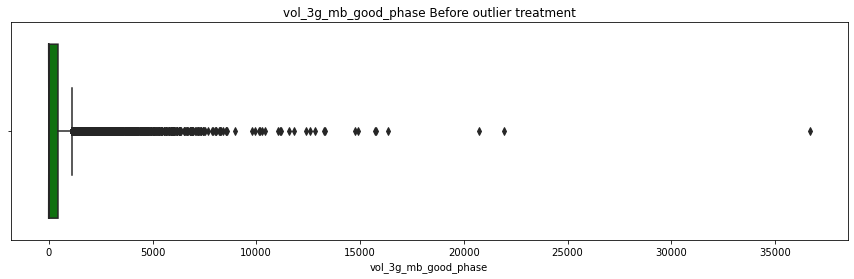

9881  count of extreme outliers present in Column  arpu_3g_diff_bw_phase
32.94  percentage of extreme outliers present in Column  arpu_3g_diff_bw_phase


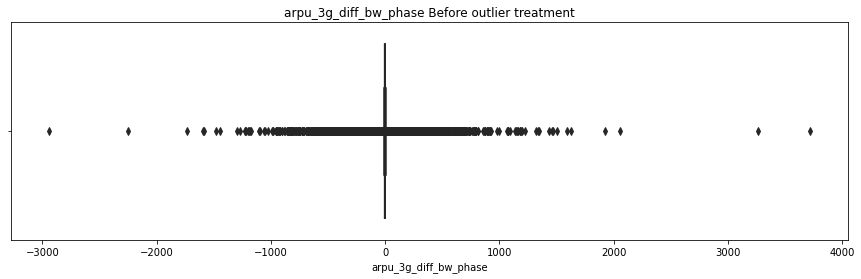

1442  count of extreme outliers present in Column  arpu_3g_good_phase
4.81  percentage of extreme outliers present in Column  arpu_3g_good_phase


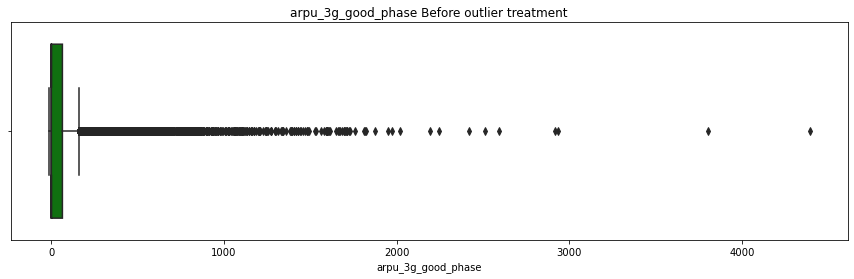

7412  count of extreme outliers present in Column  arpu_2g_diff_bw_phase
24.71  percentage of extreme outliers present in Column  arpu_2g_diff_bw_phase


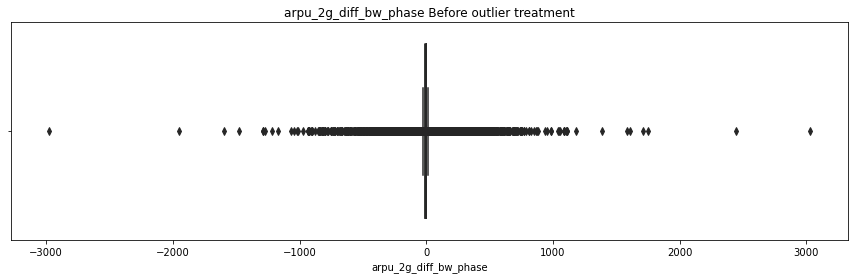

1126  count of extreme outliers present in Column  arpu_2g_good_phase
3.75  percentage of extreme outliers present in Column  arpu_2g_good_phase


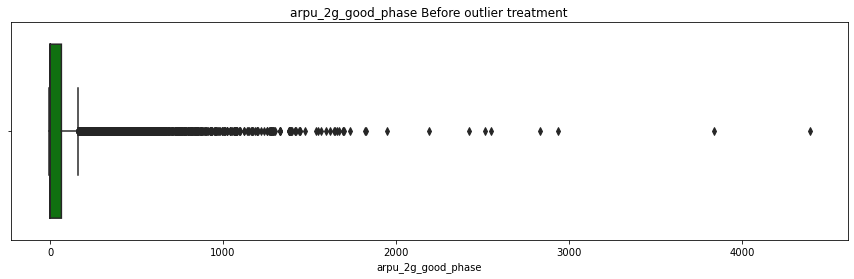

5751  count of extreme outliers present in Column  monthly_2g_diff_bw_phase
19.17  percentage of extreme outliers present in Column  monthly_2g_diff_bw_phase


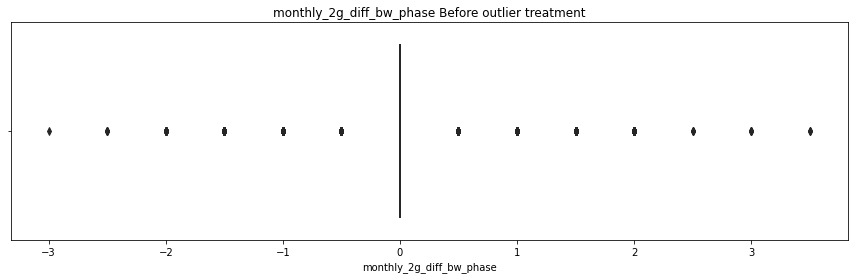

12070  count of extreme outliers present in Column  sachet_2g_diff_bw_phase
40.23  percentage of extreme outliers present in Column  sachet_2g_diff_bw_phase


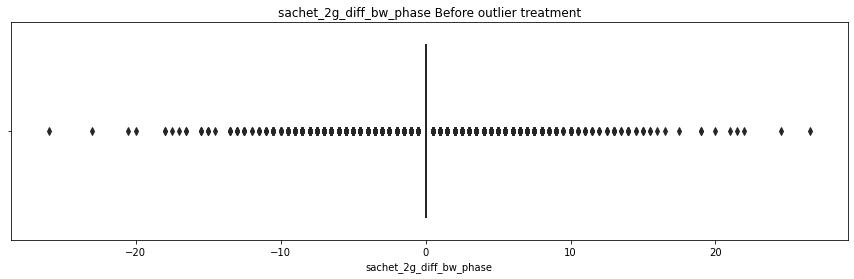

1729  count of extreme outliers present in Column  sachet_2g_good_phase
5.76  percentage of extreme outliers present in Column  sachet_2g_good_phase


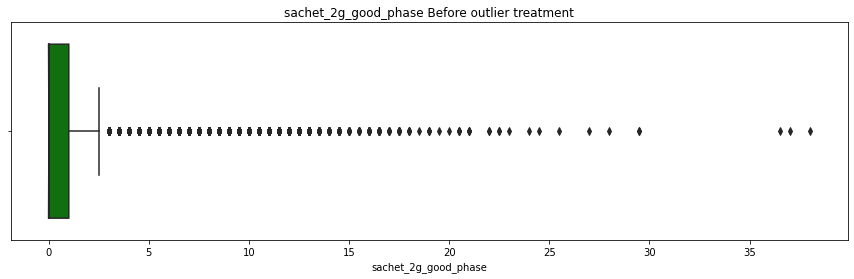

6006  count of extreme outliers present in Column  monthly_3g_diff_bw_phase
20.02  percentage of extreme outliers present in Column  monthly_3g_diff_bw_phase


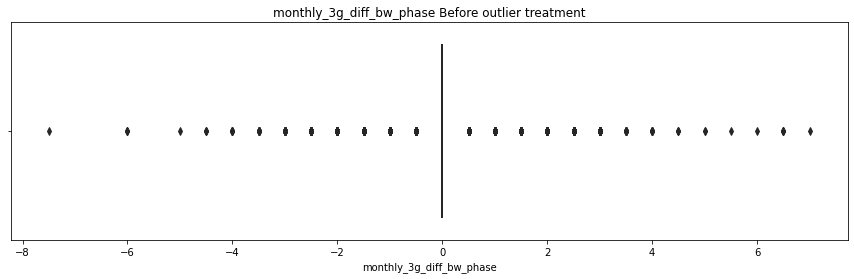

6247  count of extreme outliers present in Column  monthly_3g_good_phase
20.82  percentage of extreme outliers present in Column  monthly_3g_good_phase


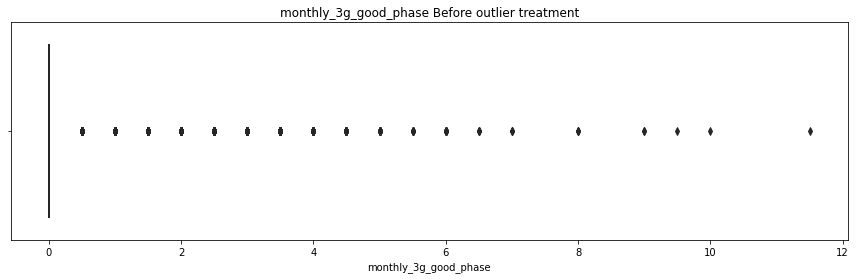

5344  count of extreme outliers present in Column  sachet_3g_diff_bw_phase
17.81  percentage of extreme outliers present in Column  sachet_3g_diff_bw_phase


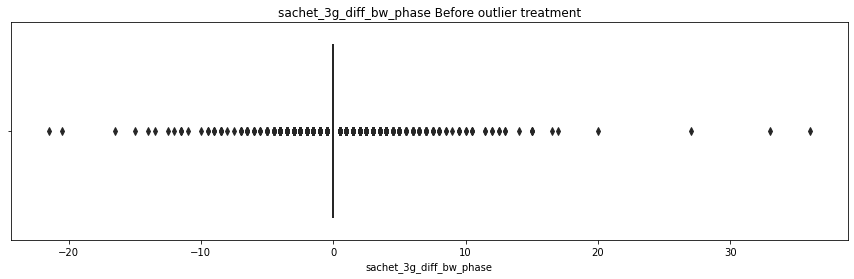

4883  count of extreme outliers present in Column  sachet_3g_good_phase
16.28  percentage of extreme outliers present in Column  sachet_3g_good_phase


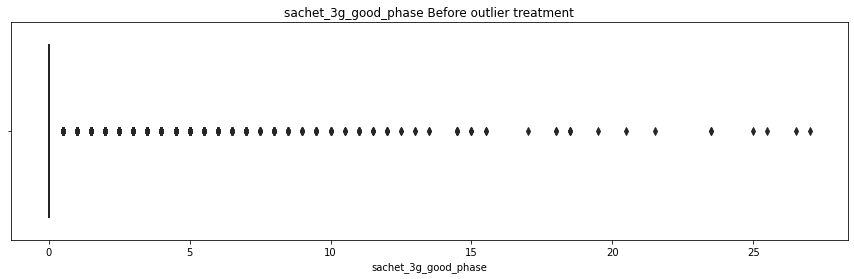

12788  count of extreme outliers present in Column  vbc_3g_diff_bw_phase
42.63  percentage of extreme outliers present in Column  vbc_3g_diff_bw_phase


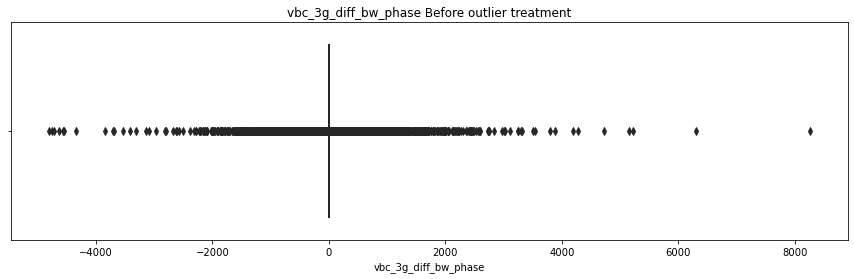

1592  count of extreme outliers present in Column  vbc_3g_good_phase
5.31  percentage of extreme outliers present in Column  vbc_3g_good_phase


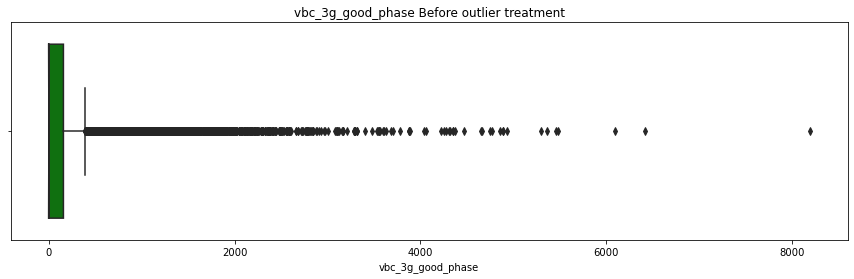

3875  count of extreme outliers present in Column  total_rech_num_data_diff_bw_phase
12.92  percentage of extreme outliers present in Column  total_rech_num_data_diff_bw_phase


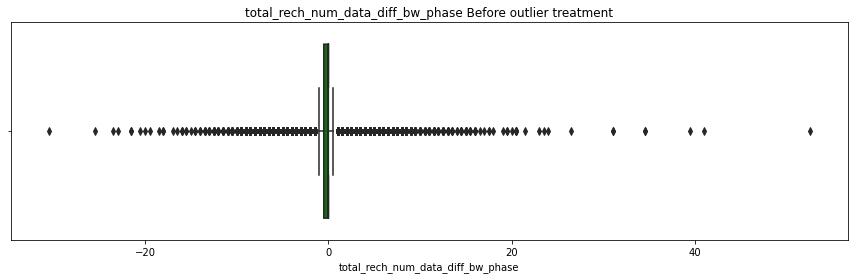

398  count of extreme outliers present in Column  total_rech_num_data_good_phase
1.33  percentage of extreme outliers present in Column  total_rech_num_data_good_phase


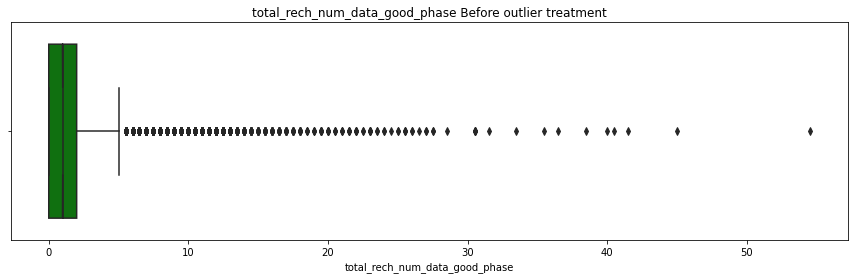

3000  count of extreme outliers present in Column  total_rech_amt_data_diff_bw_phase
10.0  percentage of extreme outliers present in Column  total_rech_amt_data_diff_bw_phase


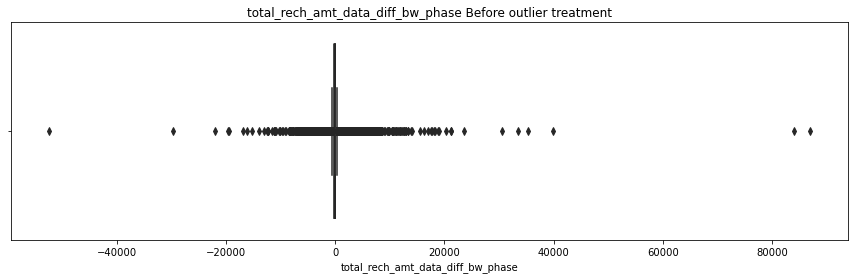

918  count of extreme outliers present in Column  total_rech_amt_data_good_phase
3.06  percentage of extreme outliers present in Column  total_rech_amt_data_good_phase


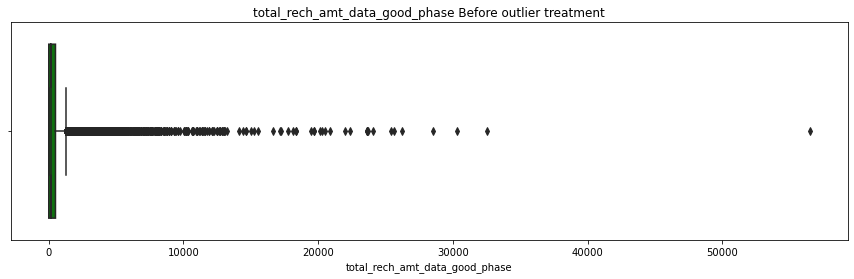

677  count of extreme outliers present in Column  total_month_rech_amt_diff_bw_phase
2.26  percentage of extreme outliers present in Column  total_month_rech_amt_diff_bw_phase


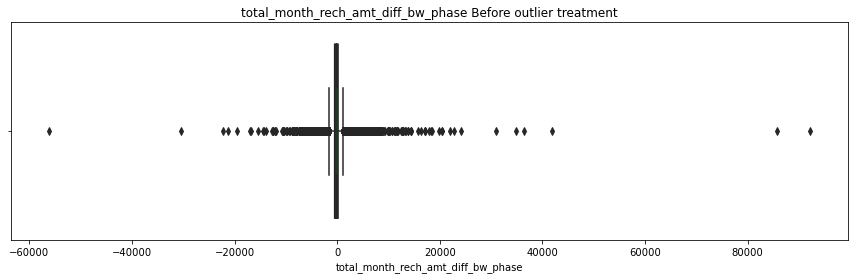

748  count of extreme outliers present in Column  total_month_rech_amt_good_phase
2.49  percentage of extreme outliers present in Column  total_month_rech_amt_good_phase


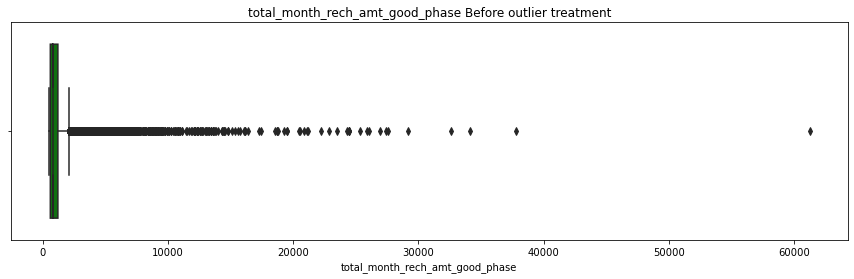

1784  count of extreme outliers present in Column  arpu_churn_rate
5.95  percentage of extreme outliers present in Column  arpu_churn_rate


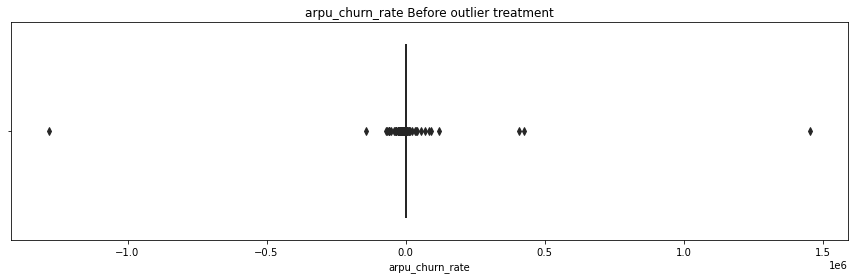

In [41]:
#Numerical columns
for i in numcols:
    fig = plt.figure(figsize=(15,4))  
    plt.subplot(1,1,1)
    #print(df)
    sns.boxplot(x = churn_hvc_data[i], notch = True,color ="green"  )
    plt.title(i+" Before outlier treatment")  
    
    #Recording extrem outliers from k factor 3
    quant25,quant75 = np.percentile(sorted(churn_hvc_data[i]) , [25,75])
    Iqr = quant75 - quant25    
    k=3
    bound = Iqr *1.5*k
    lowerb, upperb = quant25 - bound, quant75 + bound
    length = len(churn_hvc_data[((churn_hvc_data[i] < lowerb) | (churn_hvc_data[i] > upperb))])
    
    print(length, " count of extreme outliers present in Column ",i)
    print(round(100*length/len(churn_hvc_data),2), " percentage of extreme outliers present in Column ",i)
    plt.show()
    

In [42]:
print("Shape of DataFrame: {}".format(churn_hvc_data.shape))

Shape of DataFrame: (30001, 268)


### <p> <span style="color : darkred"> <i> Subtask 1.2.7 Univariate, Bivariate and Multivariate Data Analysis </i></span></p>


### <p> <span style="color : darkred"> <i> Subtask 1.2.7.1 Target variable Analysis </i></span></p>


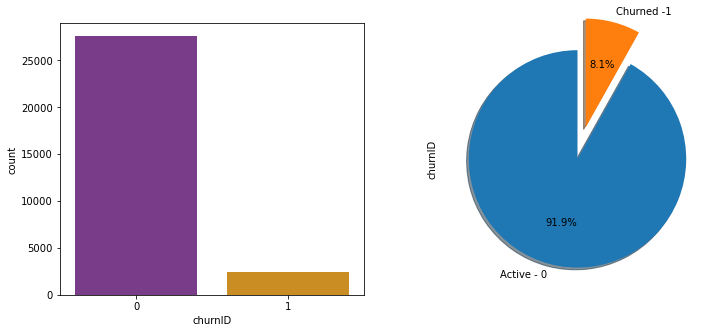

In [43]:
labels = 'Active - 0', 'Churned -1'
explode = (0, 0.3)
fig,(ax, ax1) = plt.subplots(ncols =2, figsize=(12,5))
sns.countplot( x="churnID", data=churn_hvc_data, palette= "CMRmap", ax =ax)
churn_hvc_data["churnID"].value_counts().plot.pie(explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, ax =ax1)
plt.show()

# Class Imbalance:

We could see that there is high data records distributed towards Non churned customers, it is not much significant for Model to be prepared on Imbalanced Data

In [44]:
cols6=[x for x in churn_hvc_data.columns if "6" in x]
numcols6df=churn_hvc_data[cols6].nunique().to_frame("count").query("count>10")
numcols6df

count
arpu_6                  29072
onnet_mou_6             16890
offnet_mou_6            21220
roam_ic_mou_6            4048
roam_og_mou_6            4744
loc_og_t2t_mou_6        10420
loc_og_t2m_mou_6        15625
loc_og_t2f_mou_6         3090
loc_og_t2c_mou_6         1682
loc_og_mou_6            18348
std_og_t2t_mou_6        11102
std_og_t2m_mou_6        12875
std_og_t2f_mou_6         1656
std_og_mou_6            15922
isd_og_mou_6             1031
spl_og_mou_6             3050
og_others_6               841
total_og_mou_6          23519
loc_ic_t2t_mou_6         9506
loc_ic_t2m_mou_6        15461
loc_ic_t2f_mou_6         4752
loc_ic_mou_6            18524
std_ic_t2t_mou_6         4400
std_ic_t2m_mou_6         6356
std_ic_t2f_mou_6         1959
std_ic_mou_6             8022
total_ic_mou_6          20121
spl_ic_mou_6               78
isd_ic_mou_6             3284
ic_others_6              1206
total_rech_num_6          102
total_rech_amt_6         2298
max_rech_amt_6            172
last_day_rch_amt_6        157
total_rech_data_6          38
max_rech_data_6            48
count_rech_2g_6            31
count_rech_3g_6            25
av_rech_amt_data_6        871
vol_2g_mb_6             11311
vol_3g_mb_6             10262
arpu_3g_6                6330
arpu_2g_6                5776
sachet_2g_6                31
monthly_3g_6               12
sachet_3g_6                25
vbc_3g_6                 9285
total_rech_num_data_6      38
total_rech_amt_data_6    1642
total_month_rech_amt_6   3801

In [45]:
# Continuous Numerical columns
numcols6=[x for x in numcols6df.index if "phase" not in x]
print(len(numcols6))

50


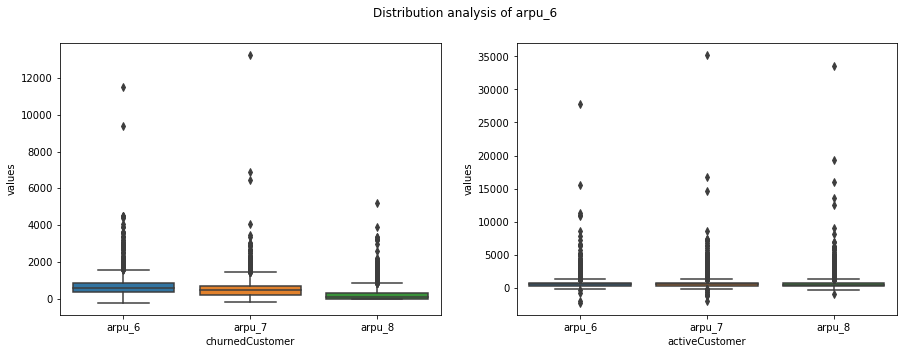

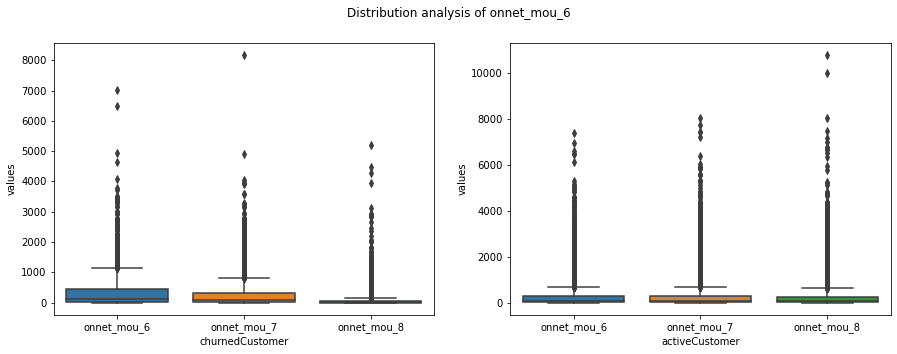

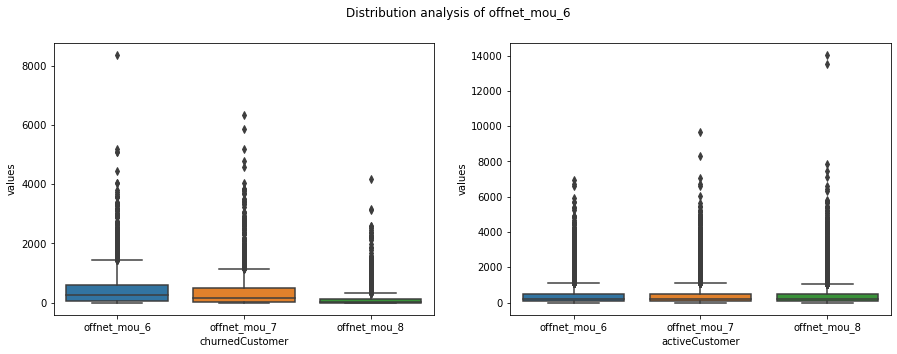

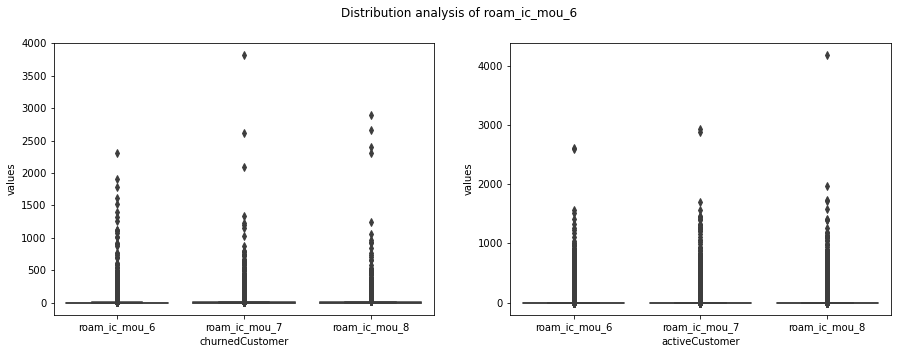

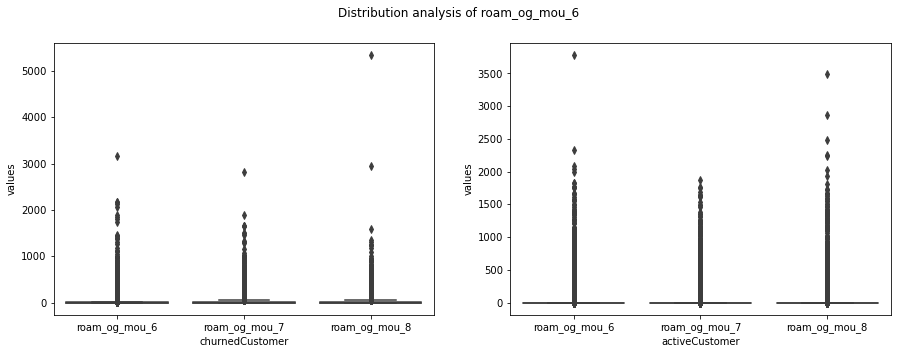

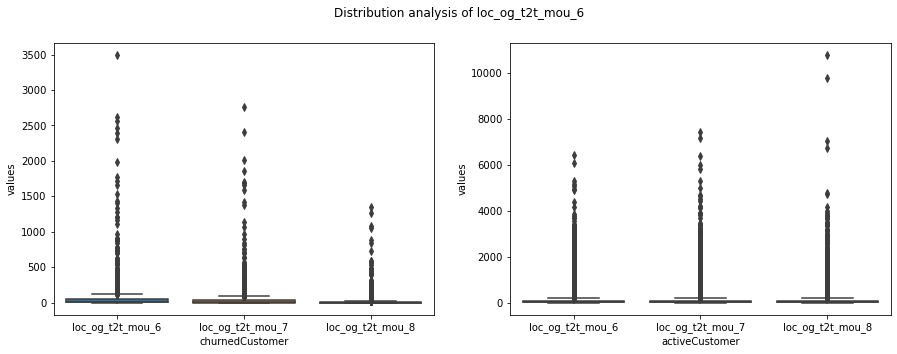

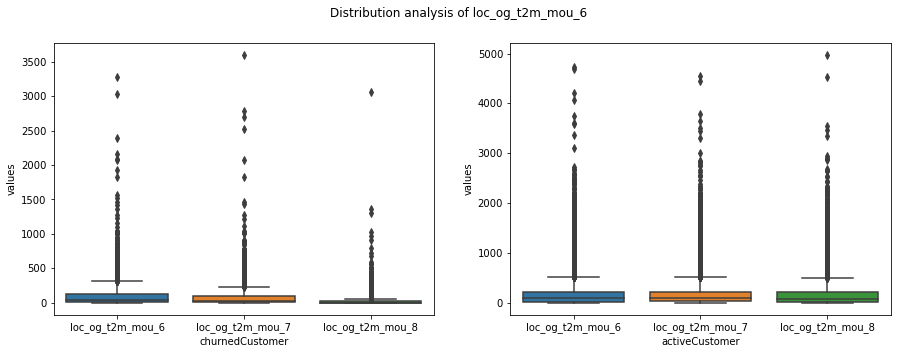

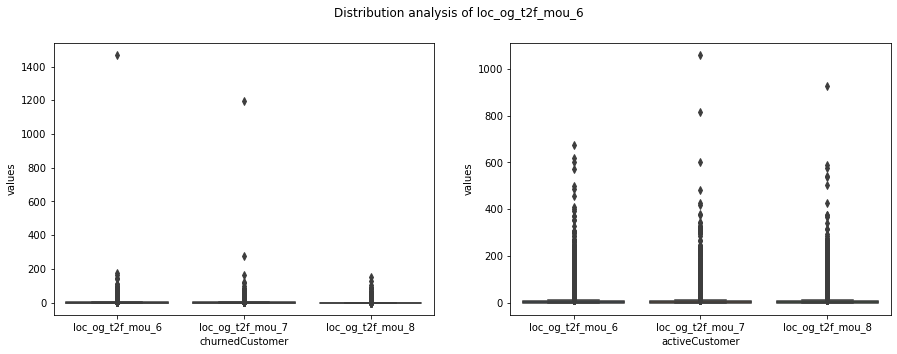

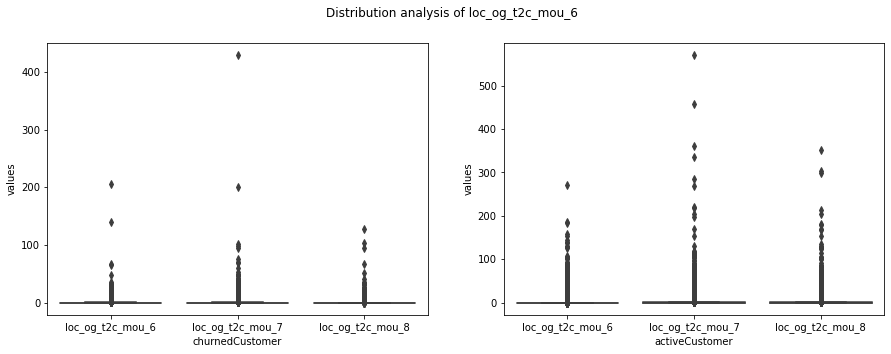

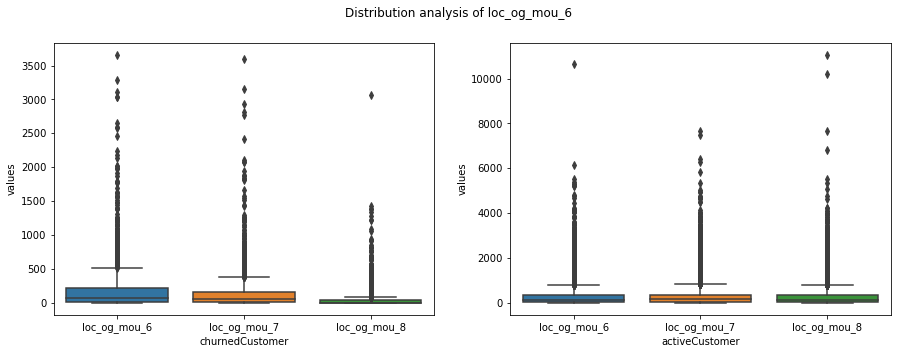

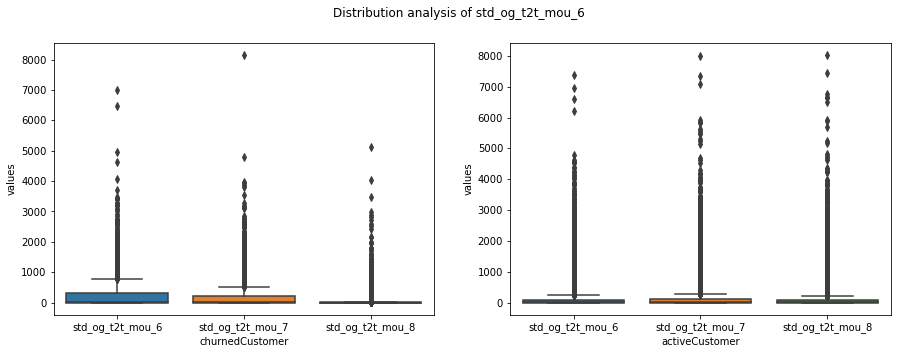

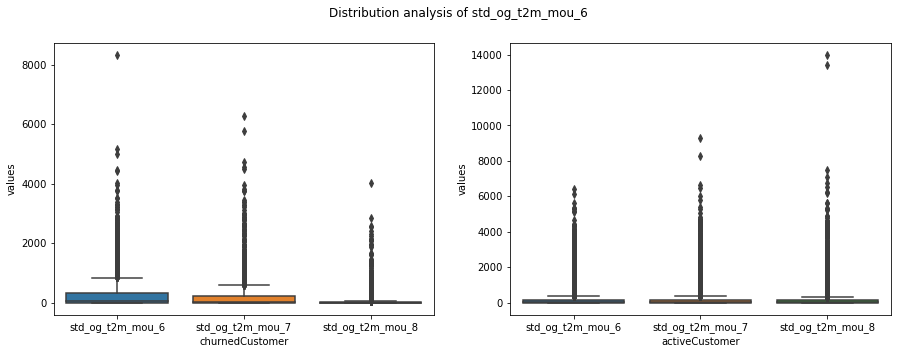

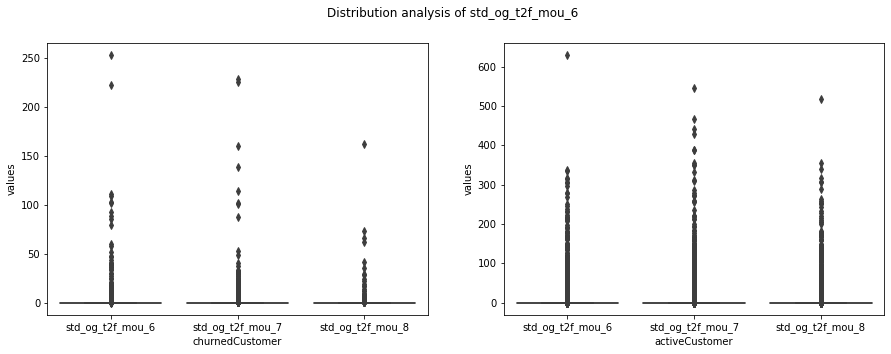

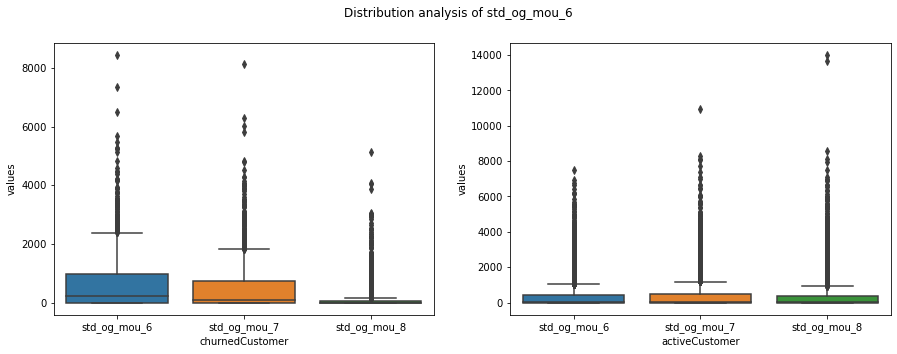

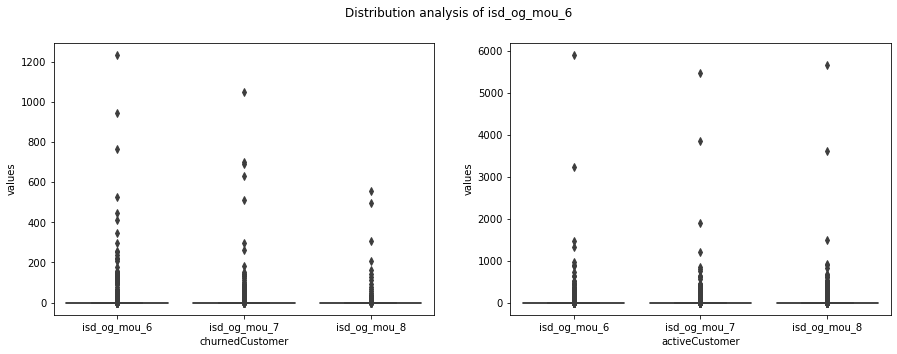

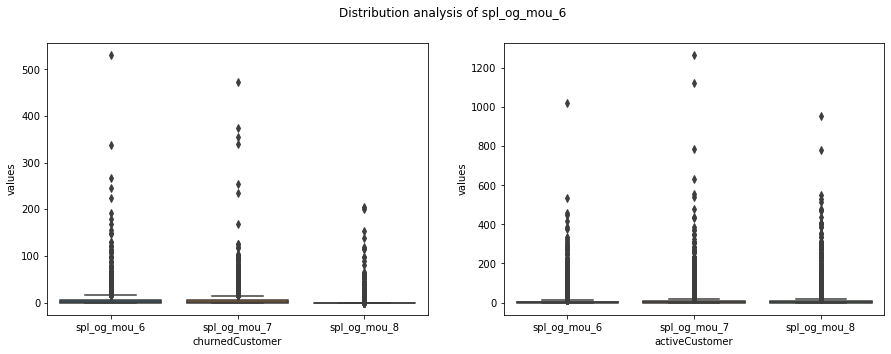

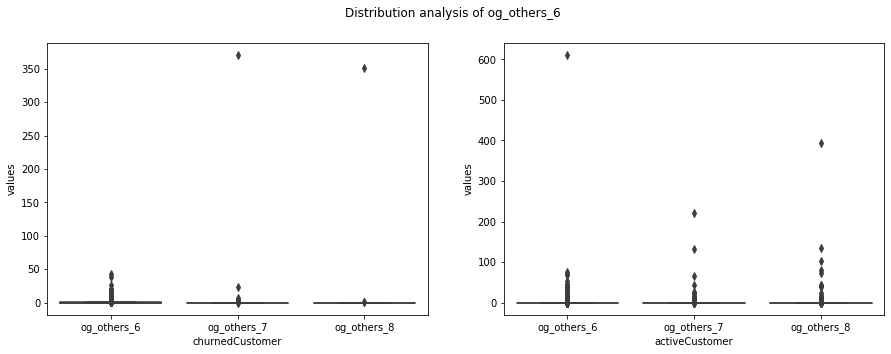

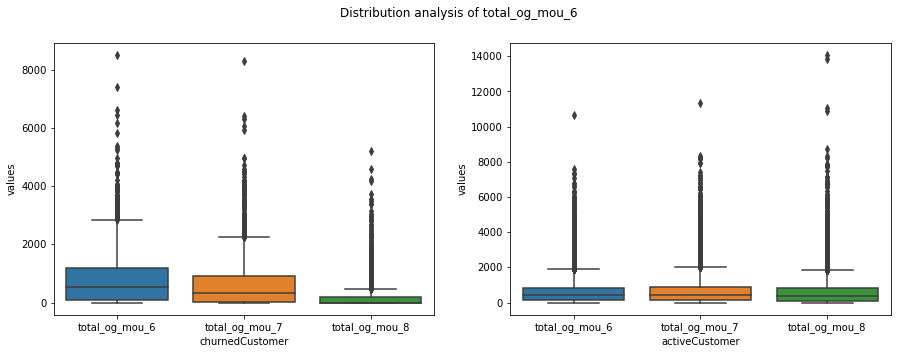

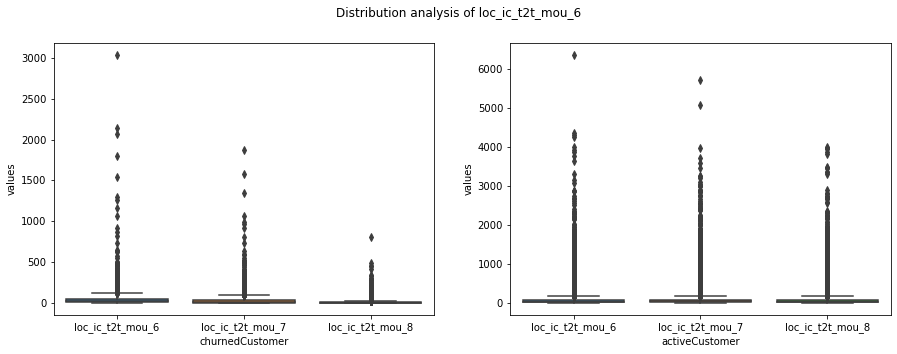

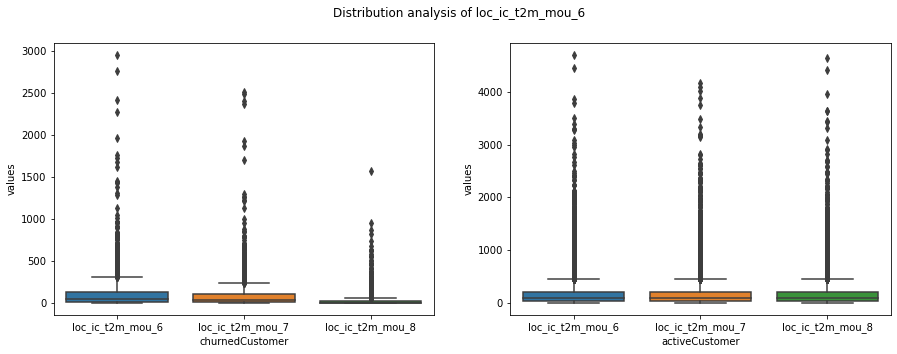

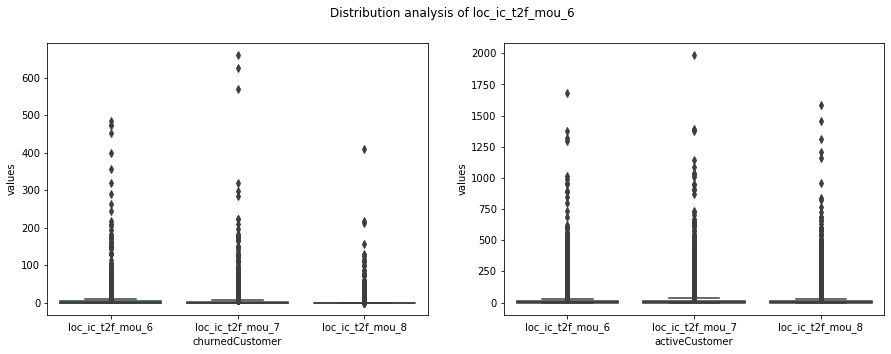

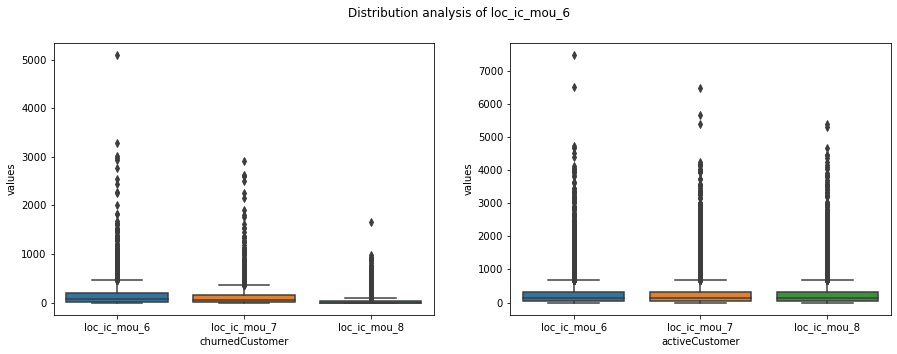

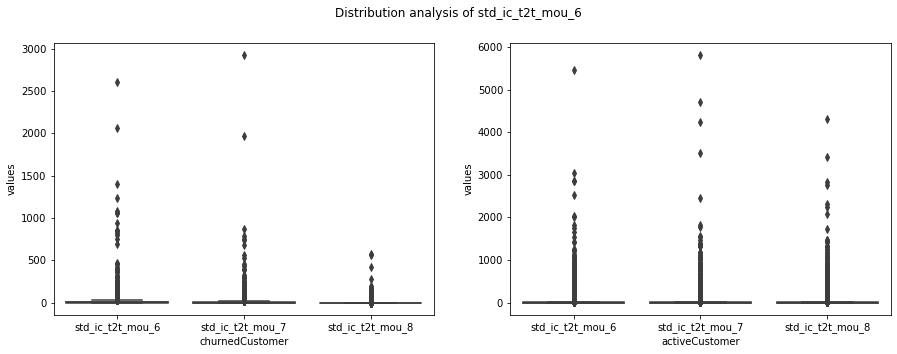

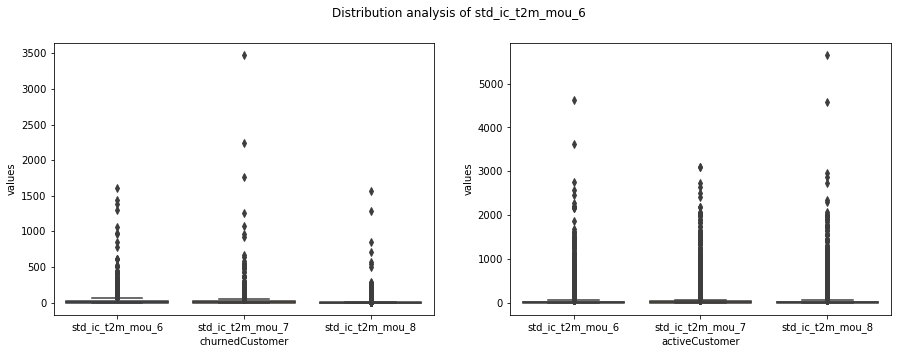

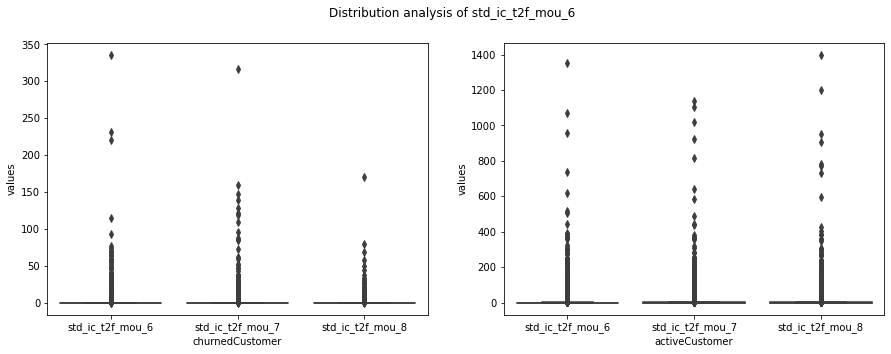

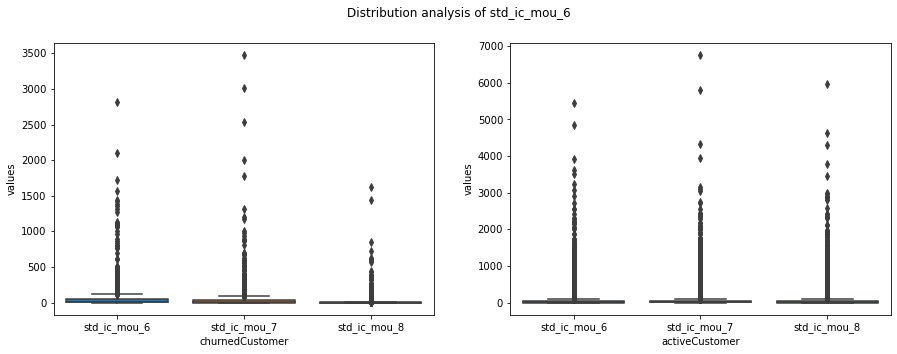

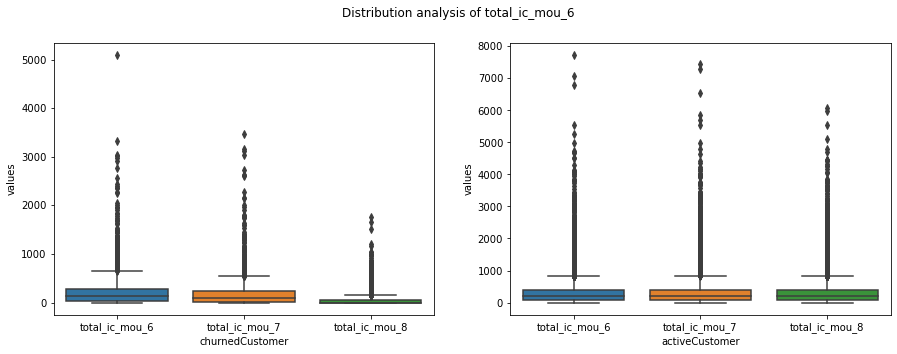

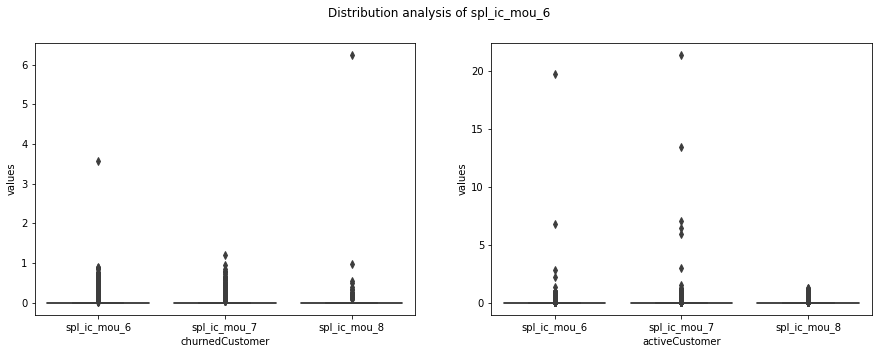

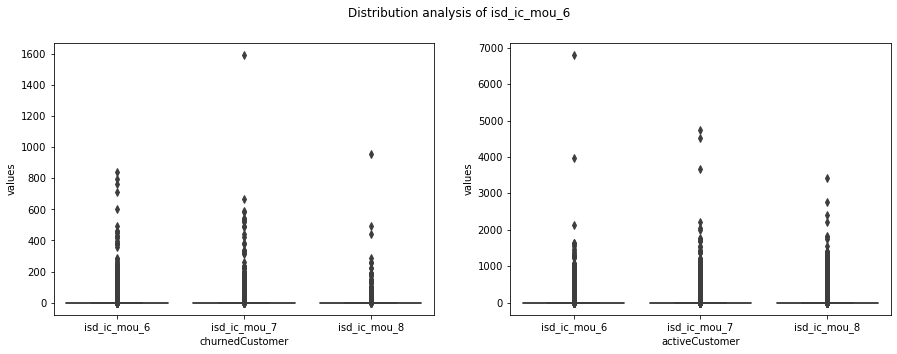

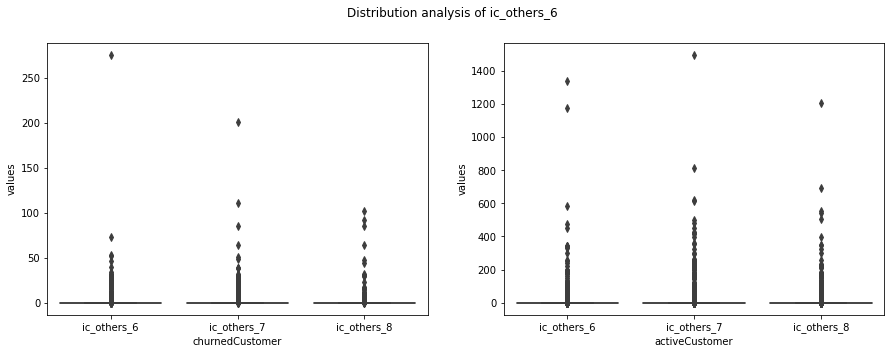

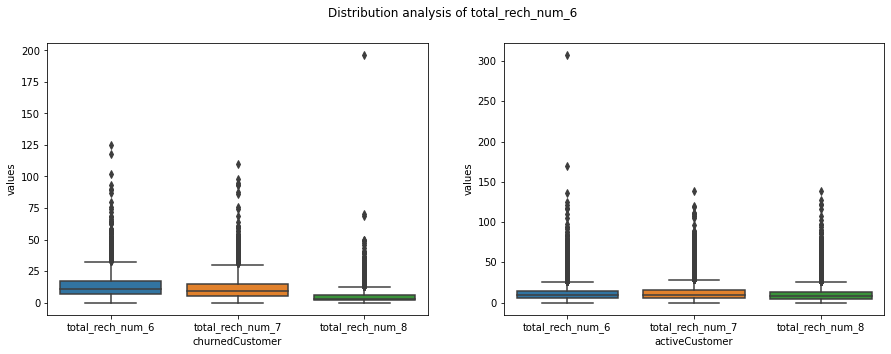

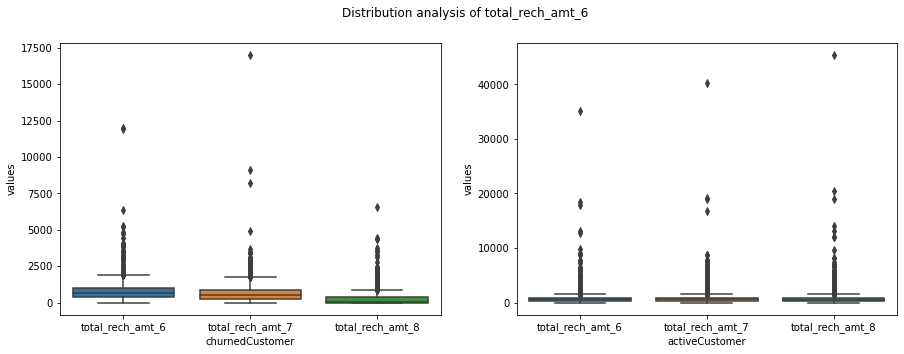

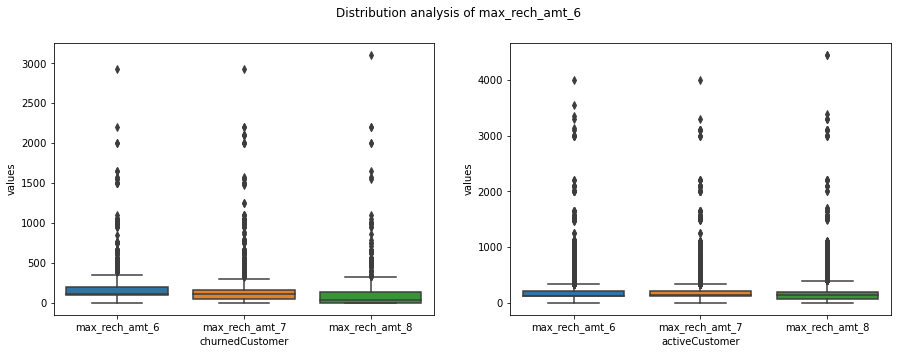

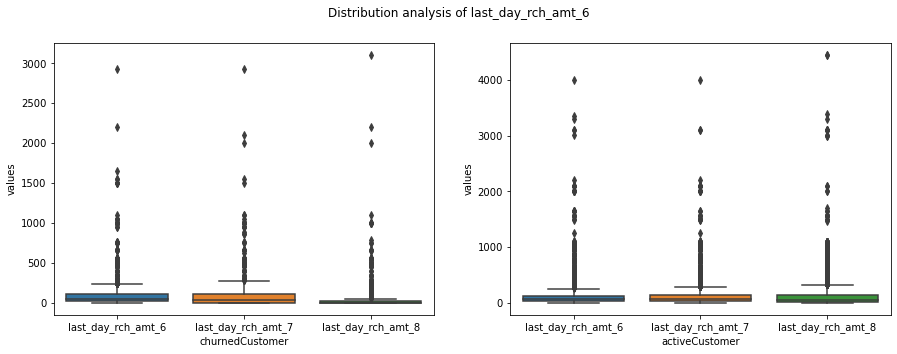

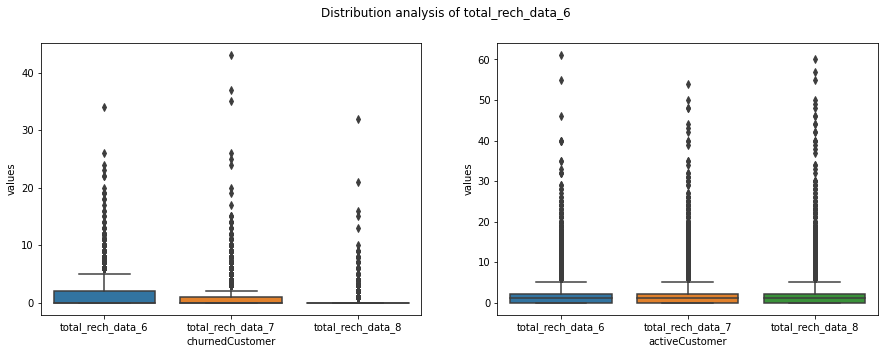

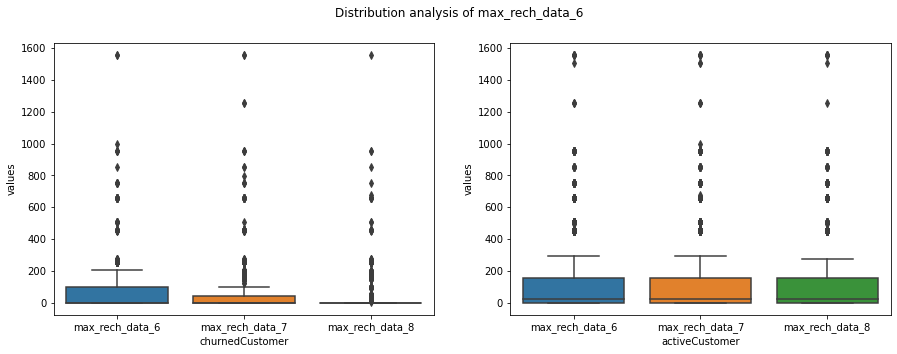

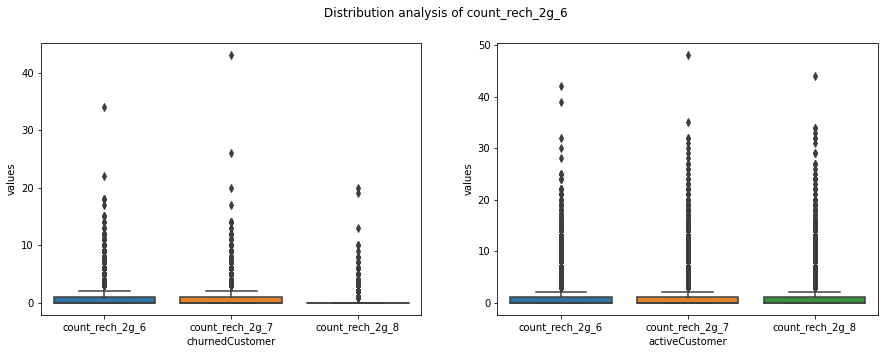

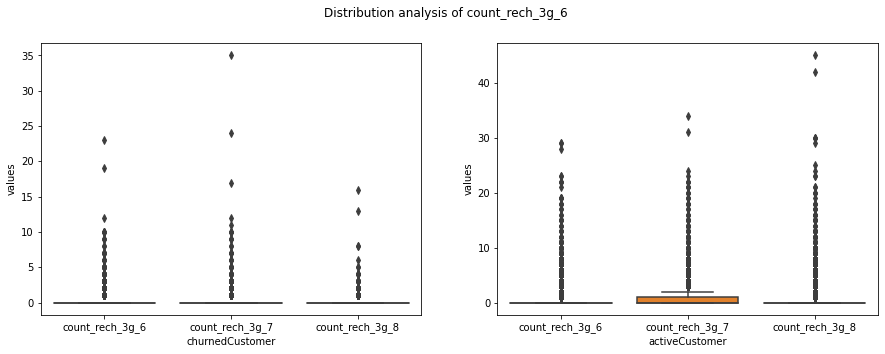

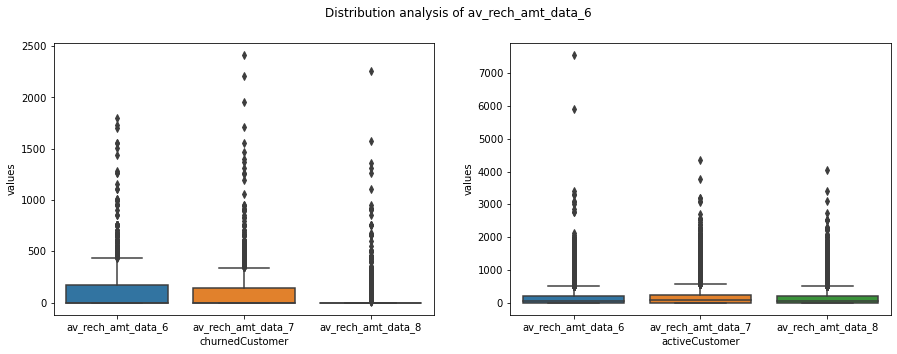

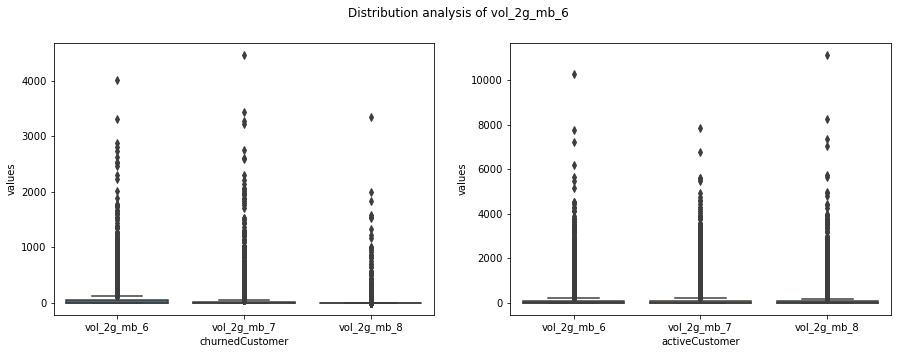

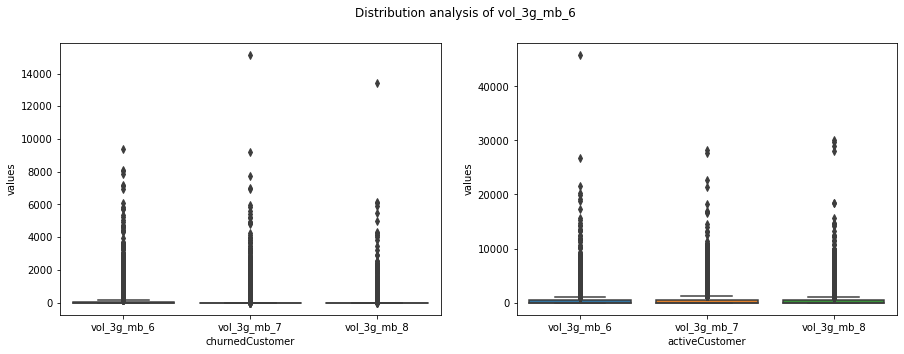

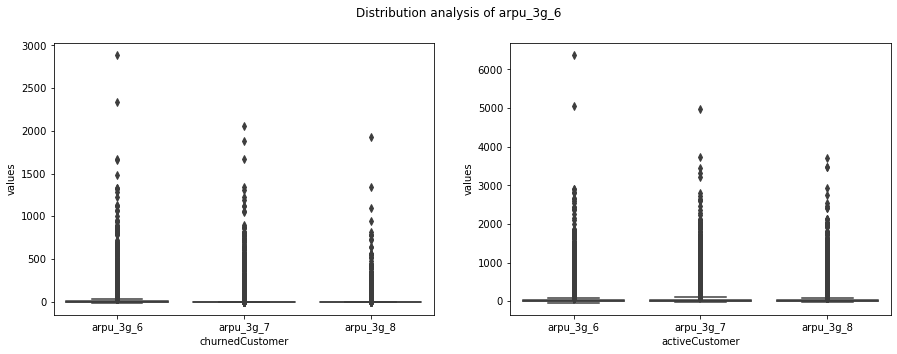

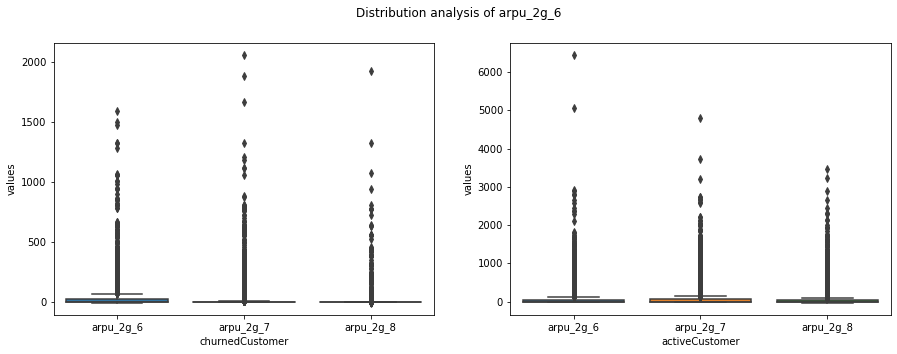

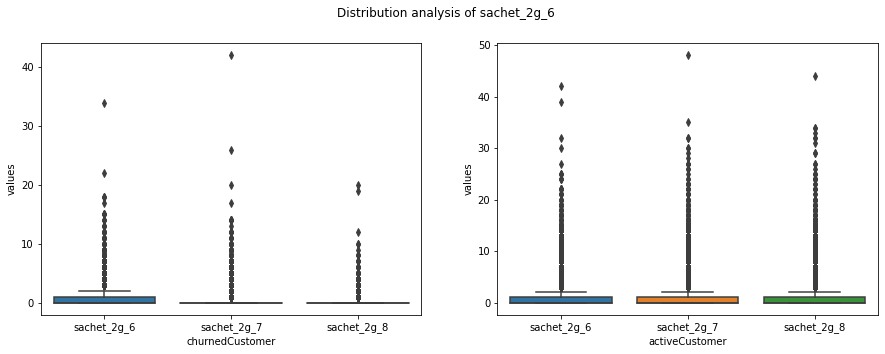

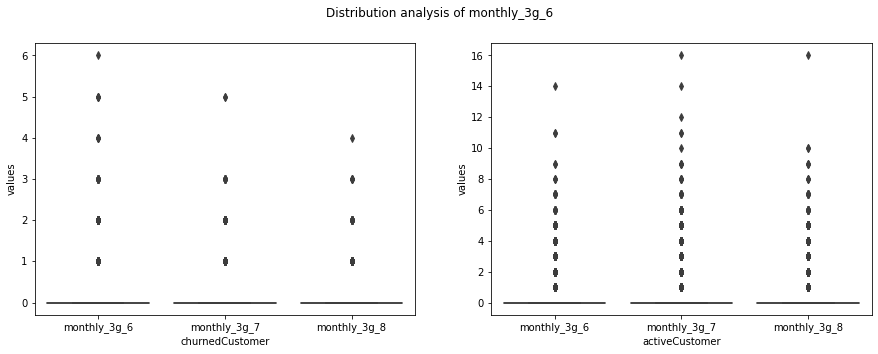

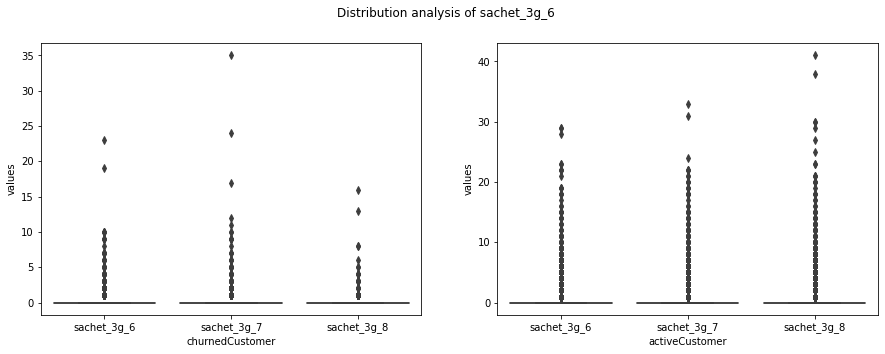

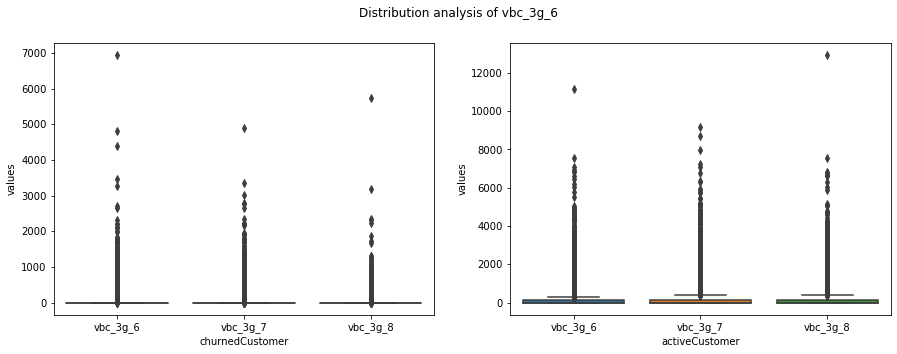

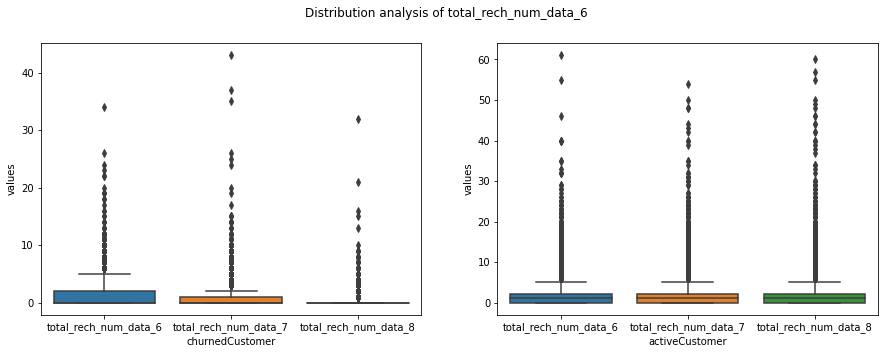

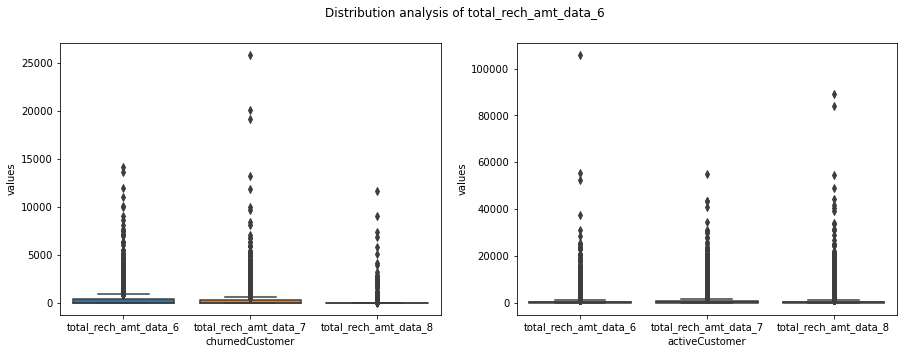

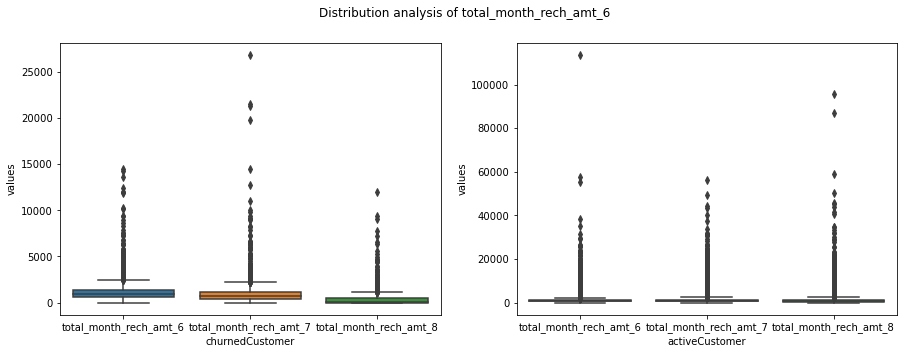

In [46]:
for column_name in numcols6:
    x=6
    
    i="_".join(column_name.split("_")[:-1])
    cols=[i+"_"+str(val+x) for val in range(3) ]
    
    fig, ax = plt.subplots (1, 2, figsize=(15, 5))
    df1 = churn_hvc_data.loc[churn_hvc_data["churnID"]==1,cols]
    df1=pd.melt(df1)
    df1.columns=["churnedCustomer","values"]
    sns.boxplot(x="churnedCustomer", y="values", data=df1,ax=ax[0])
    df2 = churn_hvc_data.loc[churn_hvc_data["churnID"]==0,cols]
    df2=pd.melt(df2)
    df2.columns=["activeCustomer","values"]
    sns.boxplot(x="activeCustomer", y="values", data=df2,ax=ax[1])
    fig.suptitle("Distribution analysis of "+column_name)
    plt.show()

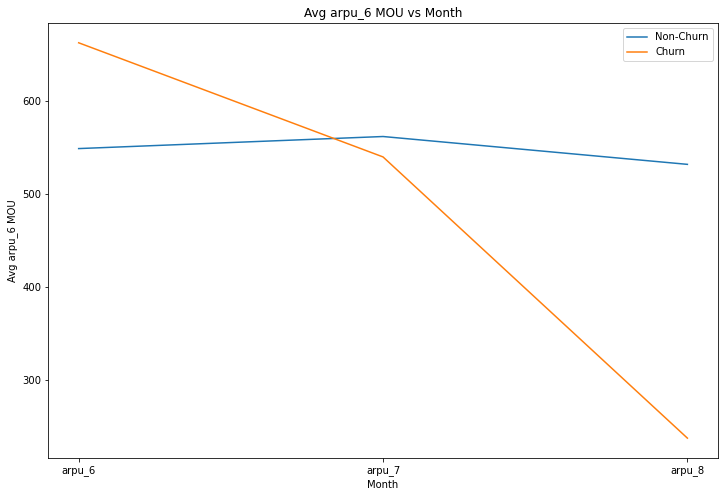

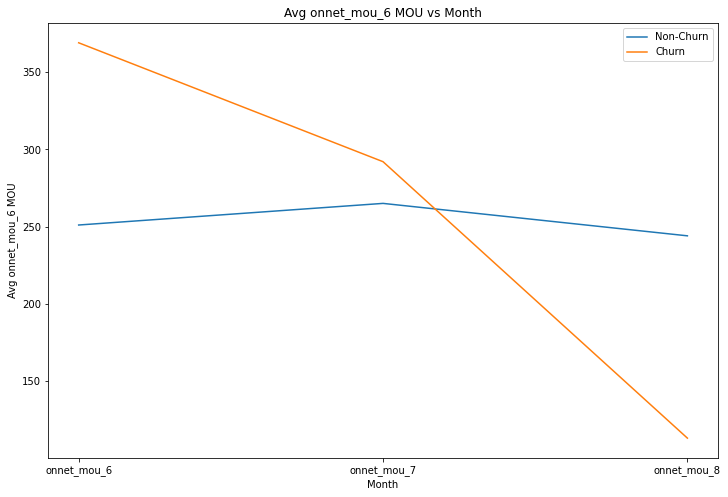

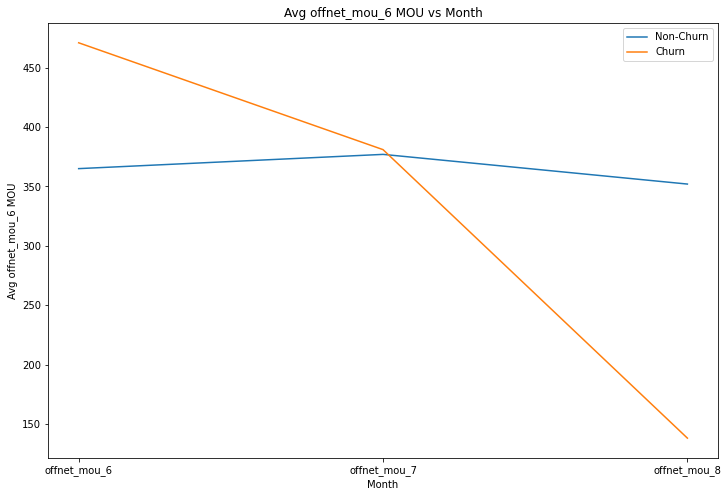

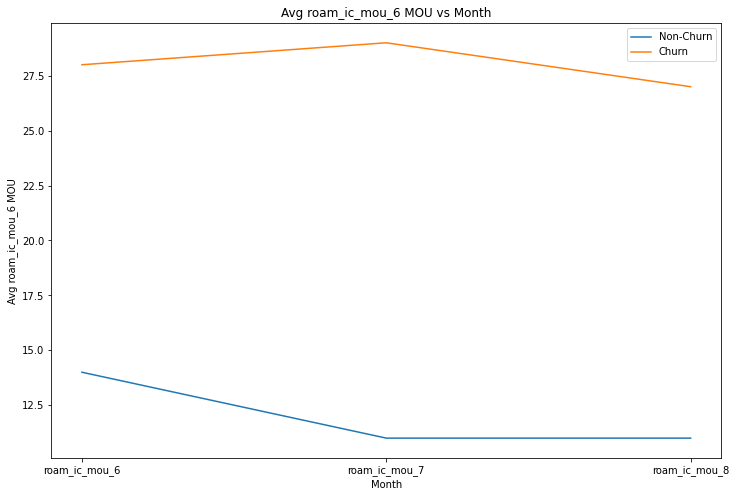

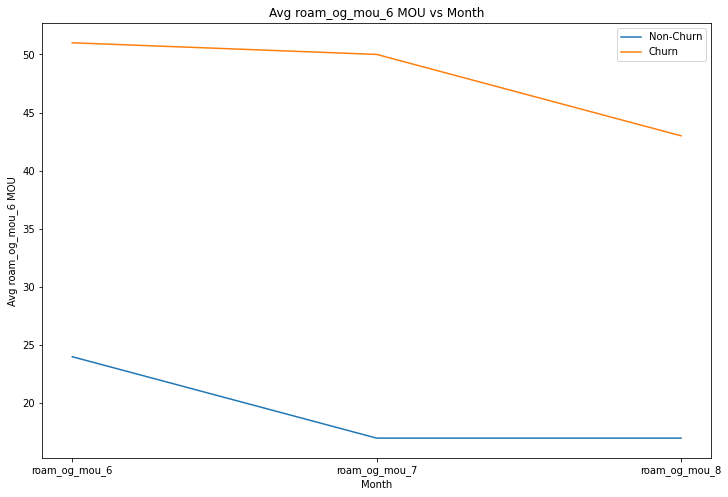

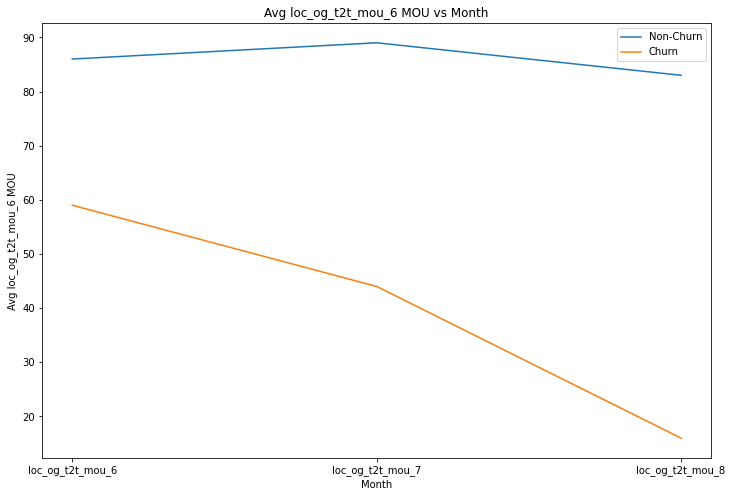

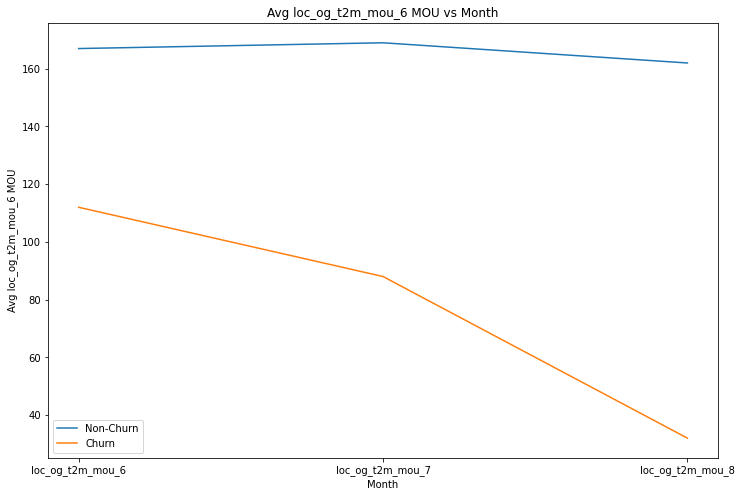

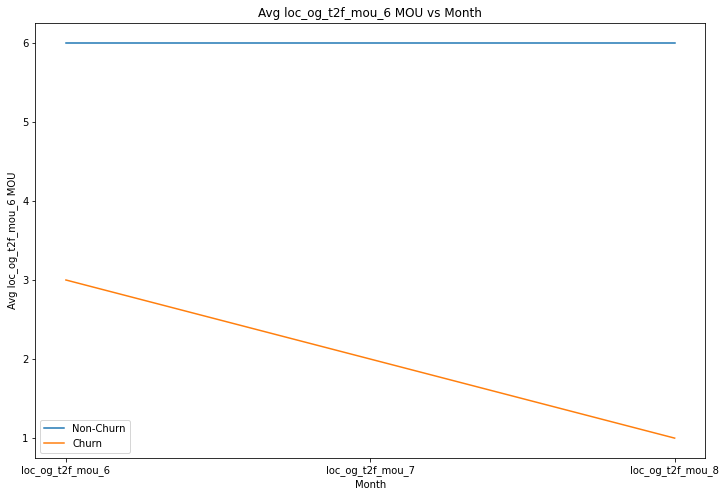

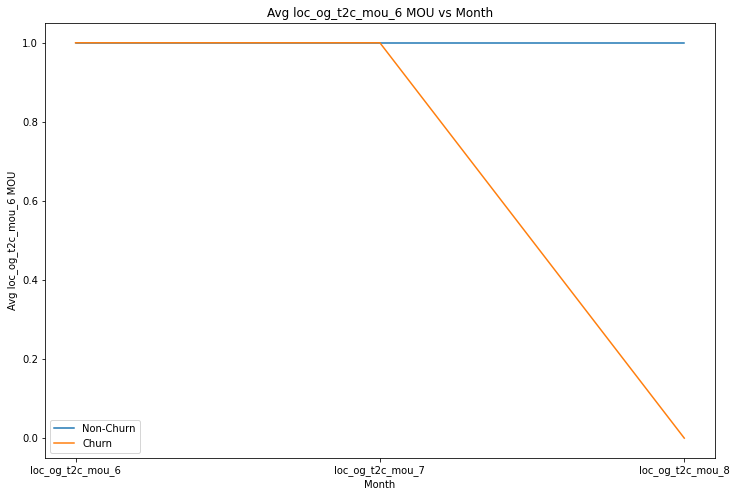

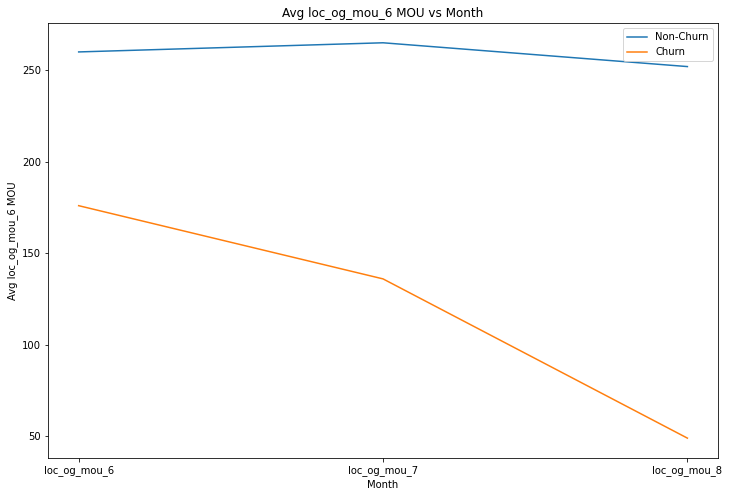

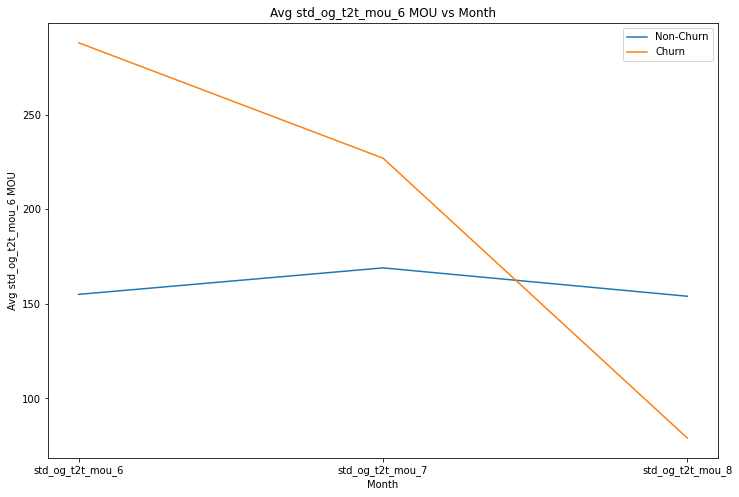

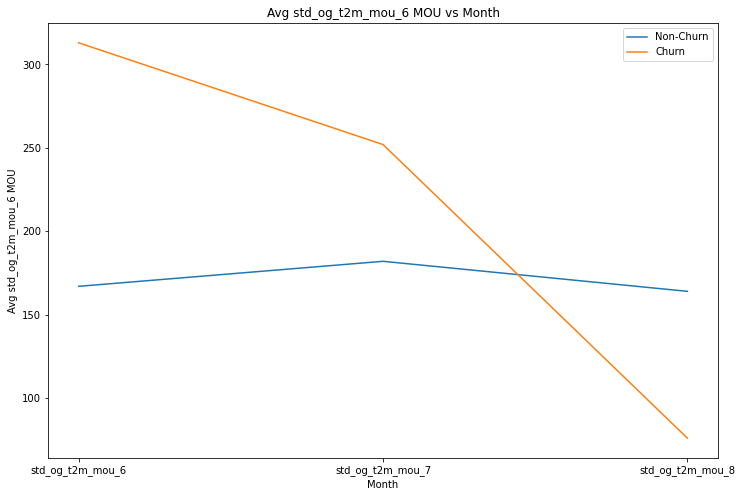

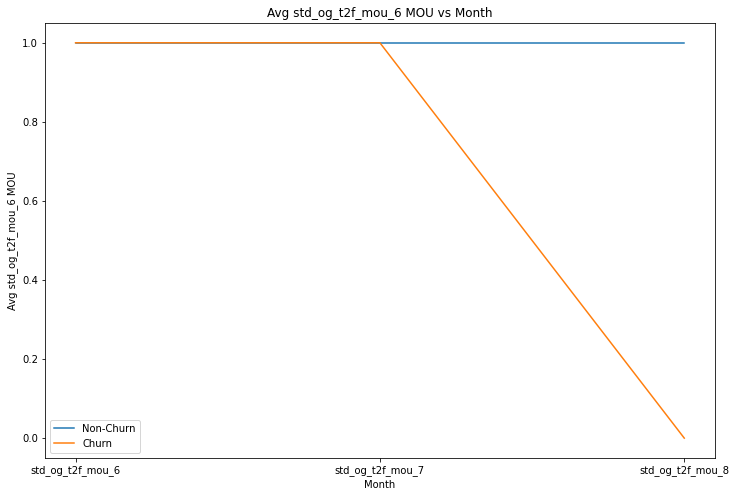

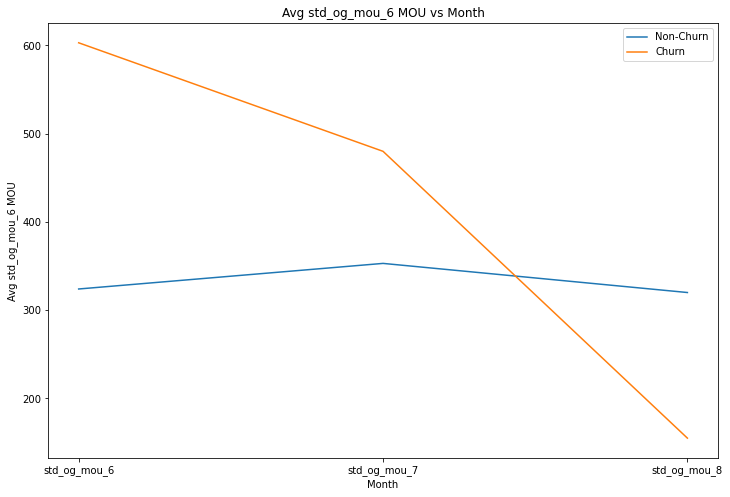

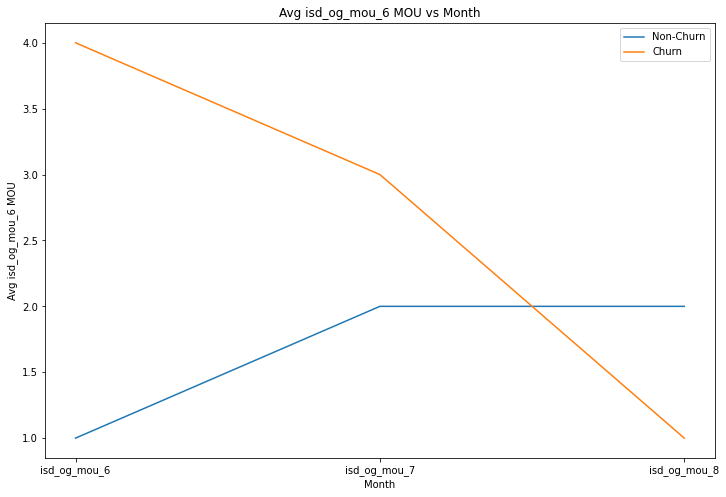

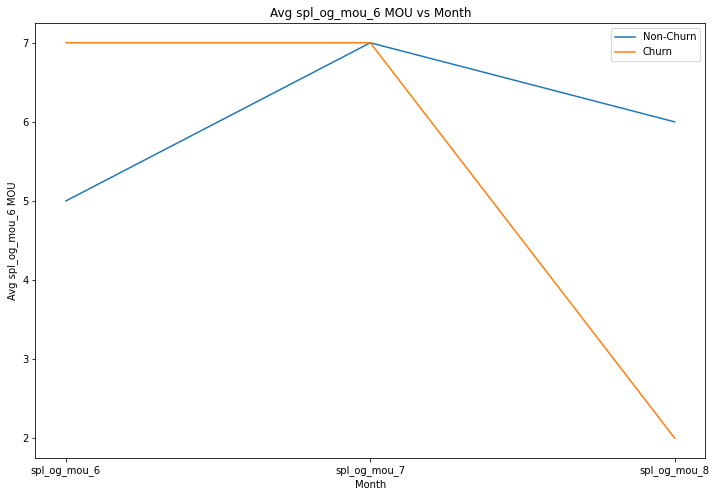

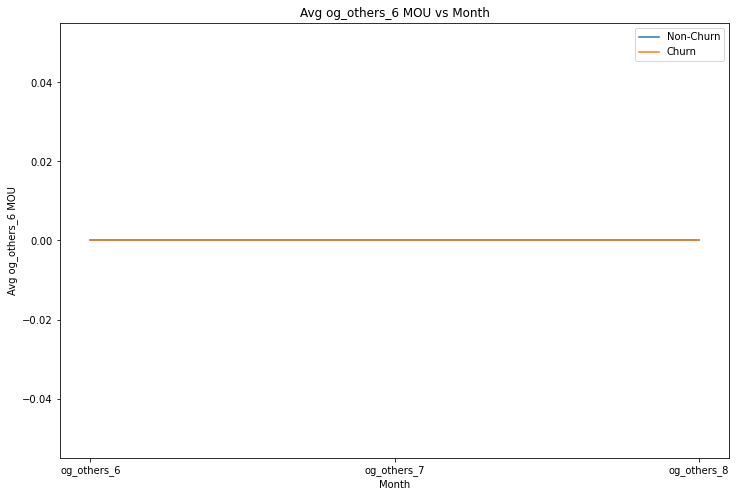

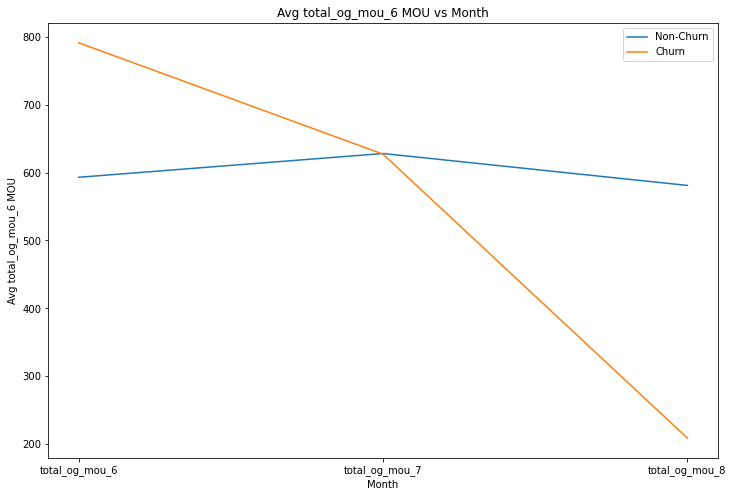

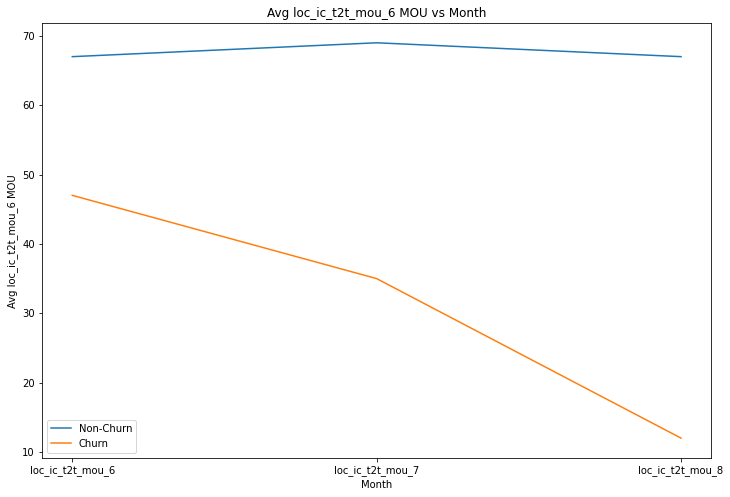

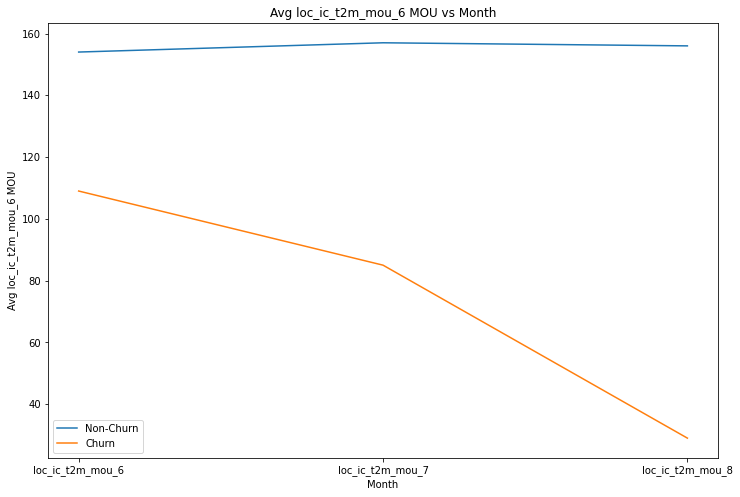

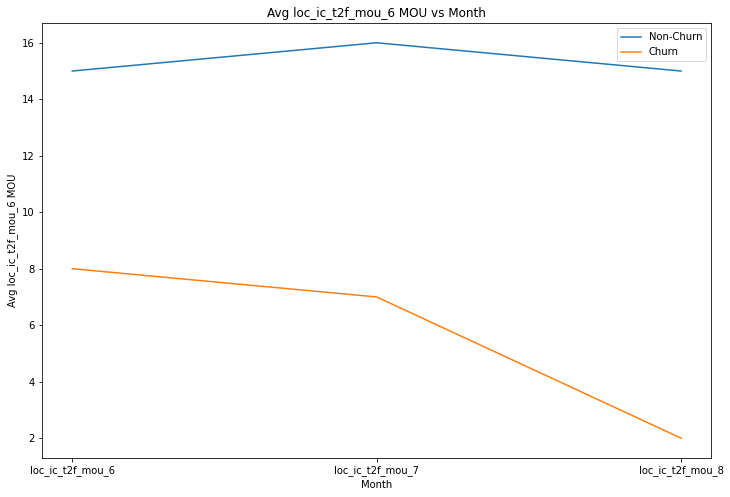

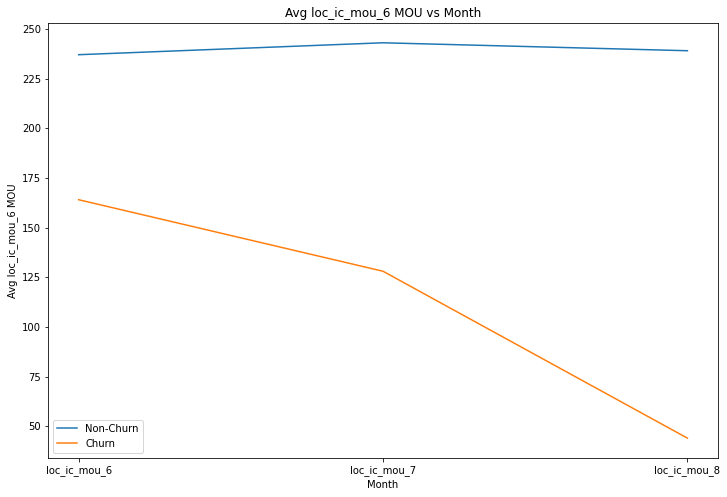

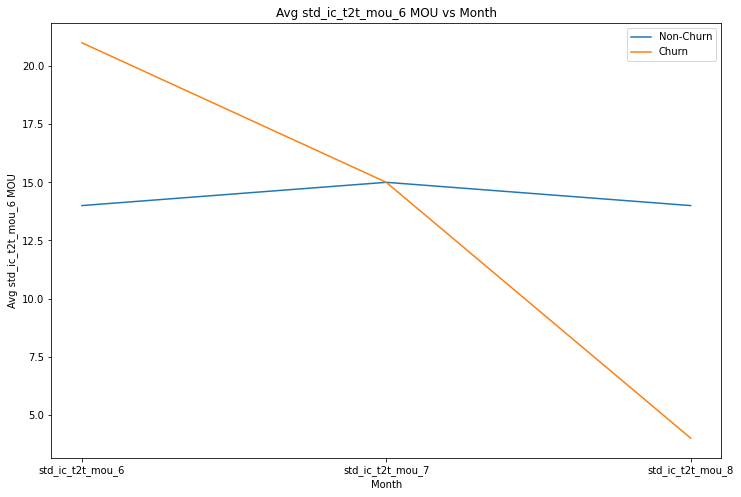

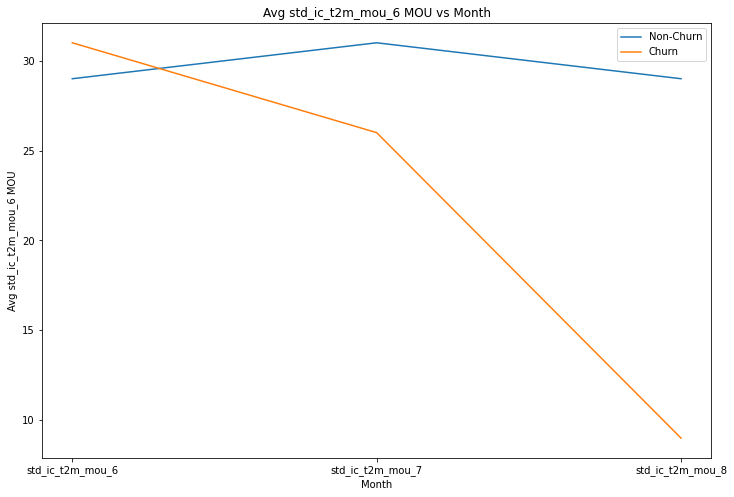

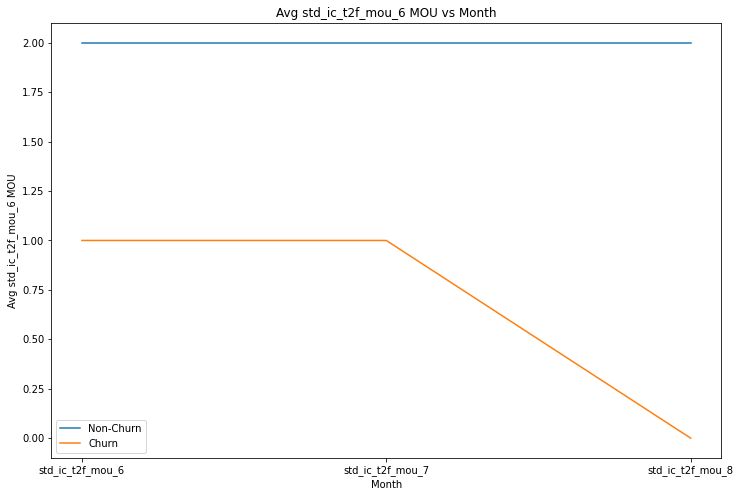

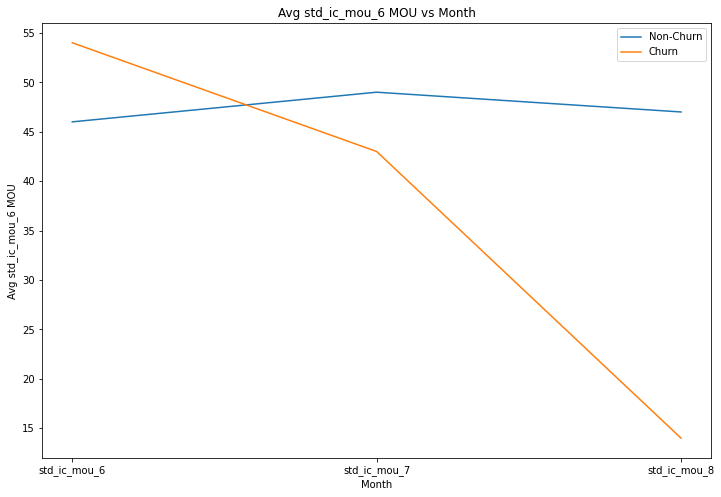

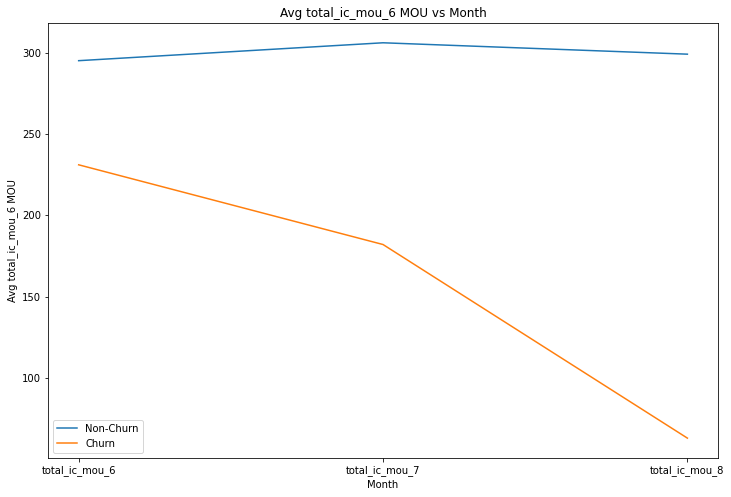

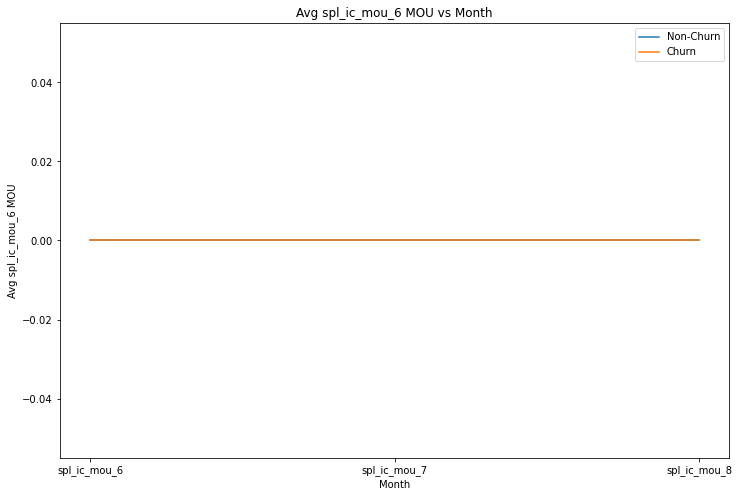

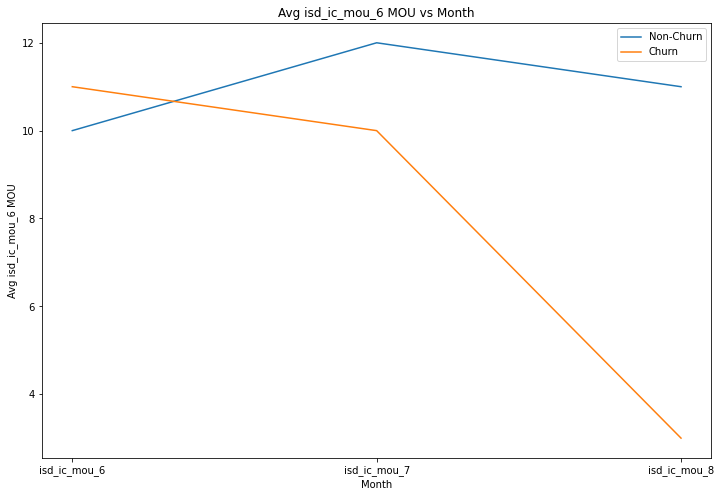

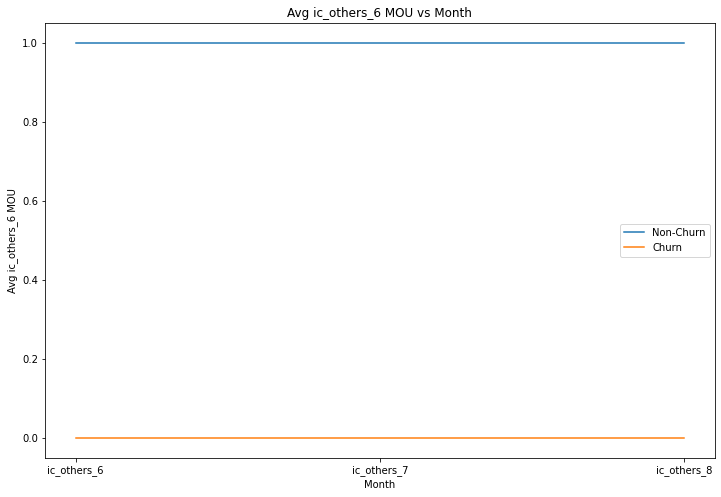

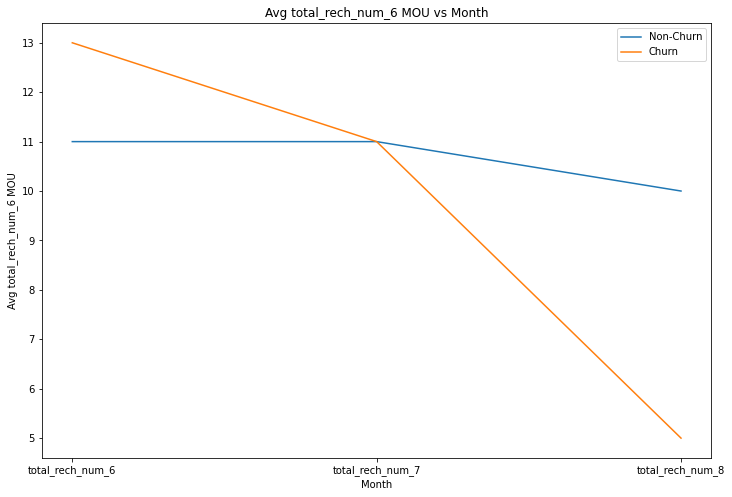

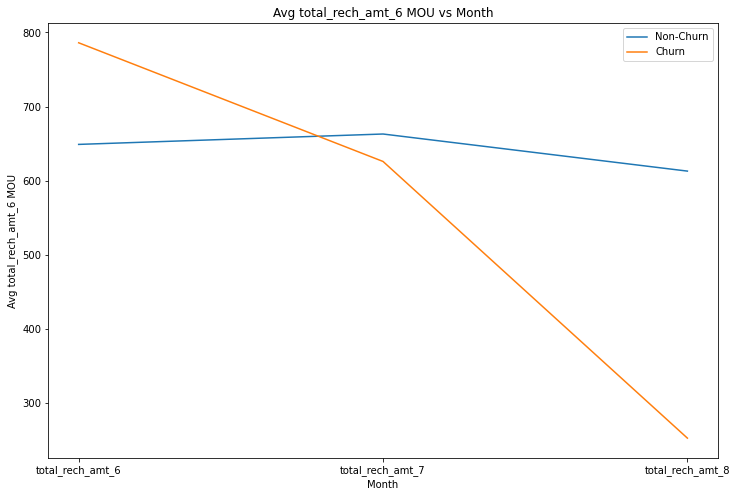

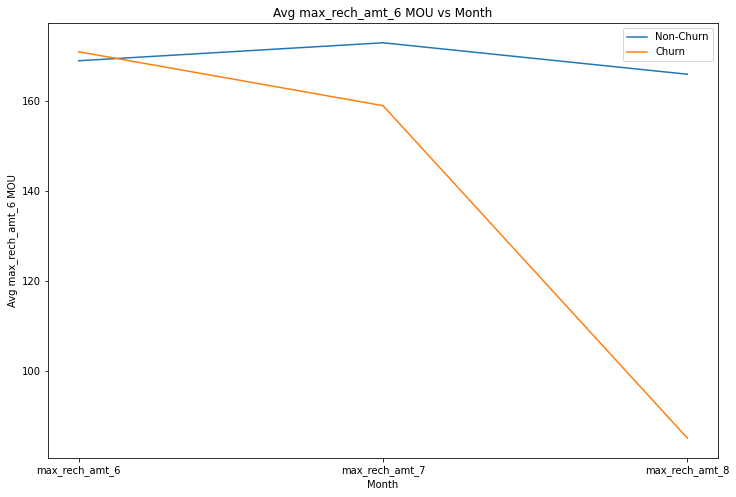

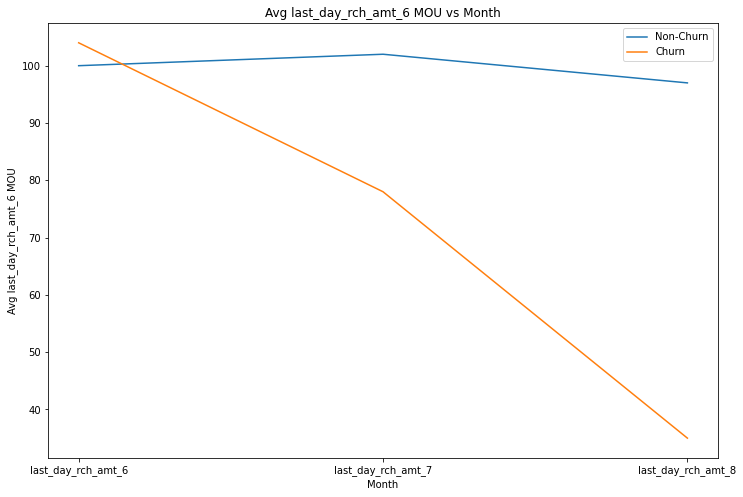

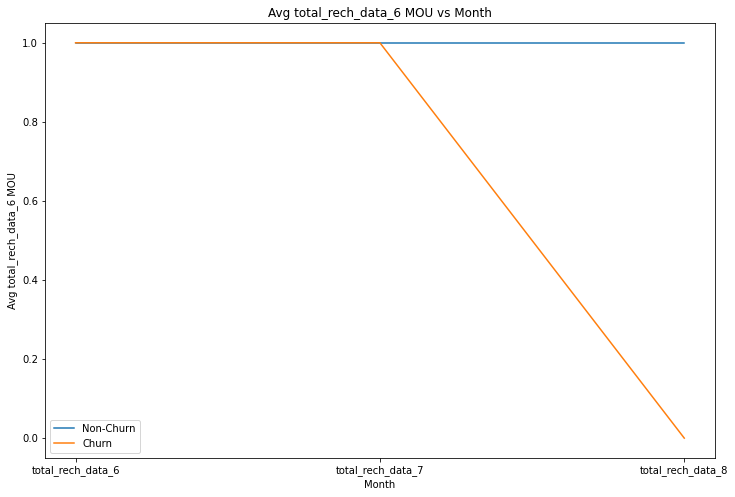

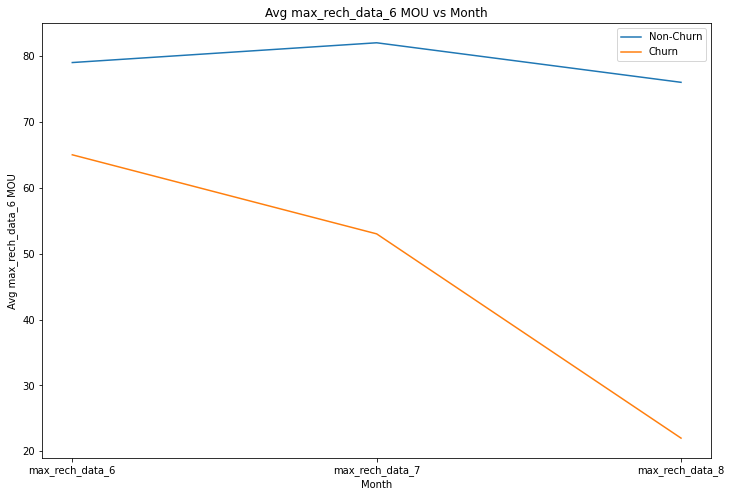

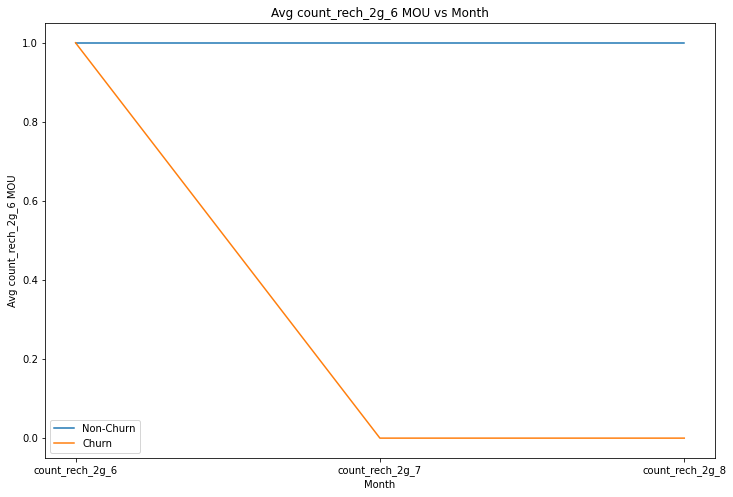

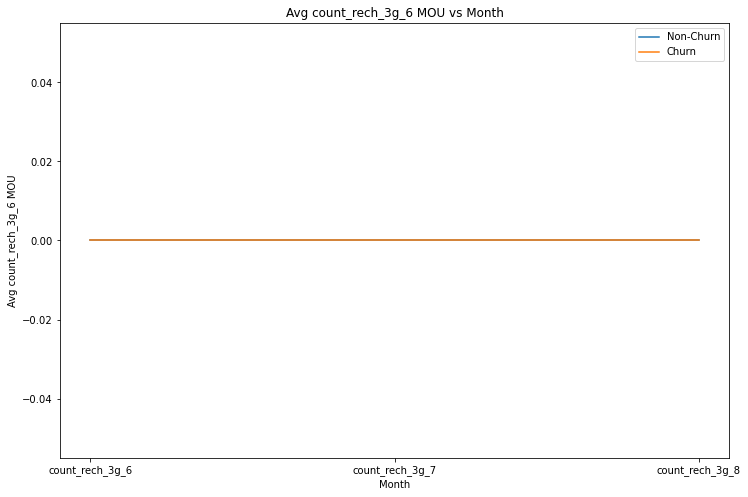

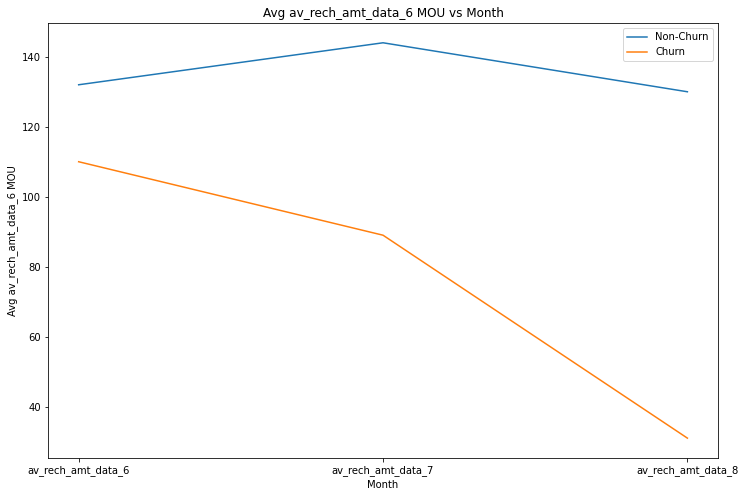

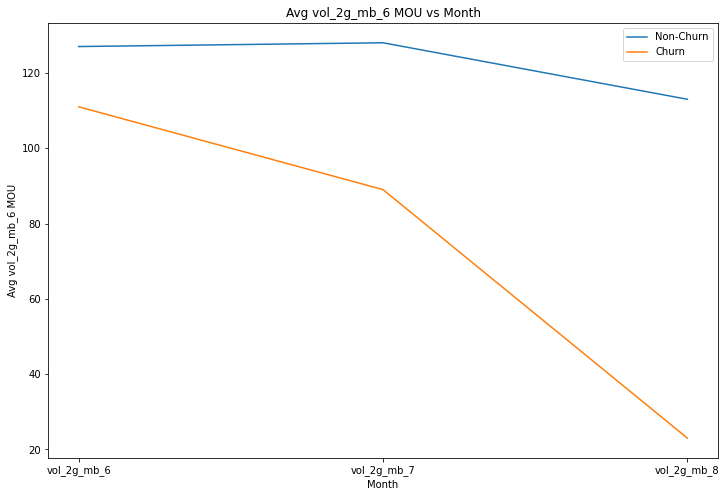

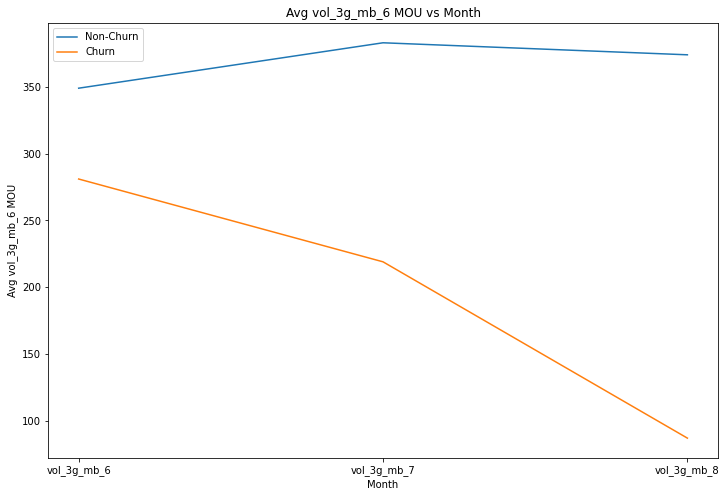

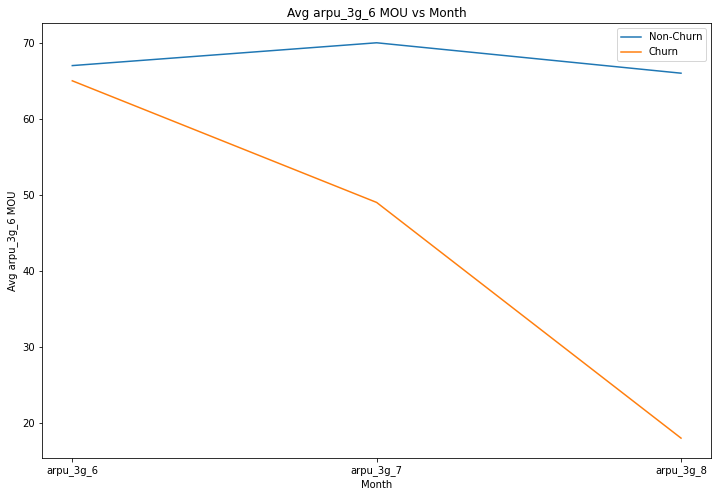

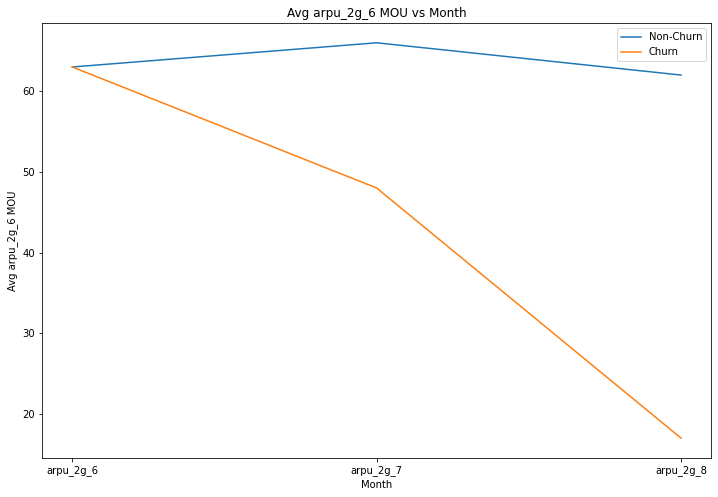

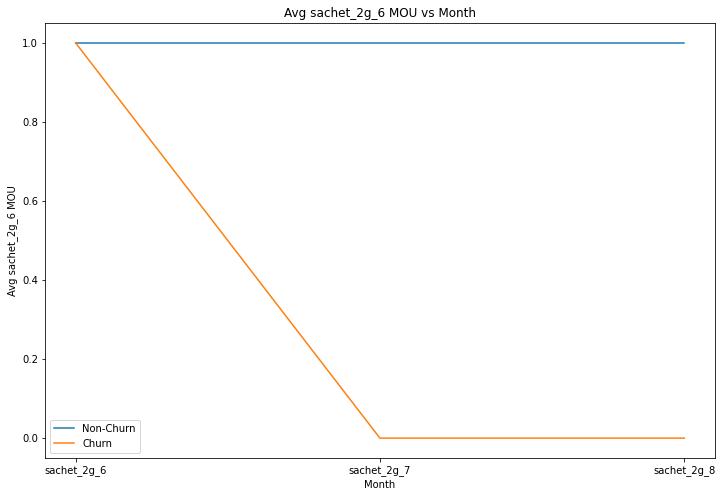

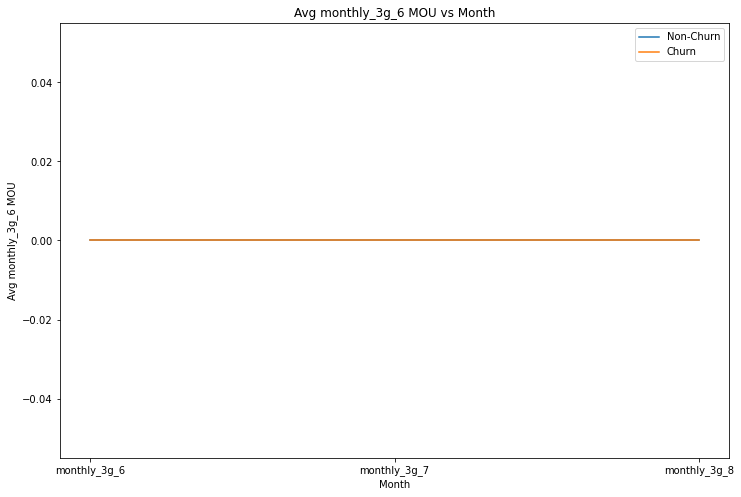

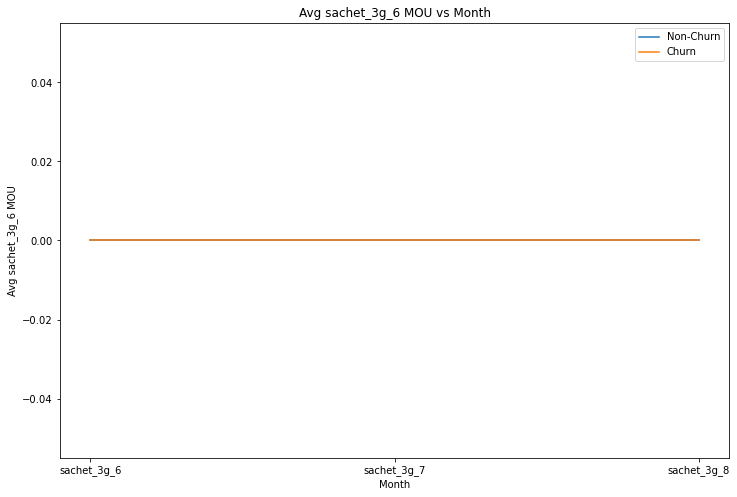

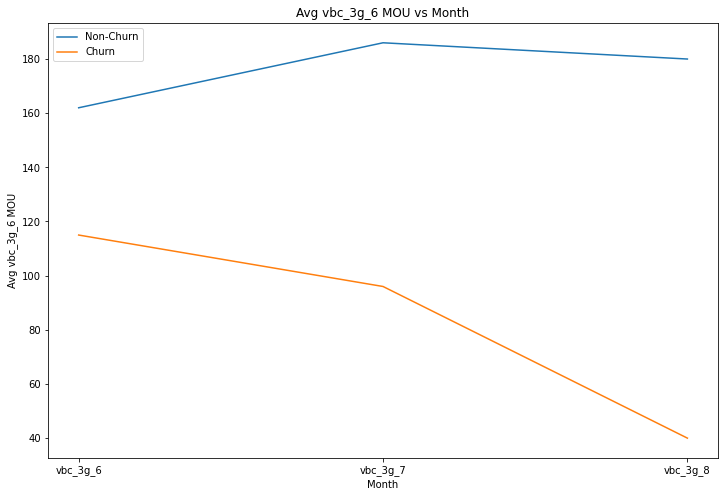

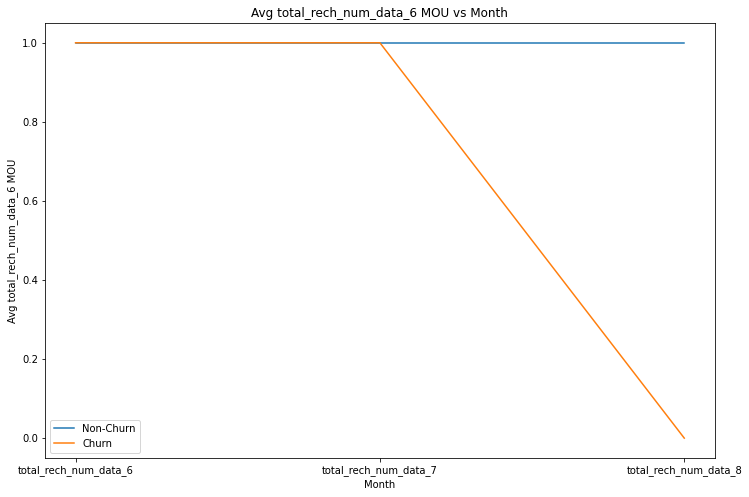

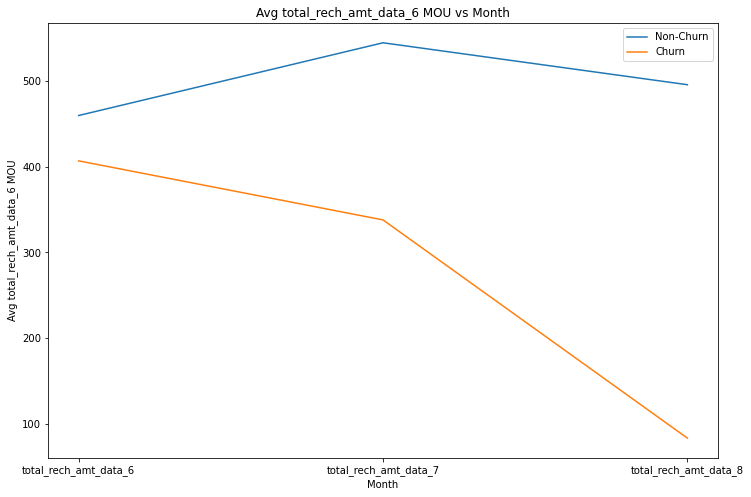

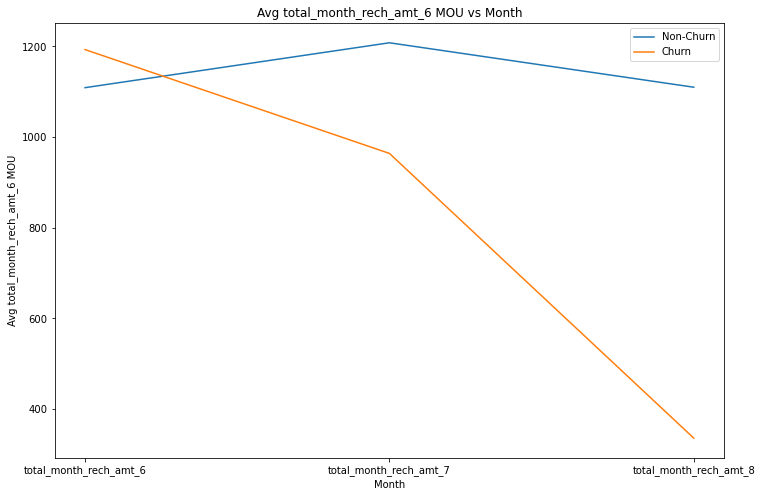

In [47]:
for column_name in numcols6:
    x=6
    plt.figure(figsize=(12,8))
    i="_".join(column_name.split("_")[:-1])
    cols=[i+"_"+str(val+x) for val in range(3) ]
    df1 = churn_hvc_data.groupby(['churnID'])[cols].mean().astype(int).T
    plt.plot(df1)
    plt.xlabel("Month")
    plt.ylabel("Avg "+column_name+" MOU")
    plt.legend(['Non-Churn', 'Churn'])
    plt.title("Avg "+column_name+" MOU vs Month")
    plt.show()

From above, clearly infer for churncustomer, total service usage in terms calls, data, recharge and revenue per user is declining from month 6 to 8. Where as active customer found to have stable rate of service usage.

In [48]:
# Numerical ordinal columns
numdf=churn_hvc_data[cols6].nunique().to_frame("count").query("count<10")
numcol=numdf.index
print(len(numcol))

3


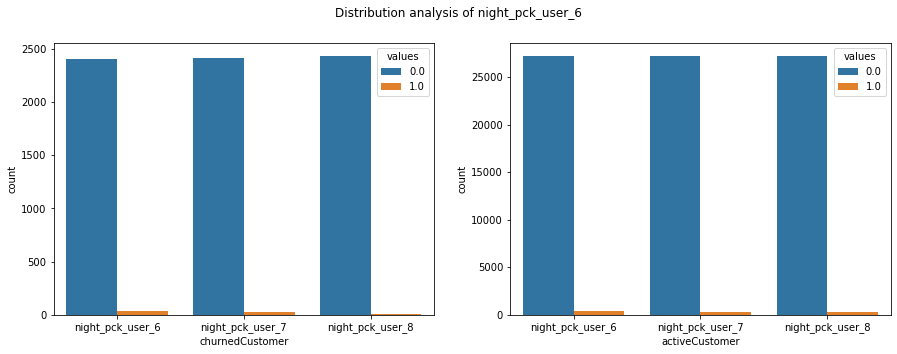

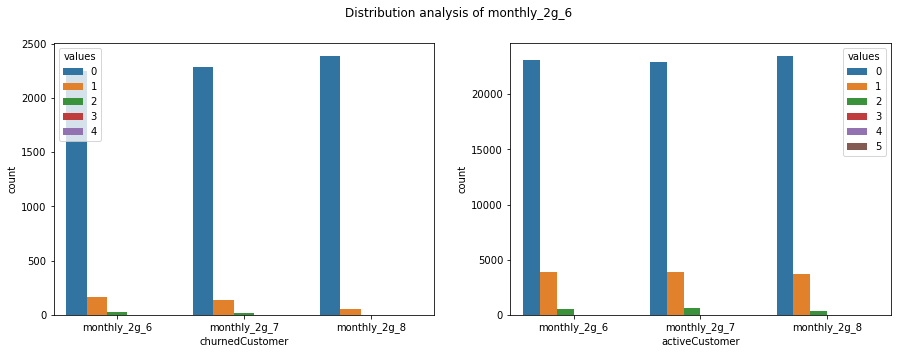

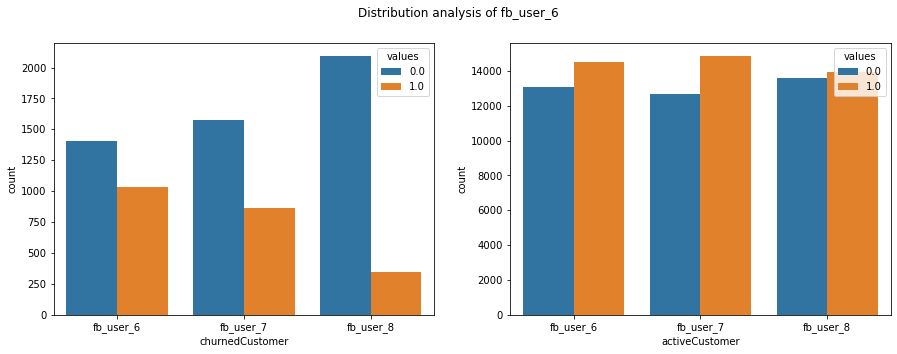

In [49]:

for column_name in numcol:
    x=6
    
    i="_".join(column_name.split("_")[:-1])
    cols=[i+"_"+str(val+x) for val in range(3) ]
    
    fig, ax = plt.subplots (1, 2, figsize=(15, 5))
    df1 = churn_hvc_data.loc[churn_hvc_data["churnID"]==1,cols]
    df1=pd.melt(df1)
    df1.columns=["churnedCustomer","values"]
    sns.countplot(x="churnedCustomer", hue="values", data=df1,ax=ax[0])
    df2 = churn_hvc_data.loc[churn_hvc_data["churnID"]==0,cols]
    df2=pd.melt(df2)
    df2.columns=["activeCustomer","values"]
    sns.countplot(x="activeCustomer", hue="values", data=df2,ax=ax[1])
    fig.suptitle("Distribution analysis of "+column_name)
    plt.show()

Average service pack usage for active customer is higher than for customer to be churned.

In [50]:
#Dropping all Non phase columns
allcolsnonphase=[x for x in churn_hvc_data.columns if ( "6" in x or "7" in x)]
print(len(allcolsnonphase))
churn_hvc_data.drop(allcolsnonphase,axis=1,inplace = True)
print("Shape of DataFrame: {}".format(churn_hvc_data.shape))

106
Shape of DataFrame: (30001, 162)


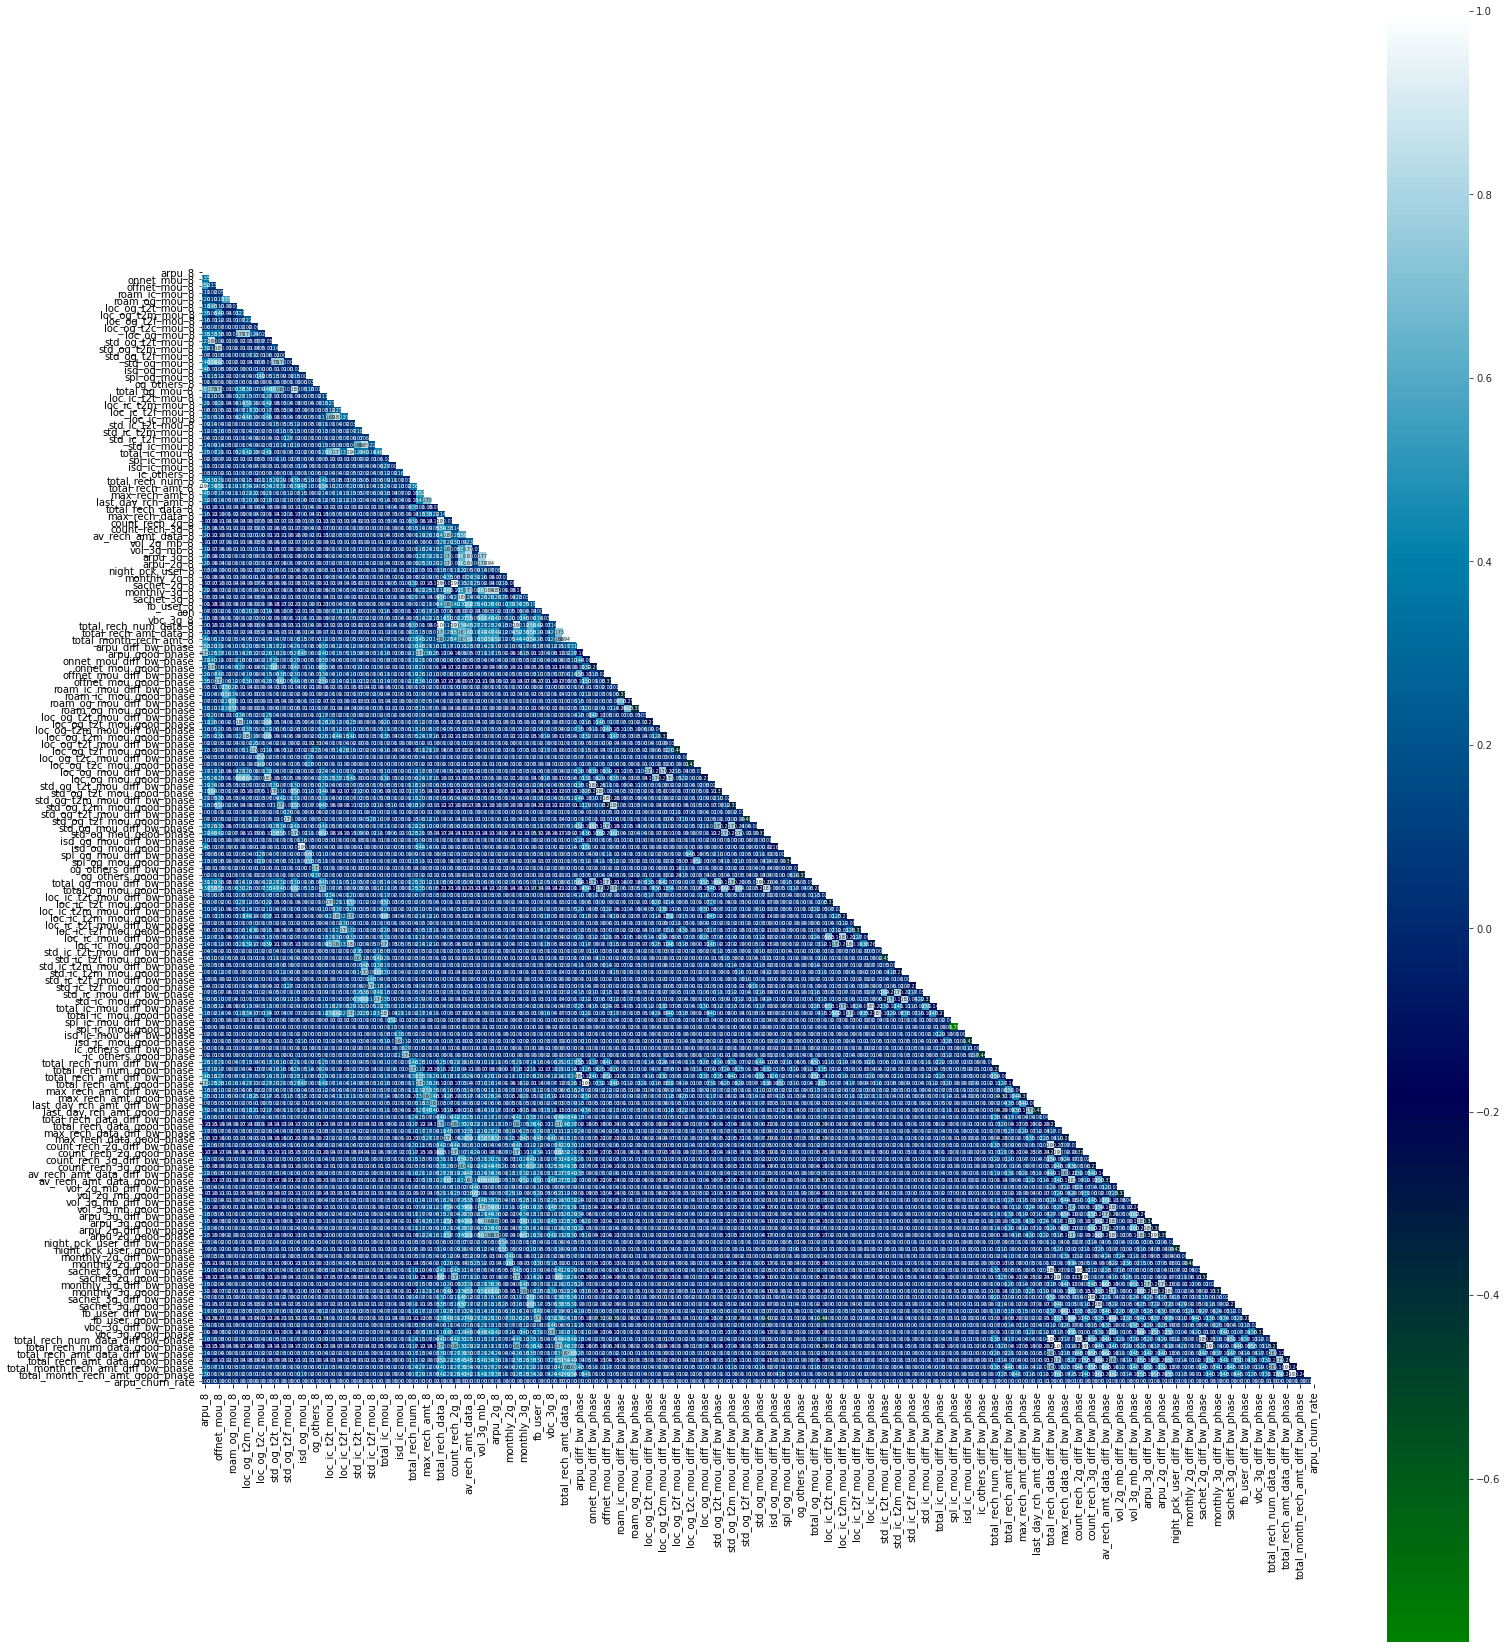

In [51]:
#Correlation matrix of columns
masklower = np.zeros_like(churn_hvc_data.corr()) #Masking values to get lower triangle
masklower[np.triu_indices_from(masklower)] = True
f, axes = plt.subplots(figsize =(25,30))
with sns.axes_style("white"):
    axes = sns.heatmap(churn_hvc_data.corr(),mask= masklower,annot=True, square =True ,vmax =1.0,annot_kws = {'size':5}, fmt=".2f", cmap ="ocean")
plt.show()

In [52]:
t1=churn_hvc_data.corr()
t1cor = t1.where(np.triu(np.ones(t1.shape), k=1).astype(np.bool))
t1cor = t1cor.unstack().reset_index()

t1cor.columns = ['Columnname1', 'Columnname2', 'CorrelationValue']
t1cor.dropna(subset = ['CorrelationValue'], inplace = True)
t1cor = t1cor.sort_values('CorrelationValue', ascending = False).reset_index(drop = True)
t1cor['Correlationabs'] = abs(t1cor['CorrelationValue'])
t1cor = t1cor.sort_values('Correlationabs', ascending = False)
##### Top 10 Correlation columns frame


In [53]:
t1cor[:80]

Columnname1                        Columnname2  \
0          total_rech_num_data_good_phase         total_rech_data_good_phase   
2       total_rech_num_data_diff_bw_phase      total_rech_data_diff_bw_phase   
1                   total_rech_num_data_8                  total_rech_data_8   
3                             sachet_2g_8                    count_rech_2g_8   
4                    sachet_2g_good_phase           count_rech_2g_good_phase   
5                 sachet_2g_diff_bw_phase        count_rech_2g_diff_bw_phase   
6               total_rech_amt_good_phase                    arpu_good_phase   
7      total_month_rech_amt_diff_bw_phase  total_rech_amt_data_diff_bw_phase   
8                        total_rech_amt_8                             arpu_8   
9                      arpu_2g_good_phase                 arpu_3g_good_phase   
10                  isd_og_mou_good_phase                       isd_og_mou_8   
11                 total_month_rech_amt_8              total_rech_amt_data_8   
12                              arpu_2g_8                          arpu_3g_8   
13        total_month_rech_amt_good_phase     total_rech_amt_data_good_phase   
14               count_rech_2g_good_phase         total_rech_data_good_phase   
15         total_rech_num_data_good_phase           count_rech_2g_good_phase   
16                  total_rech_num_data_8                    count_rech_2g_8   
17                        count_rech_2g_8                  total_rech_data_8   
19         total_rech_num_data_good_phase               sachet_2g_good_phase   
18                   sachet_2g_good_phase         total_rech_data_good_phase   
20             total_og_mou_diff_bw_phase           std_og_mou_diff_bw_phase   
21                  total_rech_num_data_8                        sachet_2g_8   
22                            sachet_2g_8                  total_rech_data_8   
23                         total_ic_mou_8                       loc_ic_mou_8   
24      total_rech_num_data_diff_bw_phase        count_rech_2g_diff_bw_phase   
25            count_rech_2g_diff_bw_phase      total_rech_data_diff_bw_phase   
26                total_ic_mou_good_phase              loc_ic_mou_good_phase   
27           std_og_t2m_mou_diff_bw_phase           offnet_mou_diff_bw_phase   
28      total_rech_num_data_diff_bw_phase            sachet_2g_diff_bw_phase   
29                sachet_2g_diff_bw_phase      total_rech_data_diff_bw_phase   
30           std_og_t2t_mou_diff_bw_phase            onnet_mou_diff_bw_phase   
31                sachet_3g_diff_bw_phase        count_rech_3g_diff_bw_phase   
32                            sachet_3g_8                    count_rech_3g_8   
33                  arpu_2g_diff_bw_phase              arpu_3g_diff_bw_phase   
34                       std_og_t2t_mou_8                        onnet_mou_8   
35                   sachet_3g_good_phase           count_rech_3g_good_phase   
36                  monthly_3g_good_phase                 arpu_2g_good_phase   
37              std_og_t2t_mou_good_phase               onnet_mou_good_phase   
38             total_ic_mou_diff_bw_phase           loc_ic_mou_diff_bw_phase   
39                           monthly_3g_8                          arpu_2g_8   
40                     arpu_2g_good_phase        av_rech_amt_data_good_phase   
41                         total_og_mou_8                       std_og_mou_8   
42                       std_og_t2m_mou_8                       offnet_mou_8   
43                  monthly_3g_good_phase                 arpu_3g_good_phase   
44                           loc_ic_mou_8                   loc_ic_t2m_mou_8   
45                           std_ic_mou_8                   std_ic_t2m_mou_8   
46                  loc_ic_mou_good_phase          loc_ic_t2m_mou_good_phase   
47              std_og_t2m_mou_good_phase              offnet_mou_good_phase   
48                           monthly_3g_8                          arpu_3g_8   
49           total_rech_amt_di

As we could there are numerous columns with high correlation, it is important to choose good feature set to yiel high performant and interpretable model

### <p> <span style="color : darkred"> <i> Subtask 2.1 Train and Test Data Split </i></span></p>


In [54]:
# Splitting the data into train and test:
churn_hvc_data.reset_index(inplace=True,drop=True)
X = churn_hvc_data.drop(['churnID'], axis=1)
y = churn_hvc_data['churnID']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
print("X train shape", X_train.shape)
print("Y train shape", y_train.shape)
print("X test shape", X_test.shape)
print("Y test shape", y_test.shape)

X train shape (21000, 161)
Y train shape (21000,)
X test shape (9001, 161)
Y test shape (9001,)


### <p> <span style="color : darkred"> <i> Subtask 2.1 Feature Scaling </i></span></p>


In [55]:
scaler = MinMaxScaler()
X_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
11785  592.623         4.84         98.06          31.11           9.86   
11987  364.126        40.71        265.41           0.00           0.00   
11648  313.407        83.28        213.34          68.41          76.69   
12890  705.440       697.44        555.04          22.81          23.56   
3762   264.205        23.89         81.66           0.00           0.00   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
11785              4.84             19.81              0.00              1.10   
11987             40.71            211.56             34.54              0.00   
11648             26.54            127.33              0.00              0.00   
12890            633.89            358.19             18.96              2.38   
3762              12.01             78.08              3.58              0.00   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
11785         24.66              0.00             13.26              0.00   
11987        286.83              0.00             19.29              0.00   
11648        153.88             27.16             38.88              0.00   
12890       1011.06             34.83            139.61             28.69   
3762          93.68             11.88              0.00              0.00   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
11785         13.26         54.01          1.10          0.0           93.04   
11987         19.29          0.00          0.00          0.0          306.13   
11648         66.04          0.00          0.00          0.0          219.93   
12890        203.14          0.00         14.71          0.0         1228.93   
3762          11.88          0.00          1.50          0.0          107.06   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
11785             46.11            105.54              2.18        153.84   
11987             36.66            242.16             13.73        292.56   
11648             46.71            148.01              4.74        199.48   
12890           1217.66            216.96             49.49       1484.13   
3762             236.61            189.46             56.99        483.08   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
11785              0.00             57.56              0.00         57.56   
11987              0.00             22.28              0.00         22.28   
11648             32.43             37.18              0.00         69.61   
12890              0.00             14.41              5.08         19.49   
3762               0.00              0.00              0.00          0.00   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
11785          266.61           0.0         55.19         0.00   
11987          320.68           0.0          5.64         0.18   
11648          295.31           0.0         13.33        12.88   
12890         1503.63           0.0          0.00         0.00   
3762           496.44           0.0          0.00        13.36   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
11785                 3               658             229                 200   
11987                 5               488             130                 130   
11648                10               360             130                  30   
12890                10               650             130                 130   
3762                  6               304             154                  30   

       total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  \
11785                0.0              0.0              0.0              0.0   
11987                1.0             98.0              1.0              0.0   
11648                0.0              0.0              0.0              0.0   


In [56]:
X_test.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
6102   281.034         7.99         22.36           0.00           0.00   
2539    78.834         9.46          3.56           3.38           5.06   
21576  625.488       232.86        870.48           0.00           0.00   
19574  458.996       115.64        222.64           0.00           0.00   
12804   95.049        47.41          5.26          34.34          39.83   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
6102               7.99             13.99              1.69              0.00   
2539               2.89              0.08              0.00              2.73   
21576            159.09            648.71              2.59             10.04   
19574            114.66            160.01              0.00              0.00   
12804              0.00              2.56              0.00              0.00   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
6102          23.69              0.00              5.74              0.91   
2539           2.98              2.25              0.00              0.00   
21576        810.41             73.76            200.29              9.41   
19574        274.68              0.98             62.63              0.00   
12804          2.56             10.28              0.00              0.00   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
6102           6.66           0.0          3.09          0.0           33.46   
2539           2.25           0.0          2.73          0.0            7.96   
21576        283.48           0.0         10.99          0.0         1104.89   
19574         63.61           0.0          0.00          0.0          338.29   
12804         10.28           0.0          0.00          0.0           12.85   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
6102               2.64             21.04             22.96         46.66   
2539               5.78              2.18              0.00          7.96   
21576             31.31            366.34             14.19        411.86   
19574             23.79            156.96              2.03        182.79   
12804              0.28             21.46              0.00         21.74   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
6102               0.00              3.64              0.00          3.64   
2539              16.11              0.00              0.00         16.11   
21576              9.83             27.43             10.34         47.61   
19574              1.45              3.71              0.56          5.73   
12804              0.00              0.00              0.00          0.00   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
6102            50.31           0.0          0.00         0.00   
2539            24.08           0.0          0.00         0.00   
21576          459.81           0.0          0.23         0.09   
19574          188.53           0.0          0.00         0.00   
12804           32.05           0.0         10.29         0.00   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
6102                  4               302             144                 144   
2539                  7                80              30                   0   
21576                 8               763             169                 130   
19574                23               510              50                  30   
12804                 2               110             110                   0   

       total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  \
6102                 0.0              0.0              0.0              0.0   
2539                 3.0             25.0              2.0              1.0   
21576                0.0              0.0              0.0              0.0   


In [57]:
# Fitting and transforming the scaler on train and test datasets
cols=X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [58]:
X_train

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
11785  0.027671     0.000450      0.007001       0.010734       0.001847   
11987  0.020929     0.003786      0.018948       0.000000       0.000000   
11648  0.019432     0.007745      0.015231       0.023603       0.014369   
12890  0.031001     0.064863      0.039625       0.007870       0.004414   
3762   0.017980     0.002222      0.005830       0.000000       0.000000   
...         ...          ...           ...            ...            ...   
12119  0.016668     0.006745      0.001689       0.000000       0.000000   
24423  0.031005     0.097190      0.039937       0.000000       0.000000   
14147  0.010580     0.000068      0.000770       0.000000       0.000000   
23320  0.017677     0.004276      0.012066       0.000000       0.000000   
5640   0.042070     0.024142      0.115824       0.000000       0.000000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
11785          0.000450          0.003993          0.000000          0.003127   
11987          0.003786          0.042642          0.058713          0.000000   
11648          0.002468          0.025664          0.000000          0.000000   
12890          0.058952          0.072196          0.032229          0.006765   
3762           0.001117          0.015738          0.006085          0.000000   
...                 ...               ...               ...               ...   
12119          0.002956          0.003721          0.000000          0.001705   
24423          0.015228          0.024112          0.096262          0.000000   
14147          0.000068          0.002064          0.000901          0.000000   
23320          0.004276          0.034065          0.000000          0.000000   
5640           0.020708          0.053764          0.000000          0.000000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
11785      0.002234          0.000000          0.000951          0.000000   
11987      0.025981          0.000000          0.001383          0.000000   
11648      0.013939          0.003389          0.002787          0.000000   
12890      0.091582          0.004346          0.010008          0.055503   
3762       0.008486          0.001482          0.000000          0.000000   
...             ...               ...               ...               ...   
12119      0.004551          0.005083          0.000373          0.000000   
24423      0.030798          0.109963          0.027465          0.000000   
14147      0.001043          0.000000          0.000000          0.000000   
23320      0.019474          0.000000          0.000000          0.000000   
5640       0.044331          0.004608          0.097178          0.000000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
11785      0.000948      0.009506      0.001403          0.0        0.006625   
11987      0.001380      0.000000      0.000000          0.0        0.021799   
11648      0.004724      0.000000      0.000000          0.0        0.015661   
12890      0.014531      0.000000      0.018768          0.0        0.087512   
3762       0.000850      0.000000      0.001914          0.0        0.007624   
...             ...           ...           ...          ...             ...   
12119      0.003286      0.000000      0.000766          0.0        0.006892   
24423      0.090446      0.000000      0.000000          0.0        0.114253   
14147      0.000000      0.000000      0.000000          0.0        0.000820   
23320      0.000000      0.000000      0.007834          0.0        0.015747   
5640       0.099612      0.000000      0.000000          0.0        0.134016   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
11785          0.011518          0.022729          0.001372      0.028548   
11987          0.009158          0.052150          0.008643      0.054291   
11648 

### <p> <span style="color : darkred"> <i> Subtask 2.1.1 Handling Class Imbalance </i></span></p>


OverSampling and undersampling are great methods to deal imbalance dataset either to duplicate minority  or delete the majority. Combined used of methods are more sophisticated but let us go with over sampling as of now.`

In [59]:
# Perform oversampling with traing data and pass both X_train and y_train to SMOTE

print("Before Sampling y churned: {}".format(sum(y_train==1)))
print("Before Sampling y active: {}".format(sum(y_train==0)))
print("Ratio y-active/y-churned: {}".format(round(sum(y_train==1)/len(y_train)*100,2)))
smote = SMOTE(random_state=48)
X_train_balance,y_train_balance = smote.fit_resample(X_train,y_train)
print("X train balanced shape", X_train_balance.shape)
print("Y train balanced shape", y_train_balance.shape)
print("After Sampling y churned: {}".format(sum(y_train_balance==1)))
print("After Sampling y active: {}".format(sum(y_train_balance==0)))
print("Ratio y-active/y-churned: {}".format(round(sum(y_train_balance==1)/len(y_train_balance)*100,2)))

Before Sampling y churned: 1691
Before Sampling y active: 19309
Ratio y-active/y-churned: 8.05
X train balanced shape (38618, 161)
Y train balanced shape (38618,)
After Sampling y churned: 19309
After Sampling y active: 19309
Ratio y-active/y-churned: 50.0


In [60]:
X_train_balance.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  0.027671     0.000450      0.007001       0.010734       0.001847   
1  0.020929     0.003786      0.018948       0.000000       0.000000   
2  0.019432     0.007745      0.015231       0.023603       0.014369   
3  0.031001     0.064863      0.039625       0.007870       0.004414   
4  0.017980     0.002222      0.005830       0.000000       0.000000   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0          0.000450          0.003993          0.000000          0.003127   
1          0.003786          0.042642          0.058713          0.000000   
2          0.002468          0.025664          0.000000          0.000000   
3          0.058952          0.072196          0.032229          0.006765   
4          0.001117          0.015738          0.006085          0.000000   

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0      0.002234          0.000000          0.000951          0.000000   
1      0.025981          0.000000          0.001383          0.000000   
2      0.013939          0.003389          0.002787          0.000000   
3      0.091582          0.004346          0.010008          0.055503   
4      0.008486          0.001482          0.000000          0.000000   

   std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0      0.000948      0.009506      0.001403          0.0        0.006625   
1      0.001380      0.000000      0.000000          0.0        0.021799   
2      0.004724      0.000000      0.000000          0.0        0.015661   
3      0.014531      0.000000      0.018768          0.0        0.087512   
4      0.000850      0.000000      0.001914          0.0        0.007624   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0          0.011518          0.022729          0.001372      0.028548   
1          0.009158          0.052150          0.008643      0.054291   
2          0.011668          0.031875          0.002984      0.037018   
3          0.304171          0.046723          0.031155      0.275413   
4          0.059105          0.040801          0.035876      0.089646   

   std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0          0.000000          0.010195          0.000000      0.009662   
1          0.000000          0.003946          0.000000      0.003740   
2          0.007526          0.006585          0.000000      0.011685   
3          0.000000          0.002552          0.003642      0.003272   
4          0.000000          0.000000          0.000000      0.000000   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0        0.043947           0.0      0.016077     0.000000          0.015306   
1        0.052860           0.0      0.001643     0.000149          0.025510   
2        0.048678           0.0      0.003883     0.010646          0.051020   
3        0.247853           0.0      0.000000     0.000000          0.051020   
4        0.081831           0.0      0.000000     0.011043          0.030612   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0          0.014519        0.051472            0.044954           0.000000   
1          0.010768        0.029220            0.029220           0.016667   
2          0.007944        0.029220            0.006743           0.000000   
3          0.014342        0.029220            0.029220           0.000000   
4          0.006708        0.034615            0.006743           0.016667   

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0         0.000000         0.000000              0.0            0.000000   
1         0.063023         0.022727              0.0            0.024132   
2         0.000000         0.000000              0.0            0.000000   
3         0.000000         0.000000              0.0            0.000000   
4    

### <p> <span style="color : darkred"> <i> Subtask 2.3 Model Building </i></span></p>


In [61]:
model_dataframe=pd.DataFrame(columns=["Model_Name","Train_Accuracy","Train_AUC_ROC","Test_Accuracy","Test_AUC_ROC"])


## Interpretable Models
### Model 1: Logistic Regression On RFE

In [62]:
def lr_model():
    logreg = LogisticRegression(class_weight='balanced')
    return logreg
    
def RFE_frame(model,variable_count,X,y):
    rfe = RFE(model, n_features_to_select=variable_count)  # running RFE with  variable_count as number of variables to be at output
    rfe = rfe.fit(X, y)
    rfe_frame= pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)))
    rfe_frame.columns = ['Column_Names','Status','Rank']
    print(rfe_frame.loc[rfe_frame.Status==True].sort_values("Rank").reset_index(drop=True))
    return rfe

def lr_stats_md(rfe,y,X):
    logm1 = sm.GLM(y,X, family = sm.families.Binomial()).fit()
    return logm1

def vif_calculation(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    
    return vif


In [63]:
logreg= lr_model()
logreg.fit(X_train_balance, y_train_balance)
rfe= RFE_frame(logreg,30,X_train_balance,y_train_balance)
col = X_train_balance.columns[rfe.support_].to_list()
X_new = sm.add_constant(X_train_balance[col])
logsm1=lr_stats_md(rfe, y_train_balance,X_new)
logsm1.summary()


                     Column_Names  Status  Rank
0                   roam_og_mou_8    True     1
1    total_rech_num_diff_bw_phase    True     1
2      total_ic_mou_diff_bw_phase    True     1
3        loc_ic_mou_diff_bw_phase    True     1
4    loc_ic_t2m_mou_diff_bw_phase    True     1
5      total_og_mou_diff_bw_phase    True     1
6        loc_og_mou_diff_bw_phase    True     1
7       loc_og_t2m_mou_good_phase    True     1
8          roam_ic_mou_good_phase    True     1
9        offnet_mou_diff_bw_phase    True     1
10             arpu_diff_bw_phase    True     1
11          total_rech_num_data_8    True     1
12                       vbc_3g_8    True     1
13                   monthly_2g_8    True     1
14                    vol_2g_mb_8    True     1
15                count_rech_2g_8    True     1
16              total_rech_data_8    True     1
17             last_day_rch_amt_8    True     1
18               total_rech_num_8    True     1
19                   spl_ic_mou_8    Tru

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churnID   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38588
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15121.
Date:                Tue, 08 Mar 2022   Deviance:                       30241.
Time:                        16:03:21   Pearson chi2:                 1.05e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            23.1036      0.989     23.359      0.000      21.165      25.042
roam_og_mou_8                     6.3034      0.803      7.848      0.000       4.729       7.878
loc_og_t2m_mou_8                 -2.2136      2.092     -1.058      0.290      -6.314       1.887
loc_og_mou_8                    -10.6525      2.025     -5.259      0.000     -14.622      -6.683
total_og_mou_8                   -2.2108      0.528     -4.189      0.000      -3.245      -1.177
loc_ic_t2t_mou_8               2.836e+05   1.08e+04     26.221      0.000    2.62e+05    3.05e+05
loc_ic_t2m_mou_8               3.289e+05   1.25e+04     26.222      0.000    3.04e+05    3.54e+05
loc_ic_t2f_mou_8               1.125e+05   4291.744     26.220      0.000    1.04e+05    1.21e+05
loc_ic_mou_8                  -3.817e+05   1.46e+04    -26.222      0.000    -4.1e+05   -3.53e+05
total_ic_mou_8                   -8.8746      1.188     -7.467      0.000     -11.204      -6.545
spl_ic_mou_8                    -19.6236      1.493    -13.142      0.000     -22.550     -16.697
total_rech_num_8                 -4.7725      0.538     -8.876      0.000      -5.826      -3.719
last_day_rch_amt_8              -11.2333      0.684    -16.427      0.000     -12.574      -9.893
total_rech_data_8                -4.6493      0.662     -7.022      0.000      -5.947      -3.352
count_rech_2g_8                  -2.3441      1.096     -2.139      0.032      -4.492      -0.197
vol_2g_mb_8                     -15.1661      1.286    -11.794      0.000     -17.687     -12.646
monthly_2g_8                     -3.7444      0.327    -11.464      0.000      -4.385      -3.104
vbc_3g_8                        -11.0129      0.924    -11.919      0.000     -12.824      -9.202
total_rech_num_data_8            -4.6493      0.662     -7.022      0.000      -5.947      -3.352
arpu_diff_bw_phase               -6.0923      1.851     -3.291      0.001      -9.721      -2.464
offnet_mou_diff_bw_phase         -7.0209      1.491     -4.709      0.000      -9.943      -4.099
roam_ic_mou_good_phase            6.0334      0.762      7.914      0.000       4.539       7.528
loc_og_t2m_mou_good_phase        -5.0922      1.093     -4.658      0.000      -7.235      -2.949
loc_og_mou_diff_bw_phase         -6.2230      1.591     -3.911      0.000      -9.341      -3.105
total_og_mou_diff_bw_phase       -4.6488      1.172     -3.966      0.000      -6.946      -2.351
loc_ic_t2m_mou_diff_bw_phase     -5.2848      2.057     -2.570      0.010      -9.316      -1.254
loc_ic_mou_diff_bw_phase         -3.7831      2.567     -1.474      0.140      -8.814       1.247
total_ic_mou_diff_bw_phase       -8.3246      1.611     -5.169      0.000     -11.481      -5.168
total_rech_num_diff_bw_phase     -1.5797     

In [64]:
vif_model=vif_calculation(X_new)
vif_model.sort_values(by=["VIF"],ascending=False).query("VIF>2")


Features           VIF
13             total_rech_data_8           inf
18         total_rech_num_data_8           inf
8                   loc_ic_mou_8  2.065691e+09
6               loc_ic_t2m_mou_8  9.994087e+08
5               loc_ic_t2t_mou_8  4.879727e+08
7               loc_ic_t2f_mou_8  3.500533e+07
0                          const  2.449990e+03
26      loc_ic_mou_diff_bw_phase  8.390000e+00
2               loc_og_t2m_mou_8  7.230000e+00
22     loc_og_t2m_mou_good_phase  7.200000e+00
9                 total_ic_mou_8  6.750000e+00
14               count_rech_2g_8  6.500000e+00
19            arpu_diff_bw_phase  6.000000e+00
27    total_ic_mou_diff_bw_phase  5.490000e+00
29  total_rech_amt_diff_bw_phase  5.470000e+00
25  loc_ic_t2m_mou_diff_bw_phase  4.600000e+00
24    total_og_mou_diff_bw_phase  4.290000e+00
3                   loc_og_mou_8  3.830000e+00
23      loc_og_mou_diff_bw_phase  3.690000e+00
20      offnet_mou_diff_bw_phase  2.870000e+00
4                 total_og_mou_8  2.190000e+00
28  total_rech_num_diff_bw_phase  2.160000e+00
11              total_rech_num_8  2.020000e+00

In [65]:
# validated manually,  droppping some of  following  multicolinearity  features
dropcols=["total_rech_num_data_8","total_rech_num_data_diff_bw_phase","total_rech_num_data_good_phase",
"total_rech_data_8","total_rech_data_diff_bw_phase","total_rech_data_good_phase",
"count_rech_3g_8","count_rech_3g_diff_bw_phase","count_rech_3g_good_phase",
"count_rech_2g_8","count_rech_2g_diff_bw_phase","count_rech_2g_good_phase",
"total_month_rech_amt_diff_bw_phase","total_month_rech_amt_good_phase","total_month_rech_amt_8",
"loc_ic_mou_8","loc_ic_mou_diff_bw_phase","loc_ic_mou_good_phase",
"loc_og_mou_8","loc_og_mou_diff_bw_phase","loc_og_mou_good_phase",
"std_ic_mou_8","std_ic_mou_diff_bw_phase","std_ic_mou_good_phase",
"std_og_mou_8","std_og_mou_diff_bw_phase","std_og_mou_good_phase",
"total_ic_mou_8","total_ic_mou_diff_bw_phase","total_ic_mou_good_phase",
"total_og_mou_8","total_og_mou_diff_bw_phase","total_og_mou_good_phase",
"arpu_8","arpu_diff_bw_phase","arpu_good_phase",
"av_rech_amt_data_8","av_rech_amt_data_good_phase","av_rech_amt_data_diff_bw_phase"]

X_train_sm=X_train_balance.copy()       
X_train_sm.drop(dropcols,axis=1,inplace = True)
print("Shape of DataFrame: {}".format(X_train_sm.shape))

Shape of DataFrame: (38618, 122)


In [66]:
# Retraining model on New feature set
logreg= lr_model()
logreg.fit(X_train_sm, y_train_balance)
rfe= RFE_frame(logreg,30,X_train_sm,y_train_balance)
col = X_train_sm.columns[rfe.support_].to_list()
X_new = sm.add_constant(X_train_sm[col])
logsm1=lr_stats_md(rfe, y_train_balance,X_new)
logsm1.summary()


                    Column_Names  Status  Rank
0                   offnet_mou_8    True     1
1   total_rech_num_diff_bw_phase    True     1
2   std_ic_t2t_mou_diff_bw_phase    True     1
3   loc_ic_t2m_mou_diff_bw_phase    True     1
4   loc_ic_t2t_mou_diff_bw_phase    True     1
5   std_og_t2m_mou_diff_bw_phase    True     1
6      loc_og_t2m_mou_good_phase    True     1
7   loc_og_t2m_mou_diff_bw_phase    True     1
8         roam_ic_mou_good_phase    True     1
9       offnet_mou_diff_bw_phase    True     1
10       onnet_mou_diff_bw_phase    True     1
11                      vbc_3g_8    True     1
12                   sachet_2g_8    True     1
13                  monthly_2g_8    True     1
14                   vol_2g_mb_8    True     1
15               max_rech_data_8    True     1
16            last_day_rch_amt_8    True     1
17              total_rech_num_8    True     1
18                  spl_ic_mou_8    True     1
19              std_ic_t2m_mou_8    True     1
20           

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churnID   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38588
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15431.
Date:                Tue, 08 Mar 2022   Deviance:                       30862.
Time:                        16:04:14   Pearson chi2:                 9.63e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           31.3629      1.366     22.965      0.000      28.686      34.040
offnet_mou_8                    -5.7197      0.792     -7.222      0.000      -7.272      -4.168
roam_og_mou_8                    9.0890      0.854     10.638      0.000       7.414      10.763
loc_og_t2t_mou_8               -10.7601      1.839     -5.851      0.000     -14.364      -7.156
loc_og_t2m_mou_8               -12.9056      1.081    -11.939      0.000     -15.024     -10.787
std_og_t2f_mou_8                -8.2321      1.790     -4.599      0.000     -11.740      -4.724
loc_ic_t2t_mou_8               -20.1407      1.710    -11.776      0.000     -23.493     -16.788
loc_ic_t2m_mou_8               -18.8297      1.202    -15.660      0.000     -21.186     -16.473
loc_ic_t2f_mou_8               -17.2628      1.875     -9.209      0.000     -20.937     -13.589
std_ic_t2t_mou_8               -19.8043      2.790     -7.097      0.000     -25.273     -14.335
std_ic_t2m_mou_8               -13.8194      1.973     -7.006      0.000     -17.685      -9.953
spl_ic_mou_8                   -19.8615      1.493    -13.303      0.000     -22.788     -16.935
total_rech_num_8                -6.8638      0.511    -13.433      0.000      -7.865      -5.862
last_day_rch_amt_8             -11.3754      0.701    -16.238      0.000     -12.749     -10.002
max_rech_data_8                 -2.6192      0.298     -8.800      0.000      -3.203      -2.036
vol_2g_mb_8                    -13.2219      1.305    -10.134      0.000     -15.779     -10.665
monthly_2g_8                    -4.3181      0.327    -13.190      0.000      -4.960      -3.676
sachet_2g_8                    -10.7617      0.524    -20.552      0.000     -11.788      -9.735
vbc_3g_8                       -10.4941      0.942    -11.142      0.000     -12.340      -8.648
onnet_mou_diff_bw_phase         -4.0826      0.668     -6.116      0.000      -5.391      -2.774
offnet_mou_diff_bw_phase       -26.9398      5.526     -4.875      0.000     -37.770     -16.110
roam_ic_mou_good_phase           6.1281      0.809      7.573      0.000       4.542       7.714
loc_og_t2m_mou_diff_bw_phase     4.7716      1.070      4.458      0.000       2.674       6.870
loc_og_t2m_mou_good_phase       -1.8134      0.695     -2.608      0.009      -3.176      -0.451
std_og_t2m_mou_diff_bw_phase    15.3370      5.461      2.808      0.005       4.634      26.040
loc_ic_t2t_mou_diff_bw_phase   -11.1341      1.995     -5.580      0.000     -15.045      -7.223
loc_ic_t2m_mou_diff_bw_phase   -14.0510      1.126    -12.480      0.000     -16.258     -11.844
std_ic_t2t_mou_diff_bw_phase   -17.3782      2.153     -8.073      0.000     -21.597     -13.159
total_rech_num_diff_bw_phase    -3.4999      0.693     -5.047      0.000    

In [67]:
vif_model=vif_calculation(X_new)
vif_model.sort_values(by=["VIF"],ascending=False).query("VIF>2")

Features    VIF
23     loc_og_t2m_mou_good_phase    inf
4               loc_og_t2m_mou_8    inf
22  loc_og_t2m_mou_diff_bw_phase    inf
20      offnet_mou_diff_bw_phase  50.40
24  std_og_t2m_mou_diff_bw_phase  38.86
29  total_rech_amt_diff_bw_phase   2.73

In [68]:
dropcols1=["loc_og_t2m_mou_good_phase","loc_og_t2m_mou_diff_bw_phase","offnet_mou_diff_bw_phase"]
X_new.drop(dropcols1,axis=1,inplace = True)
print("Shape of DataFrame: {}".format(X_new.shape))
vif_model=vif_calculation(X_new)
vif_model.sort_values(by=["VIF"],ascending=False).query("VIF>2")

Shape of DataFrame: (38618, 28)


Features      VIF
0                          const  5294.92
26  total_rech_amt_diff_bw_phase     2.42
4               loc_og_t2m_mou_8     2.01

In [69]:
trained_cols=X_new.columns.drop("const")
len(trained_cols)

27

In [70]:
#Dropping Multicollinear columns from Train and test datasets
X_train_regr=X_train_balance.copy()
X_test_regr=X_test.copy()
X_train_regr.drop(dropcols,axis=1,inplace=True)
X_test_regr.drop(dropcols,axis=1,inplace=True)
print("Shape of X_train ba DataFrame: {}".format(X_train_balance.shape))
print("Shape of X_test DataFrame: {}".format(X_test.shape))
print("Shape of X_train_regr DataFrame: {}".format(X_train_regr.shape))
print("Shape of X_test_regr DataFrame: {}".format(X_test_regr.shape))

Shape of X_train ba DataFrame: (38618, 161)
Shape of X_test DataFrame: (9001, 161)
Shape of X_train_regr DataFrame: (38618, 122)
Shape of X_test_regr DataFrame: (9001, 122)


In [71]:
#Retraining models on selected RFE features
logreg= lr_model()
logreg.fit(X_train_regr[trained_cols], y_train_balance)

LogisticRegression(class_weight='balanced')

In [72]:
def predictionframe(model,X,y):
    global y_pred,y_pred_prob,y_final
    y_pred = model.predict(X)
    y_pred_prob = model.predict_proba(X)[:,1]
    y_final= pd.DataFrame({'churnID':y, 'churnID_Pred':y_pred,'churnID_Pred_prob':y_pred_prob})
    y_final['final_predicted'] = y_final.churnID_Pred_prob.map( lambda x: 1 if x > 0.5 else 0)
    return y_final
    
def metrics_score(y,y_pred):
    confusion = metrics.confusion_matrix(y, y_pred)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    acc=accuracy_score(y, y_pred)
    roc=roc_auc_score(y,y_pred)
    prec=precision_score(y, y_pred )
    sen=(TP / float(TP+FN))
    spe=(TN / float(TN+FP))
    print ("Accuracy : {}".format(acc))
    print("Roc_auc_score : {}".format(roc))
    print('Sensitivity/Recall : {}'.format(sen))
    print('Specificity: {}'.format(spe))
    print('sklearn precision score value: {}'.format(prec))
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    metric_list=[acc,roc,prec,sen,spe]
    return metric_list

def model_frame(model_dataframe,name, train_metric_list,test_metric_list):
    
    dic={'Model_Name': name, "Train_Accuracy":round(train_metric_list[0],3),"Test_Accuracy":round(test_metric_list[0],3),
         "Train_AUC_ROC":round(train_metric_list[1],3),"Test_AUC_ROC":round(test_metric_list[1],3),
         "Train_Precision":round(train_metric_list[2],3),"Test_Precision":round(test_metric_list[2],3),
         "Train_Sensitivity":round(train_metric_list[3],3),"Test_Sensitivity":round(test_metric_list[3],3),
         "Train_Specificity":round(train_metric_list[4],3),"Test_Specificity":round(test_metric_list[4],3)
         
        }
    df_dictionary = pd.DataFrame([dic])
    model_dataframe = pd.concat([model_dataframe, df_dictionary], ignore_index=True)
    return model_dataframe

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
def tradeoff(df):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churnID_Pred_prob.map( lambda x: 1 if x > i else 0)
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churnID, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [73]:
y_final_train=predictionframe(logreg,X_train_regr[trained_cols],y_train_balance)
train_metric_list=metrics_score(y_train_balance,y_final_train.churnID_Pred)
print("**"*50)
y_final_test=predictionframe(logreg,X_test_regr[trained_cols],y_test)
test_metric_list=metrics_score(y_test,y_final_test.churnID_Pred)

Accuracy : 0.8283442954062872
Roc_auc_score : 0.8283442954062872
Sensitivity/Recall : 0.8524004350302967
Specificity: 0.8042881557822777
sklearn precision score value: 0.8132720624567645
Positive predictive value: 0.8132720624567645
Negative Predictive value: 0.8449401523394995
****************************************************************************************************
Accuracy : 0.8126874791689812
Roc_auc_score : 0.8190417323152749
Sensitivity/Recall : 0.8266666666666667
Specificity: 0.8114167979638832
sklearn precision score value: 0.2849264705882353
Positive predictive value: 0.2849264705882353
Negative Predictive value: 0.9809523809523809


In [74]:
#storing in Dataframe
print("**"*50)
model_dataframe=model_frame(model_dataframe,'LR_Simple_0.5_Optcutoff_RFE',train_metric_list,test_metric_list)
model_dataframe

****************************************************************************************************


Model_Name  Train_Accuracy  Train_AUC_ROC  Test_Accuracy  \
0  LR_Simple_0.5_Optcutoff_RFE           0.828          0.828          0.813   

   Test_AUC_ROC  Train_Precision  Test_Precision  Train_Sensitivity  \
0         0.819            0.813           0.285              0.852   

   Test_Sensitivity  Train_Specificity  Test_Specificity  
0             0.827              0.804             0.811

In [75]:
#rfe 20
logreg= lr_model()
logreg.fit(X_train_regr, y_train_balance)
rfe= RFE_frame(logreg,20,X_train_regr,y_train_balance)
col = X_train_regr.columns[rfe.support_].to_list()
X_new = sm.add_constant(X_train_regr[col])
logsm1=lr_stats_md(rfe, y_train_balance,X_new)
logsm1.summary()

                    Column_Names  Status  Rank
0                   offnet_mou_8    True     1
1   loc_ic_t2m_mou_diff_bw_phase    True     1
2   loc_og_t2m_mou_diff_bw_phase    True     1
3       offnet_mou_diff_bw_phase    True     1
4                       vbc_3g_8    True     1
5                    sachet_2g_8    True     1
6                   monthly_2g_8    True     1
7                    vol_2g_mb_8    True     1
8             last_day_rch_amt_8    True     1
9               total_rech_num_8    True     1
10                  spl_ic_mou_8    True     1
11              std_ic_t2m_mou_8    True     1
12              loc_ic_t2f_mou_8    True     1
13              loc_ic_t2m_mou_8    True     1
14              loc_ic_t2t_mou_8    True     1
15              loc_og_t2m_mou_8    True     1
16              loc_og_t2t_mou_8    True     1
17                 roam_og_mou_8    True     1
18  total_rech_num_diff_bw_phase    True     1
19  total_rech_amt_diff_bw_phase    True     1


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churnID   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38597
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15661.
Date:                Tue, 08 Mar 2022   Deviance:                       31323.
Time:                        16:05:09   Pearson chi2:                 5.13e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           16.5561      0.513     32.262      0.000      15.550      17.562
offnet_mou_8                    -5.7582      0.794     -7.257      0.000      -7.313      -4.203
roam_og_mou_8                   12.3415      0.783     15.767      0.000      10.807      13.876
loc_og_t2t_mou_8               -10.2740      1.798     -5.713      0.000     -13.799      -6.749
loc_og_t2m_mou_8               -15.6720      1.078    -14.540      0.000     -17.785     -13.560
loc_ic_t2t_mou_8               -20.3120      1.693    -11.995      0.000     -23.631     -16.993
loc_ic_t2m_mou_8               -18.9770      1.188    -15.978      0.000     -21.305     -16.649
loc_ic_t2f_mou_8               -18.6202      1.885     -9.881      0.000     -22.314     -14.927
std_ic_t2m_mou_8               -15.7756      2.026     -7.785      0.000     -19.747     -11.804
spl_ic_mou_8                   -19.9584      1.493    -13.371      0.000     -22.884     -17.033
total_rech_num_8                -6.7408      0.501    -13.460      0.000      -7.722      -5.759
last_day_rch_amt_8             -12.4293      0.690    -18.009      0.000     -13.782     -11.077
vol_2g_mb_8                    -16.0904      1.283    -12.541      0.000     -18.605     -13.576
monthly_2g_8                    -4.7362      0.321    -14.767      0.000      -5.365      -4.108
sachet_2g_8                    -10.2855      0.521    -19.760      0.000     -11.306      -9.265
vbc_3g_8                       -14.2175      0.887    -16.032      0.000     -15.956     -12.479
offnet_mou_diff_bw_phase        -9.4218      1.224     -7.698      0.000     -11.821      -7.023
loc_og_t2m_mou_diff_bw_phase     3.1953      0.945      3.381      0.001       1.343       5.048
loc_ic_t2m_mou_diff_bw_phase   -15.5145      1.084    -14.306      0.000     -17.640     -13.389
total_rech_num_diff_bw_phase    -5.2078      0.692     -7.529      0.000      -6.564      -3.852
total_rech_amt_diff_bw_phase   -15.7380      1.134    -13.883      0.000     -17.960     -13.516
================================================================================================
"""

In [76]:
vif_model=vif_calculation(X_new)
vif_model.sort_values(by=["VIF"],ascending=False).query("VIF>2")


Features     VIF
0                          const  651.23
20  total_rech_amt_diff_bw_phase    2.22
4               loc_og_t2m_mou_8    2.10

In [77]:
trained_cols=X_new.columns.drop("const")
logreg= lr_model()
logreg.fit(X_train_regr[trained_cols], y_train_balance)
y_final_train=predictionframe(logreg,X_train_regr[trained_cols],y_train_balance)
train_metric_list=metrics_score(y_train_balance,y_final_train.churnID_Pred)
print("**"*50)
y_final_test=predictionframe(logreg,X_test_regr[trained_cols],y_test)
test_metric_list=metrics_score(y_test,y_final_test.churnID_Pred)

Accuracy : 0.8254958827489771
Roc_auc_score : 0.8254958827489772
Sensitivity/Recall : 0.8578901030607489
Specificity: 0.7931016624372055
sklearn precision score value: 0.8056906614785992
Positive predictive value: 0.8056906614785992
Negative Predictive value: 0.8480451877284306
****************************************************************************************************
Accuracy : 0.8056882568603488
Roc_auc_score : 0.8182543530077163
Sensitivity/Recall : 0.8333333333333334
Specificity: 0.8031753726820992
sklearn precision score value: 0.2779012894619831
Positive predictive value: 0.2779012894619831
Negative Predictive value: 0.9814869668246445


# Hyper Tuning

In [78]:
#Using Randomized search CV
C = np.logspace(0, 4, num=5)
penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)
best_lr_rfe_md = RandomizedSearchCV(logreg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
best_lr_rfe_md.fit(X_train_regr[trained_cols], y_train_balance)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                                        'penalty': ['l1', 'l2']},
                   random_state=1)

Accuracy : 0.8319954425397483
Roc_auc_score : 0.8319954425397484
Sensitivity/Recall : 0.860272411828681
Specificity: 0.8037184732508157
sklearn precision score value: 0.8142247929023088
Positive predictive value: 0.8142247929023088
Negative Predictive value: 0.8518965801174727
****************************************************************************************************
Accuracy : 0.8132429730029996
Roc_auc_score : 0.82055686179453
Sensitivity/Recall : 0.8293333333333334
Specificity: 0.8117803902557266
sklearn precision score value: 0.28597701149425286
Positive predictive value: 0.28597701149425286
Negative Predictive value: 0.9812481687664811
****************************************************************************************************


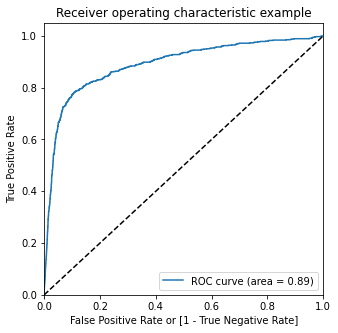

****************************************************************************************************
     prob  accuracy     sensi     speci
0.0   0.0  0.083324  1.000000  0.000000
0.1   0.1  0.460171  0.950667  0.415586
0.2   0.2  0.588935  0.922667  0.558599
0.3   0.3  0.684924  0.889333  0.666343
0.4   0.4  0.754138  0.862667  0.744273
0.5   0.5  0.813243  0.829333  0.811780
0.6   0.6  0.865126  0.796000  0.871410
0.7   0.7  0.903566  0.744000  0.918071
0.8   0.8  0.928230  0.626667  0.955642
0.9   0.9  0.927786  0.285333  0.986183


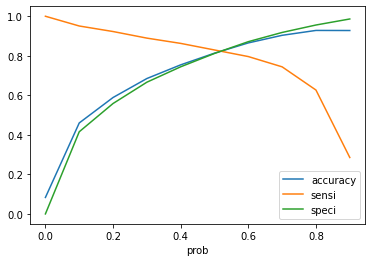

****************************************************************************************************


Model_Name  Train_Accuracy  Train_AUC_ROC  Test_Accuracy  \
0  LR_Simple_0.5_Optcutoff_RFE           0.828          0.828          0.813   
1     LR_RCV_0.5_Optcutoff_RFE           0.832          0.832          0.813   

   Test_AUC_ROC  Train_Precision  Test_Precision  Train_Sensitivity  \
0         0.819            0.813           0.285              0.852   
1         0.821            0.814           0.286              0.860   

   Test_Sensitivity  Train_Specificity  Test_Specificity  
0             0.827              0.804             0.811  
1             0.829              0.804             0.812

In [79]:
y_final_train=predictionframe(best_lr_rfe_md,X_train_regr[trained_cols],y_train_balance)
train_metric_list=metrics_score(y_train_balance,y_final_train.churnID_Pred)

print("**"*50)
y_final_test=predictionframe(best_lr_rfe_md,X_test_regr[trained_cols],y_test)
test_metric_list=metrics_score(y_test,y_final_test.churnID_Pred)
print("**"*50)
draw_roc(y_final_test.churnID, y_final_test.churnID_Pred_prob)
print("**"*50)
tradeoff(y_final_test)
print("**"*50)
#storing in Dataframe
model_dataframe=model_frame(model_dataframe,'LR_RCV_0.5_Optcutoff_RFE',train_metric_list,test_metric_list)
model_dataframe

## High Performance Models


### <p> <span style="color : darkred"> <i> Subtask 2.3.1 Feature Selection with PCA  </i></span></p>


From Data Analysis it is very direct we have correlated and derived features, which may overfit and results multi colinearity. As feature count is high using PCA to identify right feature set for high performance model.

In [80]:
#Declaring PCA pipeline
pca = PCA(svd_solver='randomized', random_state=42)
pc_md= pca.fit(X_train_balance) #applying PCA on train balanced dataset
# pca.explained_variance_ratio_
df=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)
df[10:30]

10    90.04
11    90.93
12    91.68
13    92.36
14    92.97
15    93.57
16    94.16
17    94.63
18    95.07
19    95.43
20    95.76
21    96.04
22    96.29
23    96.53
24    96.76
25    96.96
26    97.14
27    97.31
28    97.47
29    97.63
dtype: float64

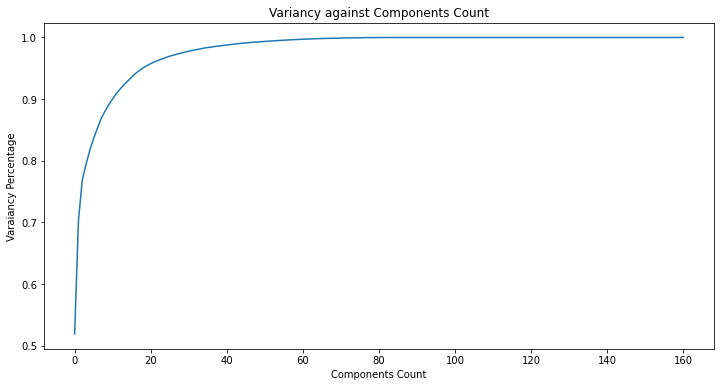

In [81]:
# Plotting variancy for all component combination
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components Count")
plt.ylabel("Varaiancy Percentage")
plt.title("Variancy against Components Count")
plt.show()

As we are able to observe when choose 25 and above components variancy curve smoothing towards stability. So let us choose the 25 components to build our model

In [82]:
#Using Incremental PCA
pca1=IncrementalPCA(n_components=25)
X_train_pca=pca1.fit_transform(X_train_balance)
print("X train PCA shape", X_train_pca.shape)
X_test_pca=pca1.transform(X_test)
print("X test PCA shape", X_test_pca.shape)

X train PCA shape (38618, 25)
X test PCA shape (9001, 25)


In [83]:
#crosschecking Correlation
corr = np.corrcoef(X_train_pca.transpose())
corr_nodiag = corr - np.diagflat(corr.diagonal())
print("max_correlation:", corr_nodiag.max(),  " min_correlation:", corr_nodiag.min())

max_correlation: 0.012485113222253619  min_correlation: -0.016402003683260936


### Model 1: Logistic Regression On PCA

In [84]:
lr_md = LogisticRegression(class_weight='balanced')
lr_md.fit(X_train_pca, y_train_balance)


LogisticRegression(class_weight='balanced')

Accuracy : 0.8244600963281371
Roc_auc_score : 0.8244600963281371
Sensitivity/Recall : 0.8419389921798125
Specificity: 0.8069812004764617
sklearn precision score value: 0.8135008006405124
Positive predictive value: 0.8135008006405124
Negative Predictive value: 0.836213373403456
****************************************************************************************************
Accuracy : 0.8176869236751472
Roc_auc_score : 0.8217686745041005
Sensitivity/Recall : 0.8266666666666667
Specificity: 0.8168706823415344
sklearn precision score value: 0.29094321914594085
Positive predictive value: 0.29094321914594085
Negative Predictive value: 0.9810771470160117
****************************************************************************************************


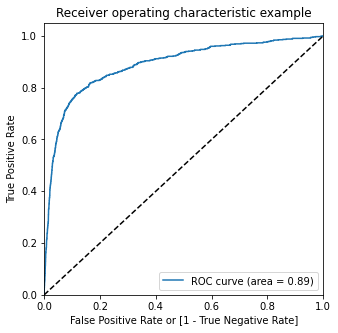

****************************************************************************************************
     prob  accuracy     sensi     speci
0.0   0.0  0.083324  1.000000  0.000000
0.1   0.1  0.431952  0.961333  0.383832
0.2   0.2  0.571714  0.921333  0.539935
0.3   0.3  0.680813  0.897333  0.661132
0.4   0.4  0.753916  0.857333  0.744516
0.5   0.5  0.817687  0.826667  0.816871
0.6   0.6  0.870681  0.778667  0.879045
0.7   0.7  0.904677  0.716000  0.921828
0.8   0.8  0.925008  0.606667  0.953945
0.9   0.9  0.927119  0.265333  0.987274


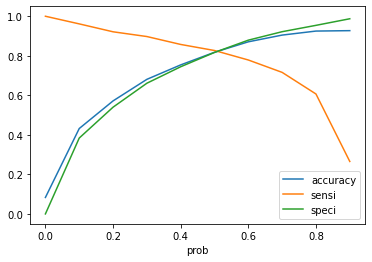

****************************************************************************************************


Model_Name  Train_Accuracy  Train_AUC_ROC  Test_Accuracy  \
0  LR_Simple_0.5_Optcutoff_RFE           0.828          0.828          0.813   
1     LR_RCV_0.5_Optcutoff_RFE           0.832          0.832          0.813   
2  LR_Simple_0.5_Optcutoff_PCA           0.824          0.824          0.818   

   Test_AUC_ROC  Train_Precision  Test_Precision  Train_Sensitivity  \
0         0.819            0.813           0.285              0.852   
1         0.821            0.814           0.286              0.860   
2         0.822            0.814           0.291              0.842   

   Test_Sensitivity  Train_Specificity  Test_Specificity  
0             0.827              0.804             0.811  
1             0.829              0.804             0.812  
2             0.827              0.807             0.817

In [85]:
y_final_train=predictionframe(lr_md,X_train_pca,y_train_balance)
train_metric_list=metrics_score(y_train_balance,y_final_train.churnID_Pred)

print("**"*50)
y_final_test=predictionframe(lr_md,X_test_pca,y_test)
test_metric_list=metrics_score(y_test,y_final_test.churnID_Pred)
print("**"*50)
draw_roc(y_final_test.churnID, y_final_test.churnID_Pred_prob)
print("**"*50)
tradeoff(y_final_test)
print("**"*50)
#storing in Dataframe
model_dataframe=model_frame(model_dataframe,'LR_Simple_0.5_Optcutoff_PCA',train_metric_list,test_metric_list)
model_dataframe

## HyperParameter Tuning 

In [86]:
#Using Randomized search CV
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
best_lr_md = RandomizedSearchCV(lr_md, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
best_lr_md.fit(X_train_pca, y_train_balance)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=1)

Accuracy : 0.8245636749702211
Roc_auc_score : 0.8245636749702211
Sensitivity/Recall : 0.8428711999585685
Specificity: 0.8062561499818738
sklearn precision score value: 0.813099520383693
Positive predictive value: 0.813099520383693
Negative Predictive value: 0.8368992581442856
****************************************************************************************************
Accuracy : 0.8203532940784357
Roc_auc_score : 0.8238291116228335
Sensitivity/Recall : 0.828
Specificity: 0.8196582232456672
sklearn precision score value: 0.29445234708392604
Positive predictive value: 0.29445234708392604
Negative Predictive value: 0.9812826465467208
****************************************************************************************************


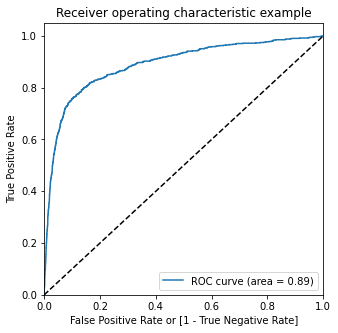

****************************************************************************************************
     prob  accuracy     sensi     speci
0.0   0.0  0.083324  1.000000  0.000000
0.1   0.1  0.455949  0.957333  0.410375
0.2   0.2  0.588268  0.921333  0.557993
0.3   0.3  0.688701  0.893333  0.670101
0.4   0.4  0.758360  0.854667  0.749606
0.5   0.5  0.820353  0.828000  0.819658
0.6   0.6  0.869126  0.777333  0.877469
0.7   0.7  0.902789  0.726667  0.918798
0.8   0.8  0.924231  0.621333  0.951763
0.9   0.9  0.929897  0.313333  0.985941


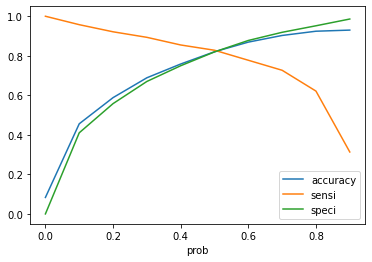

****************************************************************************************************


Model_Name  Train_Accuracy  Train_AUC_ROC  Test_Accuracy  \
0  LR_Simple_0.5_Optcutoff_RFE           0.828          0.828          0.813   
1     LR_RCV_0.5_Optcutoff_RFE           0.832          0.832          0.813   
2  LR_Simple_0.5_Optcutoff_PCA           0.824          0.824          0.818   
3     LR_RCV_0.5_Optcutoff_PCA           0.825          0.825          0.820   

   Test_AUC_ROC  Train_Precision  Test_Precision  Train_Sensitivity  \
0         0.819            0.813           0.285              0.852   
1         0.821            0.814           0.286              0.860   
2         0.822            0.814           0.291              0.842   
3         0.824            0.813           0.294              0.843   

   Test_Sensitivity  Train_Specificity  Test_Specificity  
0             0.827              0.804             0.811  
1             0.829              0.804             0.812  
2             0.827              0.807             0.817  
3             0.828              0.806             0.820

In [87]:
y_final_train=predictionframe(best_lr_md,X_train_pca,y_train_balance)
train_metric_list=metrics_score(y_train_balance,y_final_train.churnID_Pred)
print("**"*50)
y_final_test=predictionframe(best_lr_md,X_test_pca,y_test)
test_metric_list=metrics_score(y_test,y_final_test.churnID_Pred)
print("**"*50)
draw_roc(y_final_test.churnID, y_final_test.churnID_Pred_prob)
print("**"*50)
tradeoff(y_final_test)
print("**"*50)
#storing in Dataframe
model_dataframe=model_frame(model_dataframe,'LR_RCV_0.5_Optcutoff_PCA',train_metric_list,test_metric_list)
model_dataframe

### Model 2: Decision Tree On PCA

In [88]:
dt_md = DecisionTreeClassifier(class_weight='balanced',max_features='auto', max_depth=5,random_state=40)
dt_md.fit(X_train_pca, y_train_balance)
cv_score = cross_val_score(dt_md, X_train_pca, y_train_balance, cv=5, scoring='f1_micro')
print(cv_score)

[0.78547385 0.78521491 0.79207664 0.78648194 0.78738832]


In [89]:
dt_md.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 40,
 'splitter': 'best'}

Accuracy : 0.7925578745662645
Roc_auc_score : 0.7925578745662644
Sensitivity/Recall : 0.817753379253198
Specificity: 0.7673623698793309
sklearn precision score value: 0.7785228281234592
Positive predictive value: 0.7785228281234592
Negative Predictive value: 0.8080824607329843
****************************************************************************************************
Accuracy : 0.7651372069770026
Roc_auc_score : 0.7603778127903689
Sensitivity/Recall : 0.7546666666666667
Specificity: 0.766088958914071
sklearn precision score value: 0.2267628205128205
Positive predictive value: 0.2267628205128205
Negative Predictive value: 0.9717140661029977
****************************************************************************************************


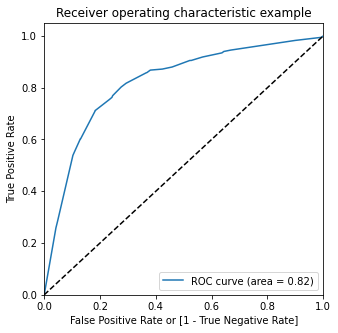

****************************************************************************************************
     prob  accuracy     sensi     speci
0.0   0.0  0.088212  0.994667  0.005817
0.1   0.1  0.382735  0.945333  0.331596
0.2   0.2  0.508943  0.905333  0.472912
0.3   0.3  0.640373  0.868000  0.619682
0.4   0.4  0.755805  0.769333  0.754575
0.5   0.5  0.765137  0.754667  0.766089
0.6   0.6  0.808244  0.712000  0.816992
0.7   0.7  0.809355  0.708000  0.818567
0.8   0.8  0.867237  0.538667  0.897103
0.9   0.9  0.916676  0.000000  1.000000


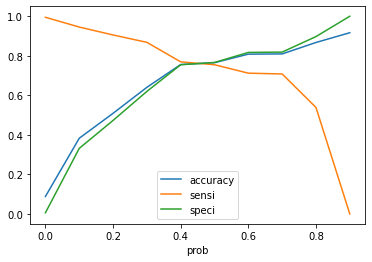

****************************************************************************************************


Model_Name  Train_Accuracy  Train_AUC_ROC  Test_Accuracy  \
0  LR_Simple_0.5_Optcutoff_RFE           0.828          0.828          0.813   
1     LR_RCV_0.5_Optcutoff_RFE           0.832          0.832          0.813   
2  LR_Simple_0.5_Optcutoff_PCA           0.824          0.824          0.818   
3     LR_RCV_0.5_Optcutoff_PCA           0.825          0.825          0.820   
4  DT_Simple_0.5_Optcutoff_PCA           0.793          0.793          0.765   

   Test_AUC_ROC  Train_Precision  Test_Precision  Train_Sensitivity  \
0         0.819            0.813           0.285              0.852   
1         0.821            0.814           0.286              0.860   
2         0.822            0.814           0.291              0.842   
3         0.824            0.813           0.294              0.843   
4         0.760            0.779           0.227              0.818   

   Test_Sensitivity  Train_Specificity  Test_Specificity  
0             0.827              0.804             0.811  
1             0.829              0.804             0.812  
2             0.827              0.807             0.817  
3             0.828              0.806             0.820  
4             0.755              0.767             0.766

In [90]:
y_final_train=predictionframe(dt_md,X_train_pca,y_train_balance)
train_metric_list=metrics_score(y_train_balance,y_final_train.churnID_Pred)
print("**"*50)
y_final_test=predictionframe(dt_md,X_test_pca,y_test)
test_metric_list=metrics_score(y_test,y_final_test.churnID_Pred)
print("**"*50)
draw_roc(y_final_test.churnID, y_final_test.churnID_Pred_prob)
print("**"*50)
tradeoff(y_final_test)
print("**"*50)
#storing in Dataframe
model_dataframe=model_frame(model_dataframe,'DT_Simple_0.5_Optcutoff_PCA',train_metric_list,test_metric_list)
model_dataframe

# HyperParameter Tuning

In [91]:
# Tuning 
hyperparameters = {
    'max_depth': range(5,20,2),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 50),
    'max_features': [5,10,15,20,25],
     "criterion": ["gini", "entropy"]
}
# Create a based model
dc_tree = DecisionTreeClassifier(class_weight='balanced',random_state=10)
best_dt_md = RandomizedSearchCV(dc_tree, hyperparameters, cv=5,scoring="f1",return_train_score=True)



In [92]:
best_dt_md.fit(X_train_pca, y_train_balance)
print("Best Parameters: {}".format(best_dt_md.best_params_))
print("Best score is {}".format(best_dt_md.best_score_))

Best Parameters: {'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': 15, 'max_depth': 11, 'criterion': 'entropy'}
Best score is 0.8276730699896614


In [93]:
#result frame
pd.DataFrame(best_dt_md.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.590218      0.012105         0.000000        0.000000   
1       0.238854      0.001258         0.005580        0.006579   
2       0.251273      0.006582         0.000000        0.000000   
3       0.171799      0.006823         0.003127        0.006254   
4       0.477266      0.018007         0.003369        0.006738   

  param_min_samples_split param_min_samples_leaf param_max_features  \
0                     100                    100                 15   
1                     150                    250                 10   
2                     200                    200                 10   
3                     300                    300                  5   
4                     250                    200                 20   

  param_max_depth param_criterion  \
0              11         entropy   
1              11            gini   
2              15            gini   
3              11         entropy   
4              15            gini   

                                              params  split0_test_score  \
0  {'min_samples_split': 100, 'min_samples_leaf':...           0.822033   
1  {'min_samples_split': 150, 'min_samples_leaf':...           0.786779   
2  {'min_samples_split': 200, 'min_samples_leaf':...           0.797789   
3  {'min_samples_split': 300, 'min_samples_leaf':...           0.771516   
4  {'min_samples_split': 250, 'min_samples_leaf':...           0.806826   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.824351           0.835741           0.827263           0.828978   
1           0.800957           0.810349           0.800639           0.815746   
2           0.804821           0.810241           0.808858           0.811679   
3           0.795094           0.782422           0.796159           0.793986   
4           0.818989           0.825925           0.823907           0.813398   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.827673        0.004686                1            0.845549   
1         0.802894        0.009892                7            0.806803   
2         0.806678        0.004999                5            0.816294   
3         0.787835        0.009544               10            0.790910   
4         0.817809        0.006993                2            0.826322   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.839783            0.839920            0.837637   
1            0.805792            0.802582            0.807898   
2            0.814296            0.810663            0.816230   
3            0.801056            0.785225            0.800757   
4            0.827792            0.827342            0.829584   

   split4_train_score  mean_train_score  std_train_score  
0            0.842797          0.841137         0.002749  
1            0.815787          0.807772         0.004383  
2            0.822176          0.815932         0.003732  
3            0.797940          0.795178         0.006174  
4            0.823078          0.826824         0.002150

Accuracy : 0.8454865606711895
Roc_auc_score : 0.8454865606711897
Sensitivity/Recall : 0.8555595836138589
Specificity: 0.8354135377285203
sklearn precision score value: 0.8386638237384506
Positive predictive value: 0.8386638237384506
Negative Predictive value: 0.8525898520084566
****************************************************************************************************
Accuracy : 0.8233529607821353
Roc_auc_score : 0.7939497434654386
Sensitivity/Recall : 0.7586666666666667
Specificity: 0.8292328202642104
sklearn precision score value: 0.28766430738119314
Positive predictive value: 0.28766430738119314
Negative Predictive value: 0.9742275380891356
****************************************************************************************************


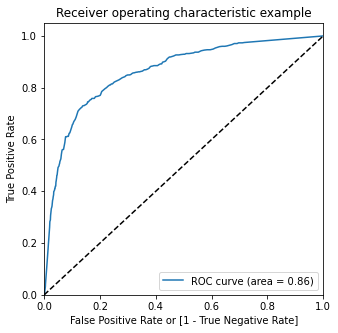

****************************************************************************************************
     prob  accuracy     sensi     speci
0.0   0.0  0.340296  0.974667  0.282632
0.1   0.1  0.532496  0.929333  0.496425
0.2   0.2  0.618154  0.885333  0.593867
0.3   0.3  0.703477  0.850667  0.690098
0.4   0.4  0.782246  0.797333  0.780875
0.5   0.5  0.823353  0.758667  0.829233
0.6   0.6  0.862460  0.713333  0.876015
0.7   0.7  0.888346  0.612000  0.913465
0.8   0.8  0.908010  0.514667  0.943764
0.9   0.9  0.916787  0.402667  0.963520


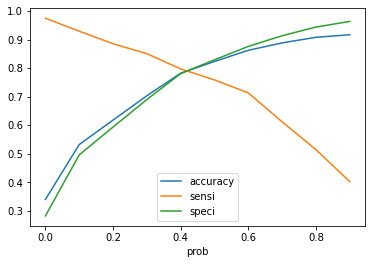

****************************************************************************************************


Model_Name  Train_Accuracy  Train_AUC_ROC  Test_Accuracy  \
0  LR_Simple_0.5_Optcutoff_RFE           0.828          0.828          0.813   
1     LR_RCV_0.5_Optcutoff_RFE           0.832          0.832          0.813   
2  LR_Simple_0.5_Optcutoff_PCA           0.824          0.824          0.818   
3     LR_RCV_0.5_Optcutoff_PCA           0.825          0.825          0.820   
4  DT_Simple_0.5_Optcutoff_PCA           0.793          0.793          0.765   
5     DT_RCV_0.5_Optcutoff_PCA           0.845          0.845          0.823   

   Test_AUC_ROC  Train_Precision  Test_Precision  Train_Sensitivity  \
0         0.819            0.813           0.285              0.852   
1         0.821            0.814           0.286              0.860   
2         0.822            0.814           0.291              0.842   
3         0.824            0.813           0.294              0.843   
4         0.760            0.779           0.227              0.818   
5         0.794            0.839           0.288              0.856   

   Test_Sensitivity  Train_Specificity  Test_Specificity  
0             0.827              0.804             0.811  
1             0.829              0.804             0.812  
2             0.827              0.807             0.817  
3             0.828              0.806             0.820  
4             0.755              0.767             0.766  
5             0.759              0.835             0.829

In [94]:
y_final_train=predictionframe(best_dt_md,X_train_pca,y_train_balance)
train_metric_list=metrics_score(y_train_balance,y_final_train.churnID_Pred)
print("**"*50)
y_final_test=predictionframe(best_dt_md,X_test_pca,y_test)
test_metric_list=metrics_score(y_test,y_final_test.churnID_Pred)
print("**"*50)
draw_roc(y_final_test.churnID, y_final_test.churnID_Pred_prob)
print("**"*50)
tradeoff(y_final_test)
print("**"*50)
#storing in Dataframe
model_dataframe=model_frame(model_dataframe,'DT_RCV_0.5_Optcutoff_PCA',train_metric_list,test_metric_list)
model_dataframe

### Model 3: Random Forest On PCA

In [95]:
rf_md = RandomForestClassifier(n_estimators=13,class_weight='balanced',random_state=40)
rf_md.fit(X_train_pca,y_train_balance)

RandomForestClassifier(class_weight='balanced', n_estimators=13,
                       random_state=40)

Accuracy : 0.998472215029261
Roc_auc_score : 0.998472215029261
Sensitivity/Recall : 0.999378528147496
Specificity: 0.9975659019110259
sklearn precision score value: 0.997570306038048
Positive predictive value: 0.997570306038048
Negative Predictive value: 0.9993773996056864
****************************************************************************************************
Accuracy : 0.9037884679480058
Roc_auc_score : 0.7596404476225105
Sensitivity/Recall : 0.5866666666666667
Specificity: 0.9326142285783542
sklearn precision score value: 0.44176706827309237
Positive predictive value: 0.44176706827309237
Negative Predictive value: 0.9612742036227357
****************************************************************************************************


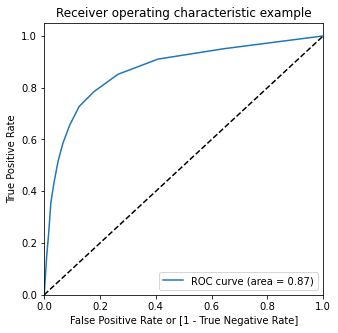

****************************************************************************************************
     prob  accuracy     sensi     speci
0.0   0.0  0.405177  0.950667  0.355593
0.1   0.1  0.618265  0.910667  0.591686
0.2   0.2  0.745028  0.852000  0.735305
0.3   0.3  0.818131  0.785333  0.821113
0.4   0.4  0.887346  0.656000  0.908375
0.5   0.5  0.903788  0.586667  0.932614
0.6   0.6  0.914121  0.516000  0.950309
0.7   0.7  0.924453  0.354667  0.976245
0.8   0.8  0.921786  0.240000  0.983760
0.9   0.9  0.920898  0.146667  0.991274


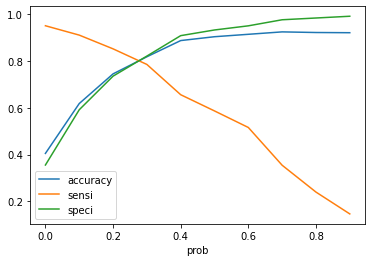

****************************************************************************************************


Model_Name  Train_Accuracy  Train_AUC_ROC  Test_Accuracy  \
0  LR_Simple_0.5_Optcutoff_RFE           0.828          0.828          0.813   
1     LR_RCV_0.5_Optcutoff_RFE           0.832          0.832          0.813   
2  LR_Simple_0.5_Optcutoff_PCA           0.824          0.824          0.818   
3     LR_RCV_0.5_Optcutoff_PCA           0.825          0.825          0.820   
4  DT_Simple_0.5_Optcutoff_PCA           0.793          0.793          0.765   
5     DT_RCV_0.5_Optcutoff_PCA           0.845          0.845          0.823   
6  RF_Simple_0.5_Optcutoff_PCA           0.998          0.998          0.904   

   Test_AUC_ROC  Train_Precision  Test_Precision  Train_Sensitivity  \
0         0.819            0.813           0.285              0.852   
1         0.821            0.814           0.286              0.860   
2         0.822            0.814           0.291              0.842   
3         0.824            0.813           0.294              0.843   
4         0.760            0.779           0.227              0.818   
5         0.794            0.839           0.288              0.856   
6         0.760            0.998           0.442              0.999   

   Test_Sensitivity  Train_Specificity  Test_Specificity  
0             0.827              0.804             0.811  
1             0.829              0.804             0.812  
2             0.827              0.807             0.817  
3             0.828              0.806             0.820  
4             0.755              0.767             0.766  
5             0.759              0.835             0.829  
6             0.587              0.998             0.933

In [96]:
y_final_train=predictionframe(rf_md,X_train_pca,y_train_balance)
train_metric_list=metrics_score(y_train_balance,y_final_train.churnID_Pred)
print("**"*50)
y_final_test=predictionframe(rf_md,X_test_pca,y_test)
test_metric_list=metrics_score(y_test,y_final_test.churnID_Pred)
print("**"*50)
draw_roc(y_final_test.churnID, y_final_test.churnID_Pred_prob)
print("**"*50)
tradeoff(y_final_test)
print("**"*50)
#storing in Dataframe
model_dataframe=model_frame(model_dataframe,'RF_Simple_0.5_Optcutoff_PCA',train_metric_list,test_metric_list)
model_dataframe

# HyperParameter Tuning

As Random Forest is multiple decision trees tuning often recursive. So Manual tuning each parameter at initial and deriving final estimates for hyperparametr range.

In [97]:
# param={'max_depth': range(5, 10, 5)}
param={'max_depth': range(20, 30, 2)}
rf_gmd = RandomizedSearchCV(rf_md,param,cv=5,return_train_score=True)
rf_gmd.fit(X_train_pca,y_train_balance)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_estimators=13,
                                                    random_state=40),
                   param_distributions={'max_depth': range(20, 30, 2)},
                   return_train_score=True)

In [98]:
df=pd.DataFrame(rf_gmd.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.647152      0.014802         0.016892        0.001160   
1       1.669047      0.018765         0.024696        0.007391   
2       1.724116      0.029701         0.016657        0.000819   
3       1.693582      0.022287         0.016068        0.000870   
4       1.713488      0.020093         0.017513        0.003049   

  param_max_depth             params  split0_test_score  split1_test_score  \
0              20  {'max_depth': 20}           0.940575           0.937597   
1              22  {'max_depth': 22}           0.941869           0.933843   
2              24  {'max_depth': 24}           0.940704           0.935914   
3              26  {'max_depth': 26}           0.945365           0.937597   
4              28  {'max_depth': 28}           0.940057           0.937468   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.944459           0.936035           0.933575         0.938448   
1           0.943035           0.934999           0.935129         0.937775   
2           0.941869           0.936812           0.937071         0.938474   
3           0.943682           0.939272           0.939531         0.941090   
4           0.946530           0.936683           0.939531         0.940054   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003767                4            0.989674            0.989545   
1        0.003863                5            0.991455            0.991843   
2        0.002357                3            0.994756            0.995080   
3        0.002930                1            0.995630            0.996828   
4        0.003472                2            0.995954            0.996504   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.990581            0.990484            0.989222   
1            0.992879            0.993656            0.991584   
2            0.994530            0.995307            0.993688   
3            0.995922            0.996407            0.995242   
4            0.997216            0.997670            0.997055   

   mean_train_score  std_train_score  
0          0.989901         0.000537  
1          0.992283         0.000849  
2          0.994672         0.000559  
3          0.996006         0.000560  
4          0.996880         0.000594

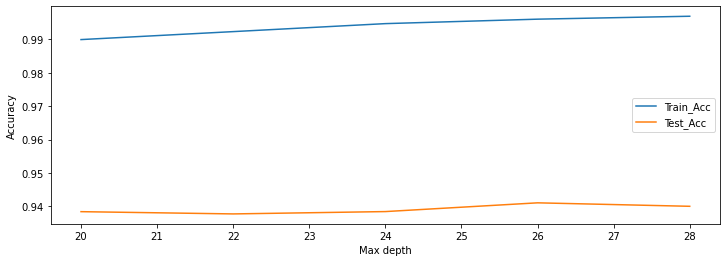

In [99]:
df=rf_gmd.cv_results_
plt.figure(figsize=(12,4))   
plt.plot(df["param_max_depth"],df["mean_train_score"], label="Train_Acc")
plt.plot(df["param_max_depth"],df["mean_test_score"],label="Test_Acc")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

After 22, mean accuracy  stayed constant

In [100]:
#Analyzed and performed right slection of attributes.
param={ 'max_depth': [22],
    'min_samples_leaf': range(60, 120, 20),
    'min_samples_split': range(60, 120, 20),
    'n_estimators': [20,40,60,80,100], 
    'max_features': [2,4,6]}
# param={'max_features': range(0, 6, 1)}
rf_md = RandomForestClassifier(class_weight='balanced',random_state=40)
best_rf_gmd = RandomizedSearchCV(rf_md,param,cv=5,return_train_score=True)
best_rf_gmd.fit(X_train_pca,y_train_balance)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=40),
                   param_distributions={'max_depth': [22],
                                        'max_features': [2, 4, 6],
                                        'min_samples_leaf': range(60, 120, 20),
                                        'min_samples_split': range(60, 120, 20),
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   return_train_score=True)

Accuracy : 0.8782433062302554
Roc_auc_score : 0.8782433062302553
Sensitivity/Recall : 0.866538919674763
Specificity: 0.8899476927857476
sklearn precision score value: 0.8873097523466087
Positive predictive value: 0.8873097523466087
Negative Predictive value: 0.8695916198572947
****************************************************************************************************
Accuracy : 0.872347516942562
Roc_auc_score : 0.8212798448672889
Sensitivity/Recall : 0.76
Specificity: 0.8825596897345777
sklearn precision score value: 0.37037037037037035
Positive predictive value: 0.37037037037037035
Negative Predictive value: 0.9758777807558295
****************************************************************************************************


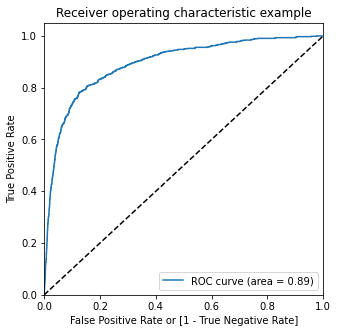

****************************************************************************************************
     prob  accuracy     sensi     speci
0.0   0.0  0.083324  1.000000  0.000000
0.1   0.1  0.334963  0.984000  0.275967
0.2   0.2  0.578047  0.942667  0.544904
0.3   0.3  0.732030  0.878667  0.718701
0.4   0.4  0.823575  0.813333  0.824506
0.5   0.5  0.872348  0.760000  0.882560
0.6   0.6  0.901789  0.686667  0.921343
0.7   0.7  0.920009  0.601333  0.948976
0.8   0.8  0.927786  0.445333  0.971640
0.9   0.9  0.923120  0.169333  0.991637


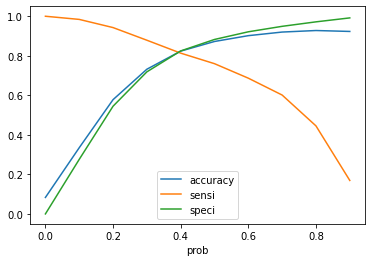

****************************************************************************************************


Model_Name  Train_Accuracy  Train_AUC_ROC  Test_Accuracy  \
0  LR_Simple_0.5_Optcutoff_RFE           0.828          0.828          0.813   
1     LR_RCV_0.5_Optcutoff_RFE           0.832          0.832          0.813   
2  LR_Simple_0.5_Optcutoff_PCA           0.824          0.824          0.818   
3     LR_RCV_0.5_Optcutoff_PCA           0.825          0.825          0.820   
4  DT_Simple_0.5_Optcutoff_PCA           0.793          0.793          0.765   
5     DT_RCV_0.5_Optcutoff_PCA           0.845          0.845          0.823   
6  RF_Simple_0.5_Optcutoff_PCA           0.998          0.998          0.904   
7     RF_RCV_0.5_Optcutoff_PCA           0.878          0.878          0.872   

   Test_AUC_ROC  Train_Precision  Test_Precision  Train_Sensitivity  \
0         0.819            0.813           0.285              0.852   
1         0.821            0.814           0.286              0.860   
2         0.822            0.814           0.291              0.842   
3         0.824            0.813           0.294              0.843   
4         0.760            0.779           0.227              0.818   
5         0.794            0.839           0.288              0.856   
6         0.760            0.998           0.442              0.999   
7         0.821            0.887           0.370              0.867   

   Test_Sensitivity  Train_Specificity  Test_Specificity  
0             0.827              0.804             0.811  
1             0.829              0.804             0.812  
2             0.827              0.807             0.817  
3             0.828              0.806             0.820  
4             0.755              0.767             0.766  
5             0.759              0.835             0.829  
6             0.587              0.998             0.933  
7             0.760              0.890             0.883

In [101]:
y_final_train=predictionframe(best_rf_gmd,X_train_pca,y_train_balance)
train_metric_list=metrics_score(y_train_balance,y_final_train.churnID_Pred)
print("**"*50)
y_final_test=predictionframe(best_rf_gmd,X_test_pca,y_test)
test_metric_list=metrics_score(y_test,y_final_test.churnID_Pred)
print("**"*50)
draw_roc(y_final_test.churnID, y_final_test.churnID_Pred_prob)
print("**"*50)
tradeoff(y_final_test)
print("**"*50)
#storing in Dataframe
model_dataframe=model_frame(model_dataframe,'RF_RCV_0.5_Optcutoff_PCA',train_metric_list,test_metric_list)
model_dataframe

In [102]:
print("Best Parameters: {}".format(best_rf_gmd.best_params_))
print("Best score is {}".format(best_rf_gmd.best_score_))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 80, 'min_samples_leaf': 60, 'max_features': 6, 'max_depth': 22}
Best score is 0.8606608425752558


In [103]:
final_rf_md = RandomForestClassifier(n_estimators=100,min_samples_split=80,min_samples_leaf=50,max_features=6,max_depth=22,class_weight='balanced',random_state=40,)
final_rf_md.fit(X_train_balance,y_train_balance)

RandomForestClassifier(class_weight='balanced', max_depth=22, max_features=6,
                       min_samples_leaf=50, min_samples_split=80,
                       random_state=40)

In [104]:
final_rf_md.feature_importances_

array([0.02663092, 0.00324296, 0.01060645, 0.0358854 , 0.04089484,
       0.01188721, 0.01627067, 0.00273299, 0.00074317, 0.02542022,
       0.00142073, 0.00266173, 0.00012159, 0.00168968, 0.00090998,
       0.00110204, 0.        , 0.02174876, 0.03118597, 0.02219989,
       0.01042105, 0.03346873, 0.0014519 , 0.00306633, 0.00132492,
       0.00530855, 0.04838508, 0.00047876, 0.00070308, 0.00047467,
       0.00803386, 0.02473528, 0.03156086, 0.02190849, 0.020835  ,
       0.00973717, 0.00745437, 0.00137628, 0.0129748 , 0.00341102,
       0.00339329, 0.002483  , 0.00109341, 0.        , 0.00024524,
       0.00151337, 0.00046415, 0.00026533, 0.00727972, 0.00221444,
       0.00266985, 0.01929933, 0.0160358 , 0.02822531, 0.01064685,
       0.00103141, 0.00508274, 0.00084477, 0.00796495, 0.00098207,
       0.01246159, 0.00463379, 0.01611304, 0.00836165, 0.00474563,
       0.00090242, 0.01050838, 0.00271206, 0.00261815, 0.00069586,
       0.00159483, 0.00278697, 0.00656283, 0.0028838 , 0.00726

<AxesSubplot:>

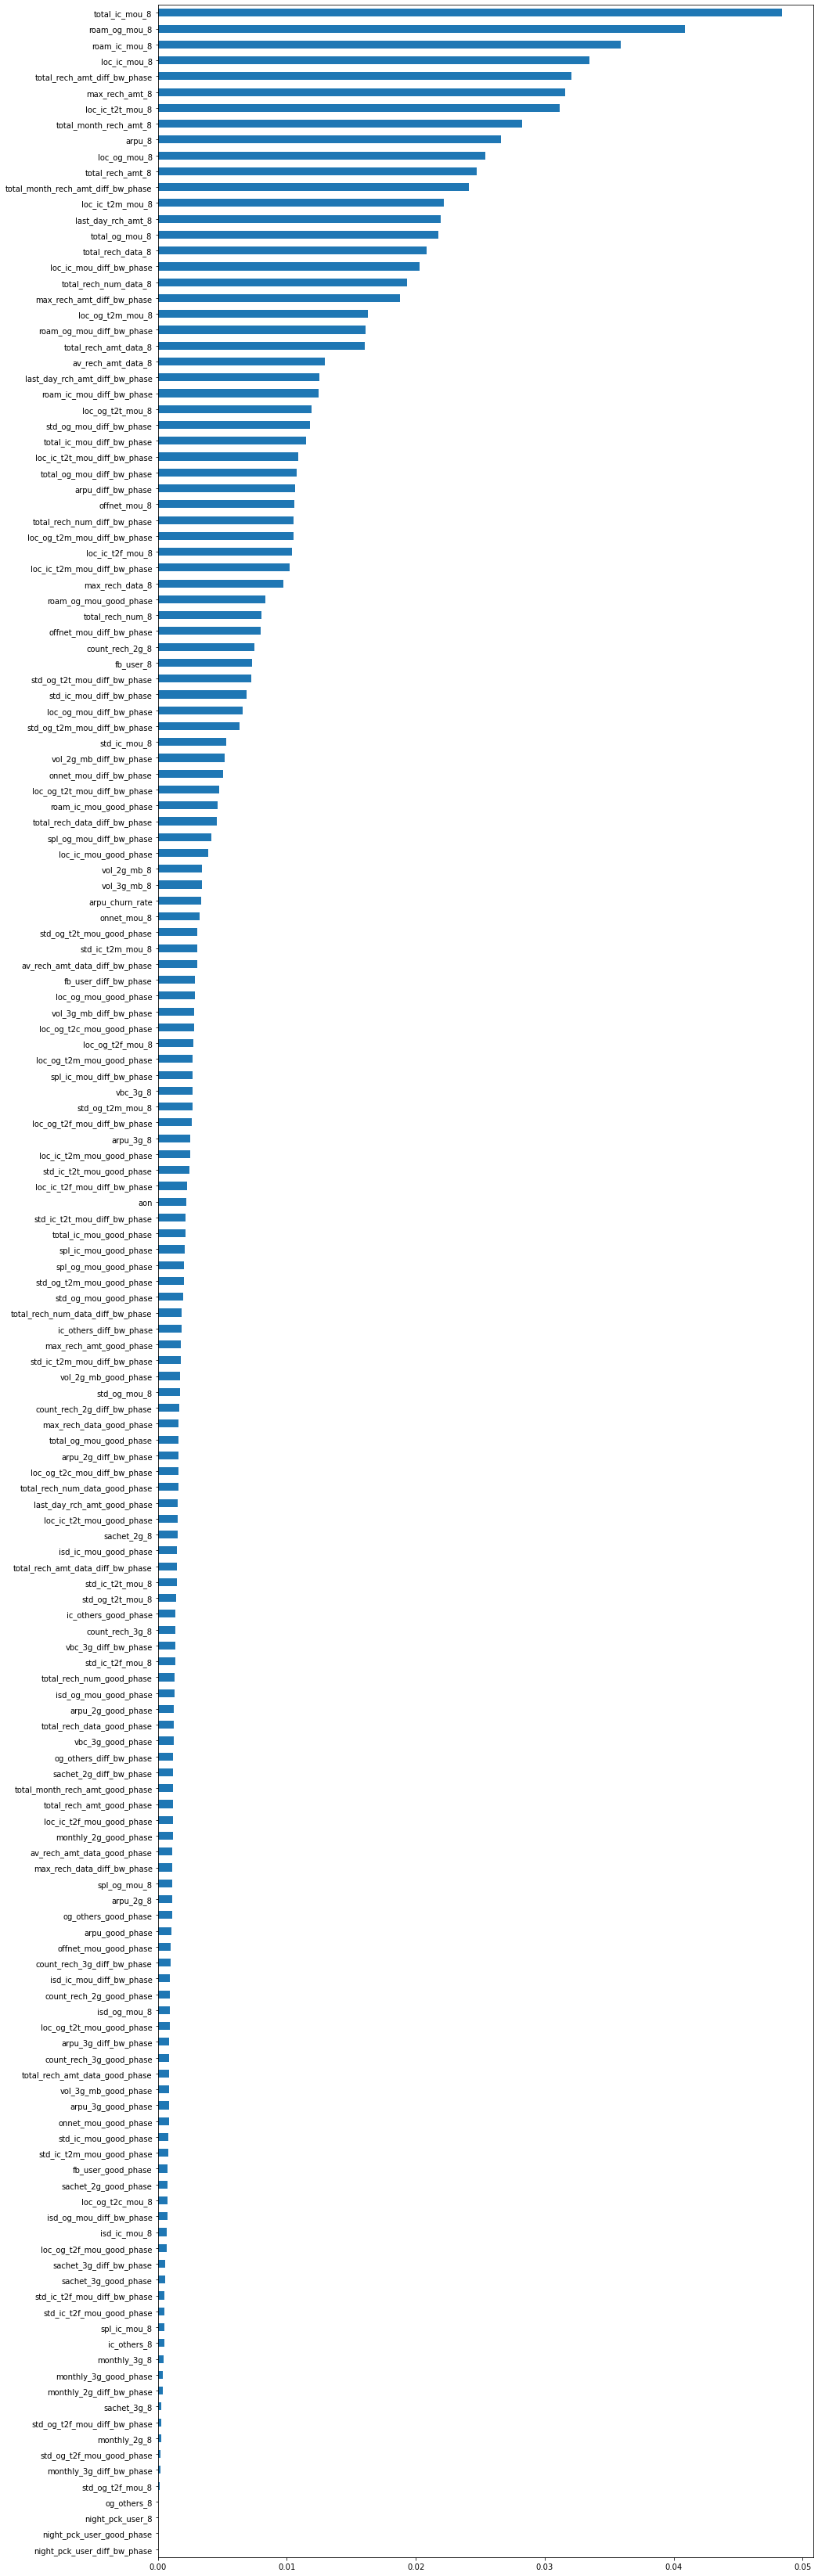

In [105]:
plt.figure(figsize=(15,60))
pd.Series(final_rf_md.feature_importances_,X.columns).sort_values().plot(kind='barh', align='center')

In [106]:
pd.Series(final_rf_md.feature_importances_,X.columns).sort_values(ascending=False).index[:30]

Index(['total_ic_mou_8', 'roam_og_mou_8', 'roam_ic_mou_8', 'loc_ic_mou_8',
       'total_rech_amt_diff_bw_phase', 'max_rech_amt_8', 'loc_ic_t2t_mou_8',
       'total_month_rech_amt_8', 'arpu_8', 'loc_og_mou_8', 'total_rech_amt_8',
       'total_month_rech_amt_diff_bw_phase', 'loc_ic_t2m_mou_8',
       'last_day_rch_amt_8', 'total_og_mou_8', 'total_rech_data_8',
       'loc_ic_mou_diff_bw_phase', 'total_rech_num_data_8',
       'max_rech_amt_diff_bw_phase', 'loc_og_t2m_mou_8',
       'roam_og_mou_diff_bw_phase', 'total_rech_amt_data_8',
       'av_rech_amt_data_8', 'last_day_rch_amt_diff_bw_phase',
       'roam_ic_mou_diff_bw_phase', 'loc_og_t2t_mou_8',
       'std_og_mou_diff_bw_phase', 'total_ic_mou_diff_bw_phase',
       'loc_ic_t2t_mou_diff_bw_phase', 'total_og_mou_diff_bw_phase'],
      dtype='object')

Conclusions:

The top 30 features from High Performance and Higly Interpretable model are more euqally like. 

Most of features related Service usage rather than subscriptions or recharges, which tends to curve of customer satisfactory.

As roam and Local calls has significant features, best suggestion is to put better marketing strategies at this area.

For builidng high reliable model at least response times track telcom kpis more service usage bi wwekly or weekly,  use same staregies as good,action and churn phase for last 3 weeks.

Better suggestion for Good governant and realiable model is to ensembels models with optimal optimal false positive rate.